利用集成算法进行Kaggle竞赛
===

# 1.概述
集成(ensemble)正在迅速成为应用机器学习最热门和流行的方法。目前，几乎每一个Kaggle冠军的解决方案都使用了集成，很多数据科学pipeline也使用集成。简单来说，集成把不同模型的预测结果结合起来，生成最终预测，集成的模型越多，效果就越好。另外，由于集成结合了不同的基线预测，它们的性能至少等同于最优的基线模型。集成使得我们几乎免费就获得了性能提升<br/>
![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAtAAAAITCAIAAAChSbzRAAAACXBIWXMAAAsT%0AAAALEwEAmpwYAAAJUWlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFj%0Aa2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQi%0APz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0%0Aaz0iQWRvYmUgWE1QIENvcmUgNS42LWMxNDAgNzkuMTYwNDUxLCAyMDE3LzA1%0ALzA2LTAxOjA4OjIxICAgICAgICAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0%0AdHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8%0AcmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczp4bXBNTT0iaHR0%0AcDovL25zLmFkb2JlLmNvbS94YXAvMS4wL21tLyIgeG1sbnM6c3RFdnQ9Imh0%0AdHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50%0AIyIgeG1sbnM6c3RSZWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9z%0AVHlwZS9SZXNvdXJjZVJlZiMiIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcv%0AZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMu%0AYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczp0aWZmPSJodHRwOi8v%0AbnMuYWRvYmUuY29tL3RpZmYvMS4wLyIgeG1sbnM6ZXhpZj0iaHR0cDovL25z%0ALmFkb2JlLmNvbS9leGlmLzEuMC8iIHhtbG5zOnhtcD0iaHR0cDovL25zLmFk%0Ab2JlLmNvbS94YXAvMS4wLyIgeG1wTU06RG9jdW1lbnRJRD0iYWRvYmU6ZG9j%0AaWQ6cGhvdG9zaG9wOjdmYmZlZTAwLTI2MzItZTk0Zi1iMTgwLTkxMTEyMWI5%0AZmFhNCIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo5ZWNkNmQ2Zi1hM2Ji%0ALTRiMjItODc4Zi04MzkyMGU5MzU2MzEiIHhtcE1NOk9yaWdpbmFsRG9jdW1l%0AbnRJRD0iQTA4Mzk5RDQxNzA3MjdGRjEzODk3N0I3NTRBQzFEN0UiIGRjOmZv%0Acm1hdD0iaW1hZ2UvcG5nIiBwaG90b3Nob3A6Q29sb3JNb2RlPSIzIiBwaG90%0Ab3Nob3A6SUNDUHJvZmlsZT0iIiB0aWZmOkltYWdlV2lkdGg9IjcyMCIgdGlm%0AZjpJbWFnZUxlbmd0aD0iNTMxIiB0aWZmOlBob3RvbWV0cmljSW50ZXJwcmV0%0AYXRpb249IjIiIHRpZmY6U2FtcGxlc1BlclBpeGVsPSIzIiB0aWZmOlhSZXNv%0AbHV0aW9uPSIxLzEiIHRpZmY6WVJlc29sdXRpb249IjEvMSIgdGlmZjpSZXNv%0AbHV0aW9uVW5pdD0iMSIgZXhpZjpFeGlmVmVyc2lvbj0iMDIyMSIgZXhpZjpD%0Ab2xvclNwYWNlPSI2NTUzNSIgZXhpZjpQaXhlbFhEaW1lbnNpb249IjcyMCIg%0AZXhpZjpQaXhlbFlEaW1lbnNpb249IjUzMSIgeG1wOkNyZWF0ZURhdGU9IjIw%0AMTgtMDgtMTBUMDk6Mjc6MTUrMDg6MDAiIHhtcDpNb2RpZnlEYXRlPSIyMDE4%0ALTA4LTEwVDA5OjM4OjA4KzA4OjAwIiB4bXA6TWV0YWRhdGFEYXRlPSIyMDE4%0ALTA4LTEwVDA5OjM4OjA4KzA4OjAwIj4gPHhtcE1NOkhpc3Rvcnk+IDxyZGY6%0AU2VxPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3Rh%0AbmNlSUQ9InhtcC5paWQ6ZTk2NGVmNzMtYTc1Ny00ZDIwLWFkZjMtZjFmMjhm%0AMjZhODc3IiBzdEV2dDp3aGVuPSIyMDE4LTA4LTEwVDA5OjM4OjA4KzA4OjAw%0AIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgQ0MgMjAx%0AOCAoTWFjaW50b3NoKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8cmRmOmxpIHN0%0ARXZ0OmFjdGlvbj0iY29udmVydGVkIiBzdEV2dDpwYXJhbWV0ZXJzPSJmcm9t%0AIGltYWdlL2pwZWcgdG8gaW1hZ2UvcG5nIi8+IDxyZGY6bGkgc3RFdnQ6YWN0%0AaW9uPSJkZXJpdmVkIiBzdEV2dDpwYXJhbWV0ZXJzPSJjb252ZXJ0ZWQgZnJv%0AbSBpbWFnZS9qcGVnIHRvIGltYWdlL3BuZyIvPiA8cmRmOmxpIHN0RXZ0OmFj%0AdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6OWVjZDZk%0ANmYtYTNiYi00YjIyLTg3OGYtODM5MjBlOTM1NjMxIiBzdEV2dDp3aGVuPSIy%0AMDE4LTA4LTEwVDA5OjM4OjA4KzA4OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50%0APSJBZG9iZSBQaG90b3Nob3AgQ0MgMjAxOCAoTWFjaW50b3NoKSIgc3RFdnQ6%0AY2hhbmdlZD0iLyIvPiA8L3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPHht%0AcE1NOkRlcml2ZWRGcm9tIHN0UmVmOmluc3RhbmNlSUQ9InhtcC5paWQ6ZTk2%0ANGVmNzMtYTc1Ny00ZDIwLWFkZjMtZjFmMjhmMjZhODc3IiBzdFJlZjpkb2N1%0AbWVudElEPSJBMDgzOTlENDE3MDcyN0ZGMTM4OTc3Qjc1NEFDMUQ3RSIgc3RS%0AZWY6b3JpZ2luYWxEb2N1bWVudElEPSJBMDgzOTlENDE3MDcyN0ZGMTM4OTc3%0AQjc1NEFDMUQ3RSIvPiA8dGlmZjpCaXRzUGVyU2FtcGxlPiA8cmRmOlNlcT4g%0APHJkZjpsaT44PC9yZGY6bGk+IDxyZGY6bGk+ODwvcmRmOmxpPiA8cmRmOmxp%0APjg8L3JkZjpsaT4gPC9yZGY6U2VxPiA8L3RpZmY6Qml0c1BlclNhbXBsZT4g%0APC9yZGY6RGVzY3JpcHRpb24+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+IDw/%0AeHBhY2tldCBlbmQ9InIiPz4broSzAAJLiUlEQVR4nOy9d7xkdX3///qUU2fm%0A9rv37t3eC9tYWHaXKkUUUDGoWDHRqMFINDEaNCaWxKgp6tcY5adERGMjFhSN%0AKEjv7NJhd9ney+1TT/uU3x+fmbOzDVhZYMt5Pngsc+fOnDlzZu75vM67vN5E%0Aa42MjIyMY4EQCgAFZQDTgAYUoPZ9EN17Q1MAIObHQ5zqzN2KAEAFAQACygAC%0AMDACMHAKkIM+nbyot5ORcUJBn/8hGRkZGRkZGRkvDpJFODIyMo5JdNO/ZO+/%0AsuluhuQ5YxAH/DLke2/TpofQ5nuaIyrZNVtGxgsl+2vJyMjIyMjIeMnhz/+Q%0AjIyMjKMEAQAg9WslTaCIkvsGO/bFes7NKeyNciiGRniENIU3KEDTB6mmf82r%0AZddsGRkvlOyvJSMjIyMjI+MlJ6vhyMjIOHZIADRCDlRpIIFCU2yDNf4lAMCb%0A6zmabxvI/o+HAOS+j1f1vhjFAAowgIHWu2MAsOyaLSPjhZL9tWRkZGRkZGS8%0A5GQRjoyMjGMHE1eo96SY2IYCIFTCQQkhUBxaQzIA0AAV0BpSgFqwOMg+/Sww%0ATh4QaZRE8r3bbEQ4NAACQsEBMDCAsvSs+cJ8ONLTLCGZcUfGiUtWNJqRkXHM%0AwylvuHtpKAWwurYIAngeLAuEQ8o4UZpRy2IamhBCoQ+UDApK1mtTGQEhmbdX%0ARsYRIotwZGRkHDPIxg0GNKIPTa4YisIUWKSIMggB56BcE0hw2VSlQeo1GYoB%0ACgmTgHTqMQ9CQBW0hoy1EMT3QADC9L5bcF/YbmcRjowMZBGOjIyM4wGl0LyW%0Aa0BCKVCbA4DWkFJSCCCSiKTgtgUAWjIFpgUHoUxTCRIndalBCKBACCyLWBa0%0ARqYVMjJeHFmEIyMj45ghteGoRzgU6hEOQkForCEJEkACAoiAYcB0l9SAAY3R%0AAAGgGYIQAAiBReBa8G34FB4wFsjVwx6gCraCz8A1YM6TpmqEEglIUADOC9vt%0ALMKRkYEswpGRkXHcoDVA6mZdHFCABRQlBobjbf2D2weH+ovl0SiMFaQyIkBZ%0AhDqc5hzXd2yP8iXjJ4zJ+V3tbrsPn4ECUoIpENqwFntxiiG7wMs4kckiHBkZ%0AGccMpoajPrtV7a3e0JREhERAAFSBIYmRYmkolN/fjD0jtf6hwUoi4OeJl4sY%0AiwQ0CLSG1tBgRFmEMkZcTe14/VifT+zpmdvTPbM7N9lDL9ABcCCvwbSikCC6%0AnnABXmCMIzvNZmQgi3BkZGQcB2htuk4ggZFyuHb7tnUbNmweGN1ozUiIa1lW%0A3nEjZkVSJkppRcE4KAUhDIRpQUG0VlJKSunQ0NDI7t0DjrV7TFdxXF/Y3Sp9%0Ad2zByjRDRsaLJItwZGRkvIIkjRvG24KqfX5rfpLp7SoYAI7EgWICUICyEVrF%0APLZyPAL8YTdWbBoY3BPTqlDSGm3Jmw2ZE53WGoqkFaCEEEIII4Q0ftRRBIBQ%0ADoDKuIXpie3u7Bb6xiX+WKAX6AIcKB6FVAOcx0xDcwZGCGjq7UEEEO99E9qC%0A5tAEgKbZ+TbjxCWLcGRkZBwzKCgNTaEICEQCoUA5bEiJDf14YNfOx/pLu4JY%0AxrkcsWzbTp9IyAu6uLIsS0opldJaaynDJB4aqm4vRb8rkbOm9bZPLgiACWFz%0ADhAkCRgzaiUrBs3IeF6yCEdGRsYriIlwkPTi52DnI5H+hoBAcygJzRRDlWAQ%0A2Ancura0YtfQmm2Dw9JVri9ZQRDGGEuUMHoAgG4AwEx1MBEOAoZG/4jUeSEE%0AU1VOE5vFnMQESU7rqFqa3V5YOnPK2dOcGRxdGu1RTG2iqAZAQaHTizcFrTVN%0AHUNANMkiHBkZyCIcGRkZxyRKEU4BDBbFis27Hnh81Q7iaOLncjnpeKGylNq/%0AVDNtSTUFH4fYqoIpB6GUc25RDa2RJK7rbt++XQ7ucocm52dPaitQSimUBD3A%0AitTUomZkZBxAFuHIyMh4xdAQAEh9iiQ1d+0PMZUcCgAiCklAiHCwk+IhiZ9v%0AGL1r887doXLtzlbhJjGNhVDUquUoACeoNWkLqrVW9XoOU7TB6q9gHqN5TPIA%0ALFWhugpSIoREjGptU6dFSYni8PgoPnda+5sX9y4qICd0ngvbtMyAQO4d06IZ%0AkaT+Voylh/lBZ+MyM05gsghHRkbGMUWSwLYB9JewYtXmp3duL2uLuS2EECFE%0AFGmpteW5oARxjH3jGYQQ1H88RM2FBhgYYVpAKUUpJYRoQpUQzLJs31dBuHHj%0AxgfjYmHOuEV9eQWlFCgI0bquJghBQ9BkZGQ0kwmOjIyMV4y0J6VpNsoBQQDd%0AFP9ggGuPOngiwW92Br8cCNaTduR6IWiQsCgilFNuEUkpVALohNTrMwghJsJh%0AlIDWJN2yuUlMbkSFIFxCS2aDdBLOCXegbSgmq3HA3cLYnk3FTQObh9bnOi/v%0AzJ/hOXmiGbSjCdMCALQEODQB2TvalhAQLfe+i4yME5Ls25+RkXHsEAtQJAnW%0ArRtcvXp1uVyGZUFKuK6RFYwxpVStVkMUgbH9nv0czuL1elKyt7y0XkYqJaII%0AACiF1kIIc+eePXueemqL2r8WNSMj45BkNRwZGRmvGLIR46hLg/RspEi901TV%0AfycUGEMRGAV+tbv444eeWWvlIjKmVqPgeSthADQRIFIYLw9T+aFtEAJCmGUx%0AQuMgqGdkKIXWEBKUMsZkGEJrt6VFquEkDMH81pau4o4R+O02B1NAohgkQUyo%0AAkkAoQlAxBdm0wvn9PqAD7hx4jMmK2XmeeCWIiQhAEABBk2VAKBJFlTOOHHJ%0AIhwZGRlHH6naIPvcwYA9NbFly5YgCJRSQggo9VxdIZyDUgihlIrDEIT4HR1Q%0ACkoRSpllWZblOI6dy4GxsFzWWlPLIpQGQUwLBcaQJKYU5OBs3Lhx+85RAEKC%0AMQalmO+DZufVjIyDkMntjIyMVxCzNqv97yaAUlIrwrgmiBVMHeZq4Bf9wR/2%0AVNeyQkQ7IXIQLKeoIwWIrNlRTOubdBIG8IgzQIMKDQ2VgFmWBYQhfIdrKCWS%0AIBZEW5bl2UxrQlRIKQ0Ei6Oy63RKCSYiW8InCYhQRCpCQmqFzFWWA+BXA9v8%0AnQHpa+tmcECJiGxuOmM5BaONLhgJkmmQjIzsryAjI+OoRGtT6xknKo6VUloB%0AO0tq8+bNIyMjhBAT27As67k2kiRQCo4DpWDblLHiwAgYo5QyxvL5fHt7u+M4%0AjRfUWmulFABu22G5ppTinHN+yAuzWq22ffv27QP1H+s1IlIe6vEZGScyWYQj%0AIyPj6IOoBIRyKoBQK8k4OARw087KE6WWKpti69awmgezlWVVdRxZCWgECApA%0AcWgngQcAugahfc+vVSp+IUelqAxvHz97jmPR0cGhuBRAaioClzLL4nEch7xN%0AAy0u6+ksrCs+m6cFTZAAkWVJwjQsAq4IqOI0kgBG2mfcp2OytdjV3doC5G0b%0AwTAYgwY048SRhNXzPVmMI+OEJ/sbyMjIOBpJ69kppY4FCpQryYYNG2q1mmVZ%0AlNK94+nVARmZBpQxAEIISFlvPCkUxo3jtk2jKCoXi0mStLa2Tp48uaenx3TP%0Aaq1d121tRU9PjxmtEh+6iMN13TAMN2/evGegMa5N6wO7YzIyMpBFODIyMo4a%0AVJNdFlWNslHBKAeqCuu2bl0dtSSq4EruhXmt7YAg9gEG4SSAQqS5hCUplBUx%0AF4BDykolSaXqOZYOioRi9qSxrsKW7ZutpDSuze3p7Ojt7ZjYh8EBq3/9YORP%0AgpQsiiqDYv4Mb8OGncW4lOTdxOXQLVB5EIJI5oRojysAdrbkiu54N971zI6h%0AeZ2dkipGFSAAAg0CSTUzBqQ6u7rLOOHJ/gYyMjKOXjTqPSjlcnXLli3mTiml%0A1przRijh0DUWSikzdD6fzydJEsfxuHHO8HCUJAmlNI7jrVu3rlu3YWQEjMFx%0AHEqpUqpSqWzdurW316GUaq0dzzvk9mW9sba/vz+OEasYprgkIyPjALIIR0ZG%0AxisGExEAwR3RaIA110ASFAR2PAghPL91BN4DtdwN0ewRFOBCuQBiTUIAiBUA%0AKArigHIBCEZBFUgFhAjarpMQLg+qoavUuAKd5+Lx0XUD/tj+CoHlUZdOKj3U%0AJSZsC+1KUpCsaNmEJFGOYff68tyJ08sjT1ZHpbJJQmmjm0YHTGubM0QdtBjX%0Agp3a/UPQMXMYtM9f5gglEspdKNv4nHItAUSEaWA/5ZLZIGWcUGQRjoyMjKMR%0ASgHGjKeFAEZHq6VS6ZCPtqy9lROE1J0wlNJCWPk8s20AhULBdd1aLa5UKmEY%0AAqC0PqTetm3HgeM4pIEx+fB9bibHHupl03krUspqNUkSwMiIgymJbLxKxglO%0AJjgyMjJeOagCVaoROmBm8oj5TwPUgu3F4CPA9kplV3LI4k2iNKSCSCASyBgy%0AhowgJIJEE6qEDqNE2TnmdUSwKwkLI80pOFEyDpBEVCZWlCAqakADipJI6CCW%0AXh6E2iAW0RRQIBpEgyhjYyoJjxSVtie4HSRqcKRYDaFBNWUATc+u5u2w1E01%0AI+NEJRMcGRkZRx17YwSEaGgFVCqV53q8lPs0rWgNQghjsCwpYdw1TFTDdaG1%0AtizLdV3GGADGGKVUSmlKQxrbUFJKxp4n62EiHJRSIcTQ0FCtFmlkWZKMjIOT%0A1XBkZGS8cpjUBwDAhqkRBUAJNTPeOUDKoP3Atiguey2H3AQUY5wyTYRSWlCp%0AGQVjUngdIol8KljOD6JkSNixg4C3VsKIKUtqooXQ3IoVIMO8RYvG+4twzWxY%0A+XKIWDMJaEKhKMyUFq2IppoogETEAXOVppKogXJQimUIYlNLa4p0AJxWINkM%0AlYyMTHBkZGQclRACrTUhSEQSA+Vy+YCay32oj3ht3JBSKaUiEUAIyaXjOCQW%0A1Wo1ivKFQqHVzWnqasIch4+1Sq2tLKFts2d7OzaUABBCXNf1fX9gAEqp5woE%0AE2JejlIaBEEcxwqUEp6FOTIyDiQTHBkZGa8gFM2TVOpdIKDGIpxwAhJSWSV8%0AK7EkZ0wL2QgWaNI0h0VrJSOaCIshzxhjksSxSIRNEs/zeHXQgSOt7spocfdw%0AvqO3b8OqHZEOwTzL99eJpLq6VKpFESzCKAjRsCzfd1vJxo3lRLuC2tAUVEGb%0A/VOaQJpKUovGsKBBbS8KeCghFdXU0hqEUKL3FopmFaMZGZngyMjIOBrRGgQE%0AAKP1/hPLsuJDOFxQzlUstNacW/lczuFEh2EQBG2Fzs5Of2RzJYoiJ+8M9/cP%0ADYUTJ7q5XA6CxMSmlBrXjWI1dFu7CGmhlFJQ13V9H6Yvpj4h5eAvTKE0lKaU%0A6waN/dd4jidmZJx4ZEWjGccVqlE5KKVMkkRKaUoFAVSr1fQBQgi574StcrkM%0AIEkS09oYBAGAKIqaN2hupCO+6k2QDTeF5qZNs7UoikZHR9OXMw7Z6XgwpVR6%0AI4oi8+oHvqPmNez4QwNyv1GxGghiAEIAoAqg4IFCJVZBnGgttZYaUmtAE2hi%0A+kFUHOVt2yKqYFuTugpjbPLqpV1nzJ8wpaDC7Rv/5PSpr5rTPbJ7a0vO2jMw%0AtGlLNHVC25j2nBY6kgjbp+5QraXc+JIzJpaCcJZr74SVu/eRcjEmMXXAfKkp%0AlIaOoaT5SIRmQjMQC1pBAZoKLSIhGbOlCdEQAgptJMfx+wlmZLxwMsGRcVxB%0AKR0aGgLAGLMsizHmuq75VS6XQ0MccM7N8i+EEEIAcF1XSmmeBcDzvOHhYcdx%0AjBQwW9Za12o1c71LKbUsK45j42WZJElLSwuAgYEBKWWhUEiShDHW1tY2ODgY%0ARZExezAyyNhZmg2a9D9jTEppWdZxrC0OilACphPVTDwxb9+1gXp0QClFAa3r%0A/SCH3JCUvu8zxiZO7Nyzp9+yLEJQLscDAwOlUmlwcHTChK62tjbTTjI8PDw6%0AGiil4HkgxHzuhJAwDM0DqtVqpVKN49h8QOYbcnCUMrYfxq6DMZZ1qWRkHIos%0ApZJxvNHe3g5gZGSkvb3dxBW8JmvqIAjy+fyGDRu6urosy+Kcm9CFZVmpCNi5%0Ac2ccx1OmTDEiwDwxjmPHcXzfRyNMwhjjnAshLMuyLKtUKrW0tPi+/9///d8P%0APvhga2vrhRdeaFmW7/tnnHGGCWxorW3bRsNyijFm4hxmALoQgjHW6G04IbCo%0AjUZ9A+MUWiMIAYDnGAODlDJxqW0LeLHWNjGGpBRKEtpcF+F4+TCoRuUSiyAr%0AI+OnjmkhGNy0OghjIhIrGpnW0ebbJCjXBKO1YimsDNi2DXcKhBiCw92CgIUk%0AcXgohCjXFKUSjCvmK6WgQCmlWmlNAakJ1WZSCuqT6AllVEmbWA6jWglC69+Z%0AeujGPNC8x5flqGZkHJ1kEY6M4wpzkYqG7JBSGrXR6FyQ+Xx+3bp1Dz30EKW0%0AVqvVOwuUGh4eNo0GhJDe3t6HH35427ZtcRwbBQCANYwsR0ZGjFAYGBgwLpPG%0As8GIhpGRka6urr/8y79ctmzZb3/72/Xr15u4hZE+5lrZRE1MisfshtlytVo1%0Ar3XixDmUVmj4YtVxHDgOAMagtGqeGfsch8WyrHK5bFnWli1bbNtua0MQoFKp%0AJEniOE5XV1esUavVGGOFQqGtrc1Ep6CU+W+/2IlqYIIWzxVZaeySEMIEsbTW%0A9AWfV8nz8QK3k5FxTJBFODKOK1zXNad+xlipVHIcB4CJmaMR3rjpppuWLl3q%0Aui7nfHBwcOXKlQ8++GB/f/9//dd/eZ4nhKhUKr29vT/+8Y//7u/+zmRebNvm%0AnJssSaFQMNt0HEcIYXyfCCG+78dx3N7e/upXv7qlpWXy5MlvfvObi8ViZ2dn%0AHMdmCybOYfYqXcY8z6vVamZOugm3mCHpJ8J6Q4UGJ5QgkVBxjUrtOjY4N1EB%0AKhOuhQO0aEwk9lohQsc2Lp/A3gAH0QjCqsNob1tbPNxf6PDbPKx5dFOBip1x%0Abky+e0xfYfP2aiUKWltbOzs62guuHw9t3LgxpqOR7QtNEiiIBIyaLw+xLA2m%0ACRQICIjW0CarIuv/6voeciWYAgFVUeRT1WLZTEWUKQUCosyEWDP21jw/i3Bk%0AnMhkEY6M4w3OucnHt7S0OI6ze/duUzMRRVE+n//DH/4wPDy8ePFiy7IIIZzz%0AsWPH5vP5PXv2MMbiOJZStrW1nXTSSblc7ve//z2l1LZtE5kwD+Cc33PPPZs2%0AbWppaTEhECmliVLYtp3L5UwxR1tbG+e8o6MDwOjoqAmlpIM5tNae50kpK5UK%0A53znzp333XcfGpGYEyjOwbmpDrUYjPsnOFdxnNqMUko14Lro7Ox8js1IKV3X%0ADYKAc57P51vz2Lp1a61WKxQK5iPYunUrAKMR29owdmynGYCydxNKgXOZJKaq%0Apn6PUlDquT+I9Lee5xUK7Lll4n6dLBkZJxRZhCPjuCIIAs/zKKVJkhBCfvKT%0An6xfv37btm1//dd/PW3aNMdxfvWrX11yySWmFMMEJBhj3d3dJiFi2/bw8HCS%0AJPl8/oILLvjiF7/4qle9ytR5KKVs2yaEPPLII5s3bzbLmKnwkFJu3ry5v79/%0A1apVQoi+vr7p06cvWrRISvm73/1u48aN48aN6+7u7ujomDNnTpIkWmtTympS%0AMwBc1x0eHr799tvPPvvsV/LwvfwoKoIElgtgtFh2LVZoyROGREhCiAVFCIFO%0AOok1qb3j6ZGh8j5P3uvDYVmW1kl5tOjl+diuTg50t+X745qePMvpxGNrBrYO%0AjFJnfChpaWhoxsS8S2MSDrmWHWgiwC2bxySmlClKNSEgVAMgHGZCrJCaUKaF%0ACa4oTTWpvzpVgktt2VoztPm5lgKo0IAkINDctKiYgMw+PVEZGSckWYQj47jC%0ApCfiOC4UCg899NDPfvazJUuWrF69+o477vA8b8uWLUNDQ6effrrWOooi27bN%0AvybZYfpaC4VCPp83WY8oikZGRkZHR016XggxOjr629/+dtq0aSeddFKlUjH1%0AGSbPUqlUvvWtb33pS1/avXu30RNJkgRBcN111z300EP9/f2O41BKOefmt6Z1%0ANpfLKaXGjx8/efLk2267DSdakENrblkAtu8c+tnPfva9731vxYMPbtu2Le0e%0AAiFKKRtoafGeo5bCHKhcLsc57+igg0OYPXv25MmT29vhOHjssceKxaLpEqpU%0AKoTAfBCO4zDG0MheKSEo5/ViEeOi0RhXeyiMXjQtS77v+wClVOlDuIVkZJzY%0AZBGOjOMKU7xp23a5XH7kkUc8zzvppJOuvPLKCy+8kHNeLBaLxaJJpqSTujjn%0AlUrFdV1TXhoEgXlAS0sLpXRkZGTcuHH1YkBKb7nlljAMTz75ZK11Pp8HYLpU%0Axo4dO3bs2HvuuefrX/+64zizZ88OgkBrXalUPvOZzyxfvrynp8eUjppCECFE%0AoVAw2zQ7c8oppzz77LP/+q//+qlPfaparfq+Twgxi66Jvhy1mMNo1uxUJ5mW%0AHFN0mT7MtBAb3WDmv/OIUM+1gdY295ntm373u99t/PtPdnj5meOm+F5La2d3%0ArMiH/+lz006Z9YYpyY6nH/g5OyUONaHcdnNC03r6g4AqohLBHTsMyuPH4J77%0Adm3btIoQsq7UG0VRa9vJca2SkyFNkjYmKDBI+Q7Vq0JiWYJLqoWGJMwu0IQA%0AAEtAJWgEFYMocBDFFVxzhaapApWgMQBhtwqQwsjGmaT46mkL+wCL5qNazfds%0AgDYqNiyq4asIgKb2y/3xZGQcNWQRjozjChNvMLn83//+95MmTZo2bdq73/3u%0Azs7OMAzb2tpc1zXuXr7vp20IQoharRaGoan8MD5dY8eONSWELS0txj2sXC7f%0Af//9p5xyiud5pkwEgEm4GKHzvve9b/r06ffdd9+WLVtc1/3DH/7Q09OzaNGi%0Anp4eAFEUmU5aU8yBRnGoUSGe551xxhmbN2/esmWLKUNBox7lFT2iB8eoB3N9%0A39xPIaU0koJzbnRbkiSm8BaNuawAyuWyKaSlnqVD0d8/WPBzV1111ZVXXtnZ%0A2VkqlbZt23bvA/euWLHC9/3e3l4XSJKkra2tVqu1tLQYKcYY00qhoXLMYezt%0A7Q0AAGEYmk/WlN8apw3zSCGQJPXd3tuHorU8mPHa8x4IJInJtfX15aSEhk6t%0AX4738FRGxuFxVF85ZWQcLqbSolQqWZZVqVQmTZq0Z8+eXC6Xy+XK5bLJnpjq%0AUTRmi6dLu0mjoNFb6/v+yMiIqdIwYfZdu3Zt3rx56dKl5mHpOkcIcRwnDMPW%0A1tZzzjnnJz/5yTvf+c6HHnpIKfX617/ebLZarZpNmexMkiRKKcuyzJbNMjxt%0A2rRSqfTYY4+94Q1vABBFkcnCPI/n1StHfV5aQ20YQxGj50ycybTwAIiiKFVm%0AruuaTp9iscgi0t/fv2H31ntWPnTLHb+P43h0dNj3nKGh/lMWLrn6E39/xjnn%0A6q5WANPa/YXTpth7ir5thWEYCUUsAERrzbRAWPZd2ubb4ye3DwuI9rGjuYmj%0A1FaUasYSTRMFHQumwZkTKQgBypxIaSm0IoRoAmqBkITHAEBjEAkkAKBAFWNK%0AAcQoCAkF4xZLJFdVK45aVG1ad0cXgwvIMOCuq5Uk2McpBPUBuBkZJy6Z4Mg4%0ArjA1Gbfffvstt9yydu3adevWff/733/7299u+keq1Wp3d3d/f393d7fplS2V%0ASm1tbcZTEoDJoeTzecbYunXr2tvb29vbzbV4kiSrV68eP378mDFjKpWK7/vm%0AQjYMw3w+nySJZVljxox517ve9fOf//xLX/rSu9/97je+8Y25XC5JklqtZtu2%0AERzmhSzLSv0rjQQxe97X1/fss8+ahxkPiaPTjyHdq+aeC5MbMjZoAIQQRnlY%0AluXUrTWYyarEcfz0008/8sgj9//h3g0bNhRFrbW3+6KLLlq8ePHXv/qVO2++%0A5W1vevMH3v+XZ55/LhQGNGKgGMmenp6uLqtYqRgdI5OEWZYUCYWWQjhOwXFo%0AsairFZIkIpfLjZZr1KZSSlMRQol0bN5eaMnlQDna29tluVJNlIQkUoJSQqlW%0Ah1fcmYZJTjppVgRYxiDOdVH/oEnjYYBGNlol4wQnExwZxxWFQqFcLv/Jn/yJ%0AbdubNm269NJLTzvtNBNOZ4zlcrmlS5euXLly+vTpnHNKablc/tnPfjY8PDxu%0A3LhvfOMbF1xwwfz5800c/q677rr44os7OjqMMpBSPvXUUzNnzjT9L3ubJwE0%0Ach9JksydO3fOnDkPPfTQNddcI6U0XTOWZYVhaK7yLcsyoQtzxS+EMIuxCRXM%0AmDHjqaeeSpLEtu3m+1+p4/m8pNUwptDEZDFM1MfEk8zDRkdHR0ZG+vv7169f%0Af//9969cuTKKou7u7gvOuuB9f/GB6fNm5dtbucV+9sufrVu95k/fdcXXvvTv%0AjuOAKDBqJbEPO+8wZTnnTvBuWrmptbWrSvLlBDTnyUQJart+IQgCkmD3nqGY%0AWnAKwp1UUzVIAUUjBWr5hGrm2nZLa0yhNeyWDq4orSmtoRSBhpYxuAAR0Aoa%0A0IpqAJRpUE2hGx+31oCiUEA8Ji555f7Z48ecNAaOhMXgeq4WiSa0PkRl75Fi%0AWYQj4wQnExwZxxXVatUUY27ZsqW1tXXBggX5fN4EM4QQLS0tZ5555nXXXbdm%0AzZoFCxYAmDBhwrve9S4Tq6jVar7vDw4O+r6/devWLVu2fPjDHwbAOS+Xy47j%0A7Ny5c+7cuWZUSnpZb547MjLS0dGhlFq/fn1fX18Yhn/4wx/+/M//3EzioJSm%0AeX0hxO7duwcHBxcuXGjWYyMpzAbb29t37dplVEjqqn4UplSad8lc5afCKE1R%0AAQjDcOfOnXv27LnllltWrVq1efNm3/dnz579vve97+STT542bVqb10YsohlC%0AKUMRSinf+MY3fuyqj3DOme/rKApD4XcUqgq7hgZbu7tmzOhq3zAaqvoLp/tj%0A23Z1ZJB79aahkdFR1p5jjMkkBiGEgHOuZRwEwfCwTJKC1KpWjYMoVMqijCsQ%0ATQClDteZy6TwZs+eTSlyFNUg8D0rCUNm2TBBjeZHH8XCMSPjZSATHBnHFWZC%0AW6lU2rBhQ19fnzE4Hx0d7ezsNOH9CRMmzJs3z8z0yufzzcEDE29oa2tjjG3a%0AtGnRokXd3d1mZeWcK6WMLZh5CeNobgInADo6OoaGhrZu3frAAw985CMfGRoa%0AuuGGGy644IKZM2dGUWRsSaMoWr169YMPPnjDDTdceumlM2fOLBQKqXW68Q4B%0AUK1W08BAOt7lZT+Qz0Pz5Lm0SsNUxZq40bPPPvvggw+uXLly69at1Wp19uzZ%0Ap5122kc/+tHp06enFl7VapXYJKxGTsGxGGNwX3/J6153/gUdbe1QGtDE5ZaU%0AUVApeHm/u6sMfbZLytOc25/YukO3qNYZ1RDgORCUCdVOZ+xo27YZtwlCCQta%0Ag7lQQkAzilgkMlKBiPeM9AslbcdJFNFEEco0FOoDUAIoCg1qohoAwLVmMTWf%0AiAIAGjEtQQRD0FPdfs64rtP70BGjwwWEhOaMUAotISlA9hbmmxtH3UeZkfGy%0AkQmOjOMK01dSKpW2bNly4YUXmh87OzuVUqbrlTF26aWXPvLII6Ojo4VCwTgo%0AmOeaegvHcdauXcs5f9Ob3hSGoelq8TxvZGREa23KPMvlsnmuMQSzLGt0dNQ0%0AzV500UUzZ85cvnz5d77znUceeWTy5MlpLarW2nSsbN261dhCAEiSxNRROo6T%0Aduratm2kRhRFxsfsFTqcz4WRXOmPQRCUSqW777776aefXrFiRX9/f29v77Jl%0Ay9797ndPmTJl7ty5JtWitTb2rJTSXC4HBTfnaEBqTQhybo45jhSCUSaDgHke%0A9zzGSaw1CAnj0LG9k06acNvjW+I49n23Ohwi50JDC8FdN46LQRAkmnC/LSEE%0AUoIQaK2lBGOMMe5Qz7GiKIIUvu8HsYwltHEU5fy5LTcOitZ6+vTprRZsBgCu%0A6yZBrT71NwtnZGTsSyY4Mo5VqtWqCTaY0EVzJH/r1q39/f3Tp083C5tJqaQW%0AEbZtL1u2DI2Cx/Ri3TxdCDFlypQZM2aYSg40cgSEkL6+vjiOjWG2ySCYwW+W%0AZQ0NDd18882XX355T08PpfQ973nP1772teuuu+5Nb3oTgHK5nM/nXddVSuXz%0AeSMjzK5alsUYM1Udxrejs7MzCALjhep5nilZPVIHrbkipNlerNktozmgYg6O%0AUso8wBwTU4YCIAzDHTt2PP300ytXrnz66ad37drV09Mzc+bM9773vSeffPK4%0AceOMm4gpgE17U5t3IL1tE6KgAVBCCacAmJnxSxVRsIjWmo6xrRZU+3hCzp31%0A80d3PrpzTaF9ZtkGRhUKvhBaMGJzzVQiwhA0tmw/kRTcBpGxBIjDKCpCgNma%0AOuVIK0JBOSgB4YCCUsYzg2qwhpRKqKUIoCW0BiRo4pDIpQmRkRMNv25y4bEb%0A/2fiRRfNnjc1KFbzvm15flipSEL9vKNBYxHb3FYKIood1z6ay3EyMl5qMsGR%0AcUwihDBqw7RimtJFKWW5XO7s7BwaGoqi6KSTTkrX8vSJabXEfux3v9Eoqsnm%0AwbbtqVOnPvTQQ0YNxHFs/EyjKNq8efP1119/zjnnjBkzxlRKdnV1vfa1r/3N%0Ab37z2GOPnXrqqaYL1BSN5nI5y7I8z2OMDQ4OdnV1UUrDMDRlpLt27Zo0aZLZ%0AYSGEaS49gsfNvE0T+Gk2+ajVaq7rmibh5kWxVCqZvE/zMQmCYMWKFc8+++x9%0A991nSlxnzZp14YUXzps3b+bMmb7vG6vW1P4r3eDhLbeEoKn/xdyUWjrE6e1t%0AmziRrwqL20slkDZ0UNQArUAIpYQyizEmjqxPK6UgBIxTraWoJTopeE5PW8+c%0AmS0rfv3rj3/84x989zv+/K1vsiighZvPg1ChJCi1uV2uVttyOce1pVDMOhqD%0AVRkZLw+Z4Mg4JkmD+UIIYwNqyvfM4LRVq1aNHTu2o6OjVCq1traazEizpEhv%0AH7QHxCQLOOdmoTU2U47jLFy48MYbbzRT5gkhnufdcccd27Ztu+GGG9rb2y+/%0A/HKjgcrl8uOPP26mtNxwww39/f2nn356Z2en8eoIw7BarZqSjq6uLhOnaW1t%0ALZVKlNJNmzadd9556QJvKiRMz+0ROW6VSsUoHvNjFEWEECOATJEKABOHML5e%0A5niGYTg0NLRnz561a9fed999jz32WLVanTZt2rJly97znvdMnz7dFL4opUxg%0AJj2MaJSUmiO236+AelGl+YEZH8+0zIHU8yEEIBpMg2lwVaXcXmx78Tg3Hu63%0AtqwfGGoXneNGhQKlhPBIS0srDuWKWEoprDYA0EQREFBBAZhyTt14DfN6AgA0%0AByxo7NtOYsaqaB2UGRdjXMlr/Xa5f870Ka9fMOOCTnLxV774n1/9yk++9c2N%0AD97/jre+benSU2q1ml/Ia60SEdvcbsnlRCJFLDnn2bTYjBOZTHBkHJOkBRDm%0AhjGxAGBZ1vDwcH9//9SpU82KbppEzLPSZormxpCUA3MNBpOU4ZxPnz49iqKh%0AoSHP89ra2gYGBpRShULhiiuuMP4TaCrzXL58+eLFi5MkoZQODg6aZd4YeXV0%0AdPT29tZqNcdxbNs2SRPTlhJF0ezZs83umQkvaLinH5HjljqeGTWTxn5MvWrq%0AvGnetWm6efbZZ1esWGEyJp7nzZ07913vetcZZ5yRz+c7OzuNIkkJw7DZvjMV%0ALuYj+CMSCqQpzgGAmuZbYGyPNx+zBrxKeWtx+8AAOsz4PSVEksiEUNA/6uUO%0AhZYSlsWoDsOqr1Rvb++cOTPndgKAxXDVVVedvGDhtf/1jU9/+tNXXXXlhRde%0AmIgkSRLLcwHUgtCzbM/PTM0zTnQywZFxrJIahBs1EMfxww8/PDAwcOGFF65a%0AteqKK67o6uoy5R2HmkVy0AXJ3GkW3bR/xNxobW1905ve9POf//yTn/xksVjs%0A7u4+//zzjTiIosiMgTVOYqeeeurixYtzuVyzCydpUK1Wd+/e3d7ebmRKsVhU%0ASrmu+41vfGPevHlTp041CoMxZuorj5TaQMPw25S+Nt+fvlMp5eDg4DPPPHP/%0A/fevXr16/fr1juNMnjz53HPPXbx48cSJE1tbW004JPUpR6PBJ63MRZNoS71c%0An+uw6+bfUtk0W5UBlIDsjXu0x1o6iKcT3jFGTdRqfLjnvnW7h4vdFb+nZrdQ%0AwgT1JKUMCdg+Wz50Gadu/JOAEgVopaBB6j0pkkKouNZVYLmw7A9tnd9iv2Hm%0AzNO60CtQYLGWMm9Zb7jg/NMXnvKVr3zlU5/+p5v+7/ef/udPd3Z2Gk3pey4D%0AKiPVfGsuqyTNOJHJBEfGsUrakGnKNiuVym233bZmzZq2trbu7u4LLrgAQBAE%0AZjZKqjkODG/sV2SQjt4w7lXpa5n7ly1b9u1vf7tarba3tyulhoeHu7q6SqVS%0AS0uLaTMxL2S8OoyBqemqNS0nO3fuXL9+/aZNm4IguOOOO6ZNm9bV1eU4juu6%0AO3bseOaZZ97znvcYndRcRHIEh7ftHfPRGIZi3mOSJDt27Hj44Ydvu+22xx9/%0AXGs9c+bMWbNmXXrppdOnT586daoJjZhsCxqCzOynScqkNmWp3/l+gaUXu+sE%0AAKSShBICAsAnfEJvyzwyr5Yfe9e63UmSRDoilsuYZSbUkPoDjwCWZRWLIxYR%0A86dNO2PmxDnjeR6AALQulUqt7d1JEOfz+S988Z/OPu9VX/3qV//0T//0b/7m%0Aby5+7WsVVLlS9m0nX8hpAZKFOTJOYI7EiSAj42XHROlTRy/OeRAEP/jBDwYG%0ABgghF1988bx584aHh7u7u43XZ/Nzm6WGudFs1J3ek7aHpBkBM+D0rrvueuKJ%0AJ/72b/+2VquZog2tdRRFJiZhnl4sFs2odABxHBvNAWDz5s1hGG7atGncuHHl%0Acnn69Ok9PT1Kqe3bt994443jx49/3eteZ17UBDmOYPVGetyiKDL1Lkqpbdu2%0APfLII6tXr7799tvjOM7n8/PmzTvnnHNOPvnkjo4OrXVra6t5Yjp5DkAQBCa8%0AkWo+U4gqpTTzU5pf0RTzHupdEGKiC3ufoglkvaSijgUwXQ96DFFwihw00WVC%0AIgBbE/lszf2/VXseG1SrylbZ6hROi5YSxq2cxNgb26BAo2Ck/kGbzhjJGmdB%0AaXMAUJIoECimpSaKIXKpyEcjC3ta3zxv2jmdmCBglYdgWXApCIO2ADY6XHUL%0AOdshI5Xwq//51Z/c8MMzzlj6j5/8+97uMXm3ACAOEjt3eJ9mdn7OOJ7IBEfG%0AMYzpQDHVjq7r9vf379q1y3XdGTNmAKCUViqVfD5/oFNnWjFqftyvV9PcY0pN%0AAcRxnE60N9Wj//u//+v7/ute9zo0/EnNw2zbTn2+zUuba/10MTZFrKZUE00B%0AlU2bNq1YseKSSy5pa2sz8ZI0KmOCHEfKikMIEQTB5s2b77nnnjvvvHPTpk2e%0A53V1dZ1//vlTpkyZM2dOX19fOuclbYVNpYaUMr0/nRabyo5m0t+mQREcbPk8%0AXMExwkGAPDRDVSPQ0INwdqF1lcYtq+M71g/vSTzhtEgpoRRhDLKGIyE4qKid%0ANXfy+Sc5i4HJwCQBqzYKpUAS5Fuqg6VcRzcoTSSkAncxVKzccecfrr32Gpuy%0Av/vbj521/JwkTLy8e7jzubPzc8bxRCY4Ml4cZvA4AUjDSpECUBoKdV/GfdIB%0A5iGmw0Q33YbJ1gNEA0RBy/pviIPjl1T3pDfSdb3ZxBP7RlnMr5pnp6UpjDRR%0AYtwyhBBm8m2SJBs2bFi1atXNN9+8a9eu0dHR3t7eM88885xzzpkxY0ahUDBB%0AoObqimYPklecvUEpEABUA1qCJABAoAmrge9JyJpdIw+t2/H4lt3balpSHrtd%0AxVyH1LYCBGhMmKJcUC7BtMWgzNcMoAqUUqJBpKIRWGIJVagV85XRThmNt+Q4%0Api8665Tp7bmegsWhNCIGUCgAHvyD7rBxhBscHPzxj3/8q1/96swzz/zABz7Q%0A3d3N4HieMX2XrssACGlEW73Kh1KqtTShuz/KZDZru804eskER8aLIxMcL4L9%0ABAcarbDNUQE0FZzu90TsKwjSigrzdNPLunr16nvuuefhhx82Vu6nnnrq5MmT%0A58+fP3369Pb29tTk40B5cWwJjhIQwhoBNlWxenfyzO7ilp27txXloF0A9UCp%0AZlZCuQBNCJOaghtfDXNUhdYaWgICSQkuLMJaw3KXCGe05pZMHLOwp9CTwzgH%0AhfqI+pgBgBAQBbQcdIellJxxALv37L755pv/v//v/+vs7Pzc5z532ilLisWa%0AZVmOY5n8W7FUbm0tYJ9PWaWRpExwZBxPZIIj48VRtzMwssH0FqimX1MA0ARo%0AhM3NIgEKzUAVNDch7vRbSDRABHTjPnIkKxiONpozO+bftDtmvy6PAzVHipm9%0AboonjPXn7t27H3zwwRUrVqxZs6ZQKMybN2/BggULFy6cNm2a7/upyWkYhkop%0Ax3HShe3oFxyxKVkFmNZEG8GhACQKCXMjIASGgW1FbN+5Z+NQ5ZZiNUhkGEdB%0AomJNwB3iOIQ7YRwRQjSFUkrLiChNGCyipyckF0SOTad3ti+YNP6k8fm+PNoI%0AfMAx32uhTcctiFJxDPeQglgIkSSJ7/kANm7a+O1vf/vGG2+88v1X/emf/mln%0AZ0sUSUqpEMLz0xF9AEwcS5lIFf6YVFomODKOXjLBkfHiyATHi+Cg5avND2j+%0A0UTpjexIcyimWDWO423btq1cufLBBx98+umn+/v7p0yZMn/+/NNPP/2kk07q%0A7u42LqLNFubp64ZhGMexsdM4dgWHBA2IHQIBYGRHAAwANw+jWMXQyOieodGh%0AUqUSJpHWEsxybEKIhJJSUgiHW37ey7v2Qjs/0c/39lhT2jCWowPIAznAMYJD%0AAUKCEVAKoiCEsg9RDAsSJ7Ft2QC279je19cXRdGNN974b1/8Sl9f3z/8w6dO%0AP31pFAnX5SCIY2GmA2pt4lt7k2WHf/wzwZFx9JIJjowXhcZo4yYnAOrjvXn6%0A6yYUAGiTKGmU72kGglR27IsRLsfzCfTAvz5Tq5H6i5hiDq112s5qqNVq1Wo1%0ASZKVK1c+8cQT991335YtWzo6OpYuXXrWWWfNmjVrwoQJxgWkVquhMUQXTQ6t%0A+1V0HisRjsgU29YTcJJq1GWuUqBUa0hoTZkG1UAEKNAESBJUQhQrcrQSjFbK%0AUSjK1QqldSd3iyPvermWXIuf6223CzZcDgYwgCSaKGkpAqJBKTSFmcpGCCig%0AoOyDnz8JSBiFlmUxygAkIiGEcMY3rNv8ne9857e//e073vGOK979Ttu229ra%0AODedPjAVOEZKNnqJ1UG3f2iO57+XjGOdTHBkvCgywfFiOFjXxsGX/yAIzGDb%0AOI7Xr19/zz333HPPPRs2bKjVavPnzz/nnHMWLVrU19dXKBTy+fx+vh1mwpxp%0AzTXNL82GXUmSpIZdx7DgAEAIQKRWQgOUAUSAliKAgTEYG68YiAElESVgDIyB%0AUlDABijAABuwAAlQDYfANiG3UILo+lYMsv7FfA7BASCKI6WU53pSySiKfM8P%0Aa0kQBDfeeOO3v/3t05ae+rGPfay3t9dx9oZJTDKlqShYHnT7h+Z4/nvJONbJ%0ABEfGi0KgAgBgACf1us+9NJeF6sbjnoPmxY0ecM/xxKGW83TamdEEQohqtRoE%0AQaVSefDBB2+55Zann35aSjlt2rTTTz99wYIFS5cuNY9PfdPT3l3jqn6gaZhS%0Ayvyq2RvjWIlwCGIaZikAAso0NAFVADFlygJJCKLALBCzVFsABwESrYiG5mCU%0AgNQ7ZM0gFQVIBSW01kFS8nM5I55jEUopbScHQEETWAoE4OYZWoMQODik4KgF%0ANc/zCIhU0hTZSCktxuNYCCHWrl37hS98YdWqVR/60Ife+MY3trS0uK5rkilS%0Ami/APm88I+M4IBMcGS+KTHD8cRxqOU/T9mEY7ty584knnlixYsW6deueeeaZ%0Azs7OefPmLV++fP78+T09PblcznXd1N8zHVmyX5WGycukymO/soBmtwwc04JD%0ACYCCSGgBqqEAIhHH4B7AQQk0AwU0q1cHUSgFpTTToBSgjbdJIwBaxgDACQGJ%0AoYUQNnc0mAQILDQ5rT+H4NDQaZzDsR0AcRJrCde1zbsZGhr+1re+9X//938z%0AZ878whe+0NLSksv5AJTKBEfG8UkmODJeFOb0X7dVavoqxQLMRL0BY9okIQHw%0AJsmhAa3AKMyFttJQWlFK00ckQrv8qFjwDkQ3zV43XST79bKmC3Yacmh+euop%0AbuaopdWgu3fvXrt27SOPPPLkk09u2bIFwKxZs+bNm3fhhRd2dXV1dXXt11Fy%0AqL/fo0QoHCn2vk1SBQBwgMl6GqS++BvzLmIEhRbm3ojvFSi6/u8+R4YCtEk0%0AWMpshSgCBfPtNWkbnaYLG5qa4NCC41BQECml+Y6bj+jee++/7rrrNmzYcOml%0Al/7Zn/1ZR0eblJoxEkWJSbUYTw7z9DiOTUYsO29nHItkgiPjRZE0PDiwr+BI%0AWwgTaE0UCEtrMnT9LA80/m0O+itAS0UIYbTej3C08dyX/sbk21h4UUpTH1I0%0AJpylrp0AwjA0ThibN2++9957H3300QcffFBr3dXVdfLJJy9btmz27Nljxozx%0AfV9KmUqWTHAcu4IjiWJCSGPEcV1SDA4OX3PNNXfeeedJJ530oQ99aOLEiYQQ%0A17WTRFoWM+21jLHUNCWdjZyRcWyRCY6MF4VOz/ISEBJagAsQDRJDJYAEVWCm%0AUFRBKRCv8RwzjItCCkgCywJzQTgIBwjAlcaRm711JDFtI/sZJJgxK2ZGSfqr%0AZnP0OI7NAHoAQoht27YJIbZu3Xrvvffee++9g4OD48aNmzp16qtf/erx48dP%0AnTrVDDFJkoQQ0lyHYay90pc40QQHqQsOCs0VYdCsOWFXf0zTbS6bii71cxdU%0Ami0xs/m9G6pvTu59Gb338Yod3lw9CpLOxymXy5ZlmW9IqVR59tlnP/vZz1Yq%0Alb/+yEfPPvvstrZWxqBMxqehTpRCGIa+7x76tJ2dzzOOXjLBkfGi0Bpag6g0%0ArS2BEFqCCagEMoaKQSWUEnGQJInnd9SXTNsG5yB2Pb8OQFIQDu6gUZqXJNLi%0A+w83P0rYzzmjeVxLkiRRFHHObduO4xhAOmJ+ZGTksccee/rpp++5556RkZEw%0ADMeNG7d8+fKlS5dOmTIll8ulKxAaQ0zSUaupqfmBfufHPa+84DBOMwcIDk0P%0AT3AQII5jxliaJdEatVqQy3kANm/e+p3vfOcPt96+fPnyD3/4w5MmjVdaj4yM%0AdHV1AKhWA8uybJsHQeQe0nAsO59nHL1kgiPjRaFkQqUEk9A1qACoojqE6gAG%0AdqI8VB3eE5eKQsRptiXRiaLEtn3by1u5gpfvRHsPWrvRNRbwQR3AB3XBPBAG%0AzXXTCfRoUx7Nk8zQyJiYhpF0V5MkKZfLW7ZsWbly5X333bdhwwbOeVdX14IF%0AC+bPn79kyZLe3t4kSeI49jzPiBKtdRAEQohcLpeOSTvodDQcuaFuRzl7HdKI%0AQj1vgnrpqCZIveUAAJIADflgNZ3eyCEWY938tZIEAKENKzvdEBz7KJq93hia%0AHd7x10o06UU03y6VSoV8C2O4++77v/zlLw8NDV911VWXvelS2+YAyuWqbduO%0AY9Ul/iH/FLLzecbRSyY4Ml4cWkIIIIasIBjF6I7yni21kR0ISjIoRtVRHdS0%0Alqw+kJUkOpEEjDmEO9pyuNOSaxvjtnb7nb20rQ8dPeAtgK0E1cxizFW6fnI/%0AlLH3y8x+XR7pj6bXtCk9H23dunXXrl2/+c1vNmzYsG3bNt/3Z8+evXjx4kWL%0AFk2ePLmrq8sUiqZ6RQhhpsimNR9hGAIwQ7yae09Ma8l+NarHN8ef4EiSRAjF%0AOSeEKaVsm0upGSVBkHietWPHnm9845t33nnnJa977Vvf+tbp06eaSlIhVBRF%0AuZyXpVQyjkUywZHxIhlGPCqKI8HQ5urApmhgsxjdymv9dlLNy5pHNFcaRENo%0AKAWt4QpoCW1p4oSKV7WT8Jx0ulj7BK9zUmHcdNY9Bbku8IIgVMLhlpNOcsfR%0AEeTYr2g0iiJTxCelHB4efuaZZx566KGnnnpqz549SZLMnTt3zpw5y5cvP+mk%0Ak9rb29ONmJyLkRHpRHsAJgVjhEhz9MI0s6Bp2Mp+7a/HN/tZm1OAaRBookWj%0AJMjUCQGAJhQNOzCm93qNkLoIUdhXZJhiUvO7AAIANcZhoOyAvirZ2HKjLfbw%0AUDJhjDUKcerpGNOHYgQHgFotsW1rZGR09erVn/+Xz7mu+573vOdP/uTSSqU+%0A9a1crubzuUMdqsPco4yMl49McGS8OGR/Uu4f3Ll9cOszozvX0sqeVlbttCJf%0ARzlR5SJGnEAmkACloBSoAArEgZ0H8yrKriorIC2B1R7SFpnrahk7o2fK3Jax%0AU4nnK22bxSANbxwlgkNKafSBUmpkZKRUKt18881r1qx54oknRkZGxo0bt2TJ%0AkiVLlkyaNGn27Nkm5hHHsdY6ve04TvN4NjQMM2zbbi5KNXUbaBocmh6B/apH%0Aj2+OG8HR2AcTG2NpobG5s1aNfX9v+0m5HO7YufWaa665/fbbL7vssk984hOe%0A54yOltraWrIIR8axSCY4MvbBNBFyrerTugFQJwYNzKlWwaUooIxwEDqCHsJj%0AP8LAQGVPf1IuulrbHBRSiJDV/TPqAXBSd2dMX4GBpHbmCQBoDcYixUbQQjsm%0AdM86lUydi+6p4B1l5Vdk3rFsCugE7boKzkEUCIrwABDABlwxCgC87XnfY/N3%0APm0uTZIk9fwOgsB1XVOtadpPAJh21iiKTE3o8PDwmjVrHnjggRUrVmzdunXW%0ArFmzZ89evnz5ggULent7Xdc9oSIQLzUv22nqwJ7nl1TjPu/7IiBSqJ/97GfX%0AX399e3v7FVdccfbZZ+fyfhTGjmsDUFJT1qye9t/g83Rxv/ICPuMEIhMcGftw%0AKMFRBShAgETKDpQJqWK0X2xcWVn9CxYESRRbMnG1tpgGJFSstNnSCxUcSghq%0A27BzI7pQJHnVNqF30ix/8nyMmVaxO0PSpiShgE3QogKzgT9CcBy0yzRNZ6Dh%0Ax5VKDQAmiiCljKIojuNVq1Y98cQTd9999+rVqwHMmTPHzDEZN25cPp9vaWlh%0AjBmNclBb8Yw/jhNWcMhElcvl9o62Nauf/cIXvrBx48bLL7/84osvnj5jmpLa%0AOM4FQeB5HuNUJJJbDZn7wo5YJjgyXk4ywZGxD+bbQKCg6mFqSbgEago2BQes%0AaIDIYcQj8bpntj91l1N6Jg/NKbOVJEpSJSjRIFIRCUARDRP9NmpDMxCtwCXZ%0Ae/XPtKQQ0AKEwHYVcfpjVpZWoaPHGze7ddZijJ0Lb3wgC7FijgVXKS1CYhMA%0ANXj1jQCONELEO+j7qlQqZnqq+TGKIgCWZaXDRzjnWus4jimlpjFVSlmpVMrl%0A8u7du59++ukHH3xw9erVQ0NDM2fOPPvss88888wZM2b4vi+EEEIUCoX0tYxz%0A6H5FGBkvhhNWcNQqQS7vB7XQcRxKyQ9+8MMf//jHruv+3d/93cSJE3t7e0nj%0AKyaFYvzQ37dDvFAmODJeTjLBkbEPhxIcMaABC8rVZQxvGtrw5O71q5L+NX3W%0A7pxWRIOLRIuEKmExAg6lExyW4LAo4jjRRHG/arVUtSOIHXhjWqYvLEw7tXXc%0A/IR2JgDFHyk4DAf2d6S+0aZaM62xeOqpp3bu3Pn444+vXLly+/btbW1tJ598%0A8ty5c88666xcLtfa2poOfDdUq1VjrpDO+TRkmuOIcMIKDgIyOlJsa2s14cA4%0ASlasWHH99dc//vjjH/rQhy677LJ8Pm/KgxhjdtPU2QNf6eB3Z4Ij42UkExwZ%0A+9L0ddBN7YUMAjIAyqjsxPqVO566rza0o50FPo0smUAppkEhQSkYASFaBpLU%0At0B0Q3MAingSzJT1KTPPXidMC0oktNZJpLUmToG4uUSIUkij1q78lCUts85C%0A7wJt90mpNSQHJSwCAFAJpsFhnMJwyGlvYRhyzg/McaS2j1EUjYyMrF279p57%0A7nnkkUeGhoZc1+3r6zMW4zNnzszn80adpBsxg91NzqU5KYOjpon3uOGEFRwy%0AUSZLUiqWbdu2LMtk67797W//4he/6Onpueqqq0499VQjNbQCaXQM7+/UkQmO%0AjKOATHBk7MshBIcSgcUU5Gi4duWuVffHu9c6qtZGa1yULZlQwCK0PkxFJlBK%0Ac3VYgoMkAXFdQCGKYtjczWnGqok1SB3dNbt92vKOmWfq9hlKAUQxUJAAwAsX%0AHHvflNambgOAqdXYuHHjww8/fN999z3xxBO1Wm3q1Klz5849++yz+/r6Jk2a%0A1NLSgibrLVNbap7YbHButplOls8CG0eWV1xwHKkd2E++vJAIh5I6CALbti2b%0AA1BSa62r1erGjRu/9rWvrV69+sorr3z729/uODYItNrrW2P+l77SQbefCY6M%0Al5NMcGTsiyn2JDxt/2MAQ4JgAKyK3auLj9xZ3PxEmxpt4aESor6wakATaEBr%0AyFhoSV1bEkgKAFRTqoD6eC0KQJK9w7QAxTSkTCyLgAJCQAgAYAyMKcIrtCDG%0AnNwx60xMOxP5cZo4AAgiQDT20dOwEgDAoUZaaa3DMBRCWJYlpdyxY8djjz22%0AZs2aO++8s1qttrS0nHLKKWefffacOXPa29tt227OmCRJYkLWzY0n6Z2mcM/o%0AjOblxFRymPBJxovkhBUcSSQYY6Y4o1qpaa09zxNC2LadJEmtVvvFL35x7bXX%0ATpw48aqrrlq0aJFxjWtqIzeveshuWU2y83/Gy0cmODL25VCCIxpCZWe8YeX2%0AJ++Tgxt67bBAa3EUcU4JIUQDsuFCzgk4VUocluCgjKi4RrWE8SSIYwCwbdje%0AQI0MOVMLU5d2LniNO26upm4UR66NwxIctVotCIKNGzfee++9d9999/bt2/P5%0AfG9v72mnnTZv3rz58+cbVy6THEnNQ00MI10kTHQkFRnN4Y3Uj6u5t+VIfB4Z%0AwAksOIgmIEhiASCNcFBKpFRmVD0h5I477rj22mujKHrjG994xRVXpI41+2iO%0AQ5AJjoyXk0xwZOyLTKC1JFZC66NabWgqhiH68eyDo0/frfas9lTJowl0BKW0%0AIoS7AIEQUAScg3NASc4DEcdKM8Ycx7EJk1IiTCwa1KO79S+eGb7FFW0uIxVE%0AGyUh4FqIolHdXfSm9C4831l0EfxeQCdKWMwCIiSJVIxZ7TElAGQQuK5r+k0A%0ABEGwZs2ap5566vbbb9+zZ0+5XB47duzpp59+xhlnTJ8+PZ/Pm0jGUWUslnEg%0AJ+xpihwi5xFFsePa0Iii2LbtwcHBG2644frrrz///PPf8Y53LFy0II6SOI59%0A36eMSKGSJHE9B0AYROZGEgvL3mdWUUbGS00mODL2RSbQWjM7NhkSwFKSJ0Oo%0AbQ+eunto9X1+dVsLC3hSgQxAKcBAbYBASmgKxkCphpKca04tz1dKlctlIpRt%0A27YiVJaAutrQACFcE0KIJZqKL/YRHEmIlhbBxm4XXXrM3J6Fr/WnLJRaSQrO%0AOTWmYbCgcxEQxyg4CMNwcHBw1apVd95550MPPTQ6OprL5U477bQ5c+aceuqp%0AkyZNMi6ftm1zzo1fJ44m6/SMAzlhT1PPIThs2zaOL6Z6Y3BgaOPGjZ/85CcZ%0AY3/6p3962WWXeb4LjSQRlsVNmMS4mhKKOEoIIZngyHiZyQRHxr4kAQiR3JUN%0Apy5Phgh3YOuK4Mk7yhtXdNIKcxXiGEkCywIFiA0AioIwEBsEoYLkNAJp6Wzn%0ALS1IdH1y1mgxrvQTHTCtqRb1glRigXABpghXYACYVkxLAkG0BFWgtFqOpN2D%0A7pktiy7AvFdBtUqnNRYx06HNbRAalpNtu6sjIyO33vqrlStXrl27tr29feHC%0AhaeccsrixYtnzJhhzs5KKc55WleRmosj6ys5ujlhT1OHEhwGpbRxxE9rjEZG%0Aij/84Q+vu+66Cy644Oqrr+7u7lQKjAEEUoDt26RVrYR+/nDN2TMy/ngywZGx%0AL0kASiVz0hoOT0UIthcf/FW0aaXas6qLVbkjIQSkBKWwGBQDAM1AOWABOtSE%0AuHYxjHJtLbmODjAHjgulMTCYjOygCBkAbaa4aWimwBS1Dio4RFTluZwSlOYn%0AbK05SdfsaRddEds9kZ2nlOqksnvbjoceevjee1asWre7Vqv19rYsXLjwrLPO%0Amj9/fnd3t2VZWmtTK3rgLJIkSRxn7wk3ExxHLSfsaepQgkMpbaqIjK+5VvXZ%0AOkEQVavVp59++j/+4z+iKPqHf/iH008/3UjtfN4DQVCLTc2p43IAWYQj4+Uk%0AExwZ+yIDAJJ5JipBAEeUUNmw/aZvtZbW5yqbqUrAAMYE9ZVSFo+11kQzAguU%0AQbOIsIQy5bi1SBCba63jIHaZ1erltNajSZUQ4unA0bGjqlAaSkBrxTwJrsEA%0AEGimBdUJAOm2M8tS/dspY0MRs/oWtlzwzkHRfduze+6777577rmnMlI8adKk%0A0047bdGisyZNmjRxxkRj+mnckIyeSIs60Ribkjpn7DduPuPo5IQ9TR1KcGi9%0ANz63j8GoBgiSWO3cufNb3/rWrbfeevnll7/lLW+ZOHECZUaXaG4RAOVSrVDw%0As6LRjJeTTHBk7EtDcMQKhIIATjCEoVVrbvpWn9zVEu9EHAASlqV4XkrJWVQX%0AHMTWIFpRwW1tOxWpNLViLZMkIYpQqS1NLMtCztJa26LCReCqKjHD6wFFnIMK%0AjrJycrkcLQ+BMW23ld0JT0VtP7xv490bh2fMmHHGGWeccdqyk4xbBiuAIBKR%0A6SsxXamEENu204aR5taSOI7DMDQ2GxlHOSfsaeo5BIcxNU9iIaU0WUJTGVqr%0ARr7vGNnxy1/+8pvf/GaSJF/+8pcXLlzoelalHNi2bTtMKxCaRTgyXlYywZGx%0ALzIAEDNPaVACAHRwE9mxYss9Px2TbM4nAyCme4WWeQcAh4xQDQKLwBISiabM%0AyTE/px3PzrdWgyAMQ9eyZRTLWpTP58OusXEc08oeVAetaMiVEacalGrFAG7a%0AZetFozoCMMDGe56XD7ahVtPgpGtKOOVVAy0n+Ytfw6hDCFNK5ZPAogywAA6X%0AG4cMY1KulDID2wCYYbCmtTXz5jq2OGFPU4cSHHGcHNTIXElQWs92Jom0HbZj%0A++7vfOc7v/3tb1/zmtdcccUV02dMURJCSM5ZFMWun/nEZLx8ZNMsM/ZFazS1%0A7yuNOAyTUsm2bREIJAlcF4zqWKSFEVqDUkJAtFYmQ8E5J5MmoXdcbmSEbNxY%0AK1eqxVLecq3x463WLl2txqocR1yHWin13N6gvu9XKpW8iOG6RLOoWBwaGuqZ%0A0VM2AgJcMWUxDRAoBkWllCZXIoQwEQ6jM1I3hXRarBm6Zua0ZWQcW9iOZeo2%0AzHe7YT1HCAEIGIOUsB0mBXK53NVXX93d3f2jH/3o2Wef/chHPrJgwQLXdSnL%0AipYyXm7YZz/72Vd6HzKOJogFYkGDE3CluarawcDos4+okR0tOrKohNKQkgAe%0AlbYUPOFM8qqrBVOeJhaxVIKgRgZs3tLRB5bftXs03FX0/QIb1+X4pPLk75wd%0A6/jwgF0qEotx2w+14K5FqjUiY6oiiqjs0IgxICdJjiTK1soiAZSC7cbULlud%0ATveElrEzARdmzj2hUBqQIJIwVvc9JaC0fgrWWhm90fwfpYRz9vxe6McmhJAg%0ACEyk3UzfiOOYMQYNkSRJnJDmwXJaA0QKYe6JoyiJE84t4JCHJ4qitAjGJKqk%0AlFEUWYybTUFrQqgUIo4izi1ove/hb/x3wJqXOsRj38DGgZZcJwTkEP8BIKCM%0AEAoQEFq/oc2BJvWEC6HwfIdb9NQli886+8xHH1v57Wu/JZWYM3eW67qWzcJa%0AxCinlMRhIhJpWZyAhLXIsiwCQjQhIMS0cJkb6T0v7L/j9M8r448kiypnPB8N%0A98wX8MC9Xab9/f2o1ZDLtba2uq6bz+c9zysWi/UFQ2tCqbHnEkIkSdJ8mmrm%0AIC+QYu4zvzLPPQQn3CoFADCCIM0o1WfUhSG3LMd1GedGDSgpQUgUhoxzAHEU%0A2Y5DCNFKKWkalfY/8Eopx3GUUmEYRpGZogfGmOd5WuvmsR3NY+0Oij6AzKT1%0ApUBrPXbs2K9+9asf//jH/+d//ud973vfI488IqW0bZsyEtRCx7Vdz6lWaiKR%0Anp+F/TJeErI/7IyD0FigBbSAjomMGBKGBDoBtLnG0oRqQhV3FHfySZILa0SU%0AqByw9SihoRWrgd1FCLt13DSnr4f63EtKvH8LkSLRCSBh2dpyQ8qV0yKsPIgL%0AaoEygBENAnAdc6UY0YyYyW8SWjApiIyZSJiqWSpi9aSgAiGgrNln4MQUGSlp%0AIaFoxC2UUlJKx3W1UiJJRJIwzm3HoYwpKR3XNZ0PSZIAcFyXUGrM3VMRua/S%0Ag8leua7LGAvDsFQqVSoVoyPrLycEoZRblj60YD2Yhsw48lBK8/l8EAQXX3zx%0A//7v/3Z1dX3wgx/82te+prXes7vf810pVKlYzuV9bjEpGp9X+jeURqQyMl4E%0AmeDIeE60hlLPuxLUr2ubrm47Ozt3794dDAygp6dj7NgkSYqjo8ZuHACUAucA%0AlFKMMdm4kn7enTGX188RcXnZBosf5aSHNJ1ta2ppARBKOeeMMSWlyX1QxgBE%0AUQRCcvl8rVo1z20eVgdgv8hT8zQ7x3FaWlry+Xy5VIqiiHHOLSsIgigMAez9%0A3A/AVO8ePKCVceQIgkBK2dnZmcvlxo8f//nPf/6DH/zgz372sw984AO7d+8u%0AlypKqZbWgpEacRzv1RZN42YzQZjxIskER8Y+aAJNoAgUACKhI+gAKmCIKCKQ%0AGCQGBAg0aMSsgFkBs0gIRCFkBaoKFigW5xKIUlSJJLwCujpGkSSjg76KbaII%0AUxIElAaKB9QO3cKQsBTPgeZAPBCLK3AlqZBURpQIggSQgIRW0JJrwXUEFTEV%0AWTqwTNAFFISDcOzrGXrCLmNpVsIU9sZxbKzcAUhTTkspZYxxLqXUSsWNzIgU%0Aws/loHUUhiZcsZ8Zq8HUbZgb5lfFYnHdunVPPvnkhg0bRkdGglotDEOje5zn%0Aq8w9ZBIt4wiRuuua70NLS8uf/MmfXHvttbt37/7rv/7rX//610mSQEMIURwt%0Aeb6rm0Ma2WeScYTIulQyjgT1y5+9V0DDw8N+ro8xhnIZlPq+r4cAQAjBNdFK%0AMUptxm03lxvThd27SakKpDUcAMxpLp1vso+AeCHLkrmsT28f0Xd7DMA5Nw3A%0AZl6MCSQopVY+vGLcuHF9fX0ApBDmVwBsxwFQHB199NFHzz3vPBCSJInjus2H%0ArjnQlTqamH+FEBs3bnz00UeffPyJWq1m2/aUKVMWL168aNEiP5c7rD03Eicr%0A4ziycM5NNQ+l1LIsSqnjOO3t7d/85jd/8YtffPGLX7zttts+8YlPzJg53XHt%0ASrnqeZ5pe6k/n4Agi3BkvFiyLpWMfTBdsRqagFDEUAGqe0rbV5Og31dlpiMQ%0AmJltgniaaEoVgbAiCe2AubHrD7p5QXIczrhCuxQh4hJv95WlakMREVLLUYey%0ARMCyC8LPOR1j6LjJUTVSNUFgquA1qCIAixW00hbTkExHAMCsCF7N62odO5P2%0ATAJxSFqyT4gAlQBrEj0vTGccn1rEWJ9prU3GijGWJMn999+/aeOmqVOnFlpa%0AyqXSM888s3PnztHR0T179rS2tFBCyuXyhg0bBgcGxo4dyxhjnKfyzmSyZANj%0AcxLHsRmSzhjL5XKdnZ1vftOb5syZM2bMmClTpsyfP7+zqwuASJJDCYg4TfTs%0A+2Ed6rM7AbXjH8FBE4u6UaBDCEmSJEkSKWVXV9fy5ctPP/30+++//wc/+AFn%0AfPz4Cb7vm+rd/bT9H3Pss48ro4nsMiJjHxqj4w/zWuaABG/v2LGW5+3Zs2fH%0Ajh2w7Xx7u7nC3pv4FyJJEqUUtK7Vas+zfVJXFXsjHGlbSqPtJbv6asbUe6bN%0ApVrr3bt333bbbeecc05vb2+pWHz88cd37dpVrVbvv//+f/mXf3nsscdKpdKY%0Anp6lS5fedNNNO3fu3K+Aw8RLTEtRHMepu5rpTJFStrS0zJw507btWbNmnXPO%0AOUuXLu3s6lJSViuV/TbVTLryHdgBm3EEMQ54rutyzsMw5JybGEYUxkrp+fPn%0Af+Yznzn77LP/8z//84tf/OLQ0NBByngz6ZDxoskER8Y+MAqRJJRQAEIqWBa8%0AvFVoE8yRlgtug7C6fQJlVFNXVTwVwG+F1bPHnbzLnyVbZznjpkFFGNk4iY8U%0AyhsqW59Brq11+qIhe6qpQHVsNwxCcGdgpISWVjtfUIwrUKWJ0oQoQqEBBS0p%0AkYwqSAnHqYZJ7LQJuzXieUgbUgMSWoIoaNac0UnPlQfmX57jV8cixvFJax0E%0AgblRrVallP39/Q8//PC6dev27NljIhC/+93vJk2aNH7CBEJpEATf//73Lcs6%0A/fTTr/zgBydPnvyNb3yjXC7HUTRmzJg5c+bcfPPNzTEJE8YQQtx8882PP/64%0AZVmWZZmjNzQ0NDg4WKvVtm/fPjAwEIYhIcT3/SAISsXiwMAApbRUKqHpOnvv%0AMkbI5s2bv/vd7xr5UiqVzANSgdKcQTs+Pq+XmkN94SmlnueZH33fNwEwzrnj%0A2kmShGE4ddqUT33qU//6r/9arVZf/epX33zzzeVyuVqtQkMk9QLkWi0wIUUh%0AZJIII0GiKM60SMYLJKvhyHg+LCufzw9IKcyE2EYMxFQLJiKxJCA4wDnnjuNQ%0AzrXW1V27KKWC60pUUZVKnhCvUMjn83SUCiGI4lrTKIoE4ybU4ey1YWi8rqnn%0AsO2kWuVJQs3FmZQdHR1+Wxu0BmdgBMb7WYgINgBCEsaYWSzTUy1pWDGmV/ym%0AmJEQQumx/ScghDCLh+/7AIIg8DwvjuNrr7127Nixt95660UXXXTFFVcA2Lx5%0A82tf+1ol5Y4dOyZMnHjWWWfFcUwpTeJ43rx5Dz30UEdHhzli06dPv+mmm6Io%0Asm2bcjYwMNDd3T06OnrHHXcEQTBnzhwA5iqZUjowMHDDDTds2bLFcRwhxIc+%0A+JczZswghNx1113f/va3p06d2tHR8eY3v3nevjNrdONb1N3dvXDhwhtuuOHy%0Ayy/P5/NCCMaYEOK53TsyXjx1eVqp5fK+A7tWDRhjZ5xxRmtr66xZsz772c++%0A+tWv/uhHP1poyYdhSCJi27af88qlSj6f5xYDIIVinDqu/Uq/lYxjhizCkbEv%0AMrF0/YJGEAskD6/T7ppYsVrLrBDQvKI5EAegFJoRWBZgSeT9pKfHHj9nzLg5%0AY3qmtnf2UFm01EBB7ZmgR3qrIyiXwHN+b18u18aZy23fcwtEK8dioNrihGoB%0AIkEEiNBUa0JBGEDDyqhlU+q3QnPldo1YHesHk69+53+vue5/b/rN79c8s7Y6%0AUkQkQIVvw7dhCuLSagM01rY0bm/q5liDV/JQHwkcxzFlgOZHk7RauXLlHXfc%0A0dvbW6lUPM+TUtZqtaeeeqq9vZ0yNmHiRCnE2972tte/4Q2242zcuPGmm246%0A77zzPM+zbVtrPWHChM2bNydJIoTQWnd3d1cqFSnlb37zm+XLl/u+77qu67qU%0A0jAMZ8+effnllwshfvvb35533nnTpk3L5fO2bbe1tfm+f8kll/zt3/7tlClT%0A9mt1Mbe11mPGjFm4cOGGDRseffRRY1dKCDkOPpdjAkKIZVnQ0AqWZTmObTvW%0A4lNO/rM/+7MvfvGLq1ev/shHPvL97/2P4zi5vJ8kSblUKbTkpZRhkPY0KWik%0AP2ZkPDfZZUTGATRi6fWFgTGrrc33fUtbRBJKGQAoRQlljCGWUEpBCiGMeTZN%0AJNGhl8+LYFRJaeXz0DretKmqxwAQSRLVajZlFDQMBbEsBIExpyKK7OOErBQA%0ASinhXMZBWK0KL+e1e13Tpj09uu1/fv7zMAwdi82YMnXZsmWnnnpq58RZnue1%0A5R0zJzZdg7XWtVrNBACOS0y5RpIkjuMYxfB///d/kyZNOuOMM/L5/NKlSxlj%0Apsazq6vL9MSa3kgAe3bvvu222+bPn//xj388CIJ8oQApbdsOggCASaMYDfeD%0AH/zgnHPO6evrcxwHQKlUKhQKlmWVy+U5c+a8/e1v/9GPftTf3+84TrlUopTe%0Addddn/zkJ+fPn2/ZNgDd6J6tT+ppzLUBkM/nly1bduONNy5fvtxsPEudvGzY%0AjhXUQgDGXdTEOVrbWl772tfMnTv3n//5n//f//t/pVLpkksumTJ1MoCR4dHW%0A1lbXc8zTGafIPq+MF0wmODL2RSsADIgBQW0NOKyNtIxzuqYKHVVlbMmQIQEk%0AUxKMQhFoWrNEqIaTAZEQYovY1hGzKtBVxBGoxM7tItldzHVxzh1BEkE4I5bD%0AHQ7HsaDiNo/YJCJUaBVrDWGGuxIKrRlDGFWlBs13Vlj7CGkZd9LyNy9++wXv%0A+fTg4OC6J1esuOeun97wo+9+59utvZPGjRt30UUX9fX1TZw4sbW11azEnuf5%0Avh9F0X7+HMfHZbRJDxlNQAjhnJdKpbVr1y5fvlwp9apXvQrA6OhooVCoVCql%0AUmls71gVxyBEa71p48ZHH33Udd0///M/N7IsXyiYbJQ5OJRSIWSSJJVK5Re/%0A+MXNN99sumHjOC4UCub6OI5jrfWrXvWqZcuWff3rX3/3u66wLOuaa6553ete%0AN3fuXMu2a9V6jyXQ1OfQ+CTM57Js2bKvfe1rGzdunDlzpglyZG2xR5b96nDT%0AP4Q4SjzPBYEUSinlui4hxBRtTJgw4d/+7d9WrFjxH//xH7fddttHP/rRRYsW%0AtXe0ARCJVEqZcbUikY5rZyakGS+ETHBkHBJqvH+0JpY1ZsyYsLY1KmkpJSNK%0AK6U1qJRgDITYti0IF4KkzRHVarXVdwCFOE5UTdIcIaRcLncwOI5jEQuOU/Bt%0AO5+HlF4udyir0TiOmWMRTgljrut2d3eDUs55u++2t4yfN3X8m9/wutLAjlWr%0AVt37yNNr16790pe+xBgbM2bM4sWLzz777Hnz5jmOY/pCGWP7uUoopQg5tmVH%0Ac02l1nrjxo3PPvvs+vXrly1btm7dus7OTgBtbW0AOjo6GGOJGeEGCCG2bdvG%0AOb/ssssKhcJ//dd/vetd71JSGj3R0tICwKz9nPMVK1aMGTMGQC6XMx5iAGq1%0AmlIqn8+bWpDLLrvsn/7pn26//faRkZEFCxbMnz/fiAY/l0vi2MQ50FSx2xhK%0ATIw/+vjx41etWjVz5kzTwZsJjpcHSikabV6EEMoIAEhwi4VB1N7RduFrXt3R%0A0fGjH/3o6quvvuCCCz7+8Y+bYGHdfyWRQghT0pGR8bxkPhwZ+5IEIBrETgiE%0AMfjUxKaCMamKg7WRfiuJbAoiNbQihCIOoEnR0lrHuaRaENV8UrN1mNDAyfuQ%0AEoqwRDtSFgrEiYsqkgRUR5JpUiMyUYmojlbLI061QlUMJAQ64QDhluIgzHI0%0Ay3tBIEZrhHRN6Vl2Mbpnh7S9AsQA1bAJc3xr/OTJS089+fwLLrjo4kuWLl3q%0AOM6jjz76k5/85Gc/+9mKFSs2bNjgOE65XDaV+XXDTSmFEIwd85rblKcAKJVK%0A27Ztu/fee2+99dZTTjnFsiyjGxzHqdVqa9euzeVys2bNSpKEcf7d66771Kc+%0AtWLFih/+8Iff+c53Jk6cePbZZ5vekyeeeKJcLp911lmMMW5ZSqk//OEPURRd%0AfPHFWuv6ELgo8jzPaDgzy8113Ycffvjm3978zne+c8mSJX4uJ5KkVCrZlsUt%0AC0DdlL4xn4UYtUQJpTRJkj179qxfv37p0qVmH7Io/csDY1QraKUZp5RRKZRW%0A2qgNkzcZHSlOnTrlNa99jda444477rjjDinlnDlzuMWKoyU/53GLB7XQsg7x%0Ad5R9jBlNHPNn24wjjFIgRCmtacPpEwAhaGvzPK9sggRm9LvSIAS2Da2JeYrW%0ASmlIBSmsvJVEUVyp5BwfhKBSDQKPUspt22FcysSsPXEQVMs1EJlXGkppKOMr%0ASggBpaYXRscxIaS9vZ23t8N1Va1GfZjKeE6gpSJKAmCWlbetfKFt0qRJS5cu%0AveKKK7Zv3/7kk0+uWLHijjvuuO666yZOnHjyySefeuqpc+fO7evrKxQKnPPj%0AwPHBdV0TNmhvbz/ppJOefvrp8ePHf+QjHzHjW426chxnyZIlDz/88HmvOtd2%0AnFKxeP7557e3t5tYhdZ6/PjxnHPKmFZq7dq1s2bNchyHMpYkiWVZO3bsyOfz%0AxrQ0DXukoQ4hhG3bXV1d8+fP/91vbx4cHGxta0vMp9bRIZLEBE6a5+DU56do%0AbSp5c7nc2LFj77rrrmq1apo2X9EjehySVsw0QwiB2udX9cCShlEbIpGFQgEE%0AQS18z3ves2TJkn/7t3/7+te/vmPHjg9+8IP5fN40uZivQUbG85IJjox9kLyV%0AUchq1cs7IFFcqdiFPNAOt2VwVn5X1KO3POYPrhqnBnP2KKq1xO9inLdJorWS%0ATCmiIksRQoiCUtLK5aQW8GP48OQupgFlQ1rUAcDaE2jFBNHQTEhNqU2pSyh1%0ABSGEKKqVUtzjpVplN53AuhZ2zzzP6lwg0K5k7DHONCxVdyAFIIkDgGptlsO2%0Atra2trY5c+a85S1vUUo9/fTTTz755AMPPPC1r32tVqv19fUtX758yZIl06bN%0A8H0/n8+bcsumdtn6XHUhBBqj3o17km3bpMnHkxBiujnMiZsxZrZjkjgvuYeV%0A0iAghIgkYYy5trNj2/aOtva21rYkjjnj0KhWKrl8/uSFizau3/Do449Nmzat%0Au7vbz+fGjusz1RUmJ8I5V0pt2bpl89Ytf/3Xf00YVVpZ3ILSe3btPu2000aH%0AR9ra2wFopbTStmXHYcQYsxgXcXL/vfdNnTylWq3+/Oc/v/zyy00ORQoRRVEu%0An+/fs2fTpk2//OUvp06d+v4PfEA2unkty0qSxBiVlkqlfD4fRZEpHc04ghxU%0Aw2mtQUAY9rqW1/VGHWZRABra9R0ACxbN/8Y3vvGb3/zm2muvffDBB6+++upF%0AixZVK7VczpdSmQJSKcyQHZh7yOE6CGZS87gmExwZ+8AYoGHlcoAAYOfziUzi%0AOM55bkdHR9TVVRvMuVWPRxxCQAiYvLyJb5gYOWWUUiEUYFyCGpagzxldTVf0%0A1DCj7hAlBKW0ra0tP3asb1Y76Oeu92y+Ykudo0455ZQFCxa86U1vGhoaWrNm%0AzYMPPvjAAw/ceOONnNvTp09ftmzZkiVLpk+f3traap5Yq9W01mn+JfXZdF23%0AeT91Q98ccBhZHMcm73DYn8HhQCgFMDoy0tberpWybHvjxo3z5883O2keY/Z5%0A3Lhx55xzzsbNmzo7O7u7u82wFeN7wRgzWmp4eHjdunWXX355d3e3WfiVkJSx%0AOI5LpZJRG1EYOq7LGiPvbdsuFouPP/64EOKqq66666677r///ieeeGLhokW1%0AatXP5Xzfl0IUi8UgCAYGBjzPC2o127bNF8UcRgBxHOfz+XK5PGbMmINejmcc%0ADeTz+Xe+850zZ878/Oc//1d/9Vcf+9jHLrnkEhAwTpXUQgjbsUw6hnE6ODDU%0A1dXxSu9yxlFEJjgy9kEDIEjCKpGJlXcABDXZUmjftHnDlMkTxk1d0F/qrwQj%0AA3FlPBuHthonMSCJgtaamySLptDUlhJgAIH2FAHAFaAARQkhBERTBRBFoZkW%0AVAtQBinrzZOUNga58d3hhCjX2zpmnj/+DLTO1apdas4ZqBmbYi6gCECgIQCm%0A1T5rlVEbJlBs/DFbWlqmTJly/vnnl0qlarV62213bNmy5dZbb/3e977ned68%0AefOWLVs2a9YsU71IGmNEzFW4WbnjODYLrdmsKaGwLEsIYWwwzER4y7JM1OQl%0A/byCWs3z6zFtKaUW4vHHH7/yyisBmAH0tGGDRiidO3eu47n5fD4IAsuyUoe0%0AelsyIYVCobW1deHChQDCMHQcR2utpEzfLBr9DkZ2VKtVQsj69et37tx54YUX%0A5guF97znPX/3d3932223LVy4UEppxtNzzmfMnNnd3X3rrbcyxox3iJJSa62g%0AzaETQjiOkzqzZYLj6CSOY9/3TjttyU03/eq66777qU996sYbb/zwhz88d+5c%0AQojnu2k6plYNuro7s4FvGc1kgiNjH4SAZcH2PGgbKh4ZGHh01Zrf/OY3Wsv3%0Avf/P5s2aNGbKlLZoVyXYJstFRjVh9SAsMdNizVAVeaimk0OjlKkFAWOmegOE%0AgHIqaXt7e8vYsWhvb/Q1PM+W9vZBAABM9UCtVkvjIrZtm5oD3/ff+973KqV2%0A7969cePGZ5555oknnvj2t7+9c+fOU045Zc6cOWefffbixYtbWlpM74aJGaQZ%0Aa9HwtDB1lOn2zYyY1Pz7JcVEUPxcTivFOd+6dWuSJNOmTQPALUsrpZUihCRx%0AbHZpzpw5WusoitI5sWbPTWLI9/1TTjkFjdCFOXpJkvT19Wmty6WS7/uu5ykp%0AhRAOYFnW+vXrV6xYcfnllxcKBQDz58+fNWvWTTfd9Ja3vGXCxIkiSYwIA9DW%0A1mZmllJK09CTUtIcyUql4rquaajJWlSOWvycZwIYSSze/va3L1iw4Jprrvmr%0Av/qrq6+++vWvf30SCwCWzcMgsiyrVg18332ldznjKCITHBn7MFwe/sEPflAe%0A3lMZLd55222Dg4OK8l0Dw5//l3/J+WNBW1GYiHG1OMbWwa12ZWe73GFLSahm%0ARIICOoEQDftzABZAKbE04RRMEsRMEaqYVqCSK0VIQqQAAKJBNKgLbkORUChN%0AQC1PjHstppyGcdNhd0PlFAGn0BLMeISZy6eDLeu6Me7S/Jgaf4VhGIahWac9%0Az6vVaoSQrq6unp6epUuXhmFoRkj8+Mc/XrNmza9//WvG2OzZs5cuXXrqqadO%0AnjyZUprL5cxFeWqo1VzbAcDYajXabl9izUFItVLxfd/UlKxZs6ZQKPT29sZR%0AZDuOqZNgnFu2baIdZpdMqAZAHMd1u8lGSMOyrDAMXdc1FumcMs75zJkz77nn%0AnlQHmGmx27ZufeCBB37961//+7//O+fc9bw4inp7e2fMmPHTn/70pz/96dve%0A9rbu7m5ziCrlstmg8YFNYxgmLQVg8+bNkydPNnuSRTiOZizLSi1HZ82a9aUv%0AfenHP/7xP/zDP/z+97//+Mc/PmXKlCQWJshh2TyLcGQ0kwmOjH3YuXPnihUr%0Ann7s4c3rN0BKQkgg9Jsuf9uVV17Z0pKHDqC13dXViykBj4ub9kBC10fFaoCA%0A0np8Qut6qsPUNNZ7Tw79wvXFjECpJFFJoizHdly3b8YM9E1EoQBClNDEJoRA%0ACByyC29fp410VSuXy6Zlw3Vds+Appcw1ffpIkw1xXbejo+PTn/50EARbt259%0A9NFH77vvvhtuuOHaa6+llJ577rmnnXba8uXLx4wZI6U0CzYAs1lTc2qGjJh+%0A0SP1uRwSrQEopbhlRWH4yCOPdHd3jxkzJj0ORhiBEMpMcaA2sQ0TdTCVHObt%0A53I5QohxZTUGX0YccMuaNWvW97///TQ5xRj70Y9+dPfdd2/evDkIgtWrV597%0A3nmDAwPt7e0333zztm3b2tvbb7/99mq1+s53vrOvr8/MJmWcO47DGKMNO5Ak%0ASbhtlcvlOI63bdv25je/2RTbmu7ll/zQZfxRjIyMdHV3ArBt2/WcXC73oQ99%0AaP78+ddcc83b3/72z3zmMxdfclG1UjNfFc/L6n8z9kJe8ir6jGOKYlBWSt36%0A2//72n985aknnxQJlpx2+j994UsLFp9iWZaIq60tlOgA4fDojs171j+S3/WU%0AnZSFiB0ROqTmqZjqCDKENnELQHNQMxiFawJBJCGEaUW0hBYNacLB7QR+yN0Y%0AfllxZbV294wp9M3C3LfD6wAjWiEmoBSEQCewuDFFTQCAUBAmQQEw1Nf45uEd%0AzW/Q5EGMJgAgpU7nl6Y1DQCUUibvYNwmarXaM8888+yzz952223bt28fHR3t%0A7e1dunSpKfjo6uoihJhCByNlaKOm8qXODshEcMsql0q1Wq1QKPzN3/zNlClT%0APvGJT5h3jkbfKWOMUKqkpJwBiKKoeQKLkSDmQJnwRrVazeVyAEzR6ODAwD/+%0A4z++7W1vO+uss7TWjPNSsWjyICY/lcvlHNeF1tVqtb+/P5fLmSn2U6ZOBaCV%0ACsOQUnr11Vfn8/nPfvazUkrHdaUQmiCKoscff/yGG274x3/8x7a2NsuyDjxu%0A2WnqKCEKYtdzpFDGJSwMIs65Mf5at3b9r371q1/84hdz5sz55Cc/OX3GNACH%0A60CqD7etJeOYIjP+ytiHcq1y6623fvc7/+1wq1wuC6E+/enPXnDha/w8pxSU%0AUMvSCMqyVvRb8109rXL7WgtCKYkkIiqkIqYyJjJBI2ABUBACQgEKAkU0IYRC%0AEzOAvg5VGkLzhDBNHVhuvq27bdpUzF4AdzI0U1KBUMLNGgrecEesb4EQEKrr%0AL7b/Ccuso2bdNVftqV2VUooxns5yM+H9NOBvltIkScyYkvHjx8+fP//iiy8+%0A77zzlixZUigUVq5c+YMf/OCXv/zl/fffX6vVarVaPp/3PM9EEcjL4p6upEzi%0A+N577/3e9743ffr0X//615dddpkZliaFMBWjRgYRSgkhtSAwrTdmKKupqDDv%0APQxDKaXruibAYKo3OOdxFBVaWqIwvPvuu8855xwjOJRSLa2tnue1trV5vk8A%0A2aiZ7ezq0lp3dXe3t7dHYaiVEkK4nqeVuvnmm23bPvPMM4UQtuOEQUAo9Tzv%0A1ltv5ZxfeOGFprsnC28ctVgWj6PEsjlAojByPYcyGoWxVrqtre2ss86cMGHi%0Ab37zmz/84Q99Y/vG9o497I8yy6Qd1xw/EQ6zTphTvHEr2u8B+9USNs8rPwHH%0AYZtFkXNeLBZNL2ilUtm1a9e//79/u/fee//ife9/3UUXv/71l556yrIvf+Vr%0AnR1tkkDrukwgJGZaggiGiAzvTLau27x5bWXPFh6PFGjN01VXjXpcWSoiJILW%0AwkQ7OCWwmKAAoBSUSqQSYApOyPLEbS3qXI23s/bxreNntE6Y7Xf2wutMqA1w%0A1XQeotAMoDppSAsOYtwCAICQw8ti6EM0/u/3bUlvm/uNLgnDcMeOHU899dTa%0AtWvvvvvuYrHoed6iRYvOOOOM2bNnjxkzJp/PM8bMVzFJkrRaIkkSrXVz8Ska%0AlZvmHjN/znS7oFFdcdD9JCC1avXqq68eHBy85JJLNm7c+OnPfMa8gYO/r8M8%0AoWupKGNSCMb53370oxdeeOFrXvtaadI0h8Pq1asfeuihFStWEEKWLFly+umn%0AT5gwgXPObWvHjh2f+9znPvWpT/X09KSHa//dOF5OU8c65BBfICFk3Z/UdUZH%0Ai1/5ylduvfXWU0899ROf+ER7e3u9gQUQieQWi8LYjF/R2vztAgA0hJDG+SPj%0AeOV4EBxpU5+JxKY39nuYbmS700vegzooHH8YWypzHjdFBulqEQSBuRCXUt52%0A221f/OIXW7ta/uqv/uq8c15VLZVnzpz9/776X+981zviCMQCAIV9BAcnMUZ2%0AQVQRlbFz48DmZ6r9G1k0UmBVHVdsHVtcMMY01QAUhVaMR5oxBsuC6X0FU9oO%0AaK4cE94xsTButjNhNronIjcGxIZyEzd/VAkOEykxX57UZ7NWq4VhuH379sce%0Ae+yee+559NFHoyiaO3fuwoULX//61/f29vb19Rl/rSAIzBR48xJxo3nEmG6Z%0AcbvNc26bVc5BCao1P5d74P77H3/88dmzZ48bN27mzJnP4Z11uIKDgJgO2NGR%0AkZ07d952223nnXfeSfPmHW4xoPH8MErLxJPM/UMjwz/60Y/OO++82bNnVyqV%0Arq4uAAdO9z0OTlPHB4cSHEkiLJsDKBXLLa2FMIhuuOGGX/7yl4SQ97///eef%0Af76pdsrlfa0gpeS8bjfWlNCkINDZFLjjmuNBcDTXtDfbRu33sIOWLDZnr49L%0ATEoe+0Z0TNTa5BQ456tWrbrhhht+//vfv+lNb3r7O97S0dGhlPLcwp133nnu%0Aq17NLNRqsefZWkNqAFAAIVAEADyloBUQojokhraUdm8uD2yUpT0QRSYrRIWc%0AxJSCUKWUUErlhaMkTaSIFVEg2molTkE6bR3jpzsdE92+mWibACsfEx4AGnCQ%0AmL5bVn/lplwNGDStT19LP+2XWHAYjMM3GvWh5s44jo32DcNww4YN999/v/E2%0A5ZxPnTr13HPPPeeccyZNmmRqFFzXbbYUM4mP9KNJWznShflQf6cyESY5UiqV%0AlFLdY8ZUyuV8oXCkIhwiToxn6PDQUEdn58MPPZTP52fNmnW4EQ5Tw2Hel6ml%0ANWmdDZs2btiw4TWveU0URWbm7X5vvL7bx/5p6vjgUILD2J9TSm3bJgQgiKNk%0A165d//mf/3XLLbe89a1vfetb3zpp0iTbYVEoHIebpxiUBABa/zvOPujjmeNB%0AcOyHCW+8QMGRlvgdr5qjOVtkrsvTHk7GWBAEDz744Cc/+Unbtj/3uc/NmTOn%0At7dLSMEZl5IwxkrFWq7gm74TAFLXEysANAUAVwNxBFEBjcEChKMY2IjBbaO7%0AN8hgOKgMy7istSRUaS211u0kD801AbjjeL7f1of2HhTGYNw0OJ1wOoGCghNQ%0AT3IQgB9lgsO0UZh70jlkWuswDH3fZ02dIFEUGW/NtWvX3n///StXrty9e3d3%0Ad/fpp59uTD66uro6OzvTJKDZjolMmB9NdUWa/DrofhIQU6qZy+e1UnU7VM87%0AsoIjjiITdyGUGlfywy6GNaEapUjTE5WUo6WiEbhBEJhRtKmp/D67fdydpo5R%0AnkNwxFFiBtbHUcI5N4Nnt27Z8eSTT/793//9/PnzP/OZz7S3txcKBde1kkQx%0ARum+qlUKUJ590Mczx7zgMOUaJjptTtbmEio9ITa7XKOxGGDflPnxTRiGaPhb%0Al8tlQkg+nwfwzDPP/PSnP/3lL3/5hje84c/+7M/a29vb29tlEDDHUUonWipQ%0A2+IaWkppM2PtBa21Boem0liWE8CkRqCgAsgEMoBKoAIE5bA8kgQVpROmobVU%0ASlWrgW15ru95boF5Obg+HB88B2KBuKAOiKMoZCOOwjWo1g0ZUfcTUwTSqJHG%0ALjCYppXDLjr7IyIcaUrlQJ2aJEkYhpZlmaMdBAEAIxqq1eru3buffPLJe+65%0A5/HHH4/jeOzYsSeddNLixYsXLVo0adKk55iA9Rx+HkpIxrlx3QhqNc650QeH%0A2tofkVIJg8A1Bu1a12o1P5cztw9rO8YOpL7PUqYTbv18LtXEJhO0X9avvtvH%0A+GnquOFQgmO/agytEcdxkiT5Qg7A5k3bvvKVr9x1113vfve7P/CBD+Tzvqn+%0AlrIups3M5kxwHPcc84IjHVmZFoqa81c6hWu/f1NMMv64r+FID0tzIW2xWLzp%0Apptuu+22rVu3vv3tb3//+99vVtAwDH3bBqVCSGZbsVSc0UQkFrcohNFrAJRm%0ABFQSAFAAJQ3BIWsQMagA1UAEnSAJoBIQCakgE0gJPw9igRJoDk2gjVpwwBxo%0AG8QG9TSHBISClPD40Ss4jK2WSRAEQWDmqWLf2gtT72kKOACYhEupVHriiSfW%0Arl370EMPbdiwwXGcBQsWnHbaaVOnTp03b54Z9U4IMX25juMYt4yD76dUxirD%0AeHrajgPgyAoOkSTcspI4tmxbJEkcx34ud9iGToSY2b/p353xBQHB0NBQZ2cn%0AmlzI0j/qvbt9jJ+mjhsOGeEAhJBxHPs5D0ClXAVg1MbwULG9vVVr/Pd/f+e7%0A3/3u7Nmz3/ve9y5fvpxbBICS0BqscRrOUirHN8e84NivPrRcLgdBYEyZzD1p%0A4YL5t7+/v6OjwywMaXi8OU5+nJHW35lpIADMRfYPf/jDpUuX/v3f/31PT09/%0Af7/rui0tLUopqgEphUQCZdVNe1QkajneyFxoDW3V5QJDTJWE1FpTYqenIqEA%0AgGtQCg5IgCooAa0Ru3XrDaWU8bC2KcyhZ4AWmqqGhxgEtAZpFD8S1CenUCiK%0ApGE0SgAOxSCBGABweMPS/rii0UPpVGMmBqC5LtJgpElq9WEW11qttmPHjjVr%0A1jz55JPPPPPMtm3buru7J0+evGTJksWLF0+cONGMnk/bWw6EgJhxKuk9R7aG%0Aw0RQRJKYA2LZdhSGzR4eLxRCTH1gmlLRSsVxbLuOcVWP49j3/ZGRkfb29gOd%0ARo/109Rxw3OkVAAoqbXWZmyskrpcLre2tphfDQ8VOzpbn12z/nOf+9yWLVs+%0A9KEPzZ49e86cOZ5vA42/5ExwHO8c84LDnJvSxMq6devCMJw9e3Ya7t5PcNxx%0Axx3Tp0+fMGECmsTKgVdUxxPm2toMErv77rt/9KMf3XXXXZ/5zGcuvPBCM//C%0A1DAmSQLAUhqcg1BNYGIYsQhtzjgEsK/gAAFFTJWuT3xj5pukAaXBSF1GEAmh%0AQRUoQCmqrOFKDsC0vSgQCcbAtJn2hoZLqQAA1Vjajw7B0fxbUzCRTpQ1oY7m%0AIWdGYZiG2PQxotFTakpAzMgVIcTOnTt37dr15JNPPvXUU4899lixWBw/fvzy%0A5cvPOuusOXPmjBkz5qD7aY6lCT+YxEo9A3KEBAcBqSsYoFwqFQoFEKIP37I9%0AzQqlNifG/zQRiZlQn/YJCyEOtDA51k9Txw3PITiU1KZuI6iFlmUZN7AkVpZN%0Ao1A4LjchyJGR4g033PCf//mfl1566Tvf+c758+eCQAporRkjoNkHfTzzCgsO%0AE1pIc7fmLGOW//3CD+bf9HrdnOiNMZGJbMdxfO+99+7cufPyyy83dWe7du0a%0AHh6+7777/uIv/iKOY62153lPPvnkzTff/LGPfcxcp5pzn9kB07JotIvpVzSZ%0AePOY9KrLPCytpZdSJkmSdoIAMALItu00nP4yRFBM9N6MCKnVap7nmTC+OYnH%0Acbx169af/vSnv/vd7xYtWvTe977XaDJDc7LgiNe1pMYV5sbhG28e5335+x1w%0A0xlbrVafffbZ++677+GHH968eXOlUjnppJOWL1++fPny3t5e3/cLhUI6z8W0%0AxqRBu/0qOo3EOTBGst9nfays6GVCAPiQXEqYKTxwAKY5YorY5PgULF1zWJWA%0AQrmAUbVagWpKNGhjpAPTUEQoCkYJBSFQANsDpSTLh3AD1I8Y1cgT2EiMf64k%0ANAErgwPoPNBoTu/990AOV/Ad8+wrTU0fLIAnnnjiy1/+8ubNm9/xjndceuml%0AnZ2dRpRrrbnFlNRhGPo5DxpRVDftOCiZM+mxxSvmNGrOkubMaFZuE2+oVqtm%0AyJM5P5oZkmhcOJqTbLqOmnI8s8BHUXTHHXcsWrSoo6PDtu1KpfLMM8/cdddd%0Av/zlLy+88MKOjg5zIaWUKhaLAwMD06dPN3uSVv+lyeNarWbbtgmZpF18lNJS%0AqWSmW5knml0y5/o4jk0ggXNu3oJxj+acR40K/5ea9FU452EYKqWMjBNCrFmz%0A5j/+4z8efvjhK6644sorr5wyZUpahZBGgPA8w05eLI0402E/7yXYl6OI/Y65%0AERCEkLFjx5566qnnnnvumWeeuWzZstHR0YcffvgHP/jB7373u40bN9ZqNcuy%0AjOwwfwXmEzfxkjAMjcIzX2yT35FSmoLW5tdVDY6VAa2xGY8HTbWuV+2AA1Qo%0AJBqSggIWgUVBEeswJIJAKRBTakSNT4sGkVqCUAbKKSWEQQNKQSrwAISA2DFo%0ABA6AARYBA7iW5hUVIRIkBiMHi6eRpn8PwnH+dT6AQ1zCdHd3X3bZZdVq9bvf%0A/e6uXbtmz57d2dlpIoJCSM6ZZVsAQGAcOw7JiXY8j3FesQhHs+BIy9S11lEU%0Aua5bq9XMnCejAExQGkBzNbvxnDaX8lLKRx555Pe///2HP/xhoxXMaffRRx/9%0A/Oc/f/31148dO9a8bhAE69at+973vvf5z38+Hbhl5IuxrNi4cePYsWNNDMMI%0AoFwu11wGGARBOpF8YGCAUmqs9AghxWLRVPyhKZFhIiIvwyFNbaqb76zVatdf%0Af/0111yzdOnSj370o1OnTjXdsK7rpuGNl7pbJw1vACCHfUVybCyEfzQHPfj7%0AWd+av4KBgYFt27Y9++yzDzzwwGOPPRbHcXd39xlnnDFv3rwFCxaYDlvO+YGR%0AjLSshFJq+k7TP730MS/Z+zvCEKkAgFJFEdfTahoAg2SAlgmRioGBOgCgiNbQ%0AHJrV+54SIAISQAOs6bulAONDV9XSIawAuBpMABEAgAmwALTxBOUB3FQwa/v5%0AD13zVz6LcJgvmxCiWq22d7Q9/tgTn/3sZ4eHh6+88sqLL764rb0VgEgkY4xQ%0AaFWf+2PbB79myyIcxxavWI+GMZ4yJ9b0K1mr1SilQgjP80yqwrbtarVqFvgk%0ASUxBe5rgaE6v3HXXXZMmTTI2jlEUmY14nlepVMyFvpEgnudNnjx569atW7du%0AnTFjhsmMoGHH+dRTT23fvn3ChAlpiWUulzNWkp7nUUqLxWJHRweAUqnU0tLS%0A3d0NwFQ/DA4Orlixwkw5r1Qq+XzeaA7zXl6GolTjsWHeiInxbN68+atf/erW%0ArVuvuuqqt7zlLR0dHXEcF4vFrq4uswi9bDQFUQ7vicfOUnhkMFkSI7VNYanr%0AurZtCyHa2tpaW1vnz59/6aWX7tmzZ/Xq1Rs2bLjrrrt+9atfRVE0b968888/%0A/5RTTunp6XEcx4x+TUN3ZuO6yU89veeVeJdHnljFDuUW42CA0DBfb2IliZIS%0AAloSSEIEtKBUQA+MjFBKCWFaayhiWVbO9VwXLmUEUEAcwwrBFWCjPgOZ6MOe%0ARZZxCGzHYqylXKosOnnhdddd981vfvO///u/b7/99n/8x3/s6emxLMtcVRIK%0AM+k+O/DHB69kU2jqB5rW0G3YsOHrX/96W1tbS0uL67p79uwZGhrq6elpbW01%0AJty7d+/++Mc/brIhJpNiSvaEEE8//fR5550nhDDVkWbWZa1WM2u/eQnf95Mk%0AKRQKbW1t69evnzlzprHaNFeBO3fuvPXWWy+99FKTBDFf+kqlcv/992/evHnD%0Ahg3d3d1z58696KKLhBC7du3693//d6VUT0/PpEmTzj77bLMY3HLLLR0dHUaI%0AcM5ftvBGs6NoHMeDg4O//e1vr7/++kmTJn3lK1+ZOnWqWWk4511dXVEUvZz9%0AwM01Ii/bix6jmC8qaYyOQ5MDeho5syxrypQpU6ZMiaLoXe961+Dg4Jo1ax54%0A4IHvfe97X/7ylydPnjxv3rwlS5b09vZOnjy5q6vLiHsT1TDFTOa10mwLjqGP%0AhgQABPUSsAQAYIFYiD1ZhiIgDLBC3hJyJMAI8JhDR4ChGnYNYPdwbag4OhqF%0AsRS1OFaMEMoBEGb5vl8oqFwud8EYTNLo9NHnoNtBm4IjQUDAG9EQrUE4ZL1H%0A+7mjF3WLvKb7swtyg1ZgnBZa8gA8z/uLv/iLhQsX/vrXv37ve9/7l3/5l294%0AwxvMTFp2jGT6Ml4gr7DgaHZurlQqTz31VLFYfPOb3zxjxgxK6T//8z9ff/31%0A3/jGN17zmteUy+Xt27d/97vfffbZZ7u7u33fN5UfQgjLsorFYpIkuVzO+Eab%0AelLLsmzbNkUVJghhwhWc8+7u7pGREbMQmvS2lPInP/nJ7Nmzp02bltaImOjL%0ArFmzVq1a9ZOf/OScc85ZtmwZpTSfz7e1tW3cuLG1tfXUU0+dM2dOe3t7tVrt%0A6elpaWm566673vnOd46Ojra1taV1Hi/1wTSmZ6VSybbtwcHBL3zhCytWrHjr%0AW9/64Q9/OPz/2XvveLuqMn38WWW3U2+/Se5N7yEJEAhVQBFFwDIgDuBYB0fR%0AkXEYdYZRmfk61rGgjDoWyvwsiKNYANsIAoogJbT0npt6c/s995TdVvn9sc7d%0AOalyY5C2n08++Zyc7LPP3vvsvdaz3vd5nzcITDXK8PBwS0uLOdm6ceRf1vqM%0AEJIuVY6MRFoBwBjmCiGEEJlMJjGxMBTEpM+ampqam5vnzJlz0UUXBUGwdevW%0A+++//49//OPvfvc7xlhHR8eyZcvOOuusxYsX53I5KeVfhv4+B7AsKAUhASqI%0Arkakf0zvCMiPN+0px7Lq18pBrRqHkZIxZ5qSSCnNKaGcEKJAq9Xq6OioZVny%0Ayd1zLXda+6SF7W2iKcM9MAsW0/VQGyH7YnRpvOPPgBmQzcDoOI6XcV/72tcu%0AX778pptu+s///M8HH3zw2muvLRQK5XLQ1FyUQjGWMo8XA54zwmFyIvXG2ePP%0A8MDAwIc+9KETTzzRCB6XLl3a1NS0fPnyrq4u13UXLFiwZ88e27ZNd1OTO0g+%0AWywWzZBh1vpmxWbsR/P5vFnkmdSGeWFCIEnF7JNPPrlly5ZrrrnG5HEAGAVT%0APp9vaWl59atffeedd46NjbW1tRkZ5sqVK88777xzzjln1qxZpkbGhFVOOeWU%0A7373uz09PV1dXQAO6WL0LKFUKmmtb7/99q985SszZsz42te+tnDhQsZYoVAw%0ASpSWlpYgCDjnhq4d8Fv8BY4wxZ+Eyf2ZF0kvN6NfRoMu+ACFsqlIIoQsWrRo%0A8eLFV111VW9v7969e5944on77rvvtttuc113+fLlJ5544imnnJLJZAqFggki%0AmgxmImN6/qPKOAAKZYG6mhAJKA1Ycc1Wjlvz+F5gfYTH++STO/dsHIjKpDuG%0AkkrGllIOFCWgXDMSm9IzauwjiGlfDF/5RG0MfLVzJNM71N6SXTK5bemMloU2%0AbUOmFcgBGYAzCQZpC621q/90k7xGs/0Xp9vPxGFM0EUsCSGmmDYMw87Ozn/6%0Ap38677zzPv/5z7/+9a//6Ec/+rrXv1YKpVRKOF4keI4JB8Y5gclVU0qPO+44%0AE7QIgqBSqQRBYCZskxlZunRpb2+vmd1NkNkMtdls1vO80dHRZP91x1zGlFLD%0Aw8MdHR0m8kEplVKOjY01NzdjfBFJKb3zzjvPPPNM13WNY5hp2m4iAXEcn3ji%0AiRdeeOEXvvCFXbt2LVq0aO3atStXrjz//PMN26hWq4VCwYhbZ8yYIaV88MEH%0Ar7zySpNP+cskL5RSg4ODX/jCF/7whz9cccUVb3vb20wq1FyobDZrjKdMWD6x%0ALfkLHFiKCSGJ+RlzLeNqakq4TbLMVA/atq2UCsPQ/LJCiOSXNW3Spk6dOnXq%0A1BNOOOGKK67o7e1dtWrVI4888otf/OJrX/taV1fX0qVLly1btmjRou7u7kKh%0AcAQn0xcKrExGgAyNVJ/cPfhAz95VQ5VBsMjtDBEqRuprG6KVUkKY4lloAJSA%0AUlALlIIxUMrBObFiKWq1ys7qsOrfXd6d68t5bzh9sQBEveIlxZ8LEUvOmfHq%0ACPzQsiyj1chkvcWLF3/qU5/6/ve////+3//74x//+IEPfOBwJjQpXnB4zspi%0A0RBdMIG1UqlUKBSmTJliEhmWZT344IN/+MMf3va2t02dOtWs7YIgGBwcjOPY%0A8I+tW7cODg5ms9lMJlOtVrdt27Z06VLP83zf55zfe++9TzzxxK5du4yf9IwZ%0AM8rlchzHY2Njd99991ve8hazsKOUDgwMfPWrX/3ABz5QKBTM8TiO05iyAdDW%0A1vaDH/xgcHBw2rRpv//976+88spp06aZPp+O44RhaNLhlUqls7PzG9/4xnnn%0AnWeWniZlc3RZlSSKntTIGOFLI10bHBxkjP3P//zPDTfc4Pv+tdde+453vKNY%0ALCa1CWbLxgKWRChwQFnss4cG3cBEP/rSGt8P+C3M3ZgEAhOjUjRkJBtTk4am%0AJAYzjDHHcdra2ubNm/fyl7/8kksuecUrXjFlypTNmzffeeedP/jBD+65555t%0A27aNjo4a5ZPp12puCVOQZehy462SmJ4lWzb+V+N9burIzDGTw2Ci1ycEJ8Ry%0AtWBSEkgQKQkfBNlrkzv7yM1rSv+7Uzwi8ltyHQP59pLrWTTSNBS6prSvVEB0%0AyElk0ZiT2EHsQHoqdmXgCj8jAk8GA7ZbsjMVJ1PNtlSyLXucpk2Ru240Xjkk%0Ayk7eyRGAhICLiosxhgqhRaW1ItDEWN5pkAPv8kYq91JbpxMccD/X76XG+4Rz%0ATum+zZTSpsdhe3v7XXfddc899+Tz+bnz5lYqVcY4ZaTet2W8/jixktMv9k6c%0ALwI8ZxGO5J5IbpF8Pm8MQA+5sSmXLRaLW7Zs+fa3v+153jve8Y4dO3b88Ic/%0A/PjHP758+fJzzz333/7t3/bs2TNnzhzDOWbOnNne3j5v3rw5c+aY0lZKaTab%0A/clPfnLSSSdlMhnXdU34ZPfu3Z7nmWJakz5PwDkfHh7OZrNz5869/PLLb775%0A5lmzZl111VWFQgGA6aZtwjMAhBDZbNZ4M/f19SVi1aMoUTHVCgeULxJCkroe%0AYz2Sy+V83//CF77wu9/97qKLLrrsssvmzp1renBkMpkXirlCimOOZPA1/zR0%0Ak1I6d+7cuXPnvv71ry+VShs2bHjkkUdWrFjxi1/8IpPJTJs2bdmyZcuXL583%0Ab15zc7N5WJIdmiSOYSSGmgBIGgiYr0hsdcw/E+dQI+U+JufFCKEAJRRaQikw%0AJqWqBfThLf1rhvzegVI1toTjaMv0GNbYXw971PR6z549K0r9ZGrrmTPa5xdd%0ABkP16gqtcY9dnVj//dkn+hJFGEYAhBBexv3ry9503HHHffe73/3IRz6ycePG%0Ayy67LJfLilhyiyUNaRvZtuExSqlEQZ/i+YbnvnVZsnqzLKu9vd24Hh28meu6%0AlUqlo6PjH/7hH4aHh3/xi18UCoVzzz330UcfNYmS5ubmU045ZcWKFS0tLS0t%0ALY7jTJs2DcDxxx8fx7EQwjQQ37BhQ39//9/8zd+Y7IkZIjdu3JjL5UxOp3EM%0ANWhpaTHT/NKlS0ulEqXUqEGTub8xgMEYa2tr01rv3r173rx5Rz30JE7YZv+J%0AWaRZdxp6xBj79a9//fWvf71Wq33qU5864YQTTHWMZVlGG/gi7hGT4pkgiYQ1%0AOv0b+7tisXjaaactX77cNG697777Vq9efc8999x6662ZTGb+/PlnnHHG0qVL%0AOzs7m5qaTGmumbmNUZhxtEvSmsZBRyllKnhNDsiQkmObr8mY0hRiSbDYpruB%0AlRGeGBN39lW3xl7FnQ6Xw3HAGIl9jbjsRdAaUtVVn6YHsQY0hQIhxJAFpsdZ%0AgkUBjlgxwR1BACiKEsEwrW2ujazbHfTZ4Wtcd5mTmxxpSBl5io6HLbTWCqCE%0A6Pp31MFe2Nmqvygc1wYghTJ5luMWL7r66qvPPffcD3/4w7///e8/+MEPnnHG%0AGVIoIwHRCmEcmFHRxNJMxPqFIkh6CeK51HCgIRrcaIyYhG0bx6nE8TOZiWfO%0AnJnP5z/96U+3tLQopcrl8qWXXnrnnXfu3bvXRC8opWEYYnyxZZZojz/++Nln%0An218wIwzI4CRkZEkwtH4vcbA0RzPwMDAnj17Lr300v/93/9997vfXSwWgyDI%0A5XIJRzGjMIBcLqeUGhkZScoak7zMhGCKIU2hTSIEMTHzarU6MDDw9a9//a67%0A7nrTm970lre8Ze7cuQCS2Ab2bw+b4qWGxpYuCdXAOIU1T0eysZTy0ksvfeMb%0A37h3796dO3euW7duxYoVN9988969e+fPn7948eKzzjrLeIuZSAnnPLHmM3tI%0AgnwYf0Ix/sweEKU7ABNm5AqIIWjEHBvAUK26dt2uR3uGRiMvshisHJiNRDVl%0A+gQmBSZ/Bu+xLIsQp1odWbt2betQpnlG++Q8h20rpQglAJRWRIMxRl5iScBj%0ADA3fDzzPZdwRsYzCuKt7Slf3lPb2/++22257z3vec9lll7373e82HktmYDd3%0Al+kQbpZYxnv3uT6TFIfAc5lSOeCeMKm4w2XgKKUmi2EYQGtra0dHRxzHxWLR%0A5EGMku4Vr3iFEc0lNSmJaaNpbnLGGWdMnTq10S3UFG7goLGvkXYAuO222y68%0A8ELP8+68886f/vSnH/zgB41wz/iXJwZi5p0wDA2/OcIZHRlmjdgYATZiDsbY%0AyMjIqlWrvvzlL9dqtS996UtnnHGG4zimCtcYsCZXbKJfmuJFg+S2aVT8oCHs%0AbCQ+Cb+vVqu2bXd0dHR2dp500klvetObRkZGRkZG/vCHPzz11FOf/OQnlVLT%0Ap08//vjjTz755Pnz50+aNMmwjcQy2KinPc9LhCaJ+uRYWqczGUtdce0hivUa%0A9+5m9/TTVWEexXaQHKgNrRD5REk3DrXWkSwiWd6M9/5LXrMGclC/RCwAlC2U%0AJyKqAPCA0IgxSS2wzqrODFb7e7eFe4TevbDjtCJaoAmIhJRaMkI5CAAKrRsC%0AGy9pp9GJgsCyLCmVCVrUvWfC+MRlJ3R3dy9fvvxb3/rWpk2brrnmmrlz5+Zy%0AWaGEGecNFX5h+fS/BPEc+3CY9ZbB4ao5zEBgaEGtVisUCpMmTTK+HblcbnR0%0AlHOey+UsyxoZGTHVKBivUiGEmInf0A7G2IwZM0xKotH8ynGcIAjMVN0YYgFg%0AKmxvu+22ZcuWzZkzp7W19Yc//OGNN97493//967rGnJjIhlmzDXk2ihOEhvp%0AoyhUSaiGyacY7afWevPmzT/5yU++/e1vn3POOf/yL//S3d1txvSmpibsX+D6%0A/EymTHzl8dIaoZ+llVmyW1PsnYgtkrslCYaZxq2muiqTybz1rW+9+OKLBwcH%0AN2/e/PDDD997770/+9nPMpnMwoULly1bdsYZZ0yfPt1xHDPKmyWBsQlplKAe%0AoIv6s0CI5TJOMeRj7da9azbtHq4KN9sWEAJqGrApKIXx+z88VteTEMQxCMlk%0AMsFgaePGjd2gs9zJTUUF0+qY6iS2kc55R41a1U86zZq/AViWVav6bW1tF110%0A0YwZM770pS9dddVVV1999etf//pCU96wZ3PNzb2dhjeet3iONRxmkj5AtNyI%0AxokfQKFQqNVqw8PDJl2nlGpqakqqYXO5XLLPxDHdaCDMkGcqV00GxHEcoxi1%0ALKutra1arZokdGNWhRAyMjJy++23t7a2nnzyyaYc5rTTTrvlllvuvvvuiy66%0AKIndGfcOM5qbNlqmlOuoh9pkzDJVMAD6+vq2bt360Y9+NJfLfepTn7rgggsM%0AGTKNZoxtg+u6SbsZQ7CO7ttTvFiRVJckOUoTgTBlWcaTw1DbxOrU87xCoTBv%0A3rzXve51IyMjGzdu3Lp162OPPfazn/3sm9/85qRJk0455ZRly5bNmDGjWCx2%0AdHQYwz2M11hhnOUck+OvsLAEuh3OfXtKd2+vrKw0jTkttu2xOGYMHKM6FlRJ%0AxpjmttbajkeSccBEFyQkAEkBQJK6SgOAaYzuBhkAisYVRygqNQWIBTjgOQQE%0A1It5W297e29ldFtYeGwvvoaRfD7vUEeDSigKfWBdRjL3mRcvLf48YWSyHoBa%0A1TcONGa56HpOJusFfui67vJTTv7KV77yv//7v7fccsuPf/zjT376E9OnTzcj%0Avwl+A4jj2IyZKZ5veM4IR6IwMHEw8+YRVgbJQGnmVNu2zWQfx3FTU5OJNJi5%0ANmkKb4LJybeYGLKUMpfLmTb35quFENOmTTMRjgPssADcdNNNU6ZMOf/883O5%0A3MjISC6Xe/Ob33znnXf+7Gc/O+OMM1pbW83GQRCYbKIQwpTImpHXfOkBvbie%0AOZI16O7du2+99dbvf//755577mWXXXbKKacY9Whj7jzRoCTPWyrjeMmisVyi%0AkUMnZdIm2ZeEOpJAmrmdwjDU4x15CoWC53mmS3Nra+vpp5++fPnyyy+/fPv2%0A7Zs3bzalLj/+8Y9d1501a9Zpp522aNGipUuXtrW1GcJxcD+5PwcSMkTcP1jZ%0AunVHX18N1qT6tGQighoYzyIl5OnYfLEQ0IAQgSAuY242W61WV67sHeSCUmrn%0AbQIilZIEjLDUkPuo4dcCL+Nmsl4UxpQR13OU1ADCIDI/tFKqta3lfX//3gUL%0AFnz9619/73vf+7a3ve2Nb3yj6aBp7rS/cKOoFM8cz5kPR+OKpzHBbJyL7rnn%0Anvvvv/+hhx4aHh4WQpRKpe3bt7e3t7uue+edd951113lcnlgYKCtra29vd0o%0AG5Kh85B7xnhG2Xifm2HXBN+M6+jPfvaz0047zQjyx8bGdu/e/Zvf/OZTn/qU%0A6Qm3fPlyEx8eGRm59dZbN23aZHrcd3R0tLe3N0bzarXa+vXrn3zyybe//e1R%0AFGUyGTPmHvlqGH2GOQWT2UkS5ISQn//859dff/2mTZve/va3//M///OUKVPM%0ApxLHBcNLDk6mPC8jHGSCf1IcDQ5X/9n4rDVuQPY3+TDK0KQwCoAh9I01Ly0t%0ALbNnzz755JMvuOCCiy66aN68eZTSe++99//+7//uuOOOJ554YnR01Dxr5kYV%0AQpgCGfPxurYjoCij7Pk1BBqCI1ZDijIeK1ACEFQrg7aloEM/DsaY2wv7aTh3%0APNG7Ym/cz9pG7BbkCjImYARKMqUIYYo5MXUjlpFWXlo5QT0hlLKcWMYiFJ6X%0AlxIgnlZcC5a1CqLsZ8HcMHZjXWWEZeyoNNZcaFU1xSJmqwwRFpRFtKVBtdax%0AFIGGT2gAti6c5E7KN7vEVmEzqejRPsfNS8liSgQhjBCqCRBBC8W4pi+9G3qC%0Ajzu36kMlG29eQygAUEYJBeOMW1xDK62mz5h26ZveONA3eM/dv33qyacmT5rS%0A2dFZNyRVhBJKCIEiWoESohWUVIzSCY8+L7kf7NnFc9ae/ggYHR1duXKlsVDc%0As2dPS0tLGIbt7e2dnZ2e5/X19e3evVsIUSgUcrncokWLDrmTw61sTDC5Uctp%0AfAI+85nPdHR0/P3f//3IyEhzc/PIyMjq1asty6pUKrZtn3DCCYVCQUo5NDS0%0AatUqpZRZ+c2cOXPatGkJnzAdDq+77roZM2Zceuml2Ww26Zt1uJNt7ClvNB9m%0Ab7VaLQzDarX6m9/85qabbpo9e/b73//+U089NVm0HXCCz/PS/+fhbZbimSBJ%0AMh5w15n3TV4mCWCUy+VSqbRr164nn3zy4YcfXrNmTRzH8+bNO+64484+++z5%0A8+cbv//El50QQgICH8MtYxYsAT+rqC2ahneONs9sqtWQyYEgROxrIeDlh+Fs%0AB+7ZMXzvig09VXvYahviTcrJQ0rQmGlp6xCAApWECWKBcGiAMcgASjAiuCaE%0AkDAMnWyx3hKPWSKsOAxUhnEcB7kiZUyHYcZ2qqWxbD5PqBNrGoNDMwVT9hIR%0ALUGUo6PZUXDB7OIVpxRnIW7SY4gi2G0KVkAAwAGYAhBCa8UcIG3edpRI7sME%0A9YWWpo8++ugnPvGJ4eHh66677pxzzqnVah2d7QCiMDbVs0pq454OjYn2v0lF%0AvscWzzvCYYTuiSQiDEMjvEhcsJLJWynl+74pAX3mIA1OnY2j56OPPvqNb3zj%0Ay1/+sil7MYGWXC5HCDH5lyiKjDNpEATGECnhB0opc4SEkC1btnzyk5/8zGc+%0AUywWTWbxmeRTarWaMYUEkEhJnn766a9+9aubN29+//vff8EFFziOYzwPDrd4%0AfT7j+XabpXiGaLCIPQTNBWDc1huTJiaMYQqm1q1b95vf/Obhhx/etWuX1rqr%0Aq+tlL3uZkZrm83nHcSzfgoVBb9SBY0GufuqJuI+f/oozAgCAaytAVktDnufF%0AdnYX+MMK37m/Z0NPr++1Vd3OGrG0JuAc8G0lLOUD0IRC85A6AFg0lOOUU+L7%0Avu1YlmWVapGEI7ktJYeThdYIfQDUsaFiQiMiI9fmROryyEixuRkkE8RScVeC%0AKW1qawVRglBtqzAzWjrOw9+9au7p7ZiDKoCaLzJeMQQAOPWLF0NrQS2knhxH%0AiwNShPtuS00rlUqpVPrBD37w/e9//5xzzvnwhz/c0dERhmE2lwFQq/pGFxL4%0AIaXUtieW2k4Jx7HFc2ltfkjYtm0qVkw2wXEckwdJDJIBGCMvo+Q43H7IYXDA%0ABslr42EaBMHcuXMTr4IoiuI4TmwtzOEZS49Gv0XzMBgJxa233jpnzpwzzzzT%0AaDaNCdIRUhtJga5RPJktKaW33HLL5z73uXw+/5GPfOR1r3sdIcRkZ5IcfIoU%0Af0kcMsKBBlGIkUOZh8J0lfN9v729/ZxzzrnsssvOO++8BQsWBEHwyCOPfP/7%0A37/99ts3btxYq9Va7NasnVVZVEQlQ+3f3Xfvxz748UltXQtPnK81hof6Mo5t%0AZ1zC2N6RYenlH+wZeWDlplCAZpsD6iluK6lg29AR04ppYY4VoJJwAFT6TCtG%0ASRzHxuUnkjpfaCm2NMeKSVAoBUrq6+XApzZlRNsWL+YLptyGc88PI2o5GlTX%0AI+yKQoNopmVGKl4eabeCma1eO4s1tBSwLNe4B45PbgqEaMIIyGE93v/UePUS%0AR2M9I/Yf3qFRLBZPP/307u7uX/ziF3fccQchZPkpJ1crNdu2LNsK/FBK5XoO%0A4xNPMae/wDHF845wAPB937wwgQEz0xuxBfZXwB2doVDjHho3mzNnziOPPAJg%0A6tSp5n3jYZqYbRh6YXp4mq9W4wV4xh5j7dq1O3bseN3rXmfKdNFQnXu4g7Es%0Aa2xszHEcI4OVUq5YseJTn/rUz3/+8yuvvPIjH/lIV1eX0aIa1pWOQSn+kjjc%0AzNeoNiXjDV/MDWxIs23bnueZ9UO1WnUcZ/Hixa985SsvuOCCCy+88Ljjjtu+%0Affttt912509+8dM7f7ZxYF1pZMTl1qSWjgd//9iv/+/ufFtnZ2fXpM48oRSg%0ACnzMcnZRfuO66sr+WBY7w2xbRTJFKaBACVORpSMGSQCAEk2pSazYTSHNBcQW%0A3BWaCoVsNtvZ0WwTVIZ7xVhvmye6C3JqM7rdWqsTVCNtEU1VOH1yW95zRwaH%0AXM8Kw5hbfNy2QwOagAJgmsDNhTobB6NTOttb8xmAuZZFoQmolQQziAYhAlSn%0A3WL/PBx8K2oJy+aUkGq1Onfu3HPOOcf3/e9+97u9vXvb2tpaW9sooZbNOWdx%0AJMhRZJ7T4faY4nlHOIxU3kyuxtDCqOUTVaYZ3RoFbofEM7yz9DgsyyoWi8aH%0Af/r06YmEMzEvIg3NgZI4RPJfAEql0s6dO5cvXz5p0iSTHElYkT58/3djDh0E%0AQRAEYRh+73vf+9rXvub7/vXXX3/66ac3Nzebc08ah6brnhTPByRRDYwX1poy%0AFsPR0WAzam5+4wtp3mxpaTnuuONe8YpXvPGNbzxx0Un5fP7+J++77777fvy/%0AP9yyYWP/7tGnV6/63UMPSSlPWbaIM1apVgllxHJX7B29a/XOmrKdTFYQK441%0AtAalUIpAMC2olgA0CDTVoJJQbTsAtIw8x1ZxSKG7uyZlMti+vTeKooznzpw+%0AFSp2bN5SyC1c2LF9QMZxLETU0tTS0szKZSk1lGaEWwrMRDgIMRQCHJpoeJpY%0A5Z1dGSye0uwRbQMijgiziAaBBiEgCoA0HOW5+8le6Djk0FetVB3HBgEBcVy7%0AuaV50cJF8+bN+/rXv75169Z8Pj9t2jQhpF/zXdetKzkm9q3H5uBTGDzvCIeZ%0AxU1i2MQVEh9PQohRSxi1Fxp8PJ95KDJRb5CGfIqB6SibyWQSIy/f983xEEKS%0ADhHGSNSYbZjohQn35XK55ubmrq4uU4yadF/7k6LRcrmcy+XWrl177bXXPvzw%0Aw29+85uvueaa+fPnm7wSpdS4QJIGt5KUc6R4btH4OCThDfNPUxneaJVrInOm%0AYsVY9ZuPFwqFro7uU84+6ezzzn7LFX+zcNbcvt6+Pz70RKk66svwd/fds3Xt%0AKiXkkmWn1LizLhJ3rNv1wIijcu1VsIgwUAotYTOokEISTTVhinBJnJg4kliK%0AeiAUNkNMmOeGge85fO7sbGk4qpYGW7J8cou7ZGZ2sGdTNLCN1frmdnWN0ezo%0A8LAFIf3a5I6izayB/j5u2wCTxqnDtLUHYVprQn2aK9se03EQRnPmtjdRakMx%0ArSyiCZEgCoRoEGnEo8+58dELFgcP72Y557pOreqHYeR5rlJaCJnNZmfOnHnB%0ABRc8/fTT3/rWt/bu3bts2bKm5mIcxYyzCZfNpAPtMcXzrl7clFA3ikMxXjWK%0A8do8z/McxzlyquJwMPEM89pM4ckdbL6xtbXVzO7GbzEpT02oDwDbtk2zN7Of%0AxOrO2BV4npdYRwMIguAIx2Pse7///e9fc801YRhec801l1xySUtLizElM0do%0AxKe1Wg2p+jLFXxaHfMQSoYaJukVRZJr4JIlI84RivEO9lNKY3JgIh/HUqdN6%0ADgi0t7S3FFps25ZS9vX1FbIFk5H89a9/fd111/3ud7/zfRlF0dDQkNFW6zCE%0AlLBtEALGcIRxIAIoYDoPKGVZVi6HkZGRKIoqlcrQ0BDGey0FQVCtVidPhmFF%0Ae/fujSK0tdnVavUI14dxSghxHGf37t0jI1IDvvSPznQnxRFwyGWk1joMokzW%0Ay+Wzxg293p2b066urk984hPXXnvtQw899La3ve3e395nO5aID2zMmeIvjOdd%0AlcpzBd3QLq5R3nEUFsWGlCSmGoQQMzQTQkypi2nlGoah7/s7duy48cYbH3vs%0Asde+9rVXXXWV8TzNZrMHVAe80JHeZikOCekTbkFYYf9w/9V/++4wEJOnzGvr%0A7Fh62rJCITvJIpZltc1cKNpbf7pr+DsrtqyUkxSxFAE0g4mQG+0qoUopAotS%0AS0gGoUAcWCSj+z0iOCMiqHESd3Z2zp7dvGLF1mosokjZtu26blAZkZG/YNa0%0AZcs6HlkVrV+/Pu9aAKZNmzZtWnbFU3t2D5SsbHNMHEk4dD0rwrUEEPM8GLzq%0AwCxSOqfb+dszpk4HigitunzV0eCmuZERcLAJPtfpg3NkkMOVkRCUxyr5fG77%0A9h033HDDY489duGFF771rW/tntpVrdRMjo/sP7RrZSxxqdYwVYeMUz3BMtoU%0AR0bKxOsg+zeTO+ppPrFzNpQ8KWMxyWxT4WJsSYeGhh5//PHPfOYz06ZN+5d/%0A+Zfzzz/fVAJns9larWZISYoUL25wBwAUVEdLx3/8x3+0t02y7JZMPhsyZXPq%0AhhUZx5FT7FPo7+8fHh4mTZPNBwnZz9JCa62V0loSwgljmnKAgAECWus4FmT8%0AU+bBMvFLALVazbGsKZ1tTU1NQ0Po7e0tFotxrRxFkeM4uRyGhoay2WJ0uBOg%0AAKm7+4RhGE7U5yHFs4PyWCVfyEmhJk+e/LnPfe7WW2/9zne+c9999336059e%0AuHChKZQFoKSWUlo2l2K87JaAENiOpRWiMLacdIo8lkiv5n4wtOPPCSokPkim%0AdjfplWz4hxGjMMY2bNjwwx/+8Oc///kll1xy8cUXL1iwIJF6hGGYyWTSlU2K%0AlwKCQLger5Wrtm0vmD2fublqoJkDojWgoMDcjJJ0jGBzwMeyTURTDgUQIK53%0ARCAMYMRiWjENKG1EmhQqhkIESkCU0J5lSyWl0JzBr4WUMh1HWsSWRpOXaXEd%0AMTq6bccYIa5t21HoQwuTSA3DsJDnkVBG+2mwz06DSIAEljUWOXtDtTdEl4Mm%0AUMCIzIgc93JwzDupKOAvgnw+F0fCsjkhJAzDt7/jbaeeeupXv/rVD3zgmje/%0A+c1XXHFFS2vRr0Wua1s2VxKM1V1gtQIAQkEoOLdSAnlskRKOfThWQQ5DL4y7%0ARvJmFEW+7xcKBcdxfvWrX33xi1+0bfsjH/nIxRdfbDaQUoZhaJLf1Wp1ooZm%0AKVK8EOE4HEAxXwRALEDVq8MIIRoa9c7PCGIMDw8jqWk/1K4opZpQAqrMx00y%0AdJwkWJal41AIoTWklIVCcWxsjBEyqbOztZiN/PJQ396xsbHpy162bdsO27Yt%0A0CiKxsbcXC4XhiHYYZqBUQqtTcPISqVarUI6SOPwzz1I3ULaLPkALFg4/4tf%0A/OKXvnTDr3/960ceeeSd73zny19+NqGII+OZC87r4Y04Vlpry2KUpT/kMUZK%0AOA7Enxnk4Jyb5rSN/b6N8aJt21u2bLn55pt/+9vfXnjhhUaxIaUMgiCTyRgV%0AXhzHnPO01WGKlwgURRQJzmOmQagNMNtDqMApBQRsG4AmGIuxWcQ+mhRxAVCt%0AAJjpQGgNTVQMSsG1pEpQLZkWLhSAfqcgtAf4XHMlY1fQWKO9bfLI6JDyo472%0A5hPntszphqUdHbdZFn6xBRVfuA7jFsk3F/qHAc5UrDQH0TBVJ9AU9eay4Kom%0AVcg0qnAGw9poiBCQ4FAhAEGZIuOTlgnIkLQw9i8BEUsv48aRIIRwiwV+WCqV%0AOid1XHPNNeedd943vvGNj3/84xs3XnHppZe2tjUBELEOQ8EY4xaxbCoFhFCc%0A0+dfWcULGynh2A9/fkoF4z5gSemKIRB9fX1PPfXU17/+9dHR0Y997GMXXXSR%0AsUiKosgYpQdB4Lquaf/WKBpNkeJFDErBGLO4BQChAGUA0RqBCJSO3JjAsiiF%0A1tBaO44jkTTFOGA/lBCipNRSKSUAGclYSgm3CCkZY0EQCL/mQJVKrZ2drZXq%0AmJVlWuuenlJpwHG0oqpKKd015lFK4zi2HN7WhvXrR4MgcDPN/mEeR621llKD%0AAoiiKI6VBlVQGH9+tU69HJ4DcItpBcvm0HU9h+t1hEHkOPZJJ534xS9+8Tvf%0A+c6NN964atWqD3zgA52dnYVilltcCkADBIyDSCqE4nb64x1LpITjSDgK5mF4%0Ag/msMTuPoqivr+/6669//PHHTznllL/7u7+bPHmyiWqY5izlctlkUiqVSi6X%0Ay2azlUrFsJAUKV7cCGJV7/CpASHBpLY4ZyCwlZmolbIdxDWUmR1qWyoPACVC%0Aa020qXKUADiBUpLI2EXU5NG8Q+woCoIgdIYlly25zNhwueyXVGVkYEex2NJE%0AuReC9fvYWw0oQq4Jg9BaV3mNcZtT1tLaMjKKPb19jNuKKF2PaAAAgUrGBUuW%0AVRQy7mqCSLMYVAJSUTO0Ct3Q8lhJAHg+NnB+ccL0CHRcO1/IBX6otfYyLgCt%0A4Hne1f/wvtNOO+0//uM/rrzyyg996EMnnnhia2trJuuIWCulbIdRBq1pquE4%0AtkgJx2FxdHEOwzaMQZnpX/WrX/3qRz/6UV9f3zvf+c4LLrigqanJZHyNP1gU%0ARfl8HoAQIpfLSSmllLlcLo1wpHgpgHNKCaIwtLkFxwG4HwjL5QAEBMARBHA8%0AKce7g44LrQghjXOBqQ7jQCaTmdzRPKkFnkStFvaBAOjusPsc16JkaGhocHAw%0Ak28qFosjY6GQwrIsRqgKY6PmJkQByGazU6ZkN27sHRkY6Jo9Z3B0DE7ukMdv%0AqmOS1/teaH0kd5AUzzKkUI5rmxeEENdzoKGkBgilsB2mJI4//vhbbrnl9ttv%0A/+AHP3jllVe+8pWvXH7KMm6RMGj4HVMcU6SE40A8Q56R9IwAcMh+967rDgwM%0A3HLLLb/5zW+mTp363//93+3t7U1NTWYDY78ohEj6zxmzoETi9OKw30iR4sio%0AEgmgiTpQgOYAtMsjQCMsQIMGyNF+Ad0MEmRyJPDUdoDtLHQAACIiUQwVgDIt%0AMouFYsCbkvWHniRh81nLZzz++PATWzd7nneKPeespU1fuC0WmbaesbHS0GA5%0AjC27KHWRKRT8PSqOB5u7ARBRBlCuYufKEcAlXcf1+oDTXjce1NIEVBTqUQ7b%0AZqjFEjrrutRXXCkXlMkQXCOOqPKoRRSB1IAOwRghdXlW4p58FE4/KRJocmhO%0AQDkx0l3KjcpYg4CMN8PRCoZ2NDcXL774DS972Rkf+chHfvWrX7zrXe9685vf%0AHIa+UpaXcbWWBLxaqTmOwy0GQArFONXqsGTycMeTwiAlHEcJQogxTDRDholM%0AJFaklmX94Q9/uO666wYGBv71X//1/PPP9zzPFJ4k/d5wVK5iKVK8FMDAzNQO%0AQhiFlqCUHiG8XX8eGatWq3YY5tpyQ0MYHBx0HCcMQ845Y7BtO+ScOc7o6Ki2%0AHBHWEBOL8nrjJEKg1GG/4DAQQoBz040BgGVRblYLcQyt6XizRUZg6h8EE8bo%0APXn2jQHrERpKpziW0ABASD0CxS3W2dlZLBa/9a1vfe973/vCF76wYsWKa6+9%0AdtKkSX4tcBwnCmPT5r5SrnLOXdcBQNJMy9EinfCOEqZ5hGn2ZoqvErbR399/%0Aww03fPCDHzz99NN/9atfnX/++fl8PpvNmmiw8Xg2O0nsz1OkeGmCgJL9RyEK%0AUMACTywrOAETaFchkSQkdNjKQHEoDkmJ0oJIQaQikZS1DNVsYDAbyO6utt5S%0Atb9SrfphEAlkcsMBRiULqrLIpR2MtPGYxqMQMoYOiSW4CxVAHakLwSERVzXs%0AJi/fxDR4LKJaKABGqRYCnFscUsD3EUUAc2FnDTEycvL6FSAkZRt/UYzLaqRQ%0A0CAUXsbt6Oi44oorbrzxxrGxsb/6q7+6/fbbXdc1Fv61qh9HIpfPup4DgjgS%0AcZSO20eJNMJx9DDNIxLRhmm09sADD/zyl7/87W9/+9d//ddXXXVV0lQiiqKk%0A/awZX8xH0rYLKVIcEqb7CeqaUriui9phNyaEQCnOeXWsahfttjZs3TA0NjYW%0AW7y7u7u9HUND4JwzTjumFDOFvB/L6o5BH5yM235A7SsteeZw2trCWm1keNiq%0AVOY0NxcKDgGEEK7nIY6roa+I62Xq5iFhterkmvY7wfHuTinn+MtAKW16xhIK%0AookQdVdoxmn31K62trbPf/7z3/zmNz/+8Y8/9dRT73rXu2bOmmFsScMgMr8X%0AY8wUv6Q4CqSz3VHCNFcDMDY2RgjJZDI7d+5csWLFDTfccNxxx916663z5s3z%0Afd9EdMMwdBzngKWMaTr/3J1BihTPPerPQz3zrTGeHCegUPWOnRzIAnNtNVIL%0Ae91CiCyUBYBKmyGMmQTAuJBcNEkZVv3JHc2uQl+5NqS17eUmd80a1nhii6zC%0AydiZVjI0f0rrSEWN7hzdyadoSmtwOAO0D0KMjuSZIwwYlGc5bns2ntLMSBCH%0AvnIdG3EVlp21PakQCFAKUMvJNYVhaPIpJrGCg/wGUzyr0ForCUoJCCgjlDFj%0ALWoIhOs5cRz/wz/8w+LFi2+66aaPfvSj73jHO04++eRCoaCUMkUulXLVstN5%0A8yjxvGtP/0KBqeyP4ziXyzmOs2nTpptuuumrX/3q+973vve9731tbW2UUtM8%0A1rZtx3GSwIZJ2aZ6sRQpAMRGelnPLzCAxAwAKDSDoFCQMmDeMMWmYdFTjsvc%0AFiQDYoMQqgUlkhJBCIm1pbXOI7aEf/KCGYWCs23PmCS0dUpXW2uxNIRVKzeN%0ASkoIkeVtxWJrrmhv7ukt6w5QirDGORVEgHOiDlQDksO8NtCWB8vKORarjPDK%0AwNbHHvjdT7/72x//MCgNl4aGmJ3NZAvgCEOtYp8QYts2Y8w8+Carcsg+qCme%0AJVBKASKlNBc+eV9KSRmtVmrZbNZx7enTpi9ZsmTjxo233HJLpVI58cQTc/ns%0A8NCI53m2Y4+Vyof1Zkx/ySMiZWpHD8uyGGPDw8Pf/va3f/jDH86fP/+73/3u%0Acccd5ziOuR2NFsx0fzXN2wzVSOr60oEmxUscpm6gPkxTAWWZIYlqwqgNqlQQ%0AM6CFYpHHV+tgs5WBoFAUgKMoCBWcSAIlfDCq/Wobd7o68qVBhNmizQuFjrb+%0AEoaHwypvYU5WMqZKA6Q2nGnynNoAXApKFLViTiB9TpSEO8ETYCiH5Wpfqx47%0Ad/mCabJt4LHK0Jo1P/3pLwcHB0PFu6bPXHTCCQsWLJgxY2p7e3vBs834YFos%0AmbRsQkFS/AVASL0GUCktpTSSYeNG6rpuHMe2Y3kZd+7cuZ/5zGfuvffeL33p%0AS48//vg//uM/Ll68uFqtZXOZQjGfplSODinhOEoYGrF169Yvf/nLa9as+au/%0A+qvLL798+vTpJtVilKGcc0JINps1w0qSAkx5RooUR0Zi0GmeGhvI5XLGSQ+E%0A1FmKmToMb6eUWVY8FlNGLQtbtvRVKkEMu79/YOf2/jBk+Wynee44567rmk6K%0AIIQyKEoBDaWOJrVRE/CcZrvZrfnNzdmTurNTT/i71jgu9e7eu3fvlh17N2zZ%0A9viqVT/5yU/iOGhubl6yYO6MGTOOP/74BQsWdHR0mCNJB4S/GJQ0ihk6fgtx%0ArTVlRMTSeHUAiCPBGMvls34teM1rXjNr1qzPfvazV1999Xvf+94rrrgiDCLb%0AttNf7OiQEo59CMMQwOFiZY3Va6bR2m233Xbbbbd1dHR88pOfPP3004MgME3X%0ADNVIPoXx8tdkWDkmLeJSpHgRoP6cUJNSoSBgCjDOoZGmFpjtSNQKyCztcE/M%0A2k/UBggv+hGRUlqeLZUKI8ldB5TJWESxaunqrkjEPLtpYMByi5HyI5bJNreU%0AKhKuqwgBuFKUKFicgRIK4z4moRQOKaf4EyREIhRtZMQZ6Tmpe/5kgPg+97xi%0A25S2ydMXn0RkrAIRl2qVPb179+zZ87t7fr1q1apf/vKX1Wq1paVlwYIFS5Ys%0A6e7unjdvXjabzefzhoJgfNCol+yab5Jy3J1s36DRqDxNRh6zJRqGF1NSZ9yD%0AkgYOL0H5CKXjNSrj9bHGQY7zeqM2xmhifet5LggWLlx4ww03/OxnP7v11lv/%0A+Mc/vutd71q2bJlt25xzIYRlWYRCybolHWFJ+EQlVNJ0yHquTvl5hfQq1GEK%0ARhI+YR5sY60RBIFt25RSU4eite7v7//3f//3lStXXnTRRVdffTWldPfu3V1d%0AXUjN6VKkOEaoBzMo1VqDwHXp5MmT1aYSxmdNIYTSEoxIKVELkMtNnjx56tRi%0APg/HccyTSyxKqUlYyCiKtNZRFIVhaMoTEAsRA3GkLYqjCj2aWadWqy2dMycH%0AMCDjeQAsxzbzGrNo1nHcnNPS2jpjxozXnv/KsbGx3t7eHTt2bN26ddOmTb/8%0A5S8HBwcBTJo0af78+QsWLJg1a9aUKVOam5s9z7Nt25TRJq0Skq9upBqJIF1K%0AY/cOSmljmsaspizLSnhMo3VhisPB9GFpaW1+xzvesWzZsi9+8Ysf+9jHLr/8%0A8re+9a2WZdmONVYqF4p5ykgcCcvmsYgTgY75UcwPl84LBi85hvtMEIZh8mQa%0AaK0NmQ2C4M477/zWt75lWdYHP/jBM844I4qiQqFAKQ3DUCllqmSfOV4iEY70%0ANktxSBizDUKMAQaFZkQyACDQEsSuAhgTAjwXgm3ai4/c/7seWohIV2h5gdAC%0ASnMpoDXz7ExmToYsaEdzFnv3xo/3B1Wly0ENkjQzr1aLIrvJtvl0uvrEExfn%0A83jssS0b49l+NUQwms06VeqDMcQHrsEarSPpQXdxgRFndKA73P72s5dcsnCS%0AJ1WB0VhoKEIpiIKOY8Y1s21pYvjjKi4TMY2iKAiCKIqefvrpnp6ep59+euPG%0AjZVKpampafr06Z2dnSeddFJXV9fMmTPb29vrHEspSmnjitnsCgCl9AAPMdOM%0AWghRLBYb3zQ7MTqSP/cnfEGB6ImNt1rDBDBqtVouny2PVW699dYf/ehHXV1d%0AV1111SmnnMItpqQeHR1taW3War9mwOZ3McUBL7XrfDikhGMfkuKRpCxeaz02%0ANlYsFs0KY2Bg4POf//xDDz10/vnnv+c97ykUCqanvHnOG33KUxyA9DZLcUgc%0AlnAAWtUJR1VrQVwNPqjwyUe3P9hbHq4WSb45lIi1JLaOtZKSQeuCrLToiMmq%0AUmrA7Qgpk4yoWBe0FUVKuC25HJnn7Zo/v1sI9PT0bhKTR0e1rg65Lq/yEFpD%0AHvgIH5lw5Cnskf4zJ+FvzliwvEk7ftjmubHQFIQxMAACGoIwJilRGtSICLQ2%0AEQiz3kgoiBBibGxs586d69atW7t27e7du7du3RpFEed86tSpJ5xwwrJly+bM%0AmdPc3JzL5ZKV9AEUxOzHTHWNQZGElyQlci/BlMpECQcIBvoHW1tbKSNhEJl5%0AYc2aNV/60pc2bdp01VVXXXzxxYbPEYoojG13P6eD5Nd5iSws/yRecjfcETBu%0AgbyveFUI4TiOEML3/bvvvvvmm292HOcd73jH2Wef3dTUVKvVjFt5qVQyC4jk%0AnRQHIL3NUhwSpgxVscTik9HYqssmFOBWACKgNTSQ1xJ39A3/8LHNDw2IWtP0%0A0M6JGBZjBLxmuVrA4hWuK7w2ZllWbE+txKH2OOK4WKtJKX2n3bJ4gfe1tLTU%0AarUwDAPdUavFdrDHtu0RLwcAcXzgER6RcHRU904VA+951YmnT3LmW2EURY7d%0AohStCFgWPIAoADEAUChJKd8vi2HGGaWUseQxCRHDJEwmZe/evaVSqaenZ9Wq%0AVatXr+7r6wPguu7ixYsnT548b9682bNnd3Z2ZjIZwx5M6VyyfxPMSJ6+Rv8P%0A43r8UrMCmijhiKLYdiwA1UrN5FAAhEHU19d31113ffOb3zzzzDM/9KEPTZo0%0AKZPJEAoQGLaXdMUySAdAg5Rw7EPy+DXqreI43rVr1y233PJ///d/L3vZy97z%0AnvfMnz8/iiIpped5Ru1hTM0rlUqhUHiOz+H5ivQ2S3FIHIlwALDKIHS8CX0W%0AEk8w/GDF7l9sHNhLm4VXlIJQgFG7ph0oBV5mquyEVc55wKZEUYCCB6Wag4BS%0AOkabpJS26DHTsOu6MZ0mhMiIfkJIOVsAITio28CRCUdLaddpnfaHLlowHZiO%0AiobWyEjBfA1K4WpwBWgfgGSEwIqlaFRdmEI2jDd0bPTmEULEcex5nvmn1tr3%0A/T179mzYsGHnzp1PPfXU0NBQX19fEARtbW2LFy8+6aSTZs2atXTp0mSqa1Ss%0AJ0g6R2JcZ3C0P90LEhMlHELIxrZttapfq9Xa2lsB+LVgzZo1n/70p3fu3Pnh%0AD3/4ggsuoJRm8/WGWYnsxuwnHQANUsJxIExFq23bSqn+/v4//vGPP/7xjwcG%0ABt761rf+9V//NaW0Wq0Wi8U4js1aIamkf64P/HmN9DZLcUgQSQAIXiccDIxE%0AFgAogAFWVWrJCAWA2APYsIVf9Y3dun7o0QE9ZmUp8iRSBG6U5YpCUwE1ZomA%0AMQbZKSliFYDSttoA53xEtsZQ4BUVBKDEdT0RuVzoIgaklIPZDgBQ4YFHeETC%0AcQodfOPSKRfOzk1DLavL0FrGhQgZ5QCAq8FMn1gAFCBMKXoAA4jjWAiREIsD%0AEIahcekwNSYAbNsmhIyNjfm+Pzw8vGfPns2bN69evXrdunW7d+8uFovd3d1L%0AlixZsmSJUX5ks1kTuDWeY2b93RjKnfBv9kLGUaRUTMW0qaNmnAJQUps8F2Ns%0AcHDwG9/4xu233/6qV73q3e9+d3tnW6FQMAUHSeAqrVJJkBKOOkymDQ1xji1b%0Attx///1f/epXzzjjjCuvvHLZsmVRFAkhMpmM7/ue55llivl447ohxcFIb7MU%0Ah8RhCYcEOGBVYxkzRgkIEVmADnM8DXx/c/TLdQMDitu8GaFU0vLB4QIsACqW%0AiqSUKuogjqUtCUJaxnoJIUNREzj1iqaBonIYr1Woo2mbNSqE6Mt2QGsI/8Aj%0APCLhuHxO4W3H80nAHPgZMQJKtWySzK0BSsHTcCgAQ2KUAiXURoNoI9FSNPZy%0AS/5O0FhjifGnyeRiTCYlCIJyuVytVh9++OHdu3evXbt28+bNtVqtra1t7ty5%0AU6dOPe2006ZMmdLd3Z3L5ZJ9vgS71E6UcBiqYRgvdL3ZjiEQxr0DQBRF99xz%0Az6233trT03P9l784ffr0yZMnN2oBfd+faDHBixXPOuEoAwAowBr+3vcM76uI%0ANr2o63W6GpDj7yTb0vE9EA3o8f+Y4POSEAsDs7ww9D+phq1Wq08//fQNN9zQ%0A39//4Q9/eNGiRTNnzgQQBAFjrDHtgpdMmcmfiZRwpDgmiOPYtuynAvGTpzb/%0AZlvvdlasZNpruklJG4QTCaZhISJEgYZKKa1yhBDNJADFlNZaUQFAEV1XhgDQ%0ApN7CRXMQBq1pJF0pXQ1ClaRKUlEmEQhhHFwTVq7ZoWwrNC3Mtt98Vs22bdd2%0AjRkZ0QoA03VhphnoDIPA+FcdGX/meKKUiuM4DMNardbf379u3bonnnhiy5Yt%0AO3fu5Jy3tLTMmTNn0aJFc+fOnT59emtrqxnQzPrbNK9u1JkmNKh+8A1N5hIJ%0AauMxN1IiA8Z4w9k37upwZ/DCGCjiOLZt2+S5PM8jhKxZs+aBBx64+cZbTOZ9%0AwcL5ZsswiBzXxriRnYilKS+gjEBjwudrLvl4wyFF62+ow3iqx9AYnzoxPlsy%0Ac1se6psnGgCaKF5yhAMNymE0PEKVSsV4dtVqta997Ws/+clPXv7yl//t3/5t%0Ae3u7qUYRQhhNltbaNGOrn0FKOJ4BUsKR4pggjmNG7W0cK0r4xcZd920f2qs8%0AqzA98AHCHcZcDh0J368QFjmOE4XOhAkHwCLpSmlLBSIlVYLEcYbFYQiqHGa5%0AQZwHn9U97fQu/Otkn3POKScgCopIRQixSL0M8i9POA6GKbsdGRnp6elZvXr1%0A+vXrd+7cOTQ0FMcxIeS1r33t5MmT58+fP2vWrNbWVsuyksbXz9xwPbH0SKpz%0A/+RHXuiEA+O/lMmtUEqllMPDw489suIb3/gGIeT973//GWec4TgOt5gJhJjY%0AuVGE7MNEB8aUcPwJ6PFrlPzz4C88+CTrvRX2vdZH3HwCh6M1ISQRasRxXCqV%0A2traDB9fsWLF9ddfv3v37ne9611vetObKpVKR0cHgDiOjQkY5/wAdXdKOJ4J%0AUsKR4phAiDFCSMgLg8AjveGvV25+om+sjxVloWUYGakBTUE4KIVWUBpKE0I0%0A1QAIVVprUzcCDWgNrYniWms+3iRW0T5CCFQW2pHaBbXHR6EYdpWJsdZKf5s/%0AtKTJfuWSBWfPnTwV0gIFoLTSUmmtLTNPqwbC0ejW9SwTDt/3TcGtGdDQ4ABm%0AanGVUuVyube3d/fu3aOjoz/+8Y8rlUq5XCaEdHZ2Llq0aMmSJdOmTTPij3w+%0A7ziO8QtJVlzmi4yCIXHVTDiKSSVIKc2YaTI4Bzz9hLzgCUcQBCaHbrxMEl+T%0Awf6hYrF43XXX3X333W95y1ve8IY3dHV1Oa4tYmmYR7VaLRYLAIIgdD1nooTj%0A4PunzhsOc9sYTm0+pQ65xf5gz/Llf8kRjiS24fs+59w8P9VqtVqt3nHHHV/5%0AyleWL19+3XXXua7b2dmZ9FprTLUeYOSSEo5ngpRwpDgmUKrCGK/CGwB2aDzV%0Aj3s39P5ha3/NyYrCpJgy1EKAIZejWqlKFYxPiHAI9BJCKPL7CIdZFRIBp0aC%0A4dZK/3EF/qoF086Y0zaHoB2ag2hoQzgAcDPBjxOO/cYHQvSfmlCP7XhiorkA%0AOOemzrbxSSSEOI4zNDTU09OzYcOG9evXb9y4cfv27SMjI11dXdOmTVu6dOnS%0ApUvnzJnT3t7eWPBvGIZhMEmhDfa3FGs8DK33Tax/6vxeGANFUi6QuKFEUQTA%0AddxKuaq1fvTRRz/96U/n8/mPfexjc+bMaWou9vcN5PN5L+MqqaWUls2lUIxN%0A0IgsJRx/AgcxhaTGPkFjAI4cWJW2/3YEIPulWo5C+zswMNDe3g6gVCpRSrPZ%0A7Lp167761a+uWLHimmuuecUrXuF5XqFQMOkVU+B+QDsDE+eoH3BKOJ4BUsKR%0A4piAkFGAQLPI59L2hoGHe0bv2dhzd8/2auuUanNrQAux5JAetAWpHdlLCNHU%0AfHbfcEc1IaaPl+JEa6YtIwgdzgQgBNqDsiEdaG1Yg8UDq7KjRQ4ub7Vft6j7%0AvBkdU1GL/Bq8KQDqAg6TojUDgtqnKCe6IaXyLBMOwwPMSslM/GbuNxGIg0tk%0AEwuARHxaqVR83//9739vzD96enqklJMnT541a9bkyZNPPfXUpqamzs7Otra2%0AxsqaRgW9iXCM1x43bvMn2QZeQIQD416RCbtSSlXLtXwhZyIZlUrlhhtuuPvu%0Auy+//PJLLrlk7rw5GO8MRxmBkXc4E/NBCcydDDCA6XF1gdqfcDQs1OHrfW+S%0A/f9g/GI3XHL9LBfTvBQJB8a7r2UymVqtdvvtt998883Tp09/85vffP7555s7%0AKQgCI6Qy3KLRLS55mOsHnBKOZ4CUcKQ4JiCkBGgtKUFeMDoG9EhsDPDT1bse%0A6xvdVvWR7YTXBJ9BcWI7drhrYoSjIAilELaWFmILSoFoMAYxWiQjSye7Fy3s%0APqeVzYTqlIMgJCQtpN70hSRhWQ3dmCAnDTHZiRKOwz04Rx52kq7ricdX8r5R%0AhiZlsWalngRuTc7FrKniOB4bGxscHNy5c+fGjRvXr19vXEBM5e2sWbPmzZs3%0Ad+7cGTNmtLS0OI7TWHqTZFukTAjNkTMpDVfohYAwDE2DLZM52mepYhgAQa3q%0Au64rpfyf//mfH/zgB5MmTfr7v//7U045JYqibDYDYtiGPdHzTQnHn0I94FN/%0AebAUdPw/ASMITWSgCTE5YFNa5xxHTTjMU0cpffrpp2+88cZdu3a9/OUvf+c7%0A31ksFi3LMn3nARhlqHn8koewsTFP/YhSwvEMkBKOFMcEhAQKigqAUoBCkohZ%0AJUo2+up363vu3bB9e4DIaamyglCu4ERSpSgBZQAUJVprSSg0A9VQFKoxpaIA%0ALjwLhECG2aDshpV8VCoSv0hqbZ4+bmr78vmz5rUUioAThzmtLdsW46NXwipo%0AA6vYL6WizV/PLuGIoqjRTtQgicsesHFjyV5jyPbg8K0QwohPBwYGTM+XtWvX%0A7t2710gmOefnn39+e3v7zJkzZ86c2dbWZjI4URQxZhn+kcRWTHrl8KPmC2Og%0AMJK+xnfqMR6NSrmay2cBBH7oOI6Uctu2bZ/97Ge3bt36hje84aqrrmKMhWFo%0Atpno6QZUw7ANc3cligVzQSlA6vPseP/lfV9iJt8DptO6jNT8rc2nn0W8FAmH%0A4aS333779ddfP3v27H/+539etGgRpdTzPMM2oiiK47iRdpgPSikPXjSkhOOZ%0AICUcKY4NiE9AIDWEACioHXO7n2AE6AceG8I9q7at3z1aZQXQXFVG1GETIxwW%0AAaVQUSaseFG1SVZaeNRE/XNOXnTynNapgAc40C0gLlTg+5aXhTFoMHWw2GfZ%0AgOeCcBhhgSENjfqz5CMmnmGW44mTR4JkP43OH4n+NHknjmMT/9i5c+eGDRt2%0A7dr18MMP12q1Wq3GOe/q6lq6dOkJJ5wwY8aM6dNnGp3Hi4xwEEKEEKajJ2Ms%0AMTURkbRsbjrHYrwmtlqp2bZ90003ffvb3541a9a111679PglURgrpVzXmdD3%0ApoTjEEhudEIIZMPNRfbl8bQJEtD9FaFaD5LIIpYFyursQlOA6v03a7xZ979x%0AEwOuxkKS5GkxlWADAwMf/ehHH3jggQ9/+MNXXHEFgHw+f8wvQopGpIQjxTGB%0AafYGogEBxBT1YSEOFLNzNYZtZTy+q7pi264tvXu2RVZ/cVZEGBjAbW0xSXgI%0ACQlYDIoBMimFhVJQOhcHee27UTXvD7TrsQWt9vLZnYunNM3sKNoaHASaa8KN%0A+JMQ8IbcycHFoAeKRg8+nRfac3GA00bSDa5UKtVqtb17965fv37lypWbN28e%0AGhoKw7CpqWXWrFknnnjiokWLpkyZUigUXNe1LCsMw0IhTwgqlZrWOpfLEgIh%0AFOf0cMrT5EuTycXM+mYRuF8p0HN3VRuNxbRGUnYghPAy7qOPPHbzzTf39vZe%0AdNFFr3vd6yZNmmQcq/c5c4xzlCis93ABkHh4hEHU2BzO3Hr1LzRsEhDQClqB%0AKICANLYiNPRCGWJBADk+M2vIKKYaxLY0q8+VGL+Myex5jK7PMfptDjDUaviP%0A8Rda708UCMZXBnVFNyEAKsyMIYIoxQi1CWOo++ccknBoaOP4awJcjbejEIJz%0Abv7GuCzjtttu+/a3v53L5T7wgQ+cccYZEyo3T3HUeMENrCmenzgc4QDsOOYj%0AElUXowQ9IdZsi57oq6wo8apQQRxECopTantwLTBbiAiSQgsoVk+BUwqQdqJY%0AdciLa/ObrVNmtJ7YnZmWQ7OOilweTDgAWPQlTTiS4Edjp3spZblcHhoaKpVK%0ADzzw4K5du9auXbtjxw4AM2fOPPHEE2fPnn3SSSc1Nze3tbW5rq1UPXjMGGmM%0AKAshTIbItm2zkmws8dUHdYppPKTnykr8cITDCGm9jFspV7/5zW9+97vfXbJk%0AyQc/+MF58+Zlsp6SemxsrFAoUEriuB4dAWCKaRtfNEbIGglHGEe2bSsQE8MI%0AISQ0BXWNt76JwAFMAZRwTZRSMoq11p5lg1Og/hwpsl8tyzGP3x9LwnEAzTQY%0AgSAgNhgbDwRBax0L2tCl0FwyYYKQ+wuslFaUUCPIOjDVYsAO7TZjIhxG2mNi%0AGxs2bPjWt7710EMPvfGNb3z7298+adKk4eHh5uZmxlgURWln+WcVL7iBNcXz%0AE1oRAGF9LJCAdCGIAARBrBETcE/nUKHol+gPsX4gHqrWBgf7e4dHR6rVcixC%0AyIjyWCsCbiKsxmjYdd2M7XSPledN6Zg9Z/rUFngErkTOQpFAK2FJE7Hmhp/U%0Ab2j+p1Ik+8dgDxgfX9DPRePBmwkVQDKQCiGq1aplOVrrKIpKpdLOnTvXrFmz%0AatWqHTt29PT0cM6nTZt26qmnnnjiiZMnTy4UCplMpr29VQhhZJhm6DZ7S1JF%0A2H8WbDyG50OQ4wDCsY8AWSwKY9ONTyn19NNP//CHP7z77rv/9V8/euqpp06b%0A3gVAq3pCzq9FXsaOI0UI4RYBIGKttbZsCqmBfdxW0USiYPJlsVLKYpxRZjYJ%0ANAgBN/epGleYHrx0Z9CAlJpy3agWSC74sbqexzil0miFa/ZcYwxAJHwVxVwT%0Az7Jd24FGUK1SSmHiZpwSQoxXWiQiSimjLHlQdd0rjRyOcBwSQRA4jkMIGRkZ%0AsSzrwQcf/NrXvqaUuvrqq0866SRjRmsqywcHB1tbW1MpxrOKF/TAmuL5g8MS%0AjmoE7oI4iEmZoGpBefCBUaAMVBSGKhitoRTKqgh9TUbKY5w5zOImxuk4TjaL%0ArIPTsigANuABDHAAD8gCWglbEQpAs/0SvC9hwtGIZPw0TeaShIhSDQU8QBSJ%0AsbGxarU6ODi4devWNWvWbNiwoaenp1arTZo0afr06SefvGz69Onz5s3r7Ow0%0ALdCSbhI4lJokWWcmjiN6vEzmL3r+4zgk4QBQrVYLxTwwXpxCsHbNunvvvfd7%0A3/v+6aef/pa3vOWkk09QEkEQZjIOCLQCIQffLjDZgIMJh4TW0FSDEkphRAtS%0ACEFtB+MlLXURR6ygtAoC6nmwKKTSWhGLwzbfsC+NgvGf9flLOIwcOkmwaa1l%0ALCwwMIYYUEAMSA2Jeo1UHEEKUA1GYXFwCs6hFaIAFMi6YBQUiujEutVoOxID%0AMQWVVI4Yim3udXOnjo2NjY6Ofvvb377jjjte85rXvPGNb1yyZEnigWMkxFLK%0ANLzxbONFM7CmeG5Rb2dPAWNPDlAoqiGlZJoABJSDABKR0lJK16kSQiQlEjwG%0AiYAISoDVwoBzblFGldZScU0sm7nE8kA19FjNl4S5nmNmLaHBNJgGNQN3PWsu%0AAJh10BH8Q19khEM3+G2ggWfUajXHccw0bwbVpKZPCGWcnQ11MAxBa4RhZKiJ%0A7/um8mXz5s1r164eHh4ul8uFQuG444476aST5s6d29zc3NHRYVmW4zjmW/S4%0A1UeSfzn4OJ/tS3FIHNAcznAOAJQRKUypI9O63pOcc37PPff+93//d7lcfs97%0A3vPa1742m3OVhNZgHFEobZuFoSCE2A6LI2XZFGKccBCIfZkQaKVswiABoVAL%0AITSYDc7hAFIjlogkFAAGxkGBMELWhgVwgCOk8AEF3dKYYXgWruGxJBxGQ0Qa%0AbLKUUpRQSEAIjFZrQyPl3f0jfQPhaLk0Oqq11oxanltob2mb1NnW2WE1FWDb%0AyGbAab1vihSaUzAqx7/lAMIhtUzIbKNCm1K6e/furVu3/td//dfmzZv/7d/+%0A7eKLLzZGXuVyWWtdKBQwTplTDcezjRfcwJri+YnDEQ4YfbrSADdRT6kgpWZ0%0AlBAiGZGExyCxJoJAwWLgZLw3kwYIFKA4SHVwOJfL2a5ncuGxAgBOQcYJB1Uv%0AacLRiD8pT5FSEsLGC/vMm5BSaa3DMMxmM0YoamprbZsDqFQqIyMj27ZtW716%0A9erVq7dv314qlYQQs2fP7uzsnD9//sKFC03lrbEdS7QdZNwkycCyJmaodayw%0Aj3CQ8bokDSMatW2rHroYLx3x/cDLuGEgPvvZz95+++2XXnrpu971rpaWFsaY%0A7bCxUrVQyJobhFBUyn4u7x2OcFAQpoEghgKohVih4sP3hxBXKpXR/sHS3oHq%0ASElWA6o0gEVLlyib2cVctrPVa2tSWSekANC0v0S0MaR0jK7PMbrjD1DxmFsq%0AiqJCv4UNPcNPr9y2at3o9j3hYImM+QgiromUMtJSEuiMbeWz2XyOZt3mC0/t%0AmD1t8ty5mNIOh4FIuByeZfzATCJlXAtizuDAIzGdEqMo+t73vved73zn7LPP%0A/pd/+ZfJkydHUeS6bq1WM/WuURRprU3HP/Nfx+Q6pDgkXtADa4rnD4hpR6UA%0AxQAKTcARMNQAAAoQgCsCTxKHWAA0EZpRQqkEFQ35aw1wgGlwgKjx/5CAFUJr%0ACCmJVpwxxgjhSIgONABJIAnMiJQ9iGsc8EZCOJKxa7+NX2jPxREmHtN5G4Bt%0A240ZDa2hxssCjryyq1Z9x7FMEIVzrpQaHR3dtWtXf3//I4880tfX19PTMzg4%0AaFnWtGnT5s+f39XVdeaZZ9q2nc1ms9ms67oH24r8hbEf4YCRawIAodCqPulY%0AlsWYyXsg8ONKpdLc3PyHP/zh4x//OIAPf/jDr3rVq7hFRKy5RUZHyoSQYlOu%0AzlTGNRyaQDQWTwSRHSkoCkFR9rF5x4bVqwfXbR39/Vrmx6EfwI94rCzKHG4x%0AxsoijB1mT2ntXDCrbf7M5lnduVkzMasr7JB0HI3F1cdqTX4sRaNoyKiFYVip%0AVGq12tbr/3dsy65tm7dU+4ayghSInYnBYskUCCGSQlESWSRmBJREDD2T7Uxn%0Ay+w5cxaddtLC5Sda07tg01jHxLJwGMKhx6uzTH3RyMjI0NDQ1VdfHYbh+9//%0A/r/+67+uVqtCiGKxaJSk1WrV8zxKqZFAmzs7DXI8q3jBDawpnp84HOEo79sA%0AOcAFEAhICYdqRkGIBI2BeHwb0z+TCDANK5GFSYBVoTUIBaeKUUKI0kRrzcEB%0AaAKtdUo4GnHwCjgZkEm97VTdDMFsIqU2CZd6g169zyA8GYNNfjwxRTUlJ2EY%0Alkql3bt3b9y4ce3atRs3buzv79+7d29bW9ucOXMWL1583HHHzZ49e9KkSblc%0A7vlDOFCP68h9fWLHs3JKalMKWx6r2bY9PDz85S9/+YEHHjjrrLM+9rGPeZ4X%0ARdE999xDCHnVq17lOFYQRJ6plT2IcFgKkASl6uDqjSsffGTDw0/s2rXLGvWn%0AjjBPEkaoo4ijCFGaKK21jjkZU1HZQeCxsg3Sklu0dMmsU0+Y847zzZxoMmLP%0AA8IRaxASM3M/UQCIYgDEYlprFQk7UhiM8HRP8NPfrbz/oeG9/UxDam18WJkG%0AIYTp/cp7Gq3AtM201jwWLnenn7xk8iWvxCtPxIzmgYLM8EyImIPnQXQQUWbV%0ABbgAgEqlwjkPw/CbX//GjTfe+N73vvfcc8894cQTAURhaNs2CBFhyJxUrpEi%0AxYsNB0979Rg75GE/c0ioA+sgnlU5+QuOcDy3MGtupZRxHpNSbt26devWrU88%0A8cS6deuGhoY454VCIZvNnn322V1dXSYRY6oHLMuyLOsA88ZEcYgGDyfsb4+m%0AG1pbNN5mB3y8jmfSIa0BQShcl0NDCM05qZX9X/ziFz/60Y84ZZdddtmrX/3q%0A22677Tvf+c5NN900c+bMKIo87kEDWfgUFS0twvIAGwohHdz72KY77hl8bG3Q%0ANyjDCIBNOQ1jjM+tkuz721BnNOpDNQC0nnzc0kvP5xechalNcUYKrTQltm1R%0ABUoR7TtNbQcKFtN/SjR94C844TteAEBITOaMAeBKgxBNIJXkhMmR8rof3/3Q%0AjT/kT/R0Z5pUEE2IcEhOKKU5zaWU/TrwZ7VOe+MrZl98Ljt5NmNMau1SN6MV%0A0xQKlaGhbEcLIaRarbqu+9RTT/37v//72GjpQx/60Mknn9za2uq4rpJSSmnZ%0ANgAtBPhzo15OkSLFs4eUcLy4cbA60MRFMM5CfN/v7+/fsmXLhg0bent7N27c%0AWC6Xoyhqa2tbtGjR0qVLZ8yYUSgUpk2bloRMGtfuRv/XGCxPtAEH3wBRFJG6%0AXzttPEKtNSMTm1/CSFoWI4BSMGmosBbt2bPny9d/6f7773/nO99pWdYnPvGJ%0A//iP//i7v/s7QgkkEGvkSFkrzagCshrWntJD3/7x8OPrh1asy/RVmgi3CBVC%0AqFhkGpIBz4RwDOZ5MK2588zjj3/Ta7peebIm8KOYEGJTRggJiNJaM8osgMWA%0A1HpiRqlHQTg0oJSEBmMCkJAcxNYUwzUgg3U9G2796ZP3/F4PVziIrPh5WExD%0Aa+NgBqrqhINojYMa1wMgnFVEhYDlmlskxd6wLHIOn9Z+8fuvzLzsJLTnQWPt%0AWWS8EF5pRQjZu6f35z//+S233HLcccf9+7//ez6fb2puBiCFYIkDjNG0sjR1%0AkiLFiw0p4Xhxo1EgeMj/TZiBScf09vbGcdzb2/vkk08++uijPT09SqlcLjdl%0AypSurq6FCxcaCUihUDCKE7J/S3AT54jjOIoi0zA8juMwDDnnRu1nTKsbv7re%0AvG2CEY66tpRAK8SxjOPYZtxyeViL1q5de+WVVxJC1q9fXygU7rjjjhNOOEF4%0AFqPggB6LuGujDKxav/Geh+6/9SfZId+tRVlFbU0VFAi1bVtF8YHXCkD9NoeC%0ATu5ATUAIGdBxxQayTvfJi89802ubzjkVnXkQoVxOCDFKFCGEZXNB4IdhboIF%0AnhMnHFJppYjFJRBCSiUtUEdTEtHawyt///2fbvztH9lobbJbsAiNx6pOpCdE%0AOMAoIUQzElFIioqly0wNOcqeOem8t71pyUWvRGdTIIJKpeIwns/nFSUPP/zw%0AN/7768PDwxdffPFrXvOaru5uAHEUGXN7blkAtGnxytif7GWQIkWKFxxSwvHi%0ARqMVRONFO9gK7IBOWMYlYXR0dOvWrTt27HjssccGBgZ2795dKpWy2eysWbMW%0ALVrU3d29aNGi5ubm5ubmpM5WKRWGoeu6WmtTxZoUFphqx2SzRLBCCKGH8Js9%0AEpSClIoxky1AHCkVC8bYypUrBwcHv/Od7zz88MM7duxQUFf//dX//M//3DJt%0AEgG0hKOBmhh6asPvbr9j4z0PuUO1zpA1a5aRRNbCSEeMWJlMJqr5B3zjAYRj%0A3/WkBEDVs2hbYaA2ts0faV0y52Vvet3xF73CmTE5kjEhxFigxpGglGqLRkJ4%0AE/Q7mTDhiKGlkg7lAHwRcc5tTVEW8d2Prb3tV0M/e9CRKm9l/NjfakWu6zqh%0AYgoKBxKOw32vhsw62dEMKZfLsYjyVmYS9QghoyoU7fkz//FtucsugCfRnNUM%0AO3ft/OmPfvzTn/50xowZ73nPe0477TRCqV+rGbLJOTduH3EcA7AsC4SkhCNF%0AihcfUsLx4kYSvTjgipnGaUIIIztNHM3L5bLjOInBkjHtMC9qtdro6Gh/f//O%0AnTs3bty4fv363t5eAPl8ftq0afPmzZs9e3Z3d/eUKVNaW1trtZopfomiyGhd%0AzVdEUQTA6CuTO0QIwekELdUVlNQSmlLKGj76uc9df8stt7iuu2rVKqVVS3OL%0AUuo973nPez/10Sz3mqqCx1z+9tE1P7n7qZ/fOyXkecZlzReIGRhjtqYkVJGU%0AEuPHY+Zftq+/CDEFNAJamvJaAgCR0o7j2LEOZThGNZ875fi3vG7mOy5BswMR%0AgxDYFqAVJ2VOCJCf4A08YcIhAKGEQ7mGDqWwmMWVrm7YcfPV1zXvGJuyZcxW%0A0oPNGd+ek1EUZSWdEOGggIAY4XBd1+YWYulUgwhR26SpT+zdljl7ycveffnU%0AC85C3rnvod//3//938N/eOj8889/3/veV2xqqlYq2VzugB1qQz9Nok4Immo4%0AUqR40SElHC967FMbHBTVSGBqW5RSiUtH0geucXtjUAkgjuNqtVqr1davX79p%0A06bVq1f39PSMjIwQQtrb2zs7O88///xp06YZ8zEcdJsdwqNioikVVTfViCNl%0AUjmEUqXUnj17BgcHe3t7h4eH9+zZc88996xevdrzvM99/6Zzz3x5m0TwxLZ7%0AvvmdoYdW1TbuWpqfJMsVJqWGoqCEck1JpOMjEw4ACrqRcBBCBIgQIgueyWQG%0AdLCd+rnTFy245LzT3v4mMIIwAgE8GwwjRFOQwrNNOEIg1rFDuKUAqSBYtHrT%0A+p/cs/72u5v2VLpqwoatgTJqOyAd27ElmBr/YcyZNxYMHQSb27GIyzYYYyKM%0AhPInwy7S4qgaY2DbLNX8siUve/flT4YD//m/t4yNjX3uC59fuHBhtlDQQhDO%0AtVK+72eyWSkEANB9HrdG25yaiqZI8eJDSjhe3GhMWxzwiyQCUiPkTKQVifwz%0A2dLUoQCgjWZk44pRI/7wfb+vr2/Tpk0bN27s6+tbtWrV0NBQHMddXV1Lly5d%0AvHjx7NmzW1tbm5qabNtObE+TVmITjXDISDE+nocZl3MCUIAfxFSDMRYEAaV0%0A88ZNTz75ZFf35HPPPdfaMfbwF2/e8euH2vfUmkKlIQBlwRKWFRLli0ApxQjl%0AnIdSAaCJTy6AunkmASCgBbQxoDFVy47lchAnEho6BkYQD7Q5cnrr5R/7R/u0%0AJSi4UDEylqYYk7HNLPcvQDhCGWaYwzWgNEb9p39xz6++eGNrb62rpKdHICCG%0AN+2xCaWUx2pChMNilpBilElKKSfUkmiVACChC25hFRnb6kVTzjtFzJvkd+Yu%0AueSSlrZWalmjQ0OZTMb2vDiKLNs2f0shFLS54YQQjLHGloYpUqR40SAlHC9u%0AmBkdB0UXTJlJI8nQ491rD2AeZrPEcilphWFyIuZ9k50xFhRKqUqlUiqV+vr6%0Atm/fvnHjxlWrVvX09ABobm7u7u6eNWvW8ccfP2/evLa2NsdxLMuilE44woF6%0AVoVaBARCQChJKY2VdB1OgTjWUkrX5ZUxP5PxCEWtVtv9y4fu/MRXJg2L9j21%0Abp6JRWCBCYgyRAwQYy4lpFAC1MIRCYcEFHRCOLQGB/GgODhh9jCiLU44VGQz%0AX3X6Re9/Z+64uQnhKInI5bbzbBOOCKiFtaKTIWM+4OHh1d/74MfzvZVsRVhC%0AE/MDaw2A10kG4YxrrSMVKWgGRkAkJAMzfxs/GMuyCCHVqErACOqCYcEIAKmV%0AlNLVcC23FFdZNrujiLkXnX3m/7sGeaYcAoAyZrQalm2DUimE4RmNJjzmNUkf%0A8BQpXjLQZGIzAD1cN8hnBynheJ7D/ECGiMRxPDo6umPHjj179jzxxBMbNmzY%0AuXMn57ytrW3atGnHH3/80qVLJ3dO8Twvk8mY4IfRkQINjuao24+a3mwqUNSm%0AINACxIJS8IVwHK4UGIWQYAqUgmpEQtqMYSDEup3f/dePh+t3dse8NaRZwiuq%0AImFFFFVbAXX7CS8GAE0ZACFFhjujYqSDtyohqqjasCWkBYuDR3UTOyIgCGzs%0AP1eGHFUL/U1syaXnn/rBv0NHDg5AAAGQcanEQUjY3gFXcoIKFwBJbRJj6O1/%0A4qGHfN9ntVpGH9q7XkLGMgbAwBxqG+ZIFKGUUk2VVgJCQ4lYUFAGpgANLZTQ%0A0LECJZRyZlkWjaTWmoIqpcIw3r59+/xVq9pOXUKIcV6j0JpSqpUi+4fLUqRI%0AkSJFiqOA0VUYOarruvl8furUqb7vv+ENbyiXy0NDQ8b8Y9WqVXfdddf//M//%0AuLbX2dk5b968+fPnz5o1yyhPM5kMZSSORBzHlFLXdRIWQm0KwK8EXtYFUKnU%0AssWMkHVXVkIQxzFjzLaobTNoYGDg0V//emhoqEBpHMehhtaBBetwcbxYxq7t%0ACikAePC01hKyxW4xZb1aa6FFjBiADSfn5KphdMj9hGG4du3amevXd7ScAJeL%0AWHLKIPVE+fmEIxwSiOLIkxQVXfvVH375hW81bRqSfjVHPAD9mXqYi2l0+hqA%0ABpWQEpqASGgBIQEKKqAtagFgjNm2LYQwJUw2t6jSltAKyocKifZdSim1JWxF%0AvEgTQgZoVGpzT7n4NQvf9xY1twkmwkGI1kprDUoppQfHNsZPeGIXKEWKFC9c%0ApBGOFH8OkrVrHMd1nwXOYQpSxl8YCarJv2zasHnHjh0rV65cv3792NhYU1OT%0AoR2LFy+ePHnyzJkz29vbGadK1t07ZCAsz5KxYjYFwe7dfUMjw7NmzQLAGPMc%0AbtqURmM+pZR7Dr7527v+86vB2Fg2ghOGFiwB4RCnzEXE6u3cbKUsiUwMAAGo%0A53kVv8oZJ4xKKauy2uQ2VYOKA66hbbCM7VGlA+FLSAYvYgiZ2Q9sWTf+70PU%0A28IWXvaacz78bnQ1IRawOKTWh2lBdiwjHACgFPzg8ccf37VrV17aNuxDFkkD%0AiBDZsDljUkoJYcNmts05r8Wh1romalrpjMqY+iLHcYKazzQsMItZgqhYC5OW%0Ak8ZrjLFYxpZlVSqVJ598cvq2M+3Zx1NKpekZaHGitayHq9InOUWKlzoOaNaa%0AIsWEEMdxYrJgtCAHeI+aCITjOK7rNjc3z5w+izKiFUZHR3t6ekzPlz179tx9%0A991hGDLGurq6li1btnz58rlz57a0tBTy+bAaOjkHQKlUvfPOO7/3/Vv/7d/+%0A7dWvPldKCIHYDzzHtTMeGNRYsHbFiqGhoZZcLq5WbGiLWUyxSEc4jP8HpTQI%0AAo26NZllWSxmWuvmXLMFWqvVpKmeNTUsh2fbtm1LGT388MPHbT+/qcB5IYdI%0AwmITzSVMOMKhgVjEdknh6W23/8unsHZXS017zJZSAKg2EBhbaAAxYo97GiiL%0AmoDmlqOBSuxbls1dB5SYXzFp1dMcEQkJEJvZmtFEaSzD0OY257wW1Fg+OxzX%0AJKfnXXFJ25ffTWxbS6GUYq6DcXdR47eRKH4THCbllCJFihcjJhjSJBM0bvoz%0AkUY4nucwBSzsIHurgy3PlVJRFLnO+JJfQ6l9Pp5bt24tlUrbtm1buXLlmjVr%0A+vv7KaWZTGZm94zFixe/7OyzAEyZNjUMwze/5W82b9782U9/5vTlp8ydPweR%0ARixhcxAMrd+2+g3/Ut4zYFtWWCtn4Sgoi3Nf+Iw7kkARBYBp2BKWAoC4mK8G%0AvuU6kZKjtYrm1Ml45XJZSVnwsg5hLJJcwdHUAWWM1XR9tmQKXMEeL/UIKRlx%0AscsVr3jX5Quu+htMygaWtPifsP06dhoOEe1ct2737t2zHEfUKlIenhkRW2sd%0AS0FAMraXKeaV1jSwhJJKa864MXTLZDL5fL5arU5ubiuXy1W/JqU0pKFeXYLx%0AbrnQAGzbHqqMrVix4qzq3+Qch1gWiaLkxLRSxjctRYoUKVKkODqYwIbRXhBC%0ATFM3rTXn3Jh8mI4qxurDdd04FJRS032eMqJkPecyd94cACeddNIll1xSq9X2%0A7NmzadOm3bt379q28ze/+c1Nt9zc1NRUbG1ZvHixbduVSuVDH/rQ6y+86B//%0A4QPzZs22sx4CGVer27Zt6+/vL1h2tVbNUTfjeEP+EJUkY2VCfWgVR6lUiiCa%0AM55rW0WL1eLQtLJzHUeFMVegikg/pJwzwqpxlXDvkPuJVSwl9TzvkUceWXDV%0A3yCILM+WSrMJzrNHSzhGg96n1udrigSRYDyUgoNaQIcAjM4DGLMIAAipZAzG%0A7Ew+01xo7eyYOnNGZmoXKNm2bs3mrVsrQ0NuW2H5qadOnjFjtK8vWLGJEDJC%0AYyGEBWpHqiVSLJISlMZ61FaRxSItGMgU5Thr9+zYsWNRPg/Loqh3VyGEEEpT%0AR9EUKVKkSPHnIKmeNYSjsZlL4mqK8TIWrbVl71c8QSmxLItzHgaRZVmUEaKJ%0AbdvTp0+fN28eoSgPlYUQ/YMDQ0ND99x/386dO7ds2lweG4ss+/vfu3X3tu3n%0AnPGyv3v7O1tnTNVhvPaplQUJSjWBtl3HF6EFTkEsTSBMTWhDRAEAkG0uZnNu%0Ax+RJ0+fPaVp2Qrx3957BfsuyGKFjwyOkFo3s7N2yep2SoZ0txDExLlUF0RDb%0AACKAglhh3F3xdq/bjdVbceKsUrMdUTlpghRiwoRDKskoQxju3bvX8zy/NNqa%0ALapq7XDbM8a00MY9bWhoSEDPXbgAJ56InTuq1eqePXt835/WVOzo6IBlbdu2%0ArTkIgiAw7fgIJabwREISEAWlFOEWD6XknGez2TAMd+zYMX369GxzM7SGUkhL%0AVFKkSJEixbGAiV4k/zRRDc658ZA0Bh7JZkIIU/J6sCuM49rQUFIDcBwbgFJa%0ARDLflIdCrpCfN2/erHlz77777u9973uFfKFWrUJhw4YNe3funjGl+/K3vFVr%0AvXbt2jMolVJa1JJSjkYj7XaLlqoqqjYObWhZqVQAIfbsmTRjKmbMwN7djz32%0AGABO2axp05eedApmV4KRscHtu7TWR3Ats5lNpKxUKsqyt61aNXPZbAVMtHEM%0AjoJwDNDYBWtesSn/2PbOfsF4cbsIqMctoW0FIQEgpADgxRqAgC44GYRVFisf%0ApE/13/zgr9568gx3dvuWNro9GJ1dbF/QOoVV4t///EdDQ0O9gbQVmhRnGlxp%0AACEoAEEhCdEETGqXEETS1xKUTLpjdXbemcgp32MVxDbsImHQ9cIUogAFqgBA%0ATLCRbooUKV7o+AtrMlK8yHBw6xaj5zCO1YmSI3EbgwYhB5rFJb3NaUMCglJC%0AKR9TUkHlMlZ5YOzH/3XjXXfddc7ZZy9cuPC000/v6upqam91HGdKeydci965%0A7tVPByIUTMMCdBg2Iy+iWBIoZlfrO6YALAlb16f2XKx8Px5w/R437mwlP1jz%0AUHZzHyEktOmTwyN9ne6r3vGOpcMD9/3k57tqpfZcEUFkScQEMaAIJEHEKABX%0A6jxzAymzZVZdswOjcWYy2GGa9+534uOX0byeMOFgYBpa+r6JIEkpNdVHkD5p%0A6CAM8rAsYlV1wLklhFixYsXLPviP3d3d2wqFqVOnNjU1Pfbgg0NDQ77vO2Ri%0A1uOVSgVBACm1JhpaEVVvhJfGOVKkSJEixfMYDme1UAIoFAtveMMbzjnnnNy8%0AqZMnTwYhjsMkQRAKl3HEemxsrFwuH1phcXhYxAoIsW27s7MTg4OlUsmpm25b%0Ae/bsOa65Ga47MDCQyWRymWw0VrWMTFIDMAW5iaMrpJIEVGldq9Xg+1oX9MRL%0AwCZMOLLgkYpKpZLJekgtLaEZA9P1QALGheHmXxWXxnHcIV1L0yxUscoqllix%0AYsXLeneedPHr9qzaMG/G/DV3PxRWazQSBWJxBaKhCbSuMwcDPV5ywjS42vct%0ApVIJoQ+tOLGoNmzTHMT436ReMZRqOlKkSJEixfMHHPCYRTVgoXv+vG6H6wwA%0ACAFNoCUgFSh0ECGWFtlXnMHGpzhoQEHtX7Yhx13MI6pHiQjbvBmzZ5W37dKj%0AVU6Zxa1aFM+Y3HXyjAXoK/X09ITVGhM6Cis2z+n950pqYjOAhKLcihkZrZTh%0A+xYhRxE8nPBHCIiUslKpmEY4psD3CNsbpxQBESLkqCt+R0ZGHrznHuTzy5cv%0AX716dW9v797Bvfl8PgiDiR5PrVaD6RQMyggjICAEfyrUkyJFihQpUjy3iIVp%0A/AYAYAwaUmJ0tGKspwDYts04lFJBEIRhONH9m9RPW1sbpk3bvXt3GIZGd6KU%0AWrZsWXV0dP1ddw0PD9u2zRjrbOo83H7qCRHOCSG+7yOKGD0ai5sJRzgyAI/J%0AoIwFBRgVSmUJV+Mt6QzMC0kAwCfKyjhRWGOQRRTKKPNq3J7PxkGI0limq33n%0AyADPcFc6UblWYA4fD5MoUo9wJL7uRION/y/T9QhHJGIf0iMgAMe+CIdOKAcD%0AkcDE+wanSJEiRYoUzx4cQiSoFsaiTkERxWi2KZc0WiPjiY04jCI/yJD6xDce%0AuEd9ypNQdL+cgJnvxnRcsfTM+TMxtdOWOL1j1uQCA5DraO2YM3/zvSvWr14t%0AKn411l4UlGsVm3pI/KvMrGp2pDUFASUVpoQWUknWmEl4xjiaslhDc4x2V0Mz%0AxoxS95AQQti2TUEpYFmWEfc2NTVxzlEqFaZPX7Bgwdqdf+gsFseGh7ua2v1y%0AdUIHY8qgTdKpXgqrNAhJfThSpEjxfHPWSmvoUjSCUDCQOJaUUk4phAhj7Vgs%0AjCTTUEpRDdexCCG2bdu2jWBiQY44jnmGz5o1C+XywMCAbduO5oSQbdu2bd25%0AfcPmTZZlua6L2G9xWrTWfhwB+zQcGJ9VpVYUVEgZyYgRQgiRAmzi9GHin4gE%0AVUw7vOLRKNQCKq8oUVo1UB0GSEATSIJ8TFglKlkcQMUOyzGbPXW6zGeHn9j4%0AyHDt1Pe/r3XeDPHkU5t7B6fYXrVUdkABSAJJ6zGSZJ9MgWBfkKMu6ch5MmOB%0AUSRpLQ1oTTRR472CearhSJEiRYoUzzcIENOzw8xejkUtSMC1GdOAZipUMM3C%0AOA2IcknCA+oRDgXQ+qRXf0cTaECZ7TKO05KdNHNa/7rVGx94LDcc9NViQojy%0ArCAIJiue45nRMCpFgQ/BwAjhwL6Zl43vU0JbzKpCjTDRnLHhWixWmHhaZcJa%0AhziOTdFxPRUEBUAdPl9hWVYURWb7SrXiWM7MmTPb2tp27979wAMPYPPmea94%0ARSaT6ezsPDru77qubdtgDAABoaCgNC1RSZEiRYoUz3dogIJxxLGCAhSU1hoI%0Ao/2dQzmnlBoLsgkhiiLOOW1rGxwcLJfLWmtKqeM4SfOywfKgEKK1qRWASw7T%0Aig0gIMboTGvtOA51jtJkYsKEw3Ic1AJ3akepaG3XVQbbBiWoXwiTbyIAH2dJ%0AbQHagD5XrUIpOK5r9mWv7u/v3/Lwk4VdY9NL2LNqDYLoxLNO3ynKZR0rCq2V%0A1kpopaAF0ZJCE1BAiNAilGsCgNg8IKqsozBn66yjMra0WSxiphGHATSBMDQI%0AEkh+IjLhfFOKFClSHEvo/fFcH06KowQZB8bdSOvdX6WKY6GU3m++IVBKK1Wv%0AOE3qToH6DFypBCDkB9+79b+u/9L2bT3btvXEtQACYSWkFq35IbLUndKm2/I+%0A0zEnkhHNeQQVQ1rMAhTVGkpCaYtxy7IopQpQQFtH+9IFiyDphkefnOoWPUm0%0AjPKWS0LhaGoHcTsyngCpBDacWAuuQXVdQGn+WIAFECCCGlQBay8GDkVrATY9%0AiqzBxFMqSsG2Ozs7s9ms41TjWhTGoQUrOvwnHDiU0u7u7uXLlyulNmzYIKUs%0AFAsbB3pWrlw55YQTFi1atGX1ulppi4yScp6DdkIdQojSyrIsk2dqKjYNlEtT%0Au7ttz5PGWiTZOq1SSZEiRYoUzw4qlYoJEnDOk9ZuSinGKUuW8RpxLJRShBDb%0Atvbxj0a5ZaRg0VzODUNZq9Vuv/32f/78JxcvXrxw2qzpXd0zpk1va2tbsOS4%0AqVOnNrW0NDc3x7sHKKVaSCEFByioUoqAUMI0oZJASimkIFA2LNd1B3x/6tSp%0AiOMoiqqlUlGQJrfQP9bP7MyEztdUp+YL+aEo7OrqgusCgDrcdH1YTJxwMApA%0AzWxnMztL/aO2L7SWFlgIhfHy3/2PIepu6uo6d/GUJQswf/bIU09ZjLmhKtb0%0AqfmZ01u6oR06aepZp56+J/bKW3eL4VLySWpoogaXcEBjESlornlJh8KxaN7e%0AFUanLV2AplwMLRgsQuq9IYnJau3HwCZ4ZVKkSJEiRYpDIJfLAdBamxLTpNaU%0AMgpAyvqbll2fYaMwNg3eCAUIoCGFUkpZFldKK0JCJV553nmWbe+6/j83rlm3%0AfcWqsl/27ExLZ/t113920ryZmDtttMmiNnHBFQXCmBNONIm1oKBKKxBCqemv%0ArglYrpBvamo68eTj3enzsHvsFVPm987yRzZub3IyOghrGgAEwICsAICQAICj%0AQce9wokGVeO6EOgxHVcy7ijVnYvnIm+DIgyFYz3LvVRAqa75Xja7cOHCJx5e%0Ab9s2DfUROqUVWGF4dHhg48ZVO7eO3uFrrds9z6bOwFj/pMKkDRs2bOjZGkMB%0AyI5VwyA43AFprSNEDlwpJSNMUVqtVjs6OjpnzYJlKUgAFJRSCiHxJ7rmpkiR%0AIkWKFEeJA5JipoU9Y0xLEIrGOIcUKgiCbC6jFaSUkOCcgYBxSiQpjY5t27bt%0Aj089vm3btl1rN/X19Y2OjoZhKP2wtdh6wYUXvvxVr7z00ksFACGWL1++4pE1%0ASivOuRaKEUakjnXsUU8qkfRwoaCU1HuKbdq0Seza1qcDx3H42NhIPBKXqgwM%0AsA5zZocGAaGUjI2Ndc7vmjdvHig5OoHCxJu3EVSZyrfmus456b7bfpq3VHNI%0ANXRSAUz0frGEfhrVZC3u6dVa8zjO5XJuqEuVUmu2rerXBh5fp7V2PJdzTiJt%0A7a+JIbpeB8wVHFAJmnG94aim816NydFwbNFpL8fkVnAEUKDEAmzKIBVAYB14%0APUw9sU51HClSpEiR4s9AEASmDSyAeosPrQkhRFMtYbrYM8Y4Z4zTTCYDQErp%0A+36lUunr69u0adOaNWt27tz5yKMrvELOzWXnz59/0YUXFovFW35w69133z1/%0A1txrr7320rf/TSjFEBQHzU0uZGdNkZ41UvKzjsstGmnYIEppyhiBplqLuj0E%0AIh2PlkZrtVp5R6wYkdDSsqhGW6bdrsUKKtYAUONgGi0SAEYsAHAjYNzDgxIo%0AUnfVYoyzDOsPB5afvJjN6QaHJIA9Yf4w4Q8IKWzbJrAmL1jQ3d0t9mwSoBz8%0AcGWnQoi8m98b+UopL5ut1WrCD5vzzdVqNVYxs1kmkyGMBkFQ9QMK2YRDu8Ur%0AKAuWUkooAdhxHHuet2TJErgupEyyZpRSaAGtU4VoihQpUqR4NuB5++YpU/pR%0Ar7I0RuDGoUKjVvOr1WoURStXrty8efMTTzyxadOmMAxbW1unTp3a0dHxsY99%0AbPaCeXMWzAfQTJwVjzzS29t7xhln3Pq1b7W1tUEoy+YasiYDWG73q189/Vs/%0A3PH0ujiOGZgQwia8HteXUFopVbf2hoCE9GPfcbKSwvbccrkcxbHnMB8+A5vo%0A1G8SR/l8fsmSJXAcHQs4XE98np0w4QggHe4IJXmze9K5Zz21qU/1VgRUEjnQ%0A4x1duELAsYeEec+eNGYXFPNKbFRHw9AAAg7OvUnMVuUwltUsLMvKSSmVkgA0%0AAdH1sA3TYICGdGGPRlVQVtFxhanjl5/QtnQ+HKa0AqiCiiFdHKom9qg80VKk%0ASJEiRYpDQgghpTTJFCOeUEopoYeHh4eGhoaGhrZs2fLkk0+uX79+ZGTEdd1J%0AkybNnz//vPPOmzlz5uTJk1taWjzPY6415oeW53AgHK5t2rRp6aLjrr322rbO%0AKbAIlAq1omCEkYhJO6wuP/vMod17q+UyV5BKOJwDNFZSmUW2BgUhjBJCoDgH%0AgUQcBvmQZhQvO5YfR03gHvUCRBGFpAAwyfR45wBAD1P9oQlqIlpw4tKu+bPB%0AdMxJrKGIdp9twmF4XKlUahZs3mmn7fnp71mvHyE6XE4on8+Pjo5mNM8hW0Il%0Ag4xdzG0u7XIyxSAIXJtkXZdVJQClVKQifhhxJwHxPK/fL2UyLSUS2ra9fPly%0ATJ8OSgFFQSWk1LJeZpT6cKRIkSJFimcNJqpBCInjuLe3d/v27Xv37n1ixZNb%0AtmzZsWOH1rq1tXX69OmXXnrpwoULp0yZ0tTU1NzcTBnRCkIIy+IgqEUy6zmB%0AUqDUcZxLL730r/76Us9zUY5hWbBoHIfackId2raHfD5z8sltd/8uCgIaQyoF%0AgIAIIbjFpZR1CauSSikKwihTSjIwX/kSkrG8EMKjblmVQSdmpGFZltbihBNO%0AoJMmgVLboZKAsYn3YnuGteDJZoJAQCvQQAUtMVv3g1//+NrPLQ4z7SMBAWFg%0ACmoYgnqOslitVmuGhf37mJhjpJQSqQFQpQFQrTU0A1rAI0S9QCVvlbJUSmnH%0AukXyTHlsSn7K3vJArtDyGBt1j5/1rm98BlNaqoizuZySMgxDL5MBUKtWM5nM%0AoeIcGqmGI0WKFzJI41By8CN+0DtEin1b7ve/9XEIZtBO/IstwDSwUEl/7obP%0AMoBAUSkBI1S39cTEdymOLYxyovGfdeEkpUoprTVjLHHLiOO4sS+HgZmijRrD%0ASDGSjwAQQpgXhltIKaMoiuO4Wq329/dv3Lhx1apVmzZt6u/vj+OYUrps2bLp%0A06cvXrx41qxZzc3NxpeSc364eZZogsRKPOkLrzUhRGvNLRIGwnE5gNGRclNz%0APuodefpnd9/1xW91V+mMMrxa0ARHQIxBBRYpu0RrTaW2hM7FCkDILQBcgSkw%0AIGnRYo4mAiRBzCAJBAMAGuoM5bEUFLIJDgMLoEKLrHF955R5l3/l34sLpw2F%0AftbxXF+B02eoPU1Of+IRDhAFCVBOObH4woULTzvttOG7V2R4piRKDCzHczaJ%0Ayr6vJc9kMqjFz3zPgI4RExDOmbknCCGUEkhMzk0eKY9keXZ4bLhj/qQzXvMa%0ASAnLyjqOX6s5juN53lip5HleJpud6EmlSJEiRYoXIho5R8IkoiiyLMtM21EU%0AEUIsy3Ia/DFNQiTx0giCwLxOTDWklEKI5CO1Wm3nzp3r1q1bt27dnj17Hnzw%0AQdd1m5qaOjs7Fy5c+IY3vGHOnDmTJk1qa2vjnFuWhXEqY47hsEdPAA1CoHV9%0Ajay1mfWgNYkjFUWRUsrL2E1N+ZHhsebW5uWnn75uzr3VJzY5Tsb14euaB48g%0ARgPfIoQwygghE20vyzlnhBFKbUWYRIAgAmw739LinfbKVxY7OgAwxjQATiEU%0ArIkFOSYc4SCSQAjtcg1NQaCx8Ve/v/dL/xM+vnn6KGZph4JWEUhgxOZKqaJo%0A4JL7VDWglGpdr20hSjdEUDRjDJRIKSGVDXigABi1y6rmFzK7Cph20cv6Wq1f%0A7Vn7t3/7t6887WWMc60UGb/VRBxrrc1Pvv+5mkYrqbtfihQvVJAJPr7+QU0c%0AyWFeG+hxa2IGBsC0xKRqv021aT9tgi36aPpfpjjmSCbaQ7bIMOENKaXjOAml%0AaAyHNG4cx3EQBLVaLYqip556aseOHatXr960aVO5XM7n893d3R0dHeecc45h%0AG21tbblczgRIGr+ucbdHmGTr1aXjEY7k7yAIM1lHxFoI4XpWFEpjUr5j29Z5%0A8+Zv/OH/PXjj//pPb50TurlA+Nr3iKe19onQWlPAAnVACUgVanz3+3VfNzBh%0ADwB0POInAJvYSscxYkLcSobu5OFuR5x+xesv/Md3YVIzGGCRMIwdx5JSM/aM%0AUgZHH+FAHMOyzJWKosi27Hknn+xe2Hfflu84vq8DkxlhDIwxYjQ1+y7u4Y8t%0A2YwxSimVWkkpKcBhWWAKSiiRtbL95bHFZ5x+xnvfOxYP3XXDyn/6p3+65t3v%0Ae/nLXz5jxgwRRY7rml0dhed8ihQpUqR4YcFMHAl1SCY2xpjhDYQQz/MYYyZW%0AEcexUoqOtwNLPh5FUa1WGxoa2rlz5+bNmzds2LBt27ahoaHR0dEpU6YsWrTo%0ALW95y9y5c6dMmdLS0uK6bmMsBOMOYABqtZr5duMvDkBKKaU8xAJ4v9OoxzkS%0AuG49slIqlUolDA0N/fKXv3zggQf+9u1vmzd91rxXvrJlb+2na/97dHS01W1V%0AQT2OYk7HLKwVlN7X4u0ZX08QoQWgOLgElFLFYjE/o/3Ciy9GW0tcKbOcR616%0AhugZso1GTJhwmKgECQQ4p5wFceh0ZJy3nNOuRrf++N5tj25epAvt8GqqlvHR%0A4eXh+w0fBsabm9Sb3sK8Q2B63GldI4pA52PdDJ4D5+Ah1ChRfa4eaaetp57Z%0AfdmFfjbEpCmf/fIX77///ps+d8OTTz75zne+c9myZcNDQ7Zt5/J5E/OoX8FU%0AQJoixYsFh1BpHDHmQRABIKgnsGmiyaj/tzIbAdBQEojraW5tUveCMABg9T2Y%0Aojmi93WR0GkThecaSWzD/NO8CILAdd0ktREEAcZ5gNlMSlmr1YaHh43X1h//%0A+Me9e/f29PQMDg56njdnzpyzzjprxowZZ555pik0NQTFsizbtpOvVuPAeHAl%0An88n+xdCmDf/BNvAfvekOY+HH370D3/4g9Z6z549jzzySE9PT61Wmz17dtvC%0AWdvi0szWtrbLz1/Qu+Opn/5meHBsVqZAxnxHaVcRDkqgKSChCJTpvi4ACcQa%0AsrETrIIF2IANWONUoAa7ipjAgmfvov62gpryquPOeMcb9cvmxrEUgliUQ8Bl%0AdgAAOGy3t8Ng4hoOc+2EAOeMslCGUsm2trbzzz9/ZW/Qs7Ma7hquQjAwTqjv%0A+4d21TjczgkhBEopAsrBCYgPv4qooqXvk6amSRdddBF/xcthCSfHWC5/ySWX%0AnDB1zic+8Yn3vOc973vf+y6//PJMNgutk8hKI+9LkSJFihQvJpih/gAdKADX%0ArU+FJvhh9ByU0j179vT392/ZsmXLli3bt2/v7e0dHBysVConnXTSlClTzjnn%0AnIULF06bNq1YLJodxnFsql4bd26cvgwLafwvE1NJYidm6jEbHDarcpi3f/vb%0A3957771PPvlkuVzOZrPVanXevHnXXXfd/PnzOefRSNXOZc9685vnsMJvv/fD%0Akd6RFuYayakGKAg92l6lIUJO7ECHo36JF5uWLz/+uFe/uvukkzRQq9WaCnko%0AIBLG8uuwPeIPjwlrOHxCAGQCAcahASljj0ZxpKXa27Njxz2PbL7j/uCpLbND%0Apz1ko9Fo6NWbxDAF1NcHDbs1awtKMJ5hao1ZJCICYnGrAtGn/FKOVSflJp9x%0A/FnvuHTay06uVcua0Ww2i1CCMaFi3/d/9KMfffvb3+7u7v6nf/qnk04+uVat%0AJjfcvqxequFIkeIFjsNFOA4X54ipAMBA67ENM0YmIyVVAEDlvteg0MyMRePx%0A1/F6lvFISX0QMxn3NMLxnMIQjsR3y6Q2zGwlpYzjOAzD0dHRnp6eDRs27Nq1%0A68knnxRCaK3z+fzMmTOPP/74E044Ydq0aYQQ27ZNRYnZc2PgxDiHJl+UrGCj%0AKDJlLEZ5SikNgqAxjpI0WzlA5LEP6tC0YGSkNDw8/JWvfOXWW28dHhlubmp+%0A//vff/XVVzutRZvR0I+cWDuUYW/p/u/9aNNv/4jeoUIptqtxNtK2phahWkul%0AVESYafoKQBNIUvfeSJDMywY1EfF8ZkSFo832zFedfvJlFxWXL0DOlYzEcdxm%0AZQDIKGaOVaMA8AxbwO3TgB4F4Yh01CRtaKBaQyYjbPihT0GyloOeoZ4f3/PU%0AD36h1+zsiDildMhRB5wY0ft2qAkIIeZymL/bBA/igIDY3K4SWbI1m9ZuL5z6%0Amve+DcsXKi6oY4EzKSXTDELAZkNDQ57nrVmz5vrrr9+5c+eVV1751re+Nbkt%0AUsKRIsWLBinhSNEIwwOSwlchhBGHrly5cvfu3StXrly9evXevXsZYx0dHW1t%0AbWeddVZnZ6ex3spmsxgvhXUc54Dy2mSfjYEKAyHEwQSi3rzNFEOMH1VjqOOQ%0Ax6/lfu8nW61du/673/3u/fffXywWH3zwwVmzZv385z+fNr2rorUQwgJVY7Wx%0AvX1dk2dh70jtgcfv+MYt2eGAjNacWswlOAigFJQg1oQIB3GsUuTz1sKCC84+%0A7tLX4PjZssVSniUACZWpCmpZ4OT/Z++746yqrrbXLqfdOnOnMwwMw9BBiggi%0AKojRaOw1xi4Su4n6Gk1iSfK+0agxGrHEqF80UUSNJthiSxQLVpQmCIRep7fb%0ATtt7f3+sew8XECIEpTjPzx/eueXcc849Z+9nr/WsZylPJA3CgX7thMPGuRuA%0AAWgyX60O4HDJCAMAz7HbPly4+B/vbHz7U29Fg0rZmq90XY9qJpVKpLJUqgg3%0ACCFM5gigAEmAEM4opS5VnVS4Bl0n0qIyHhta1+ugERPOOYUmopIRRQgBYkqg%0AkgBmWQ0CAJl0Wtf1dDr9yCOPvPrqq7W1tT/72c969uypB3VQSgkhGOdANpMQ%0AY8BtH8i5oHV/8HhrtbbjOIGOCbYrnO5GN/ZYbItwCCEK7ROCm9pVgHUqRICS%0AwHBMDzZSoNv3AIRQlusBIcAo5ARxUigpQFHsmpGnHQBAFQr0uu+j/4AtBqJA%0A9AA51wNa+KthLQYOZcHgHLwBqwEK1ZqZTMZxnGQyiXrPRYsWff7552vXrk0m%0Ak+Xl5f369Rs0aFC/fv1qamoSiUQoFArvItOELQ4qGE636beRZx6Yi8FDo5Ta%0AGY9zzjUCCjxPYjXvK6+8cs8994TD4euvv37hwoU333zznXfeefrpp2sapyk3%0AmUy+9M6/Hps+bcJRR0yZMqVIN0hLsnne0uXvzZ7/2ludX6wKK1ZqRAghLONG%0AbaJLwoAwBQwUB8KAUqAOiCyILEifE0enHgNPyTSTXeDVTzpw7MlH14wfKSrj%0ASKG4poErgBCgAJS4Wl6auu0WcNv2HdlFhMPTwPM9KaWl6SwJsHSD+85njbMX%0ALfpkTrqlPZ1Oh6gWNkzuSeX53MfWr1wjGqVUghJCeCAkSGaYbcrtlE7PA4YN%0A/e6hVWOH0QE10DNhEz8gHJYiRAASjvZ0e3EiAQCpZDISjQrff/HFF//+97+3%0AtLScccYZp512mmlZ+BIAZNJpM2Shlgd/dd/3sfx6b5+AsTYHXWugwMHG931U%0AOQXsG6vP9wGO1Y1vIbZFOPDy3qJmgVLq59/GFIACokAKEAIoBaVAAhAClAOl%0AOTEdd/MyUqJyIywBBSAA22J1E44dAw5Ewc9RSAoRhUkQACiMHOCTwas4Q+P4%0A1tHRsXbt2sbGxlmzZjU1Na1evbq1tVXTtJ49e/br16+qquqII44wTTMcDluW%0Apet6IafZJce1o4QDsy1SSmzkBgBoFMYoAwXZrCuEiEStxoaW22+//Y033jju%0AuOOuv/56Sum99947b96822+/vbZPTXNT29LZ86ZNm/bMqy9mhPfsyy+MHz8+%0AQghLeuBxWNWQ+WTesnc++fecBR1rG4QQMaJFsqAp4EA5EA5A8052WfAYsSBs%0AuFR1Sldo1IyEaVH4sBO+FxrYi+7XD3qXQZgIz885oWG4jxEg8I0SDuIDAHRq%0AIPJ6lxKJcz8BAJ8LpRRnHABkV8Zf0dDy6kfrFy9fsmRJV2MLOB73JJdgSGIx%0ADXW8vu9LSjRNM0OWruurQn5saN3IA0YvbttwxPdPsnpVGMUxz/fwB2Y5vksA%0AQFJQSjGgdjZrWhYA+J6HG2xpabn33nvnz58/cODAK664YsDAgZ7rKqV0w3Bc%0AB+ujfN+XUuJk7Ps+28s72hNCMDdZ6DnDGEN6EQQ2gujO3k6wuvHtRC4huxXt%0AkKAIIQSIAiUKVsbcTYKUAASoDowDMCDY/QA/5ispsSSFIMOAEI7JSgIQQXKc%0Ag2DCRRIK+VSLBAIAevd9tF1svbAJUg+FT27thKGUQlUEPtPV1ZVMJteuXTt/%0A/vy5c+euXLkymUwCQP/+/SsrK/v3719fX9+jR4/i4uJIJKJpmuu6Ab9ReWz9%0ARbvquP7jcBq8X0qZTqc1TUOVYWd7Kh6PAIFsxv3HP/7xt7/9raGh4Sc/+cmE%0ACROwmBajNYZhvPfee6+//vqKWXPWNK0RunnmxRf+ZurvACDlO5xz0xMxn4Mt%0AYG3T2gVfLPtk3tJ/L86sbw63CzPj+66nCWUoaiqKORSXKo9CkoqUpmhJtHrY%0AgJFjD6gZNpAP7QtRHYq4DeAACBBFtqIuADYp08Hn4DFCAAxMZW5j3fr1Ew4h%0AgTGlg+d76CBrEB0yAO0AzR2wYQOsXte0fOX6ZSvbGppk2laOhyCEmJFweXl5%0AZY+q4uJi83sHQ2kIdO3nv/xpxaC+P/z5/1glRQDgC58QgoQj98vlCUc2k7Es%0ACwhxHUfTNHQA62hv/+STT/7whz+kUqkf//jHRxxxhO/7pmlKUEiiCxMrW98A%0A//HE7WkIwo9bHwhGdBhjgdcv7D3H1Y1uFGJbhKPwGZlPqRAgzE8BAAgJwEGB%0AkkRRRhnzhU8ppRx7PeYpBAAIA+DLrNCJgG7CsePAwWcL0wuMVRS+DYPNqADF%0AzK9SqrGxcenSpQsXLly/fv3cuXOTyWQ2m43FYgMGDBg1atSgQYPKysqqqqpQ%0A7AkFVAZ9zbdOK8PXFuH4KtvHZErhM52dnfFYHACWL1v10ksvTZ8+fcSIEddd%0Ad11d394A0N7WVZyIpVP2smXLrrvuumXLliWTSb+1VQe9uFfP//v9neOPPSKk%0AGR4oDYgBYDoAPoAL4AI0tsOGtf765mUzP5MtXW0trXZHl8w43JNUKCllvKI0%0AnCgqrq0u7deb9esNvaugpBiiJoQJ6CAsZTNAj/AiD8BRuRvMIIKDS+GbJhy+%0ABh7kdsjC3Iojc5FKzkEDn0ASfAqUSF+jTAPKPOF0pe2OLi/rUKnsdIYQoigB%0AznjINKNhKx7VLQuyDphmNp185Y3X7773nr/97W+WZVEJId2EQPtJQRFwCShQ%0A3BVc0wBAYJSCEABIdnVFY7FkV9fatWtnzJjxyiuvHHLIIZdddll5ebluGuj9%0AgnGOTCZDKQ1KWr76idvT4DgOHkVhnAPFTVippes65o8opcgId/cud6MbO4xc%0AL5XNfD8B8u4CeK+qnPURKFDSTxJCgBk+6B5AFgDzwDYABeAAHDb1mCC5PC1o%0AeWcCHZ9XAFIF34viO/wWvpeMD7sLAclA+UUQbXVdF0khFqwKIZLJZDqdbm1t%0AXbNmzdy5c+fPn79hwwalVHFxcTweP+igg2prawcOHFhRUYFrJ/Ty2qI4Jdh+%0AIOLBrw5UI//ZEmNHjmtrbEfD4TgO1sIgu8I98Rz5/vvv33333ZlM5oorrjjw%0AwAPLy0vSaduyTMrAc2UymYzH44sXL25tbZ06der7785qb2+fMGHC9OnTNcuM%0ARAxXQSqVjsXCACCl4p6kQHLJEwCgYCfTydb2bFcKXJ8D4YoAgBWLCAK+wbRI%0AiCeizODYJjamAAD8goNjCkheOCGRJRa8upWR7386D7uMcPgEfB+UAk1DwpEC%0AwYBpABTAdx3ieFyARlG2wgAIEJKz21FCgfSIIoRolIOmAUgJ6qBDDz7llFOu%0A/Z9riQLwMbdK8CQqAg5RAGAWysSVSqfTnHPDNJNdXZqmmZZlZ7P/+Mc/Hnvs%0AMdM0zzzzzMOP+E6hN0ugeNhWSmVvIRzBoiEo04J85MZ1XVwBeJ6HV3k2m90O%0Ax+pGN/ZYbItwSELQh4Dk3+KDkEpy5UgpJdMEMdIg223blhKYzjRdKQVSgC+4%0AFAbjIV3TaW4QYMhCFOgSOCgGJKfV6CYcOwj0sSh0E/c8z/d9lDIkk0m021q4%0AcOGCBQvWrl27atWq8vLy+vr6gQMH9uvXD8tJ4vF4KBRyHMd1XcaYaZqFrKLQ%0Adwu/BY3M8Xt3NPexo/iK2w8YRmdnp2mahmHYtt3V1fXwH//07LPPHnrooeec%0Ac87oA0YKHxgDIOB7ynGccMQEANcRus5uv/3OZ5555qgjvvvQQw9deOGFt912%0Aq6fA8zwjrAGA7QpKKaOgSwJSgSfBEyAlhEwQAlwfFDZXLZjmkG5T8BhkpLBB%0AKqUqmQ55woGRQk0RCpvVZG3mnLeDGqYdXuZmNQAAywMuAU29PAM8CkoH0Lnu%0AASgFGY9LaUUNAuAqT0rJCBimyRgHAeD54Npg6AAADFyqfMYE0SRQAKAAWScV%0AMyIA8sRTT3nj9TfOPPNMbLuHO5DTagllSgAAT7kaWr8pBYSEIxEASCWT0VgM%0AAITva5p28imnDBw48PHHH/+///u/jY0N48aNGzJkCG4N7wTXdS1rhyzK9jhQ%0ASrPZLB5I4IWHt2XQCLGzszMajRZ2E+hGN/YybD7awWZ/EQGKAAhQAoTje57n%0ALbdi6yi0tEGrAy1ptSHpt2aznso2t3ZQSjkBC5jFebEZjsUiJQY7uE+mCKhp%0AmsUE4gQiDAAID0pqkXVQYNt0bOrGZijUYWSz2c7Ozs7Ozkwm8/rrrzc0NKxY%0AsaK5uZlzjmLPAw44YMKECYZhhMPhUChkGAbmYjALYxgGhqWFENlsllKqaVoQ%0Auiisv0Pfi8IMjtpup5VdiG1tHwmH4ziUUsMwfN9/4YUX3n777ZXL10yZMuWi%0Aiy4CgOamtrLyBCDDMJjjgBQAAJyzGTNefP755y+99NIeo4ZMm/nK0DH7u7an%0Aa5rma9DuAyHhMAMKWarSVAEQ0BkAYwAGAACDMAMAokAIECJXJcR5LszNFUSB%0AxSkDgBSRBEjYJaAApASApAUCcprRCIAhcmlNL//ZHcIui6u7wtVZfuLXNDzx%0AnvQIJRrTGAPwpHRdKgkQCqYJwgdKgTGNEQnSA+mBUKA0YCEjBADpTHrChAkv%0AP//CrFmzTjrpJPwWspV7mqbrruPohgGEpFMpSqkVCkWiUXyScS58X/j+4CFD%0Arr322okTJ17/s5/OmzfvlFNOOfjggy3LchwHAPZ2tgEASqmWlhbbtisqKjB7%0AgpLYoCi8vb29oaFBCFFRUbGrlFPd6MYeBRSNKlBBG/GPVnQubWpZu359m+tm%0AgaUIcRgDbkhglFIiRdqTxPebJdE0FqO0ee6S6nC0R48e/aoqexYliGEqIMrz%0ALbM7BbkzyGazbW1tq1evXrJkCTYoaWhoSCaTffr06dmz51FHHYXOnolEIhwO%0AYwwgcNnaos45EHlwzrcYsaWUmLJBvQhWHQaEI3gedl/EGneYEGJZVlNT0xNP%0APPHyyy9blnXLLbeOHLVfOmWHQmZZecJzped5obDhuTIcMaWAbNZ+8803//d/%0A/3fy5Mnnn3/+ZxtWjhkz5rvf/S7nHLI+aByEApPLjEssnemEADggpZKUUArU%0AdbF6CyBfd6XrQac2UGpTl1rfByklMQjFaZYA0FwIwN8519Ivww6nVHYUhR/8%0AKhsJrgyUGf/mN79ZtGjRLbfcUldXF1i2BeLHndirL7744v7771+wYMGpp556%0A2mmnFRcXa5qG5aOFaYivuLf/PQgQUMr3fcdxwpEI8iTh+4xzAHBs2zAMIMSx%0AbcM0he8DAL6Uo1kAnR0d8aKi5cuWffTRR0ceeWQikXBdt6WlZcWKFZTSUCg0%0AbNgwKaXrumvWrPnnP/954YUXYt5UNwwlZSaTwe8FAMYYUrQcURMCvwIb07j5%0A9nie62q6rqQUQnBNwz+Dfc5hG2dva7lfN77NKDTswgxxoV8yDey48m/zSK4t%0AtPJASV9jAEyAlMB4ClQX6K0AywA+boA5K93lHU5jRiqVq1uRFCilkhJKadDf%0AUSmVL3MFpZRHEsqRAG1FxWpATfygan14MdQD9AJI2BB2AHQALoE6krkEiIQI%0AAMWLneJO5pRmXrDfRBFQHC99RXfPhKc2N7QIFv0gCd28BZcUKqhxYzwXQ5cS%0ASzzyzU1lrsoPaQFjVEqFFbBYhbF+/fqlS5euW7fu3VnvdHR0JJNJ0zT79u07%0AfPjwwYMHV1ZW1tTUcM4NwyhsTQJ7Two7wJYhjcLrWSg8Y0oCodDR3hmJRNat%0AW3fjjTcuWrToRz/60eGHH15SUhYKG+mUTQgJhQ3XEYTkyhoymYyu83feeee6%0A66476aSTLr744uLiYtffZOUeSHEJyf1AW2NHl5ZfdwZqt9H2bYWeUGCMIkcA%0AOPLII994441FixYh4QgsU/B+UDvu2TV48OBf//rXL7300p///OfPPvvskksu%0AGTx4sGma6BuG90Bgl/sNXP1dnZ2xeJxrGkpfKaXC9wkhdjbreR4mhgDAMIwc%0Aw8CS9AKvXMMwfM/76KOPevbsmc1mKWMNDQ1vvvnmwIEDM5nMU089pWna3b//%0APQDU1dVpmvbSSy+d8YMfAEA6lQpHIuFwOJNOh8LhgDHgUTPOsQceBgOVUviL%0AuI4T1BJruh54nDDOfWwAbZpKym6fj258TcA1GecAwEH40nWllFmRJZGII+GL%0A9an3VjUvaPXXp0WTr0Gk9Mu2sE1ln3IkNammRdPpjXPnrkwv8juqSzNlRUW9%0Ayss5ykoVeB4YQIBknIxhhPeK5EqQeoD84eN0RRkBlQuz4yqOMUoZiljAdTxK%0AKddYjpQosLNOEEUgFECB63q2bS9btqyhoWHhwoXz589ftWqV4zixWCwej48Z%0AM6Znz579+/evra0tLi5GvecWAs9gr3ZiPN/joCCTyRqGgVwtm7V1XWecCl8W%0AFccf/MMfH3nkkQEDBtx///3jDjoQFAAB4QNqNTxXKqV0nUupsKxh7tzPbrnl%0AloMPPviCCy4oKy/38yI8srmJtlLb6VG6Z12d32iEo/DP7RCOQNsIAEKI888/%0A3zCMBx98ECNsjuMYhoH/7sSOBeKdRYsWTZ06dd68eRdccMHxxx9fWVkZvEfm%0AZ1lMH+7Q9ncUuGTwPc+27UgkslmZkVIAgB2Wjc01nhjwgPz0v3r16rvvvvuq%0Aq66qra0FQh78wx8+++yzqVOnSinfe++9K6644plnnqmrq4vF4+vXrbvtttt+%0A/vOfV/XogTwDoxdSSsb5xg0bqqqqgBDh+57nGYZBKIWgHYCmBZYn2UzGCoWw%0AGggAujo7ASAWiwEhufd0Rzi68RXwVSMceQhFAIDlWmBKR3gONTKUtwIst+GT%0A1fKz1U2r21LtUpOUeZTZXFNKScAIByOESEYIIaJwRbjpMZe2MHWD6kq4Sc9u%0AN4VTbmo1mjayZ9W4PrERpVACQBSYKmNShwMBFcK5GVReF4n/0k2ltgSAyN0c%0A4fjS8VYppcSmuEX+WVAKHMfRdR15hut4KKvXdQ0IeK6fSqWwnCRw9sxkMpzz%0A4uLi+vr6ESNGYBjDsixFpGEYOOS6rgsAW4c0gqzH13j8Xxu22O1s2rZCJihI%0ApzPhcAhPrGO7y5cvv/3225cuXXrWWWedd955kUikra0tHo9zjUkBKFZG6YaS%0AkEqlorFIS3PrKaecVFtbe9tttxUXF5uWlU6lQpFI4df9x9mJbL+Z8n86nL0v%0AwlGYSMM/t38MhUwcKzzPOeeca6+9dv78+aNGjcI4HhQEQnZ0fzRN6+jo0HW9%0Ab9++t9122yuvvPLoo4++/PLLN954Y11dXUlJCcZaC7OAXzcwyBHRNClEMK8j%0Aw02n05TSSDQqhchms1iAAwXnU0oJhMybN6+0tLSiogII8T1vwIABkUgE5dz9%0A+/fnnPu+H4vFUslkdXW167qNjY3l5eWhcFiiISnn0vdXLVu2YsWKkpIS3TCC%0AkvFsJsM513SdMob+8QDg2Dae+VAoZGezhJBoNPriiy8efPDBsVjMCOzku9GN%0ArwG5lIrvu8JTLJeBXb4+8/bnyz9c0djBIiJUpAgXQnDd2NYKp3AgKnzMc/on%0Az9RYNJGwpEsyyba2tk8bN/jrSsjQ+rG1oWINpJAe8TjRVa5DJ4CCPXnGzGQy%0A2PU0iMZjvShRVIhNgkqVX12YpuG6nnCEZZm6oYHSNm5saGpqeu+999auXbtk%0AyZINGzZQSqurq/v27TtgwIDhw4eXlpZWV1cnEgmMfGDUhGmbjI6CWjnP8wLD%0ATShYr8NemFLZAlbITKcy4UgoHAk1NjRFIhHXdV9//fU77rijrq7uD3/4w4iR%0Awxs2NlqWVVKaAADhA+NBbIP5nmKMRGORFctXXnvttb169brtttsqKyuRq22h%0AecVQ3951wr6hlMoW+p3tvzPwymSMpVKpCRMmDBs27PHHHx84cKBlWbgR1Cej%0AjeYO7UkqlSoqKsLHUsqjjz564MCB99xzz9VXX33BBRccffTRRUVFeDNgWUcs%0An9T4+oBfsXbNmrvvvruioiIWi2maJoRYs2ZNaWkpYywajdq23dLScuKJJw4d%0AOpRQmosAKcUYk0LMnTu3trbWCoXSqRQAHDZpUkd7ezKZTCQS06ZNQzM+x3Ew%0A91FdXT179uzhw4cDAGUMlHIdRyk1Y8aMQw45BIUdAIC858MPP9ywYYNt22gS%0AfPjhh0c4b2xsnD9//qJFi/r16xeJRI448sjmpqZBgwbdd999l112WWlZ2dd9%0Axrqxj6Ew7rXF/SzpZu3ZiBIEGBBPUCW1UBLYEgnzWuG5OU2fd8ZbopWhaIJy%0Alurqok7a4gQ0IQkIQG9iBaAUYQBKEpIjCErlvEcBiJQ6uMBBKMi6JONSIDHG%0AE7ycEzu5qKvjg883HqF6Ht7f6McjBrCMkynWHKoAgIHCEhmNEKIoCGAAgJV3%0AGkhCJChcSu2eLHYwwQfrKGQYjOX1g3IzfWUqlXYcp7m5ecmSJXPnzl20aFFD%0AQ4Nt2yUlJT169DjkkEMGDx7cu3fvRCJhWRZjLBzZRCAc28UIsa5rQEEphdp8%0ArDTUNA1TtPjmvTSwsR2EQiHX8RhjFZXlq1aufvzxx6dNm3bLLbcMGjRo8JBB%0AnuuHQiGuMTvreJ4XiUQAAIWioABLYdeuWXfTTTelUqk//OH+WCwmpTRM03Pd%0AUDi8Nb0IruK9At/o1b/FqmJb74EC96pIJOI4ziWXXHLFFVd8+umnhxxyCGMM%0AjSXQYWJHCUdQXpvJZEKhkGVZdXV1jz322NSpU//0pz99/PHH1113HYYBYrHY%0Arur0sx1gbiKVTC5dunT+/PmTJ0+ura0tLS194IEH/vznP19//fUHHnhgOBxe%0Av379iy++WFNTM2TIEAKQk3Yyhhmo1tbWoNAX5dDxeFxK+cknn2zcuPGGG27o%0AWVMjhZBCOI7DOcfmAr7ncU3D5NTTTz9dVFQ0ePBgAMir8hQAFBcXf/DBBw8+%0A+GCfPn2uvfbatra2SDRqGMZLL720ceNGpdR3v/vdzo6OoqKisvLympqa6dOn%0AX/mjH+W8X7vRjV0NQoiSUhLBGfeBpJVcvHjV24saGzoIi9SEQjElled5Zihk%0A6FRK11e+Ci7pbWwxSHOjqQNaYnNKPOGDlKjosjQNABobG2dnG2LJiujAqt5h%0Amp84yWZy/z0SeBSYLA76pzPGOtu7DMMwTYNQSCcza9asWbFiRUNDw3vvvdfU%0A1NTc3Ewpraur23///YcMGVJVVdWrVy/LsoJkQSF8T+DGDVM3ACsWcz4cOOri%0At2OUOhwOF04BgXPX3l6x77m+pnPd0FLJ9Jtvvnn//fcTQu68884JEyZEoxHP%0A9T3Pi8WjAEApjcYiwgdGIRQ2AMB1BbKNX//6162trb///e8rKio6OjqsUEgK%0AoeXcVDfF3QuaoO812BNTKhjxQwMrfD/azP39738/+OCDA4crIQSWfe7Q/qDz%0AZiaTSSQSAJBOp+PxeDqdnjx58mGHHXbbbbf94Ac/uOaaa4466qiWlpbS0tKv%0AO8SHN1goFHJdd8qUKccffzzqN8ePHz99+vTq6uqJhx0GACM9r7GxEe9SVHcq%0AVAoRopTCRIbwfbQhcWzb87yVK1f+4x//uPLKK2tra9etXVtUVEQpDYXDKCbH%0AAhMAwFDKK6+88tvf/jYSjW5qTOP7pmWNGDnSNM133nln/fr1/fr1w5PmOM6w%0AYcMuv/zy+vp6DKu4rqvp+oQJEx599NEPP/gAwyfd6MYOYfu25fgvVR74vq2F%0AOoCsUPDeiszrq7w5XVYqnhC8GDwCrg2cUdOguunbkoAClTPpAsIAQOY2hBvF%0Aviq5wLRS4FHJFFCpG8wwdM0HsBX4nkwSDoke7V4kk27uXNnVLPSDB/UaGbUo%0ApE0BlBIqJSgFCoAyIhmhIEjO/lwCJcTP163snggHjpaBTlNKmc1mu7q6iKKL%0AFi367LPP5s+fj1IMAGCMTZo06bDDDhswYEBNTU0kEuF5MEbxXEqhcFmI/Mzz%0APMPUucYAwHN93/cNw6CMbOGHoWnaFhqO4KV9I9Sh6dyx3ZUrV06bNu3VV1+d%0AOHHiVVddVd2zR+5VjWs6F770fd8wdSU30QXH9hljGzc0TZ8+fcWKFXfccUfv%0A3r2z2WxRcTHWIQJAKpkMRyNb6UBxE3tHiOObS6l8Rc4RtG/FjInv+5ZleZ53%0A9NFHP/TQQ01NTYlEAjMOGOff0T1xXdc0TdM0UauBWwiHw+l0esiQIXffffef%0A//znu+66a+bMmVdeeWVp6ZdI3HctdMNwbJtzvnz58vPOOy9YeaBWFBsUZTMZ%0AXde/853vvPfee4RS17atfHtbvFHLysrWr1+Pz6SSSc75woULZ82addppp4VC%0Aob/+9a9Dhw7t0aMHbgrVqfhm3/NC4fArjz8ejUbLysuVlLgW4ZxTxrKZDKW0%0AT58+559//sUXX/zuu+/+8KKLlixe/Pbbb48aNapfv35YUxOORJSUXZ2d1dXV%0AJSUlr7322gEHHPB1n7dufHtBKQViA6xYsfGzz5av73BD0Z5pHLlNHWI6+CCz%0ATtZ3DbZJornlfLaN7DellAFREhzH8bIuUA6WARYFn4NwgFLTNDOZpmXLlpVR%0A2XNgTXlE5aX3e/R8iQOLbduNjY1r165dsWLFokWLVq5cuXjREtM0S0pK6urq%0AjjvuuCFDhvTp06e4uBhttbAURQUmzwSkCNIuRDc22YQbTMfqWUqJpnNN5wAg%0AfEnYJllewHVkvsguoBqFtl3f5GnZ5eho7/zkk0+mTp2aTCZvueWWI797RDZj%0AS6Ecx7FCpu8LrjHGqZS5U8E4dWxf07hSimvkhRdeePLJJ3/xi1+MGDGCUJBC%0AOLYdLyoCpXI58S2KcIPy5r0EXzvh+NLTsR0yizeGUgq1hxjD4JyfcMIJL730%0A0rPPPjtlyhQACMJ0O4ogfbiF2QY64pWUlFxyySUHHXTQ/ffff9VVV5133nnf%0A//73hRBBmxK8T4IaGSiwqQmkWDu0P57rGqaZTqUwnVG4n47jlJeXKymtUAgA%0AotFoKBRasnhxSUmJZVmrVq0qLS21LCuZTB544IF///vfCSGZdFrTtMWLF992%0A220tLS2vvPIKY6yjo+PFF1+kjLW3tRUnEg0NDXV1dRhZYYwJ33/99devvvpq%0AKUTwu1BK8Xs913Uc59hjj41EIk8++eTo0aNnz5590EEHDR48WAiBpI1x7vt+%0AJBKhjB1zzDFXXHHFmjVr+vTpsxO/Tje+bdhWu3kgRCopcu4R+dkIlE+Yrbwm%0AgLfb4IGPmr+wy2lNr3RnB+gaQJb6HcwFqigB09MMD4AKSymVcyngjHNOQEkp%0ApSuAcVz8cMIpo0pIT3hCK1IUmO8pzzUp6Dp1pOMkHbA0AAqSt2nFkoSS2dTG%0A9Xyj51w0LtKTgZB+MePct8FzwTDA85luiPyhCSAs34Gh0H4bZwscNxxsPElI%0AoWEGdj6DzS0y8UHQtH3r2RrfgOOS67ptbW0tLS3z589ft27dF198sWrVKtd1%0Ay8rKamtrhw4devWPr4nH46WlpfF4XNM0EqSe1KYHm0ZrBbSwecZWQ13u1fzz%0AjFFFtgxdoHXHFrn1PXbWxDG/0L8Etpq/fN/Hdey6devuvON3S5Ys2X///S+8%0A8MK+feuUBCtkeq6PpSsA4HuCawwJmed5QnDD4EDAtLS775r6+OOP33LLLZMm%0ATQIAJQFtSZEZG99IM4qv+4fYa+zzqqqqTjrppKeffvq73/1uVVVVOBxmjGV2%0AnVYAC8QzmYyu6+PHj6+urn700Ufvvvvuzz///Ac/+EFtbS0a4KN8BL06kLmj%0Ab9hOfy9eu6FQqL6+PhqL5VZd+UEEVwNo7cs5TyQSN954YywWO/nkkxsaGp5+%0A+ulf/OIX4w8+mDGGvZtr+/TBrV144YWGYXie5zhORUVFUVFRJp0uTiTeefvt%0AXr161dfXB9/e1tamlAqFQiSfEsRyWUII6ksYY52dneecc86999770ksvHXLI%0AIf3793dd17QsDcDLy6dxg5Zlcc5bWlq6CUc3/ksEc6wEWVi4SQhZ0ZSZv2ij%0A4ziaFrU9Dwxj83LazUApzVWASun7PlBCCMGmEjiR+64Hvg+U6YbhekIxplHK%0ADUP5nuu6UqOaaXoggKJFowQAz/NaWlqWdbWtqi4qq6kJU+76LpOS4FCw7Q5h%0AQZFdwBLQFDVYwGyhbPjSJouqoNuqlNK2bVQ/YD0aNihZvXr14sWLFy1atHz5%0A8ra2tvLy8vLy8v79+x9//PH19fVVVVUoTneyLqY5KCVKbfKq6gYiqGAoLJ+E%0Agp8Ju0lwzt94442pU6d6jn/BBRecdNJJuq53dnZFo1ECJBfvERJTTsKXqKcx%0ArdyPnuzK/P3vf3/88ccvvvjiY479nuf63+hBfoPYawgHAJx44ol/+tOfXn31%0A1fPOOw8n/l2oTMQkDmopMplMbW3ttddee+ihh956663z5s275JJLjjnmGABA%0Af7BQKIQkHZM+hBAURhS2KfqKyFFmSnv16gV5j15N12UehBDKGAAkEomBAweO%0AHTv2wQcfPOqooyZNmjRz5sz169dn0ul4PD5u3Li5c+dallVRWdmjR4++ffvS%0Awj1RSinV2dGxcOHC733ve9FYTEmppCSUrl+/XkoZjUbxHiAApmmiTMQKhUAp%0AylhxIvGd73znT3/609y5cy+66CL0QoV8rgcK8q/xeNwwjHXr1nVnVbrxVaDy%0ApstbPg+KAKGEKFB+rosJoUDbgS9h/KWVDa8s71ofrncixVJKMCi4LaZMh/00%0AAAiiK1Ae0/L+noSynF0eSKAEGKU6Bdu2lRQhzaAaCKmU8rivXGYq6fnKtSjh%0AzPaVTwThhKeFJETzBSXUtPWIiETbnHQHgerVSb2I1MdA53qxr6KUgZ0FXSdE%0A1yVxNmlVc37SQT0q5PVbOGhg99Qg3YD8A2vxtkg6YPMzTDR7noeuqS0tLf/+%0A97/XrFkze/bs5ubmlpYWIURRUVF9ff3FF188dOjQSCQS9CgJSIyUUo/lFBX5%0AvEk329gSKt8dYouxHX+XbDabTCaffvrphx566Jhjjrnwgik1NTWEEM/z4kUx%0A1/HSneniRBEowIIg1/EIIZrOCWHCl1KC4ziffvrpI488cu65515wwQXCl9sN%0AM2xBrP9jQGLP6mKx1xCOdDpdUlJy0kknzZgx45RTTolGo8lkMhqN7qoQkOM4%0A6I6Hd7Lv+9Fo9LDDDqupqXnxxRd//etfv/nmmz/84Q/r6+tR8BEOh3nQ/QYA%0AjSt2wm1d0zQpBJIM13G2iI4WLmWAkOqePcvLyx3H6d+/f5+6ut/85jexWCwU%0ADgPA9773vbfeemvt2rVlZWXhzc1hkl1d0WhU07R//etfAwcOHD16NFa4+L7P%0AKW1ubhZCYHVWLtnEWCadDnEeGJ93tLevXr166NChc+bM2bBhQzweR+UXtocu%0ANESJRCK6rm/cuHEnf4ZudGNzEAjmQAIALsC6dck1a9Zks76RMKQGjq1AbPPj%0AOZUABcYYp1RK7E4PrusSQrimMcYIVSTfMIFz5nvK93wXFOeAfbYcxyGazjkX%0A0hdCKMUMw2BU6lKsWbNmiQm9DxgQDcLR/0n8iGEVLNkIprGtpZSe57muiyIz%0ATF+iiwYmf5cvX97e3r5ixQosUG9sbFRK6bo+fPjwsWPHjhgxYtiwYWVlZUop%0Az/OUUluszQIS47sCd5sxFnicF4oZv+VwXbdwnAfI9bvHEa+5ubmxsfHWW2+d%0AP3/+r3/964MOOqiivAIAUsm0Uko3NN3QhDAhr/DxXD/IWxEKvusrRT7//PMb%0AbrjhkEMOufzyyzWNJpOpaCyithmw27ux1xAO0zRd1z322GNffvnlV155ZfLk%0AyTgW7KoyKmxFiNk4yFfPep7Xr1+/Sy+9dPjw4b/73e9uuummK6+8cvjw4SUl%0AJdj3L0jvbT1efFUQQhnDFY/rumiVAQC48Zy/GWPZTMY0TUKplLKysnLQoEGu%0A4/SsqQEA1G3E4/GxY8dqmkYpDQzEfM/DsA0Q4jpOZWXl0KFD0ZIc8tFd13Vz%0A2hRMpkrpOA6SmK6uLjQ+f/fddysqKk4//fRrr732hRdeGD58eK7pXSgEedlX%0AEKphjGWz2f/u1+jGtxGbuY6CgnwLeIJ9TgAEwIcAzzdqC+2wUxxxmOa5EogC%0Az6HAQBkYiRagSWKA4gDAmS+EUBKAck7BVz4IFwThRIR0U2PKt9O2kyZCGRpj%0AjFEnRTQuQr7neUkiNa4RIMKjpmS6MikIx3NcJm3me5oCRpZ0VpC1dmIojLEA%0ANDOmJGgMfBc4IURn+e4qCghRGuQ1AUFKxfd9z/OQRiCrQAoSaDYxdOp5XldX%0A17p165YuXbp48eKNGzcuX77c8zzOeVVV1ejRo4cNG9anT594PF5eXo5ZACxA%0A1XUdR8igvWqwNsBeaDo38pq2TWzD931N22umhq8V+FtA/nxiSQ6lNJPJZLPZ%0Av/71r08++eTw4cOfe+65/v37+77f0tyaSCQi0bAUCuUaVsgEyLVTcRwH0yvN%0ATS1l5aWGqb8/66Nbbrllv/32u/LKK5VSUkKhJdq+h73mqkJf89ra2u9///t/%0A+ctfDjrooIEDB3qet6u2n81mMRVXGG/EwCbn/NBDDx00aNBtt912ySWXTJ48%0A+dxzz8WiDyEEjhfobIFDwE58e2EfeQBAolAoa8VILAFAuYbnebhkkUIwxjRd%0A9z2vumdP4fvIYLCoGAcs7JBCKR05ahQAeK6LyRT8rnA4HMg/CSEkr3t1HSde%0AVJTNZP7+97/HYrFjjjkmk8k8+uijTz311JVXXolFtr7n5ShXoaoq33WlG934%0Ab6CUkkTRfExYgHCVWLMW1q5d63meGTfbHEcqAiELpNxWaBkpu8wlK6Tv+4wo%0ATdNKy0rSnemurjbl+brBTEMH6XueZ0s/bMSscMTzvGQmadu2TnTDsLysx1nO%0ALlNw6SoX8vrBlpbmZctahw4rSUDegEluX1CyCYWjTRC3V0qlUql0Ou04zrx5%0A81atWjVv3rylS5em0+lEIlFbW1tZWTlx4sTa2tqBAwdipXqgP8VxA1fhgbzU%0Atu1gGguyObmxTgEBomSuwAQDSjs3iO2TKJToYl0xPj9nzpypU6euW7fukksu%0AOeOMMzjn2IqrtKzEdTzwQTc0IZTreLqhYZaEUxYMjCUlJQCwZPHS3/72t5zz%0Au+66yzB023Z0g9lZT0q2r/4Ee81R4e2k6/rxxx//l7/85ZlnnrnxxhsLHev+%0AS1iW5bouFqQQQjDOoeV9sQgh1dXVt9122+GHH/7444+/+eabN998c11dXY8e%0APTA3gdflTuyPLDBLRX6DzyBjQEkHQ6suSgEAlSuWZfm+76TT0VjMoDTooOZ5%0AHtILLD+BrVrLYsM27O+K+4xu7rZtB1IMLIqRUtrZ7Ny5cz3PGz16NACEI5Ej%0Ajzzy7rvvnjFjxtlnn63nI0yFrkqO42Dy+L/6MbrxrQcFIqVUoHwGAFSAzLqO%0A4zjPr4usdAzHZAbTdS/tCq554CmiwHDAcDHcqSghBNUhUmWBSE6BEF8IhxIV%0AjYZLi6KaBl1Os293lhRFEkVRDkR4QKm+sWG1lulgoSKjpMiLRbtaUrbLpWEp%0AW2keIQo44YQLFySwLOisxQlzWTt3XWt9RUlZOXhCasIFjaFzJ8lXbUgASlDD%0AQQINB8YFUYqh63oymWxtbW1sbFy5cuXChQsXL17c1NSk63plZeWAAQMmTpxY%0AV1dXVVVVXFxsWVagW8cuJzn1q+9jsqZwdqSUmqaJ66Kg2iUocmGEKQXIdXLW%0AZWjBuodWjXzTUErhUBy0g1m8ePGSJUv++Mc/lpaWPvjggwMGDGhvb6+srIxG%0AowCQTee6tQGWWPOcZRR+XDe0rs5kLBaljHz4wUfPPPMM5/z+++/H4lYppRSA%0AStLulMpuBsbtPc+LxWKHHXbYZ599tmHDhh49euwquxi8qjBsYNt2YI2HDzAG%0AEAqFTjzxxN69ez/77LM/+clPvv/9759++um4D2ioh3bsO/S9KO3EoYFQqtBu%0ALx90xcI2bG4CQuAzyWQSk4jRWAypQyQaxR73pmUFihAAEL6PdqKBXRi2lsVX%0A0bQRrXMDr34Xy/MoNU3zscce6+rquvjiixljjuOYlnX00Ue//fbbb7zxxne+%0A8x0syt3icFzXlVJGNheRdKMbO4pN8yIFICCkcF03m82uXt2qiI7V8rqug+C+%0AEBLotrxEg87PhBAhgHMej8erqsjnnzc6jlNSUtKnVw8KqqutvaioqE8fs7Or%0AuaurC1K8sqKyNG5mM9JzXN/3w2aYeNJzXUKI8ISnXGAuMF0IEY3GW1uXb9iw%0AAcp7SCnBdSEU2taEnVeK5FwompqaVq5cuWHDho8++mjt2rWrV6/OZrOlpaUD%0ABgw4/vjjMYYRCoWi0SgujoOyzMARVeU9OjEJC/mCWFz8BPmarR2ZVQ5ACOTa%0A0OdeyEc7ugGAZzhQ1C1cuHDatGkzZsy46qqrsKuo53nYOAJpHyZQhC8BgHGK%0AhvFoWNLe1lGcKEKb0YaNjU8//fTMmTNnzHiBcx4KG47tRyIWEAAFvi/2dsfV%0AbWGvIRw41+KPOmXKlPPPP//dd9897bTT8B5LpVJogk7zfUZ2NNKAWnH8lGEY%0AW9Rb44CFYc+hQ4cOGTKkvr7+ueeee//993/wgx8cf/zxEGjBfBHUlbiOg3mZ%0A7bEiXIdJSQEIpZlMZu3atR0dHe+8845hGC+//HJdXV0ikSgpKUkkEgsWLHjv%0A/VmGZT7912f69Olz4IEHaobuuq6maUCAaVyBIoxyRhUoAKCcAYACxXUNHzCN%0A4wNCiFCSM62sory6pmdjc1NJWWlJSQkhpKWl5f333585c+bcuXPHjx+PBmum%0AadrZ7MKFC7u6urq6uh599NETTjhh+PDhEhRIwRhzPU8p1d7Z0dHVOXDwoO6u%0AsN34KqC+AwBZbgIAIQIASE6Hr/mUhEkSFPieVHrZmoj+p4WRJj0FAIT6QBxJ%0AJTCQQKjiSnJQXGLjVhCgAIgAAGmZ4DjcthKa5TobGPeH1FasWNuUzCZcESFK%0Ai9bQ9jUNTqZRpIxegwZWVw/y/dUymU0uWD1p0oDFXF/StUGLSJ+kbc3w9Fy9%0AqwERkGGW8mnI/Xe6JRrtO6OzrL+C0YZR4xMgSvi+T7lPOAWwlARXgKOk523I%0Atre2ti5fvnzRokVLly7duHFjJpORUo4dO/aAAw4477zz6urqiouLsQi/MGJa%0AOKCpfDAyGKYK/yw0BAqYzZeefEIIkK1eI0AYqH00xEG2PTC5roeKTimUlPkS%0AVi9XEJt17RdeeOGhhx7q2bPnU08+vd9++xFCiCKmbikBhrapY6UU6GLAAIBQ%0AIECELxmjxYmirs5kLB5t2Nj4+9//fv78+Q888ECv2moAUKB0k+XOOQGmUQwx%0Abf4bfKkR7142zu41hCMwYGGMRSKRY4899vHHHz/ssMNisVgoFAqHw4HkIpvN%0A7pwn2FdBTktByAUXXHDAAQfce++9t95669q1a0888cSKigrDMDDjjO3QclYt%0AeVnll24QQxQsn7FLJpONjY2NjY1jx47df//9i4qK1qxZ09DQcOihh1JK29vb%0ATzzxxLq6uj59+oRCoXQ6rWmaZVk70cTOdV0k0ZZljRgxYubMmYccckgqlYqE%0AI57nxePxI488ctSoUejrin4eLS0t1dXVP/rRj9CJJJ1Op9PpSCwKAO3t7cXF%0Axb7vz549u2/fvihw6UY3dgkopQpUR5K0trYCfHkvYoLJgILxVwVdrXLhDUkI%0AMU2TUshms7pezhiT0p0716XptRHgiUTCcaCtrc3zPI1SpVRbG8Ri0Zxyk3Gl%0AVDAN51e8ynGcmGVJIRsbG1tbK2kpgKZBJsMixZRwH6CtI9O2cvHqJctWL1vT%0A0tLy1twPGWOGYRQVFfXu3fvII48cNmxYTU0NVqviLYlC0Z1ohd2NnQcBjENk%0A0tlQ2Ao8BbBWqKmp6Xe/+92bb745ZcqUH/7wh+FweFscDrkFZQxUzpUVQ1CM%0A0w3rN/aorspm7Pvuu+/VV1996qmnBg4asK8Su21hryEcWHcayA5OPfXUp556%0A6q233jrppJMAQGJtRSgEeXnpLndMw2VEQB1SqVTfvn1vv/32v/3tbw888MCC%0ABQsuv/zyuro6UzcCquHYNlbMY1PWL90sZjc818VmB2VlZfF4nBCCyREsaUNR%0AKhAy8bDDpJIHHngg7kw4HEbZ7E4QDozo4NB24IEHPvbYY0EiKZFIYINZSmk6%0AncYu9pSxcCRSUVFBKdUNw/c8x3Gw/tZ1XTzzra2ts2bNOuWUU+Lx+NftWNeN%0AfQQFly0BYACoEpUAEq06GVNc6wKyvMVf2ZYEy4BcF1aqtjL7wugIza0FXQDw%0ApQbUVITYyjcJD4cjGodsZ9LtajZNUyfCaW4qj3q9iot6xPRMi53NZoUQukal%0AlM3NXX36xBjnrhTAlAAl898oCTAlCQgfuNBM2wU7mV3XIlviNNrZJaX84N0P%0A1m1onbt0xdKlS93GtSbXykuqEonEpZdeWlJSUlNTU1VVFXQK9X2/cI20rwoG%0A92T4Xq48GNPE6M2FdcJvv/32L3/5y8rKyunTp++3334owWF547gtthP0mvF9%0AwTnDKisGFAASiUQ6lXn88ceff/75qVOnxuPxoFz224O95srG6EVQPl5TU3Py%0AySdPmzbtmGOOQYVBKBRyHEfX9a+jRCK4sAofoHRr8uTJI0eOfOihh3784x9/%0A73vf+9EVV0opieMgscUp2d929QrO5VhqhbTa4hwAsA42sLP1Pc93HF3XgZJo%0ANBqYrOP+eJ6nbdvc8EuBNwymHgcPHjxixIgZM2acfPLJru+YllVWVkbz8Q/I%0AmyGalmUYRiqVYoxxTeOa5rmuZuhKKawonjlzZjgcnjRpUi7L041u/BcgBX1c%0AffBbWlps24YdtfpTCngubEAZDSIcuEjNZlNK+dls1gk5QohoxEwkEo7jCOFi%0A6WM8HiOESJFz+y1cj+IT4Ug4m8k6aVUZjiaTyRdemL/wiVsXLVpkxRNlFb16%0ADxp2/PHHj6ztUderd4+KGjB1yN8WmJ9F72rDMLCSHHUYQf5+F5b9d2P74Brz%0APcEYI7lW2SqVSrW3t99xxx1ffPHF5MmTTzvtNNTCO44TiYY9d5Pr/GYbIgC5%0AOAfLMQ9PcI1huexDDz30wAMP3HrrrWPGjAlHQtmMbYa+PGK3r4L98pe/3N37%0A8JWAGuygUjSTyfTo0WPatGk9evQYNGgQ3qjou4cd23dhQPJLsyFIazC0EIvF%0AJkyYoGnaM888M2/u3IqKiqqqKsM0cdLt6uy0tl1ajcYyJKjL97x0Ou06jp7P%0As0ghUDfKNc3zPIy0oDYTAPBgd8JxNUjxYlKmuLj4vffeC4VCJYmEbhiM0kwm%0Ak2sTAxCEWAiAYZo037+ecZ7JZizLUkqtX79+1qxZRxxxRE1NDTaG2NFd6sa3%0AEAQEAPiEAwCqMIgEokBKyikQooBqadDWgvb6irZFrpGlFgABooCApEoRAooC%0AMABgilBQmlJUeZpyNeVw5bvEBEY14TMpOM3EI6GKMmvl8kZOTU58Q/P61VZm%0AO9ZlWjpEOt2rV3XWMtrasraT4ZoWjcd79DQXLmnxCVOMCcoUwa9WQBSAL6nw%0ApKKGZZgxKQEaV+hux5jaxBnnnHvmOZNPPPnUI446duyYEfV9ekfjRcAZgJJk%0AS9WFyleS55qlkRy3KXQX7cauwraMVD3P13ROCNhZB4Bwzt56660bbrjB87zr%0Ar7/+qKOOSpQUE0Jt245Ew74nyGbYtB0plZ+T8REAwH70lDLDMF555ZXbb799%0AypQpZ511FqWUMfotNDvZaw44uAnxsaZpNTU1p5122qOPPjpixIi6ujrIL8ex%0AYOTr3h/0gQEAzjkqvE488cSDDz74lzf/4te//vUpp5xy5plnos40Fo+Lba9U%0AMIaRKy3RNK5p0fxUnU6lGGNByxJN13XDAAJbMAy57aL/7QOL8XCZ1a9fv+98%0A5zvt7e2hfE2sZVmo/McYjPB9DCQyzrF1IbKQoNfA0qVLDz/88OHDh6Ojyc7t%0AUje6gciVaKKrBUhfqWQyqWnF20p5BwN/riFQ4E9KKbpioCTccRwpwbKsto5U%0ALBYrLy8fMkQHp6JlxdpMJmMYVPM3WWXEYrGuLmzpybbV3IJS6tq263iWpOFw%0A+IgDRxwZHxsJRXzFKKEegAJQnk98CYQBpYTQoK4kKJ8BANd18XEg/NyFJ7Mb%0A/xF42lHA0dTY/Jvf/Ob9998/+uijL7nkkqKiItMy0EsjF5YwTSwk3no7lBEp%0ACVb9YMgEnb5e/8frv/3tb88888xzzz2XEKLpvKszGQ6HKf925VT2mggHzo4Y%0A5MBCL855bW3tk08+SQgZNWoUSjcgr+H4uvcHnXMAIJvNGoZBKQ2Hw2VlZQeO%0AHUspfeKJJ957772hQ4f2qK62s1nd2GbcLOdYTCmjFFtme54HSvmeh0ZkWFvP%0AsQrccYSUeCrw42gXuDPluPkafcdxOOdKqZ49e1JKY9EY9oIKhj/f95VSXNOw%0AWBfrb3XDyBl+cIZvbmlpCfqndCehu/EVQagAAgI4AdCVynVNkYwAUAJCSUq1%0AduArCX1qUWubtDylSQJAJWCUA6gi+F5GQXEluJQaZDXlGjKjKVdRk/quLlxT%0A94lrKwVVPYq6uoikGuMUGJVET6YI5ZFYRc+SXpE5y2RrZxcACEV615W2dcLG%0A5hZqhHxCfMqBMaAEqMrvOZFSAresSEICM7s2jKyr7lcsHddRkglBBBBCQacK%0AOAWuAaOBnTnGYgkh2I8J8rKq4PnACmw3/0L7FrYV4WCcJbtSkWj4ow8/vuyy%0Ay7q6um6++eYTTjihrLzUcdxUMhWOhCijUijd0BzbCTLaW/4+BAihyJUdx9UN%0AzXW899//4Fe/+tUBBxxw7bXXFhXHbduRQoYjoW9h7fFew6NxJY0CK8hnN8vK%0AysaNG/f6668nk0lCiOM46XQaANB4e5dg6xseYy3YYYFzjiEBTMF6nlfTq9fk%0AyZN/8YtfSCl/9KMfPfboo67rplOpbW0/IAoq34gBxyPGGA5nWGTruW46ldIN%0AQ9d1/MbAGcyyrJ3IXyilUDSKO5BMJn3fr62tZYxZloVxF9u2CaW6YSA7cWzb%0A9zwghGuaFAKUQt8hPPNjxoxxXdfzvJ2OuHSjGwFIvlwc1dZSQiaTQbeYHdwO%0AkfkIB0rLhQD0zUulUh0dHatWtZqmWVZWxjn/7LPGNWvWZLNZbOWo69DZmSJb%0Ade0qhB6JgJSe5wkh0ALYIIZpmKauGzplDIQA5fuAB6IUNpdGkuH7PsYX8/1a%0AKd5QQZCjW8DxTaKjo+NnP/35FVdcMXbs2HvuuWfixImJkmIACEdCiZJidOKi%0AlLiOF3R53RpSqNzsQ3K6w88+++yOO+4YN27cT3/603A47NiuFTI1TUOvjm8b%0A9poIByJwsMF/kXM899xzlZWVvXv3DoVCuq7vhIJyh4DB2y2GA563DydAlFL1%0A/fpNnDgxk8lMmzZt3rx5/fr1Ky0ttW0b5RoSncVzcV/ie17QzUQKAQCUMZpX%0AJAVHmnP+yX9j8DxsQ2XyFY8Ft4NBGkLQpTz31UGgAp8ptA8K3oNeioV9L3dv%0AeIPkDaNwmsEgDbo7Y6df3EmUBAEApTSVSgWSZDwJKJHBwA/kXViSySS60CLB%0A0jQt0BXhk9gXI3ge66rQeSl4T3Degi1s8fxuPHW7Bei94QMHAB5EOBQFBYQB%0A48yWwqfaEhdmLG52aFSCIXMqByJzzVZQUUQsqvnZjEW94hDrW1kMdruX7kjE%0AiktCWmURW7dycSRkWXqoI0l69Iq2Jb3ObDYjueLRlqyxul2uSYqNaUG44bgO%0AM0N9+tZmHWhp70y7ngTNIZoClu9ppkABIRIAhKIAXNrCCEeL3cb6Emt0RUT4%0AHqdazlOLAicKCFFoHA4E8lYZW+dNtlQEdGNngacR40l4P+ISy/cEITkhIKFE%0ACJlOpw1Df+WVV3/729+uWrXq4osvnjJlSmVVhZKK0E2y5eBnwbHOdT3UfAAB%0ApYDQoCgbx0MqhaKMLF+24mc/+1k0Gr3jjjtwjNV1nWAfZCBSSPItC3LsZYRj%0Aa2AH55dffvmII45AbUdQPbtbQIA4joONSEaOGNGnT5+FCxfec889vXv37tWr%0AV1B14joO59z3PABgnLN87zQMaWxv/7/mI9vhze9h98vWIWuSd50PmnojD8D5%0AHvIFUIQQz/MymYxhGFgp0NzcHIlEcCXKOUd3S2QYAaNFj2oAsG0bP+i6ruu6%0AhmGg533QSQs/iwIjJHPIhCBvn1zYdPfbgy0JR258pwSJBFGSgEPYCl+9srhR%0A8phQmiIARAKAovneaADK9TTKlfDLE/GKsuKQzgf0K9e0kBEttSyrqtIqKalq%0AaWl1Xb8jmSKsOBwLSyCurzxP+EIRQghVwndBKY3RaDRi6loymWppaXE837Si%0ArgIFdGvCAZQBUJBE0/R4ev3IniUHlIcoSE54fteA51q/U9h2SL8buxaoicG5%0AIBgQILd4AFBAWc6Pq7Oz89FHH/v1r389evToq666auLEiZRS9PpUaptrALQF%0AAwDfE0IINGBDzxfGaVtreyhsffD+h3fddZfnebfccgs2n8LdKHSOJ9+yO36v%0Az7WXlpaeeOKJ06ZNe/HFF88//3wks7txke17XlCTYlrWpEmTiouLR4wYcc01%0A15x44olXXXVVRUWFlBKZB1aWyjw456jV2JZpRzf+IwKfWSyXD0IUGCQHAMMw%0A8FRjOimZTEaj0Y6ODnSPRv6Kza5isRhuEM1O8NLagkbo+b67QX4KeUk6nSaE%0AoLlCYS8GAEAXNezdg9wliPmTr8E/Zk+Hwl7dAABAZH46ppISkEAocFyPCqIJ%0A6vEgpkgFybeXxS1QYBQokTGThohPM539KktTG/1lq5a6wq8K9x41JLxiiQt6%0AzMsoYXuuynLmc04zDgMZAx2ACdCZJx2Dag6w1pSdSmdSngJqeATbvvKcz6Oi%0ABHwmKQAQqQgRHuVS+YoSYFSA0ClhyDEKfkxkpnv9gLuXIOiLi9kufCyE8F2h%0AaZppGZ7rM8Y++ODDe+65Z/Xq1aix6FNXC/lCVgDwXJ/Sbf9iCoSQQagbox0Y%0A2EiUFDc2NE2fPn3lypX333//gIH9HdvdFNPKJc8B4FvXtGZfuP5LS0tPOeWU%0AP/3pT+ecc46maVhourt2JlikIpPQdX30AQeMHj16yJAhjzzyyLHHHnvNNdec%0AfPLJ2Ww2Fo9D3vgrL8oHAFBSYjR+Nx3B3g0kGZjFKIx1IckIAgwbNmzgnJeV%0AlWF4A6t18FPYyHvVqlW1tbWu6yILwcwIkgbMhqAnW/C9uAWlVGdn57x585Yt%0AW9azZ89x48atXbs2FotFo1GkF7i1gBXleugQgnuFYZLdcNb2PFAKvg8MgAAR%0AAFKqQI3xpcB2zUCI7/tNTW094kYyCQ0NDY5D27s6Ke1TZGBvZ9vzaFNTk02z%0AVNckCTPGBAAoACGAc/A9IfxkMpklklCwQiGpqOu6QL/c3ScwF8fQmqZpAgTZ%0Ae7Rx+ypQEIMrgcJ4pKkzQrFfjLzvvvv+8pe/HHnkkdddd92o/UcCgOt4nueF%0AwyElwfM83dC2xQeUBAxJ5kIUKjeECyE8T2az2Ycffvizzz574IEHBgwY4Dre%0Al8bdC4xmvi3Y61MqWKNRV1f317/+NRwODxkyRM/3Qd0toJS6jiOE0A2Dcy6F%0AcGxbCFFfX4/2+0888cTGjRuHDx/uua5hGK7rKikDa3P0RNe2413WnVLZLnDW%0AL+yfiekMfEnTNOxW89lnn/Xp0wdniLVr1/q+77puR0dHLBZLJpNdXV1z5swh%0AhBQXFxe6CuIoFqgI8RmMpmAuhhCycePG1atXr1u37tNPP33uuedaW1uLior6%0A9u1rmiamUYQQyHtQExMUI2Bi5dvmX4LeoD5hAMBB5hLhVArGfAka8wFkGthG%0AF2YtbU76hmAGmmEorE0BAoQSRUBI5vtMOBYVXlfjmP36uh2d61cuIyTEKIwa%0A1duyYMGC9b6rImaUEggbKYP70rWVkAaNS5BKdVBOlWRSUSGkB4QyznRTAPN8%0ABVQHxUAxUBQkMAVEKSYllz5XSgGRvlspWw+sqxgcVyFFNEWpIjnDDiVBgU+5%0AAtKtAv1mgOU/wa2KNzgA+J6fTmeWLFly4403zp49+7LLLjvppJOqq6s7Ozot%0A08JbkjJKCCgFlG2POFJKArbheb4QAoBwjWXSmbvuuuvll1++6667RowYkU/C%0AIuFAqVawl1/rOdgTsdcTDiSwmD7/f//v/40ePbqqqgovtd2yP0pIjpoMACkE%0A2pxzTfN9P5FIDB8+vHfv3k888cSzzz47ePDg8vJyKxRilLqui+vyoD5lm1/Q%0ATTi2C6QauWLjfJkPPonkQNO0p59+Oh6PDx06VNf1FStWzJw503GclStXvvDC%0AC6WlpdgBfM2aNe+///64ceOQvgSGcuhAj0IQSqnrurh9zK1gnU6fPn0mTJgw%0AevTourq6kSNH1tfXm6aZyWQymQzSDszvINtAkhF0Ddzd5++bxpaEIw9FmRCg%0AMSmlTANrpuS9ValWhwluKAJ5wpHbBlGghKC+z0Fw5YU0dfDYspVLN7S2trZ1%0A+UWJxIDBpY1tYu3a1nhReVVVTayoqKQ8FInHso7sTHmExBSnErLAGAgFnFPO%0AKCVojyOlIoQqwlFUkts7UAQkBQUgAUAAE0JUs9T4Ab36hTwLKFOs4N6QACAo%0AA4BuwvHNgOQdm/AWQ5cjTdNSyfQLL7xw0003FRcX/+IXv/jOd75TUpowdCMS%0ADVNKpMDlCsYdKahtjsR58oCt2oBrjHFGKUl2pZ577rknn3zyJz/5yVFHf9d1%0APStksnwqEOsENt/Q13cO9kTsO6G/0047zTTNv/3tb6i/2127QbGcVQjPdQGA%0Aa5qS0s5muaZRxmLx+NFHH/3oo4+OGzfu+uuv/+Uvf9nS3Iy2FthEHqtXspnM%0A7tr/fQB4AQSVNZC3Zsfyk4ULF7a3t48aNQqzvM8888zSpUuHDBkyfvz4xYsX%0Av/nmm5lMBgBwaTJ37lxN0wJlaOB1u3Tp0oaGBsirNwAAjVl1Xa+qqorH41LK%0A0tLS8ePHDx48OB6Po/UtCsfwzcgwgvBJe3s7Blp2yxnbnVAkaIApc+ENBVQp%0AAEUUgJTSZ0SVaFBlhvVNkn5a8B8omvPF4QDge1XlpTpAe8tG5WfDVqhvnz6u%0AA8v+/QWhsrZnD5OB29HOvI66ssig6lgFF2a2PeIloyKly07gGlCmmE6YLgj3%0ABAhJgOqQK4ehAJQoShRhkjJJdCU06XMpmRCmwcMhykAxokDKHBv5NhY/7n6g%0A7goJh67ryPi/+OKLiy666LHHHjvrrLPuvPPO/fbbT0qZSqZ931cSMumsEELT%0AufBlNmNLKbej6JRS5R9ItNNQEjraO5955pm77777Zz/72RFHHJFKpnNuDq4v%0A5Zeos75tei3YBzQcmFy3LMuyrJNOOunxxx+fMmXK7uxWGnSI3qJoNu9hTCnt%0AW1//i1/8Yty4cffff/+Pf/zj00477Xvf+55uGGjswTi3QqFv48W4ixCIs7LZ%0A7MqVK5ctW9ba2nriiSeiinP69Onjx4/v2bMnADiOc8IJJ3z++edow9DZ2ZlK%0ApYqLi13XLS8vHzhw4Msvvzxy5EhkMOhQgk0WZs+e3bt378rKyoA3OI7T3Nyc%0ATqc55+FwOBQKoeNCS0sLSk0jkUgQxArlZcWY5QGANWvWrF69OpPJDBo0aPed%0AuT0IwdWvlCJALIBQKMQ6tknEGWOcEPABACory10f0Ay3uKi4vNxob+9ct24d%0AN3rU1MDSJaqxsbG5a2OvXr1qaorXb3DTDUoKARQIIcA5eJ7yPcGAMwYAaruM%0AobCeWdM0Xc81n+vG7kVhVBIA2tvbMfBQVlJ+ww03TJo0CdvQazrXdO57Iuev%0AyLmS4Pu+FcLum65hbEe7k1fdKSAEmpubV69eff/99+N4blpGOpXJXxhcCLyM%0A8nkV9S0d4Pf6lApRwCgDIML3q3tUz/5k9r+X/vugceMMXc9mMrqmYWSNEOpk%0A7W8iQU626JINQAhlVIFSoDDjjJGMXr17n3TySR+8/8Gzzz67bt26wYMGxWIx%0ApRT6iAdiNNjiv29s/7/if3sYCGyyi/5i4aKbbrxp3IEHPvvXv3qu27eub7Kr%0Aa/qT0ydfMDlkhfDXqKys7FVTk+zqen7G8x3t7Recf36iuFjTdAAIW6Fn//rs%0AAaNHx6IxTdOUlIRQz3EffujhqsrK7373qEw6LYXQdUN4/oL5C1579dVf/uIX%0Az8+YsWb16tretTU9ezJKn3j8iZtvumnB/Pn/Xrq0T21tRUWFFIJRCkA819V1%0Aw3UcxnhVZdWa1avfn/X+qP1HYfhXKYU98L4Zq/5dCLI5kGfjuF/oR5Ln3xyA%0AtnW0RCzr+ZdfaGhpVrYHWRV2OHTawta0sNWpiEMgITqWLXjJ42VuCFzuABEl%0Avm75nLpKJzzLk3aZLpsb643wiTVFegcsVA7pVRXu2Xd5C3yxyk57FnDW2NLR%0Aaa9zoUMA2W9E7/YkrFzb7Ajb85VBEzqEQWxkkKZEKKBCMaU0ILoCSkBxkBQc%0ACp5ivqRUcOrxsBMvdrSY6bT2yaw8sqd1VE1ZQkhNcQIaEPA4SAaSMUIphwwD%0AD2DXt5b8VkMS3xMELZBkzkZICaCUCl+CAt/zV61cfd+99734wovfO/p7v/3d%0AHX3q+uQHYaJASSkVSCDAOFOggKj8A2Cc5cqYtxr3PNfjnNlZRzc0KWRnR+f8%0A+fN//vOf/+CsM0497dSy8jIhhW7olBHP9xhnhBZ6dey54+fXjb0+wqGUwhSG%0AEKKiouK000578MEHP/300/Hjx1uWJYRgnCspCYBpWcL3Kd89Y3cwwuKfaFGq%0A6/rtt9/+6quv/v73v//iiy9++tOfDh8+3LFtQohuGJCfcsi3z55hp5HNZNBF%0AgzI2e/ZsrA0Jh8N9+/aNx+MbNmxIJpN4YWi6Ln0/3dnJOX/jjTeSyWQ4HI7H%0A45RSbNVbXFyczWaxaAUwdsrYBx980NXVNWLECIHmHIahpGSMjRkz5sBx4+bN%0Am/fCCy/87ne/69u3L9bFJBKJQw899PTTTx88eDDnPJNOm6YJeQ9+JaVuGNlM%0AhlI6evTo9957b+bMmYcffjh+HepCgul5957Yr4igGxn+SQqc6wDrEn0fC4hy%0A9VxCAqUlxSXpbPqhhx6aNWvW+BGji8x4eahk8OBhDe2dGc38/lWX88qIbdu9%0Ae/de0SKklEABpPR9PzfBAIBlQTIZiURSXalwGObNb7OVbROvoVFks1nPToIU%0AjuMo32fctyyroqKirQ02bmxXSsViMcc3nKyQSoC5zUP7cngAeSJVUVHBKOhU%0AF65L6bdL/Lu7QAhgsxIlc54WruPphubYLt77H3/88c0330wIueOOOw444IDN%0AKpU3bYRs8eA/wjB1UMAYS6cynPOWlparrrpq3LhxJ510Uk1NDarIw+Fwt5Pb%0AFtjrCUcAKaVpWUcdddRf/vKXp5566oADDgiFw3YmE45EKKVKSkLpbhy1g2kj%0AyPpjkaSu6YceeujAgQP/9Kc/XXfddeeee+7JJ58ci8ezmYxhGLkmLEoF6ifd%0A/NbpCncIpmkiP1NSzpo1q6amZtKkSbW1tbFYjDLW2toaDocppVgHxBjD5O4p%0Ap5ySSqV+85vf3HjjjQ8//DCe6nAkgqKKINqkpHzjjTd69uzZq3dvO5tFjScK%0AhrLZbCQSufDCC1966aXXXnttzJgx2Wy2qanJ87zJkycPGDAAlToA0NnRES8q%0Ach1HN4x0KhWORLAzsGGahx9++HN//9u4ceMikUhgdbp3DVhBWThW3wTmZoEh%0AW2CQAABKKZFxlVJgUdd1H3vsseeee+76q/9H8xh1haOExmOjDhp/YuqcGIn0%0ALI6FFmZCHrQCB05BqU5CwgCmVOBn0r4DTkdRUVHYNDLFsNKhK0TY9lgq0yal%0ANBgJEe45WTebjpssWhQZXle9bq3dvqGrqysDlubpPKuDGY26dhYAJOGgGCgA%0AEKAEU0CJzxSgIoNJEMSTQCX44CigNOqnykzar7pEB2Agbd/VDB0UDWY3SbpT%0ALV8LXNeTUpqWQSikU5lwOKQbWrIrhYLuW2655cMPPzz11FNPPPHEmpoa27ZD%0AkVxfyUJOHKjLg81uepx3etsCQkjf9w1Tp5TOmjXrvvvuO+KII6666qqaXj0B%0AIJvNBlZj3R4Hhdjr7wFCCChF8w3bLMs688wzP/vss88//xwKGpR4nqek5Lu1%0A5jBguzgQI1zHKa+oGDRo0G9+85vTTz/9vvvuu+666175xz+sUChQgUgpPc/D%0AOWk37v9eAdu2AaCzowNlmH369KGM1ffrV15RIXzfMAwsaFJSuo5DKb3uuuv+%0A+c9/WqFQJBIZNGjQRx991NTUFI5EGGOObRuGEY1Gfd93HYdx3tbWtnTp0rFj%0AxwJW3lKa7OpinAshItGoUqqqqurII4+cMWPGokWLVq9e/be//W3UqFH9+vWj%0AjCml2lpbASBeVOS5LkYvwuEwBrSE7zu2PW7cuHXr1i1btixgpXtRbAMh8+o4%0ADGMEYIzhmceZIJPJ5LLmhqGFrXnz5j3//PM333zzQw89FA6HM07GUU7fmr7/%0A+7//+4c//GHowB5hBv16FNfX12PtMVAKKLBQCoufwbYhHNZ1vV+/6mwWIpFI%0AOp1G/S/nHPU0hmGUlJRUV1f37NlzzpxVX3zxhRAC9TSUUmyJssMHTCkOL5WV%0AlaX5u3Pv4oh7NXRDMy0jm7HTqUw4EpJSdXUmo7HIyy+/fMIJJ/z73/++4YYb%0ALr/88rq+fbDJdjAIB3G4IMcHBUP0fwSl1DD1VDK9atWqu+66K5vN/uQnP6np%0A1dN1XdRsoelf4D3YDcRez7woY7hY1DQNDTCOOuqot9566y9/+Uvv3r0rKisB%0AAJTCtqvb87f4RhBczSrfojrXhYTz9vb2888//4ADDvj973//u9/9buPGjePH%0Ajx8wcKDwfSllsDiOFcV35wHs8TAMw3PdBQsWrFu3buHChQcddNDbM2dWVlYO%0AGDiwo6OjtraWUtrc3FxSUhIKh6UQra2tlmUpKdvb2xctWrTffvuh0IcytnTh%0Awng8HolEgo3Pnz+fMTZw4MDOzs54PA55F1FkDADQf8CAU0899V//+teMGTPC%0A4fCkSZMGDhzINc11HMM0GWO+5wU+K45tG6ZpmGY2kwnsiSorK2fPnj18+HDG%0AmOM4hmEUZij2fKgvAwCYpqmUsm0bnRl931+3bl1zc/P7r81csGDB0rXL4yWJ%0Ann17XnzxxTPf+NezT/9twviDrr7qJ0cfexzorMMB6QtF1NiayreWNLdmVJNG%0AgMRA4xnFwq4ESUKMl8VinBKvGOakoaOUy+xQxUD6jqQ0lUmlMnackKriopgZ%0A49IoDvOoXs4SoSUNXc1tnaBrwLhQAlgYZM46HZQgCigIBkBA5ItpQBIsWZEU%0AfNPLFNl23G8fUdUjARBS0vezpqmD9AF4gXM12QdWd3sghC+FEKjxlEL5vr98%0A+fIXX3zxrbfemjhx4uWXX15RUdHW1qZpiVDYAshFLApvqELZb+EzX4otbsQN%0AGzY88MAD0Wj0yiuvTCQSju1ynQXZQ/QG1Hf3pLNHYa8nHJC/eihj0nXRMfqi%0Aiy6aPHnym2+++YMzzwQsPuQc0xKwm5rloDVIIYPGxSsl1Pe8bDZbWlYGAPuP%0AHn3PPfc899xzd9111xdffHHGGWcMHz4cc/+MsXhRkfrWedPtGChjlLFQKLR6%0A9WqlVEVFBSGktLTUdZx4PM4Y23///WfOnPmDH/wA33/NNdesWrVqxowZoVAo%0AkUiceuqp5RUVXZ2d0Wh00aJF/fr1yy3QOQeA2bNn9+jRY1ODOqWKEwnf8zRd%0At7NZxlhbU9P48eMrKiqmT5/+1FNPDRgwQAihAeBSG1ljU2NjeUWF57qGaTq2%0ArZSyLAtVHUrKAQMGLFiwAPfN931c0O9dbVYI2aTbDZBKpSzLAoBFixa98847%0AH3/88caNG33fH9F38MCBA6/4yY8jRfH+g/svWrLouqv/58QTj/3Nzb8aMGwU%0A+KK1qZ0niuNhllbQM5SorGSsqQtcGwwASkHk9BOZrq51XlcnqMZVa2MQ9109%0Aq5sAAoQLhgG+zzkvL0kM7FtcWwaUguNZrgMb0mDbtshkIBQFKwyuC2LHylix%0AZLq8vLxHj2IAoGR35m2/hWCcMkbTqQy2Rnv33XenTZu2cOHC2267bfjw4YlE%0AMRAoKSkRQlDGUsl0JBbGD25xfX6VwAb+sPnphqxYvvKPf/zj8uXL77jjjn79%0A+qEbejA+k4IGn1vka77N2BcIh6ZpUgiK5kuE+L4/YuTIQw455LXXXhs/fnxN%0ATQ2+Laei2L37mgeGggkhoMDzvGgsBgCoKIzFYj+86KLhw4c/9NBD11xzzRln%0AnHHeeeeFwmHV3fb9KyCVTEai0WHDhs2bN++AAw444ogjqqurrVDIdRyuaXY2%0Ae8wxx0yfPr2lpaWsrIwQMmLEiLq6unQ6LaWcMGGCEMJ1nFg8vmb16tbW1kmT%0AJmmahmwjm8msW7eud+/eUspwJCJ8H5/3PI9rmmmaqVSqrLy8uampqqrqnXfe%0AaWlpGTVqFLqqRKNRxjnqckKh0L+XLvV9v7y8HGO8uOeu4wBAaWnpu+++i3lf%0AjHkwxvaiOQx935GQua6bSqW6urps254zZ87nn3/+ySefNDc3V1VVjRkz5qyz%0Azurdu3e/8ho9GhXKZaaRdJP//Oc/Tz/rjMsvvmTA8GEgHGCqpLwYKKRsL25o%0AuoDv9dTa2tv+6aRtQwdWAYTaUvMYs8KGLzsdXXSk0ymiJKU8XOz7AogDVIEE%0AX3prmtvSWWcOo0IIyplhGO2O3+UKGiuWQoLnQcaFnGoKQPlM5fxXBAFJNVAc%0Agxz5QUQyJartdbWic1LdyPoQRABM5ekaByIBKIBE3YYkuMW9hjLuXXAcNxwJ%0AdXUm77nnnhdeeGHChAnPPvtsz549CYXmppZEIsE4tdO2LvVI9MvZxldHcCe2%0ANLe+/vrrM2fOvO666wYNHuh7AgC6OpOhiIU3b2FlGXZz/O+Och/B3k84lKKM%0A4WSMoodQOJzNZC699FIUc5SVlQXpNMrY7mqWs4WYDoISQSDo0gGEYAMwTdcd%0A2x49enR1dfVzzz337LPPfvjhh1deeeXoAw7YjVU2ewsi0agUwvO8devWcc5r%0AamoM08yk06Fw2M5mTcuqq6vr3bv3nDlzjv7e93JJDcMIh8OYdDMMg1Dq2Paq%0AVauUUiNHjcLNuo6TzWallEVFRTh2+L7POHcdBzMyUspINLp0yZIPPvjgvPPO%0AW7FixSOPPDJ8+PCKysqAsgDAp59+unTp0kQiMXv27I0bN950001VPXq0t7UV%0AJxI4SaPEAdfNuq5jVmU3GtntKNCqxLbtpqamxYsXf/rpp3PmzFmzZk00Gu3f%0Av/9ZZ501bNiwHj16RCIRNF3FKg8iiOs4lmkdd9xxP/jBGaVFxVJKqhRwnuns%0AChXFXNeNmBpnUFcXKl5XrLd7QtM8n4HMpWwwQSmECEejsktSSn3HBSkBXGDA%0ANU2PRjUvY9u2Ej6lNOvYhmG0ZByzqNg0zUwyBZoOoRDkTd6+IhhjpmbW1ycM%0ABoATEiW+bXMttOtPbje2Ako33vzXW/fcc4/jONddd90xxxyj6zrW95WVl3qu%0ADz5EomHP9UGBgi9RYQfS7K/I7JVSv/3tb1977bX77rtvzJgxAMA1lk5lYvEo%0AkE1CkMDhFPOJu/rQ90rs/YQD0GaDFKbXLMvq3bv3ZZdddv/9948aNaq6utrJ%0AZkPhMCi120ufSd7ePweltHyHWCNfk2IYhu/7lZWVP/rxj/fff/977rnnuuuu%0AO/vss0877TTDMrHTKbYFMU0THwMApgwDb00M6O2rFzohxM1LL9HHE7D2UgF2%0Aav34448nTJjAORe+HwqH868qIOSoo45avXr10iVL+g8YAEphf1elFNc0KYST%0AzWLbheOOO873PK5pvuehBDKTyVBKHccxLcswTd/zpJRACBKObDI5a9asurq6%0AYcOGzZo165VXXlm+fHlFZSVuDQAaGhoefvjha665pr6+vra29ve///3DDz98%0A9dVXFycSqENSUhJCsFet53lY0LFr47Ek3wINt4xWp4VsmFKKxatB5ggpcmCn%0AhqYaeEIAAF358bSkUqnVq1cvXLjw3Xff/fzzz5VSAwcOnDRp0uDBgwcPHqzr%0AumVZmqZtfThU13VQHojeNbVKCQlAqAIAKkQoYoDvJUI6+J4O0E/C5AFG6rPk%0AWxsWkZrRvirq6vIjxXrGLwJqAUu7QM0IUKHCXlr4hBINBCiiJIgMNcBgXUQq%0ApVTIBABqhbOKg+1yHqIZCeC4GjbxdJkS2IBeEC7BAAHATaAclFIiy6QgoEzf%0AHeg2nDR2aH8GcQAOWYNyUMANE4CCoiRv4vAtdV3YceD1GYxp2CoLr0m82VOp%0AFHro2bZtWVZXV9djjz327LPP1tfXX3PNNYMGD3Qdj2uM48JMgabxzR5sg1Vs%0AZ5zs6kzG4tFsxrYs0/P8jo6O119//V//+tfPf/7zsWPHYlEuABiGoSQAVcFt%0AkutT8ZV5zLcB+wTh+DJYodDBBx88ffr0v/3tb1dccQXmjx3H2VvKSrmmgVKt%0ALS3jDz54/MEH333XXY888sh77713x52/LSoqcl1XSokCe/QnJflepgi8RbPZ%0ArLmPFrYEpuBQ0PkdALKZTDQW+3zBgqampv322w+DEIQQyliugzznRUVFWC6B%0AxdKFlSAk32Z23LhxmqZB4I9OiGEY8Xh81apVeEqxupVrGiZxhBAvvPBC3759%0ABwwYEI/HzznnnGnTpj3xxBNjxozBRT/SoIqKCsdxAGDQ4MEAsGrVKoCcqBnd%0A3oKW97lwl6bt2sZAebstCgDYXAZLM/AckrxBSCEnxrehPBbPG1I07Irnum5D%0AQ8OcOXPef//9xYsXNzU1VVdX77fffscdd9ygQYOqq6sjkQil1LZtjDMXLiW3%0Ac1xB3QD+FTxv6jyRSNTW1kacxnUtLZYZNSI8lQKwCOCqQ0rfl0QokHxbrUt2%0AJrWq60AYYOaFKk3TpJCu6w4YMKCystIC4AAs+Dp0CunGjgNHs+CODi5Fxlhb%0AWxuKuJGLW5b18ccf3/6bOxoaGs4///wpU6ZkMplMOhsKW3bWMXfROO+5fiwe%0AdR3PCpmgQDe0v//9748++ugNN9wwduxYxpiddQzDIBSwc2w3s9g+9lnCAQD9%0A+vU7/fTTH3/88SOOOGLIkCFSiL1IeSeFkFKWlJa6jpNMJq+44oqDDjpo6tSp%0Ap5xyyuWXX37sscfiseD8RAhBU22cG3DKDKy4d/ehfF0I1OAYyMEySysUAoC2%0AtrbGxsb6+noMYGAQAgCUUhi0KCouBgCMK0Aw8+WtxwFA03Xh+8HpRWe5srKy%0AbDYLhLiOY5omZmQikUhHe/tLL70UCoVGjRoViUYd2x48ePDw4cNfeeUV9P/B%0AmszaPn2mTJnSs2dP3/eXLl26cuXKc845JxqLKSnT6XQ0Fsuk042NjZWVlZDP%0AreCh7cLiWGRUGADDGFjhaQQAXF9CgT9B4dsAwHEcz/MaGxuXLVuG9efr1q2j%0AlPbt2/ewww6bOHFiPB4vKytLJBL4ftd1bduOxWLBPmCIJXfOgxFIAZdox4uH%0AHLRYAVLgLm5Cuj93ju8RJc0db3yxvNmy9eLejVRzqAlgAmggXeFnmRSmyBBC%0AiCgCAJ9JjzFBQDIGVALkO28pAAFMKU36TFIA8IAAAFOC5c+3yAUndPB8kD5X%0AMuR0WckuUyO9DPuYut71cS0MwAE0UCAVSAWUFYYz8i1Fg6/txjYRaB2C+lK8%0ABTRNSyQSGE7TNK2pqWnatGn/+Mc/Bg0YfMstt9TX16fT6Ug0DAraWtsTJcW7%0AauZH43Pd0JDKvD3znccee+yII4445phjdENTEhhjWIqExoC75lv3XeyzhMPO%0AZjnnF1xwwUsvvTRt2rRbb701nU4Xljju4aCMCSGE7+uGUcSYUmrkyJH33nvv%0A7b+9Y+rUqZ999tlFF11UV1eXzWbD4XA6nQ6Hw8FnPc9D7d5eRLB2FDhdBat/%0A7M2maZqTtVtaWjZu3FhcXFxZWYkhDc91lVK6YVDGpBCB3jOoiNs0nROCKQbP%0AdQkhhmFAfkUeCofHjBlz7733Njc1hcNhTNOsWrmys7PzlVdeWbly5XXXXUcp%0ABaUM08xms6NHj160aNETTzxxwgknVPfs6Xmebhi9a2uxq9+bb745duzY008/%0AXfi+bdsYNQmFw0uXLh0+fDh+49fkFxQwCeSmQVQD8lW+wfoymUwGnWyllK2t%0ArV988cWnn366bNmyRYsWUUrLy8uHDRt2zjnnDB48uKampjBiESRidF3HmE1h%0AleyXxjaC4AchZFtaKyF8QkhlonTkyNLVYmXz2nQ6nQ4XVzpCASVAKa6Kicrl%0AgJTaLHy18xIupcDzgFPLsiDZ6bpuj4qqsYPKqioAnaQkAAWaC510lyT8d8Ae%0AQ4UFpUi+EbNnz77zzjs3bNhw+umnX/zDSwCAayyihbs6k4ZhJEqKPdcPEij/%0AJTzX55z7ngiFrX++8a9bbrnlqKOOuv766/HVwOcU91lJ1h3Z2j72WcJhGIYQ%0AQjeMSy655P/+7/8+/vjjkSNH7u6d2gF0tLfjKjybyeCqPdnVlSgpuemmm2bN%0AmvXHP/7x/PPP/9WvfjVu3DjXdZFtoGk0pVTTNNQr7cO1WDiLeJ6HU3UgODBM%0As6qqas6cOUOHDkWdh5V3OscPosRYCkEICXxZNjtRhBS+hF+GxmtDhw71fb+t%0Ara2srKyzo0PTtLlz586dO3flypUdHR2rV6+uq6sTQti2PWvWrI6OjokTJ6KT%0A2JQpU3rW1DRs3FhRUdHe3v7mm2/qun7ppZe2t7eXl5eHw2EgpKuzEwAaGxun%0ATJmCARvMp+xa1uh5XqGEHuMZyDzwHHqeh9kfdN/v6upqbGycN2/erFmzFixY%0AYNt2jx49qqurr7rqqj59+vTt2zcajaKpDNILdNrIucvnLeG3sD0odKMRRAEA%0AAyCgQFICwJSCfMs0SQEg18IeP5P1NaLzGlAlFimtj5YmN7zfsLaT9vC1hMNK%0AJLUANKoIpb4PlBDiaxIAFCECFChOFCiB7bYwaiKJAkEEMPCYAABV0OsEv5Eq%0ASkFRYfvED7l2aboj7jbWh+WhNcVH9oYaUByIL12mgDMChCjKCLbN2GTCsWn/%0Au7F9eJ6HHruBTSfG3nRdT6VSjuO8/PLLDzzwQL9+/e65557+/fvjJSelNAw9%0AGo3iKRdC7CrC4fu+53mhkLV61Zq77rqrV69e1157rWkauWZsBHwv53fAOe9O%0AqfxHfNVQ7R4bmd9mMpYQAMhmMrquX3TRRel0etq0aYwxtYfd99vZ/1QyaRiG%0ApuuZdFrXdex070uhadqyZcvuvvvuBQsWTJo06eyzz66pqTEMI5vNYnbTNM3C%0AMf0bO5ZvEjhHZrNZVOfgPLp69Wrh+X3r6w+bOPG00067+OKLc1qzvMsFDl65%0A3jTY5HGL81PAPFTenBudu3TD6Ghvv/322wcNGnTueedhv5VsNtvZ2VnVowcA%0AuI6DVE/T9XQq5bquZVnZbLa4uLirq0vXddOyspnMjBkzEonEqFGjotHo22+/%0AjZ1TUqlUUXHx+7NmPfnU9FtuuSUWi2EpXRD82FW/Y5CgwQeFctEggg0Aq1at%0A+uyzz5YtW/bWW2+lUikAqK2tPeigg8aOHdunT59wOIwyDtd1cT9xMZrJZIJG%0AuFt/b/4Ek+AbpZTAKeQIB4AopH0AAeFQBYRD+pRprlKuz5o4vLM68/d5/57d%0AnPaLe2WgyAeDEMKJZMpnMquUUswAAEVAEBCKyE1TAlajSKJA5RIoCgAE1QGA%0AK4epHNHxwQDgBCghhKTao8mGgSX0u0P7HDSkqC9AJQADkOAzBYwgVZKEYp8u%0AHjibQ542bbHG21dvz51G4eXheR7KmDRNa2tra2houP/++z/44IOzzjrrggsu%0AKC4uFkJIX+mGBgDZjA0A6AC2HQ2H2kH1DgHiuf7SpUtvvPHGioqKn/70p7W1%0AvX1foOuG8CUu8zDOIYUi3UmV7WKfjXDgRGKFQkrKCy644Gc/+9nLL798+OGH%0AhyLh//jRPQSRaBQAQKlQKIQqBN/3NUNPp9P19fVTp07985///NRTTy1duvSM%0AM844+OCDi4uLUbTheR5OALt8fbynISiUYIwlk8m33nrr4w8/Ov3008Ph8MEH%0AH8zyhl1YEBukBli+767Mu7EBQI58IAuBvJ4jn9RAqUc4HD7ssMPef//9ho0b%0AK6uq0qmUZVnIeNBjA/MmAEApLc6LGIAQJBAbN2x4+umnp0+f3rt37yeeeCKV%0ASk2cOPHQQw+1QiEhhGPb77zzzne/+13s+YQ/3A5V630VBNIfXEcCgOM4WO6U%0ASqU2bNgwZ86ct99+e9GiRZqm9ejR4/DDD+/fv//w4cOrqqoIIVifomka6pHR%0AKt7zPKxCLGQbQQIFSRtekIXqjVzpIJ4hlHcSAjKf9KCbpmggDACQKqSYIQAq%0AHQVShIUXKndgvwhbnFzldrQIls4wh1DJNanpLmVCOWDkQiVMAleEegrXHAIo%0AAPhYbUKVIADUBwCQYZAgiAQQXEkAYEoCuERK01NRyAwu0w7rG/lubz4ImpiU%0ATIYJNwEApADGAUABI0AVAMBeU8y8pwErnAM9R3Nz81tvvfXII49QSu+8885J%0AkyZ5npdKpaLRKDCws47ruhjeyKSzjuMUJ4p2Vaghm7Gbm5unTp2ayWRuuOGG%0A6upqIMA1hh3tOeeGuSkkJqVkbF8eb/977LOEA9dPXNM6OjoOOuigk08++YEH%0AHhgyZEhdfd/dvWtfCSrfbyWY85RSmq47jhMOh9Fae/LkyRMmTLj//vtvvvnm%0A8847b9KkScOHDw/qHvdteJ6X64qCZ4kxAFi8eHEoFFq5cuWpp55aW1vre57n%0AeVYoZBgGhigwsSJ8nzEGhKCkAwA268eLnCO/0spmMpZloUpG0/UxY8Zs3Ljx%0Ao48+Ouqoo8KRCC5nfc8zDIMyRlGaKqUVCtnZrKZpGNXAPnypVKpXr15nnnkm%0AyTeLOvrooz3PswBKSktfeP55x3EmTJiAA1lOu6ppUOAT8N8DE22BSiOVSi1f%0Avnz16tX/+te/Fi1atHHjRnTlOuGEE4YNG9arVy9N0zzPCwhKKBTCE25ZFj6p%0A6zrGdTDIhLJlJBmFZouQL3HEJ1E7whjzt54Z/tOBprIAnABjnp0JRUND+xSv%0AD/donLtBc7TciVWK5AgNAbKVH/VOgVIqhFtUVLT/kH5j66ACQEFaSik9T+cm%0A5CqKVVBd042dA178gVkRAMyaNeull156/vnnL7zwwjPOOAPrvAzDwKuOM26a%0AhmkZSoLn+qGwFQpbwt9lE39nZ+ett966fPnyBx98sKqqilICAL4nOGdCCJ53%0ARfJcX9M511i3E/T2sdenVLYFbH8VaO9Xrlw5efLkY4455qqrriKEYKQuqA/E%0A9dnu3uWvBBzH0XIDVwBr165dtGjRr371q8rKyiuvvHLixImEkPb29uLi4uBT%0AgbwD8rHKXeXwT1RXfs8YEAqKAxBQfLN6xny+HABA0U2P85so2J7c4lWV0+Rt%0AieC3Q/i+j7KVV199taqqqk+fPmVlZThybTJ13YmjK8ywKIVflMlknnnmmZEj%0AR44ePRrnb7rjjYgJIegogImMxYsXf/zxxwcddFB9ff1/PN7N9J4KsJ4WGxMi%0Af8IGQ5qmIZHCdjy5JiZSpNPpzs7O1atXf/jhhx988EFLS4tpmoMHDx40aND+%0A++9fV1cXjUaRye2BjS59IgAEA+ziK5RSDmFZoi9t7fpweeM7i9cu61KZWA8n%0AXt1BQplMpgR0Sqli3AflKOGBFIxQSoUUlDFKpZRSejZIxShwzp1MKdEAKDDi%0AMpamdrNBO3sZym9ZM7FfryMGDRyWiPUgYDkAjgDfh8SOjhubTYR73bi6q4AX%0AcBCOxfScYRh2xjEtw3U85LXPP//8X/7yl2w2+6tf/aqurq5Hjx6EgOf5msZR%0AP8G0XUMsCCGF+Vl0OeKc/8/V137++ed/+MMfevbsaRiGpnPkFtviFTuasvm2%0AYZ8lHIQQJMu48CKE3HXXXdOmTZsxY0ZJSQnGfnEURv+oveUAC9MlONW5rtvZ%0A2dna2vqnP/1p1qxZxxxzzA9/+MOysjIAyGQyuq7jnIE6RJxCcDrZJfuzuwhH%0AsFYO/kTx4xa+UphU2umy0q0JB5a5YlOVysrKQIO5o9tHzQTmIzRN6+joWL9+%0A/aBBg7ZDjPAAC8WYrusKzw+FQgGx2GTYlc/Bcc4JpcL3m5ubW1tb33p75qef%0Afjp37lylVP/+/ceOHXvAAQf07ds3EomEQqHAbSk4t3vafYHJjhzhgDzhAL0V%0AtDU2zG/IfLyqdc7G5BqbO6ESy7KsjA8APhAflEeU4lRpjFLqSwEASnlKKQKC%0AA2EUKKWZzmLQgbAc4SDZJg3aq7n/ndGDh5dG9wtr1QBFCsJZBZ4ApaBoR5P2%0A3YQDID+p49pJCIFCpXQ6bWhmNpuNxiKtLW0/+9nPPvzwwx/+8IfHHntscXFx%0AUVEcCIAC1/U455SRXaiZyCVoAJB2+L6/cePGxx9//LVXXr/66qtPPPEEHMo8%0A1yeEcI11E46dw75MODAMHjS+Wr58+U033dSrV6+bb76ZEIKCPrzQd6HPwdeN%0AoHE5zjeYUEd21dLS8tprr/35z38uLS29+uqrhwwZEovFlFKtra2xWAztflEV%0AiNPkLtkfp7DLYsHzmMTe7JmtjwUAIGe3kHtc8C8+E9rG74KEY4uSB8DGrZuH%0A7gtf3VFsTThwYEIbq8Ky0h2NoODviFEE7J6Kw+629rMw2IAHiDQaT5YUIueY%0ApOsAgBaoKOBfv379/PnzP/744/nz52/cuHHw0CH9+vUbM2bMfvvtV1ZWhqtM%0AQkhgEId2JkEeZI+7L3J2YBKUACVAKUmUR5kHRgqgEWB5q5q3pvGLDa3NrW3N%0AwtxYVCYIB0Ik5YKCr5irFAgCGgcpcxcZoQyIlD4RsswUmpfMdnaGsulqS+tb%0AFBpcXjKksqSuMlRpgEGBAwjpUko5UADYcXupbsIBkL9Pg+hgKpVijIVCIeFJ%0ASuk//vGPW2+9tbKy8kc/+lH//v0TiUROKqHA83ysGKcMW9TsMn8aXHnats0Y%0Ac1334Ycfnj59+k/+57pTTztl44aG4uJi08r32dl2eXU34dg+9mXCgWMu/tvR%0A0RGJRObPn3/WWWfdc889hxxyCE69OGHsReLKwhIDyK96sSgLABzHWbdu3U03%0A3bRq1aopU6ZMnDixuroaMy+O4yilcF7JZDIYPPzvsbsIRyEKJ3v0zdxCOoCC%0Aj/+4ne1vOSjE3dosy3GcHU1RFab8pJSO41iWlUqlCv1UttgTpZTjOIQQ9CLL%0A7QDNqVIopRjnSHZ1NTU1LViwYNGiRR9++OHq1auj0eiIESMOPPDA+vr62ro+%0A4XDYsqzA1xz3PGgcX1gxuwtTb7sK2JuAgoAc51CKgktoFvQ0kBRAGqAJYHkK%0Alq1ILm3JfpJyHAGe7wvCQGPADJ9SUExKAZCTo4ICIqSSPggJyYYSi8RMs3ck%0ANLA8MaA0VF8E9WHgAImcnSgA+AwYcr1uwrFzwNgGAFBKsQIcR+BVK1b/v//3%0A/1599dVTTjnljDPOKCoqKiqOC18GIcxN4zaWmu06whEsVFzXff755+++++6z%0Azz770osv03SOHVuELxmndtYxLaObcOwc9lnCETToCwoLpZRdXV0//elP169f%0A/9xzz2UymaKiIsjLS9neYxKHa1BeICaF/ISER51KpZ555pkHH3zwwAMPPO+8%0A8wYNGoRrcSQZLS0tpaWlu+oHtb/MgBpdGgOvRrIZhdg04CqSa6MJuY6am70P%0AHxvb2M+tAxtbvGGL53dVhAO1Fxg5C/IOmMjYoS1jxCJIG+OD7VjRb6FZwcEX%0AAKQvUKSZTCb//e9/f/LJJ/Pnz29oaGhvb+/VqxcKTQYNGlRaWoqKFsJo4C8e%0AANUkW3/jDh3RNwMlscsK/uFv+peBJFxS7gK4AF0Sslk75cIrrW57MtPU1NTS%0A3pXOer4iQHVJueP6lOpEgZKUSMUY03XT0vSi0KJeiZKasrJ+RSV1xcXlFEK+%0AMoEAkUApUAlUORR8IBlQEmTFNtzTt41uwgEAQAjp6upC/1lUHyeTyYULF/7h%0A/gdTqdQll1wyceJEz/Pi8TjkmyXl3GI4Zg8lADBGd9UETwhpamoqLy9PJpMv%0AvPDC1KlTzznnnClTpoAkQohwJAQAqWQa+81ux1ism3BsH/ss4SCEJJNJTMuh%0AqhkA0un08uXLL7vssvPOO+/CCy9E8Z2mabu2P9bXisJ5rrCrFlogYDwQADjn%0An3322W9/+9tVq1adeeaZ559/fiwW6+josCwLT8U+RjgCYJopqCYNQh27kHAg%0AOQgWQxhv2AnRqFIqm81i3Qc+2M5+4nEV6irwMBcv+mLu3LmzZs1asmRJOp0u%0ALS0dNmzYwIEDDz/88Hg8Ho5EACCTTruua5qmaVm2Y2MuBi2VMCUXmCwVlsPs%0AmX2npCBsU0y7gHDoDIA5StlAfUJcAALgASwBSAJ0+tDaAe2dIpmx01nPEcoX%0AihANpJKCcEItyyoqovEw9KuGBIAFUARQChADCCkAPwi+eYoqWyMCqA1EgSrb%0AYUOvbsIBAOA4DjaebG1tLS8vb2pqeuihh1599dWRw0dNnjx54MCBmxw1LCOb%0AsbGVCf7uUqrcuMfIropw4FiRSqU++eSTH/7whxdddNHVV1+taRpuPpPOep4X%0AL4rhPmCVypdvp5twbBf7MuHo7OyMxWJk8/aDtm0/+eSTjz322H333de3b18A%0ACIfDe1FKBQIDA98P0u04FQUrBiQWjLF0Ov3oo48+99xzdXV111xzzeDBg3EC%0ATqfT2zJo2uGdUU7BX7ko55YofGYzYldIMPCJQjGpBABFt5liyH1i8ytzC+KI%0APz1Wb27jCLaHLyUcOCtjPiIwld+JGwQ3Euzk9pM+SG6w8Ww6nV60aNFbb701%0Ae/bsjes3lJaWDhgwYNSoUVjIGo/HkQNhc7XA9wwApBCUM8yVFPqNbg0UlxTK%0AcvcQEDQH2+xHFqAUUADfB+ECY7lif9d2HCdjxTgzNcYBQADYAI4Hwoes64DK%0ASac1ygyDWCZoAHpucSJ932ccpJSeawOAYRhSSikgrw3SctkVsqMl6N2EAyAv%0AfrdtWwgxf/7822+/vamp6YorrjjhuBMBACMKOLsj2xC+xFsPy2XR1hN2XUoF%0AGf/MmTOvvfbaM88887TTTqupqUmn0xrTsWcKfl1nR1csFiO0W8Oxk9hnCUeQ%0AJcEpAUXR2ECVc37iiScOGDDgnnvucRwHI8x72sC6fWwxieLRYUkCToT4TDKZ%0AxJ6KDz744Lp1684777yTTjopGo3uQpHs7iIchRmTQncsPDScyL8O0Wgg9sQl%0AGkY4diKlgh+Hgorl7e9hc3PzunXrZs+eja5cuq4PHTp00KBBhx58SHV1dWVl%0AJePc9zyVNxLF4hT8LNbN4rdIUEFUDNUt2O4E8q7SW7Tg2dNufCK3JhwSAMC1%0AgeXbtSoPlAKigJAkaJToioAUxFVCAKccGIAPQABo/j8A8AGkBwmKGl7XcRxN%0Ap5xzApKQoP9a/ldWFEUglHdHOHYS2NVv+vTpf/zjH0eNGvXTn/60vr7eybpo%0AqiFEzs0TQxoAQClRKpe+RMWo5/pc3zWpcKXU0qVLL7zwwmHDht1www01NTX5%0AFyCTzpqmSRlxHU/XNSAghUJDji/ZTjfh2C72WcIRYOtciRDi9ddfv+mmm+6/%0A//7BgwdHo9FkMokr/sJpA8Ufe++BI3Cl29ra+te//vWZZ54ZOHDgJZdcMmzY%0AsGw2i+EQlQeqFwGAUop8JZC/bMenhIgsEAIUnbJwMCV5v04ulJSCKgrYNksp%0AkBSUAkaAkLy/JAAIUOBRoMAkSADpAwBOGIp8uabhG8NXzLXh2qtQ1QH5yyng%0AQwh8f2HCAlNjGKwKwlc4HDc0NHz66afz589/5513AKCkpGT48OEHH3zwsGHD%0AiouLlVKR0JcTsm0R6D3N2n9HgTbnilAAEAUpOcAUHhFUAYDImZIDCMAOKRQA%0ABPLhLaIjAHm/U8kAtFRpblsMBJMuAwckAFCgAKABaABcAoj85swdHR/2TcKB%0Awk98HBQGIvCyD7LAhBCsqHrrrbeeeOKJpqam44477uSTT8ZWiyBJsIoghZna%0AXRRRsG0bVVPonYgrEyHEunXrrrrqquLi4htvvLFv375YBeY4jqHtmCy4m3Bs%0AH99GwpFOp3Vdv/HGG5csWfLwww8XFxcHDlGQt7oLSk/3Fm3HtoDZomw2SwiZ%0AP3/+bbfd1tTUdOmll5511ll4szmOg4LBQPISFF8AgOu6gX3kl26fgIv/A8iN%0A5UqBUkqCUpIBJZTwwjEWB3iKncEBNFyvKhDCZYoAk6AIgARCcOW6txAOyGsg%0AAplFQCmCBlSBzldKiQNfkKDB59PptO/7zc3Ny5YtmzNnzieffLJ27dpIJFJd%0AXX3kkUf269dv8ODBOEqiLIkxpsSXh/S3tdvdhOM/EI40Eg4ABpJJl+YIBwEC%0A3YRj2whYdaAEwlw2uuBbluV5XmdnJ8rVM5nMH//4xxdeeKG8vPzqq68eN25c%0AzlRGCMsIBRv8OggHIaStrS0RtB0AyGQyruteeOGFmUzmnnvu6du3LzZgWr9+%0AfXV19Y7a03cTju3j20g4EF988cW555579tln//jHPw5UpZCvBsQ/d6Ffxe5C%0AYOSHipaWlpYnn3zymWee2X///SdPnjxs2DDOueu6WLOD86IQAkMayMPw8bZW%0AzNmtRKOb/6sUKFR6I8xwCL5s9Nh6VBEAEiCyuy+8nWCchRELfCZo3ltYd4rA%0AvEZLS8u///3vlStXzpw5c82aNclkMmiW1q9fv9LSUsh3ziwkKFLKkPnl5c37%0ALOEAH3ISY46FrUgZgqsEL1OmQBFgKscoCo8aczL5eV/kL7S8LlREN72fbHo/%0A2/QEFPYE3fH+oPss4QgId6G0Ga/DQOoEAHPmzHnkkUc++eST888//9RTTy0p%0AKcFhFkda6RemSnHTALArCUcQgEE//nQ6/b//+7+LFy++8cYbR48ejaHujo6O%0AoqIipRTZwRumm3BsH99SwtHc3FxWVnbvvfc+8cQTTz75ZEVFBZrz46uu6yql%0AsMH93qXt+FJ0dHSgzXk2m0X7r48++uiPf/xjc3PzlVdeedRRR2WzWawQRjEp%0AFmIYhuH7vq7ryEK2dQGkCPoiAACQfF4cAITyAYAqoJSygkHWwerCgi1gu65C%0A/1GSfywBwrv7wvuKhANNBQAA0yKBSiYoz0YUesw3NjauWbNm6dKls2fPXrBg%0AAf4KBx100MCBA4cNG1ZVVRUKhdATzLZtjEJhHK6QsnzrIhw7SDhQ07k14cg/%0A0004dg0wtlHof4PMOCj8TqfTlNJnn332gQce6Nu37zXXXNOrV69oNBos7TKZ%0ATDweVyK3wU3X7y4lHJDnRowxzKpcccUV8+bNu/322w866CDP82zbjkajuAQV%0AQrAdtDLtJhzbx7eRcAR0e/Xq1TfddFMikfi///s/jG87joNlioGmb+89cETg%0AEIXsIZAILFy48OWXX3766aePO+64//mf/0HZYDgcLgz2uK6LE+d2rN8dAgBA%0AQTAQDGxQHigbpADigeeAZ4NwQfq5YAcA+B5QClwHpgPlQC3QQ0BMkBSI7hPN%0AoyY2DcWRZ2+McGwBx3EwSqTrejqdXrt27YYNG957770FCxasWbOmpKRk2LBh%0AQ4YM6d+/P8o/8fyjCiQIsCWTSdM0A+vxwItlW+Pbvko4cP7JHTRRACC3LLcu%0AKLDOs5L/wAoK6EUHAwBgABoAU6CJ/GfxRFOQFDyQMp+2iXT7cABAXqyNJAOr%0ArnLXJyGe52Wz2ebm5t/97nfvvvvuBRdccPTRR/ft25fkmwjixA8AmUwmZG5V%0APberIxy2bfu+H4lEbNueOnXqP//5zylTppx00kk40BV6KITD4e6Uyq7Ft45w%0AYNyPc57JZDRN+/zzz88555wf//jHP/zhD6FgWMew2z6QUsGqimBl7DhOMpnE%0AEH1ra+uCBQt+97vftba2Xn/99UcccQQAhEKhQMwBOASEQttx0rSJokAJ+AwE%0AAwfAB5EGz3XaGmQ27aS7nEzSz6Sk60nfl1IalkkpBa4TzWRmyIqUmPESFioG%0APQRaCKjhAkfjA8yrx3b3hfcVCQcWrOJtUqgBwmBGKpVasGDBO++8M3v27A0b%0ANniet//++/fv33/EiBF9+/YtLS21LEspFVQbBZkX27YBIHADQ7tYTdM2WZ2S%0AHYvAdROObWwy929nIeHAj+c+2004tge8TbBDECloR4zy5xdffPHOO++sra29%0A6aabBg8ejMV0yWSSUopFc/jmL09h7FLCgUkfbODy0EMP3Xfffffff/+kSZOy%0A2WwkEgl6XuKDbtHoLse3jnDgmI4BcLwrrrrqqvnz599///2DBg3CLqxBHmEn%0ALKv3NATq8cIVczKZDIfDKCZdtWrVY4899u677x599NFnnXUW1oPh29atW1dd%0AXY31k9tKLRHVAsoFkOBnwG6HziaVaoFM69qlCzQnTbyU5qSY9HXpMyWUUq5w%0AGWOgWYKHqBEj4RI9XgnhEq2yL0TLIF4ORhEQA0ATwJSkjO3mLr47F+HAjnpd%0AXV1vvfXWokWL5s2bh7KMAw44YNiwYZWVlZWVlfF4HNtEQf6EBxoalK3hppC1%0ApNNpwzC2tpfNiW+/MvZ2wqFUriyWKgBAaio2fwcDoEH9k886AQCfoQAAHIAA%0AcBSBFlrM5T4NKZb/QC5hgu0Gc8SOyHz4DT9ldhMOAMhP5EqpYMCRUnZ0dLS3%0At//hD3947bXXTj755EsvvbS8vBwA0CEGcxYYVN6UN9x+Uf3WL+54hAMA2tvb%0A33nnnV/+8pcXX3zxD37wA4yvBGb/6JWQmwW6Uyq7FN86wgF5Go5+Wa7rrlu3%0A7uKLLz722GMvuOCCSCTieZ5pmtsxmd67ECQsAcDzPORbmqahTkUpZZqm4zgv%0Av/zy448/vmHDhl//+teHHnoovvOBBx44++yzq6qqtpNSIaQdRBacrNfV0tGy%0AtmP9io7G1V5nQ2mYG16W+mnTz3IldOlT6SulgAFjTHHTAd0WPK0Mh4YdHolX%0A1VulPRPVdXppDZgx4BYQDYCp3T1DfkXCgWNoJpNpaGhYtmzZ/PnzP/300+XL%0Al5eVldXV1e2///7Dhw/v1asXdtEr1JNCvqQWAHCww4huUKIMeZYc+IsUVrvQ%0AHXS63N2n879FN+HYMxHwjGC02bhx4/Lly6+99tq6urpzzz130qRJuHTBKzmQ%0AdwTtrgDAdV1d22qBt0sJB37Lm2++efPNN1900UWnn356LBbDaLeUsnDM9zyP%0AEMLpjkW4uwnH9rHPEo5CjTQiCPoVDuIA0NTUtHLlyssuu+zOO+889NBDA9es%0AYJTfTUfw9QJ7eWDAE4XZs2bNevXVV999Z+Zhhx025aLLKNUmTvrO5MmTr73m%0ASipBSYdyCsQHIXzhcyPsA0nb6XjqTch0QlsbrF/ZumGNm2zViR/mTLpZpgTZ%0ArNE8AAAnXQAgCAPFsVgx54DOdQEGjVdovUdAv9FQOQhYwiMsRQiDkAkGc4G5%0AAAzASmOPUAEgIAoAXAGTQGgnACiIf+nxEgJSAiFACCgFvi8YYzTvGIh+Y4G9%0Ak+t6uqFJoYQQmsbRzJgQwjiVeWsyXM+5rpvNZh3HWb9+/Ycffvj++++vX79e%0ASllRUTF27NgxY8ZgANkwDF3XgyjRdsqtt3h+X738dju2qXHZcYv6/2Y39rrf%0AF8UZhdUoQd/mTCZDKTVN0/O85cuXP//8808//fTpp59+5JFHjho1CgDS6TQq%0Ambbj67Oj2GYVCYFkVyoai2DfNdfxdEPzPcF1hmxjzJgxt912Gy6lAsOhbnzd%0A2LsFCjuNwvu8rKxM07QDDzxw6tSp++23XygUQlk1Ol/tXJfRPR8YwERVF1qP%0AjB8/fvTo0f/vkfIZM2YsXrri3HMvCIfDzz777InHHzugvg9hmp9OcoMC5zzv%0Asue6LrS0wJrlq1et8lJtIZ1GIxHwMtl0yuQkb+61GQq8QfG/3Dtcz/MVcbu6%0A3DVruBfSO6lV0V8UJUDTfPB939AoAC5+dmqM9vPdngCAENA05vtSSuCUQgHV%0AEEIyTnVDc51cqZ4QEhdklFJQgKs013XT6fSGDRvmzZv34YcfLl68uKurq0eP%0AHiNHjjz77LOxWZppmtjnmuYBud3fy+aYbnQjwBaaNqwA55wHSvxMJvPOO+/c%0Ad999Qohbb7115MiRkUjEdV0pZZATLHQJ+/oQjUV8T4QjISVBKZVKpiOR8Lvv%0Avvub3/xmzJgx1113HXoE40jYfVd+M/jWRTgCbNEq4qOPPvrFL35x7LHHnn32%0A2eFwGH3Q94Ga2G0hMOpB3xEMdeq67rr2hg0b/vdXv/rs0/mpTLq1pePSyy+7%0A/PLLe/QoyyRThg5cA3A7QTkgPNG8xv7wz05ne1e6SxN+xGIhRkFkfDttcpqT%0A9G0CBQBJPAAQOe4ATAEBn0gAKQHAJnqnCqXNYqO8rkftANJzAPSsBjemRCmh%0AEYxGSyYJdUVOVBoBBVQBVQAsAwBKfXmPGEJACIUS2s1+VQVSKNu2NU3TdK5k%0AbsUmhNB0jm9ATuS5fjKZbOtoXbFixUcfffTJJ59s3LgxkUjst99+/fv3HzNm%0ATFFREWZMgoE1qAmE/AVZ6KKxnd9l097tbffd3oLuCMfOAatOcHhMJpNYTm/b%0ANhbEdnR0PPzww9OnTz/iiCN+9KMfRSIRtNjCFHYQY96F3bm3FeGwbce0DADo%0AaP//7H13nJxlvf15ytum7Mz2ZNN7NgQSEkJAQpOigCD3gpd2hauAKKig0hSR%0AKEgvKoIgIIIoykV+KtKUGgkgLYEkQAjp2dRtU9/2lN8fz+6whASFG5LdMOfD%0AJ8zuzs6+885bzvP9nu85uWxtBkDgh+vWrTvtK6eOGzfukksuGTx4cEdHR319%0AfWXztsn2VPHB+IRWONDrLW1UopTSGTNmnHbaaTfeeOPEiRMPPvjgIOgJ1Rxw%0AV4R/HxW7EbMryuVyEARxHHZ2dk6fPv21+YvWrl3r+9GDDz645557HnXU4clU%0ASksfQQmMoOyva1udX7/c2rAhbbFsNmtJoeJSGIYWVa7rEml8KfpeDiq1DVQq%0AH8Q8JgBjYMyhDotZHMd+d7dua+Oxna3LOCxNOIeEikEICN9C4eTfAWMEoEop%0ApYyPISEEcRhblpVIvmufRSklFFpT48UehmFXV9eyZcteeeWVN998c+7zz2Yy%0AmVGjRh144IHTp08fO3ZsNps1V9vKoq1iWB7HsSEcFR/bSoFnJz6uBjQGurPw%0Axw2jMTKkPJvNBkHQ3d1tXMmfeuqpW265pVAofP/73z/00ENd13Ucp1QqMcYq%0ADQsTZ70dWtWGbSipDdsoFkoAzjnnnMbGxrPOOmvw4MFmMdB3IqyK7YBPXIVj%0As8wL9Ko6hBDd3d1nn302gFtvvZUQkkwmy+VyZYW6k2GznVDB66+/fvbZZ3dt%0AXJfL5da0rc9mUjlfTJy8209vvGnPPfdIcoGulXBKWPPG2hf+HnUsbXEUZCiE%0AoEowSIto0BgK74lhQ4/QD5pLRntlfQDAFIAYWkDGoBSMQJNQsZg64Dx06ut2%0A24uM2AP1k4BBQiaVA82hAAsBA4gyr8Y0gTCawK0cp1IqxmjlcJBSmwA8tye3%0ATJgRaCPdKJfLYRiuXbt20aJFr7766htvvJHP5+vr61taWo75wn82NzcbVy4h%0AhFLK8zwzy4peoTshpKLYMDLP99/GqhqOHYt+QiwG3OdbMe+P4ziKomQyqbVe%0AvXr13Xff/eKLL7a0tJxxxhm77747gHK5zDk3YsyKAppSWrkOb5Pt2VqFQ2sQ%0AijCIHNcG0LZm7cUXX7xu3bqf/fynI0eOLBaLZvy1krA94D6IAYpPXIXD3GUr%0AaaKVfxljqVTqf/7nfy6//PJ77rnnpJNOwk59FPZNSzHNI7PsHjRo0LXXXlvo%0A3NTZ2bl48eLOzs6HH3/mzTffvO+++5qamnYZ26KUwpo1Gxcvbm9vb/LcKOyG%0AjLTWlJj+roKOIeWWaxAfvD+FgAIoZ8xWlMVK+b6/ZMmSOtrcwFqQaeY2JIMw%0AOSwf8n5BaQ/bMLlyjBHGOICgHLqeY9ncsnmxUFq6dOkbb7yxdOnSOXPmdHZ2%0AUkpbW1uPPfbYKVOmjBgxora2VhNViX3vKzQzR1HfDnflItv33mb47mZuoVVU%0AMVBgJrRN01kI4fv+q6+++qtf/Wr58uUnnXTSCSeckEgkfN+3LMsw8oqdvyHi%0A5lzYDv5GpVLJ8zzHtcMg6uzs/M1vfvPyyy//7ne/GzduHIDa2lrjamjYxk6s%0A1etv+MQRDgDmHDDxFpUbran7zZo167jjjvvjH/84fvz4WbNm7azlDQNz5zPS%0ADfMdIURjU1NjUxOJS+C80LGJEHLWOd96bdFbC99YREkMBOhatnHBU/HyF1qj%0AFVayvljM27ZtOxYog44hJLR8jwmTZooCmhuLaK7MZIhxnO7xoQYAChBjL625%0A8rkOPOgakuvc2AUtdByScQKNU0Gc2LwsHKJD6AgAYIPYRtOxtQPalHKEUFpr%0AzhkhiGNZKpUy6ZpNG9uXLVs2b968F154YcmSJYSQurq6ww47bPTo0bvsssug%0AQYMAmHgdQiGlquwuY1loWZbjOJVln6Ejpm68WQHp/VW3KqoYWNBaJ5NJ4w3o%0Aed7NN9983333DRs27Lbbbhs0aJDxrzNRbcViMZFIlMtl07StWNXhvaHcHxNS%0A6SQAJXUYhjfeeOPjjz/+y1/+cvz48UEQVKqPfXNeduK1Zb/CJ66lEkVR5YbR%0AV8FnLDXNEw477LBJkyZdddVVruvuxLeHSlfFJLRRSm3bDsLYcSyiQ0QRGIFS%0AvmSRIgkTulZc37Xg8Y6FT9WWlg3WbWGp5GSbdRzHcUiVplRRxkENmdBAD+HQ%0AfQgHlX1sHTUFQKCgJVQMqsEotIYUUAqMwuJllt2g6qzmXYdMPYSM3jfiCR+w%0AKGxorsOeIHvYmtoBAbYe3mk2p0IAcrnCO++8s3z58jlPP/Paa69t2LBhzJgx%0Ae++995QpU1pbW0eNGmW092bwFYAZnwvD0Eu6lTDMyosbr3HDMPoeVIbRGr8T%0A851e7chWz7tqS2X7oJ+c1wPu862En/3zn/+84YYb1q5de+KJJ37hC1+or683%0AZ4o5a/pSCpORVgmDRO9I+bbZnq23VEw+y5/+9KcbbrjhwgsvPOHE46VQzKKm%0AtlEZCzBjetWK4/bBTks4PixMR9+yLELInDlzzj777O985zsnnngiele36G34%0AGbXRTrtDCFFaaRFyKGOu1AOmUOhc9+aL/pJna0oravLv2OUV8DxFmnp/r+ce%0ArAkIIeUopNQCZ5Ta4IwxFgoZhmEtldB9opkUBbRWrPe6YQwxJNU95uYqBrXS%0AXalhpfpxQw/7YqQbaGooTCVDSWgfWoNwTd3IxMjF0rKMHNhESREAuVzBcZww%0ADDs6Ot588825c+e++uqrnZ2dlmXN+tQ+EyZM2H333UeMGJFOp3siK9VWExQo%0A7xc3qiq2FXYs89jhl5EK992s8UcIMYmple/0GGFxXiwW77nnnnvvvXf06NGn%0AnXbajBkzOOc7aqCPgERhzBhjnAIQcQ/FZ4yC4Kaf33zzzTdfeeWVhx56aBzH%0AqXRSf+iwvSq2JT6JLZUtgnNuJlaiKJo6derpp59+4403tra2Tpw40USaRVFU%0AU1NjCoYfYNw00GFOSMYYNEAUek0wKdVdXV1dXV0IAi+OtZFCCIGtjNMn6uoQ%0AxH4cSSljESuluOOm02lV6KTvOeUJKCGUar3lezy1bRmEPvPz+Xxp7drk2BGh%0AQhhGSdti6K1aEEoIkQpKIWWxKBLGWYhzFgTRhg0bNmzYMGfOnDfeeGPRokVC%0AiIkTJx511FEzZswYPnx40kt4nsc4VVIbf1XOOWNUbiWFtYoqdj705RyVDLZs%0ANlsul40ZsREtFQqFVatWXXbZZW+//fYXv/jF448/3jQcP4CgbwfYjgWgWCg5%0AjmPZ3C8HAGzb/vOf/3zbbbd99atfPfzww5VSpslSxY5FtcLRA1MSr1jOrV27%0A9pxzzvE879Zbb3Ucp+KOBSAMwx3I6D9uKCUopaYCobSAiqmKiOpGlMsvmNu+%0A5BWeX5OJO2pEJ1EFSCndFvOLhBBl5jIICLGElIFQ3LZsLx0rWSqVQFkymXSi%0Abi4FUZKoXiUHsUB4rLkE08Q0WQTTEiS2JACKIAiy2TblkcGTRh/0X8hOBmp7%0AuLIMtNaEUs2pVJbWoNCmhNve3v7qq68+9dRTCxcuNK5cu+6666xZsyZPntzY%0A2GhEPEKImnQKgJK6UhDm3OSubaXlUa287lyoVjg2a/mZx/l8vlLeMHrPzs7O%0Axx577PLLL993331POeWU6dOnl8tlAOZpO+yNKELou0bAYRCFYViTST/26N8u%0AvPDCs84667jjjrMsy/WcMIiklF6y6ii6I1GtcPTAOF9VdB5NTU3nnnvut7/9%0A7UceeeSQQw4xppxm+Ws0pzv8SvExwSxuKu+NEEIoBajs7m5vby+Xy1lKe7on%0AnGPrK5soimw3kcpmkKl3LZ4OAggJQkR7noL1BFlobf6TSmJrmQWEQBmlJw/i%0AuHvduho2Iu/HqUwzpZRaPW5CQeB3dUelUumNhf+cP3/+yy+/vH79etd1x40b%0Ad9JJJ02bNm3s2LE1NSnAWGtElNJEwgUQ+pERshhNKAARy0oTrYoqPgkwVzPa%0Ae2obZSgA3/eVUslk8u233549e3ZbW9upp5561FFHjR07NgzDTCZjJB1RFO2o%0A80VrrSWCIEilk9DQWtdk0s88PeeSSy459NBDTzjhBM/zKCOBH1qW5bh2taWy%0AY1ElHD1wXVcIYTr95uQxmUM33HDDoEGDpk2bZswVjKR5JzYh5QTQKiJcAZpY%0AFmEUAeKcWP1Kqv21Gn9VHRdQJQHCWL20JdcKgAIlANFaEUY1FKGW61mOpxRI%0AMUe8BDwPlCCK8sSmVLoksommQgAaSjBFCQXgmMhvpjXTimoBAD4Hr/FIXEs2%0A5IOwa6HMjpuU9WpFWYdchZHM5TtXLl/y2qvz5v/zjRUrVvi6PGzYsH322WfG%0AjBkTJ06sr683fly9Rp+QUjmObYxHy+VyOvWeQqtW6CEfW134Vi9YVew8qDRQ%0A0KfYYzSVJlM6iqK77rrr4YcfDoLg7LPPPuqoozjnQRAYaqKUCoIgkUjsqAUY%0AZSQK41Q6qaQuFos1mfSC1xfOnj175syZ5557bnd3t7E2tyyLcarVZtl5VWxv%0AVAnH5qhwjmw2+x//8R9///vfr7vuul/84heNjY3oPSd3YsJRgdIANCEESiKK%0A1q1bx8LQMyUQM1IrhIkX2SLCMFRgpcD348hy3HQ6rQnK5bJSUmsptVRa0Z5J%0AFoIPLmtzrqJixITkcv369aO6u0sl3tZlv77krTkvPLtg4Xy/lBvWMmTKxBmf%0A/vSnD/7cQXV1dUY3Wi4HvZM4EMJ0qcE5FUIZPWk6nYSCSUvp89cYCLYiKami%0Aip0TFbZhpuVzuVxdXd2yZcvuuuuuRx999LDDDjvvvPOSyaSZd02lUgDMyKuZ%0Afd1hDgK6Z8jW933DNn74wx+OHDny0ksvtW3b+I3mcrlsbUYrlEqlZHrL0QdV%0AbB9UCUcPKmOQhBAzI2pZViaTOeeccy644IJHHnnk+OOPB2BGzHfmGSqi0RPE%0ACkJoCNCgSHMbVeeKerkpJddDgjAHxOoiaduys+EmAJQAsJgmANFEE5CkZxHO%0AGKGMQ2kV+8VYyTiKSLZRas3jPI3KlERU9oy1UKUpEVxbAIiW0AI6BAC7EVKU%0AyhvstFvj1ChaWPLkgw89v+F3j7yZHTli/NRdTzjljMkTh40ZMrw52wROQxUr%0ApXxfEEJM0wRAGMaOYwmhTEYu5yblElJKi/fo2w2U1HEsCCFGyfF+VOsbVexk%0AqFANrbUZ8DYLKrPWopReeeWVu+22GyGkUv2t/KJJRdmBFQ4pFaVUxFIptWzp%0A8rvvvlsIcfHFF6PX3Tzww2xtJgwiSml1SmWHo0o4ekApNfOupVIpnU5LKc2X%0AU6dOPeuss66//vohQ4bMmjXLFBt3rCr744VpPQAACKCAKIqsUsnQrN7oJo9z%0ADoUPKPM4mQwEiJaU0igWQghm8Ww2q9JpIQQv+1RQSPPnTGb8ll/H7+z0BjWn%0AawcFcXn9+vWsaQxznKlTpx524vd4Q326uSGdYhbAlUaoIZTlWJWNMgzDsizH%0AsbQGIcRxeoZqokhwzi2LQcNcrSzLIhTUUCRUmUUVnwj0tYQxxvzGvO6aa655%0A9NFHDz300C9+8Yu77LKLeYIZ4jP58mZeD0CpVKrkMe2Q7QfALVZqL33/+9/f%0AuHHjz3/+89FjRgEI/FAplUh6JqHeLwc9cYxV7DhUp1T+BeIwklJ+9atfLZVK%0AN9544+CWFq2U1poyBkDEMaWUMibiWGtt2QNelKQIAcBCgAEsBvFF/p3Vzz3o%0ALZnXEK/juh1AyCUAO7KJ4lAWAGH5hBCmNSiNrVS3k/QmT0kNa8XqnF69Prd6%0ApZCl1YP11N13JbkQxRIKG1XHBul3WZJAAYqAJSBtEEBrsAhEQvtSSmbVKaUo%0A74aUyk522HXlpj2G7f151TSNIkWJAwJIABUvsYG9/7cVzI2kYm1kKHLPtLPu%0ASZowMM0jI/WnlFJGKt9596e9LS+tewWGjEAjjgUAznnl1fwg9DzHPFMpbXxQ%0ApNSUbi07xrxs9VPbNtiaEZbvB15vwU+rng9XCkU5qbSJzSzeU089ddNNN1FK%0Av/CFLxxxxBHZbNYMmZvFxsdtSb41mMKzbdtm5VNZH5qgls7OzhtvvPGZZ565%0A/PLLZ82aZYxQ8d7jqurz2x+wkwsRtgm8ROK8887r6up65JFHNm3cWCqVKGNK%0AShHHqIRoWBZjLAyCHb2x2x6VqbnN7go9py4h6Gu7qXvQ2dmJQgGJRBRFpl1V%0AW1tbKBRyq1dH69cXu7qCINBag1JwDs4hJZSCUuZOZSJPGOfv/iGtzR00iqIw%0ADLfrLhiYMDlbhnCYBzAEgoBQKKmlUNDvEgvGGGU9TgyVG9Jmr9n7aZMojEFg%0AMmgIgV8OAj9UUhu2IaU2gTVRJKJIGNqxtY2sso3tAC/hilhGYaykBhBHQsSS%0AcVop1iql1q1bd91111188cXJZPK66677j//4DzPy2h/0anEcG82+sSQwbMOQ%0AJADXX3/9448/ftVVV7W2tpoS9Y7e3iq2jGqJ6V8gjmOl1JgxY84666xrr712%0A/Pjx06dPB0AZM0UOrZSSknFOGSNC7Ojt/b9Cb/YFiZmKqYi4iglkXy2lAgW1%0AFXEBSFYALTMVALC1X+fTdWu7kAowYniuZn05155mciQkli7b1FmOAFsHUklK%0AmCSUaSgQMAYGaBNej55HlIJorRTRgAZRiogYQSCLoafEu/ltRANQtPK7VWCz%0AiLjK8k5KySlDpZZO3n2+0bIoqZVS5th+z3KQvOf/JlZXa804BYHXRy5j2xbr%0AIS6wq0Xs/gGtwC0GMFOXqpBLxpiJBHr77bevvPLKtWvXXnLJJQcccEAymTTZ%0AbIyxShbEdoiV3xosy/J9P5FImHKd6eYopQqFwu9///s5c+aceuqpu+++u+u6%0Avu/vkC2s4t/Bjqeu/RzJVMr3fdd1//OYY3bbbbef/vSn69ev7+7qAqCVAkAo%0AFUIoKQHYA9+84f2Xk0q69BZB+qDnFXpLEblcDko1DR6cSqUsy0Ic5/P5yi+a%0Aumjl9c0SnDJGOSeMaa21qXO89y9p3ePrtc3e8M6LysJU9UHlm4SCMVPcQN/v%0Am8daQSuYe9LmRejeL6WUJovLIPDDYqHkOJaUKo6llJU5ZC3eVympQPfBtnjT%0AVWwZfT9Ey+aUERHLjvbOYrHY1dX129/+9itf+UpDQ8Mdd9wxY8YM27bNh1tJ%0AdjTn3Q78jKSUJtkqn8+bY9VEE/z2t7+98847Tz/99NNOO83IWo0Ob0dtZxUf%0AjCrh+BdQUtbW1UkplZTf+c53uru77777bimliOM4jg3ncFy3Uu3Y0dv7f4WZ%0AT+m5qUgFHRHlM+nbMuAqgIqhYkI0IQyEg/DA4j5nimgOH7QIViKkbMmgIdBx%0Aez7I5zB8mB7aUE5SrGqryZdSSiZETDUIuOBuaDm+mwi8ZMHiBaICqjQjmlNN%0ACECgIaEkFKBANAFxFLE0sSIFQaGMGAEgQjMRER2R6k3rXRgKaEodlFKj+aWM%0AKKlFLJXUWpt6hu5hHmYdzBllhFCILZbr9Luc1LK57VjQkEJJoVzP6YnoVCqO%0AY8ZIr2eb5nyr15m+VKPKOT5GEJiWipTKsEnOWX1D3bJly6655pq77777jDPO%0A+OEPfzh06NCmpiZztDiOYxQbZnRls8DC7b35vQdzTU1NoVDwfb+uru6vf/3r%0A73//+6OOOuq4444D4DiObdvGqWxHbWcVH4wq4fgXMIvyfD4vhBg3fvz3v//9%0Ahx566JFHHuGWZeoZone1LeK474JvJ4E2tYYPWqG++8V7859839+0aRMY63Hf%0AyufBmGVZ5s7XN7ihImyMzdK48ppGdmAMSQEQ0h/ayQMFlXu5KSaZHW5GciqG%0A1oaCgPTkhsdxHAQ9+hil1HvMSHrVpkrpiu+7FCoMIwCMU2j45WDevNdKpVIi%0A4Uqpi8WyEIJSGsdbPS8q8qAq2/hYoaTmFrMdizFKKAjFW28tvvuu35x88sld%0AXV033HDDKaec0tjYaKLnjUIzjuMwDH3fN7EPO9YLgFJqNgyASZ194oknrrji%0AisMOO+zrX/965QJltnwHbmcVH4xqh/VfIFtbC6Cuvj7wfQB77bXXAQcccNdd%0Ad7W2tk6ZMoVbVuT7jDFC6c4xpdKbqWAEHICOiZI9efHo1ZcRQDMFm1CABlpr%0ANyQgKWE7MUNgJ8BdJeMM4rLfiY6VtNYtZlPSaazlxNKCaxESCtsRDpNgijLG%0AGAcRuWIY+BTCNrn1lIASbdQcmkBpaBBJqCREAZpCk54Fd49xiKgez5uh713c%0AtORXr1zT0tKSrc0YrQa3mBSqWCyaRWGhUGhvb29sbKytrTW2NJXpEjOfUkEY%0ACjO5YFkWZUQK9dZbby1YsOD+B/44evToIUOG1NTUjB49etq0aY5jUco+gE5U%0AnC43e1zFNoQZPjIfqF8OFixY8Mc//vGxxx674LsXHHLIIQ0NDeZpWut0Oi2E%0AqOg2KlBKGeax3bcdAEx2phBi48aNLS0tzz777HXXXbfrrruee+65AEzWPGPM%0ABHrHcbyjtrOKD0Z1vfgvUJlGMWdgEATf//73Gxoa7rzzzrfffhuAZVmkshDf%0A+dB36bmlKZUt/tTEWCcSCcuyCu3tcF3Lsox/SVQuh2Fo5laSyWRNJpOtr083%0ANnrZbCKRMCVc/d6X6nnxPne8ndkH5eOB1rpcLudyufnz57e3t6PXU0HEMp/P%0Ar1692qxfC4XCsmXLVq1aFYYh47Qv28B79RaWZXGLMU593/fLASGkubl5/Pjx%0A999/3/77718oFBzHGTt2bDqdBPDvVDg+/n3wyYZGGIaUEd8Pfv3rX3/rW9/a%0AuHHjbbfddvzxx7uuG0WRmf8yQh/DNYUQlRPN/Oj9LGS7odJSaWlpefnll6+5%0A5pohQ4b84Ac/MJpWUx8tl8s1NTVhGO7MxowDHNUV4b+AuXdWxBmZbLZYKFxx%0AxRVHHnnkiBEjhg4dWpPJSCHiOHZ3lLnvNgXp8z8Rx8y2mZME95TtycBiILAs%0ASomIhZSxZVmOzimlULaBBs2SgWW1O1RrPTKR1KQb69qKbSQ98jMtI1qffn1t%0AJpnavXsBpJK2zeoakEytXbs+X+4cPHhwZuxY5EqRiD3GiRZhHFkcFuVRJBzH%0AQUihJAgj1KG2a7spKAC9QxaEQEsQSqDDMDJ5v+h1oDcXI9pLCvsuoE1zYXvu%0A3m0O89bMuzBBPwDK5XLFL0Fr7TiO1rqrq+uPf/zj5488ur6+HoCUUinFOfvD%0AH/7w5JNP3ve/fyiX/Obm5pqamttvv72urm74iGFm98aRUEo5rk1BS6VSEASZ%0ATIZbPdd0Y/pEKLTW06bvrjUOOOCAAw880PPcTZvao0jY9gdFKwdBwBgzZNQ0%0A4AkhRqb9Me+5nRNaQ0ppPh0peiaVTL+MUrpo4Ru333773LlzjzrqqK985Su1%0AtbUAKoqHysdU6cRVHvcNJPpYUfEzLZfLiUTCMCHP8yrnb1tb23e/+91kMjl7%0A9mwTN2GGYznn5pg3Xqjv39SBfqbvHKhWOP4FlFIghPRe0wEkEom6uroLL7zw%0At7/97fz580vFIuPcsI3yTqOO1kAlPZIxcw4zxkAplKrILIwg0XEcpFKw7TiO%0ATaqTGUuJoshcBXQuB88bMWIE5xxCBL5fLpd1sSiKRbNWllLC88xdJ45jQoi5%0AjckoklIGQQDGkEpppUqlkmVZTjYLzmHboETFUsQxJVRDRzrqe6OqXEAppaYu%0AsplWYCe4BvX19XJd14w4mgevvvqq4QfFYpFS+vjjjzPGmpubs7WZQr4opUwm%0Ak0uXLnv99deLxWIUxomkZ1lWKpWqr6//5z//aawaAFg2dxwbQBRFTz/9dKFQ%0AEEL02HgAUsp169ZJoRqbGgr5YhyLZNJLJNxSqdzU1GASzD9gqqitre3BBx+k%0AlBr/SkppR0fHDgvmGPggFNxiURgbmw0ARvrQ2dn50EMPnXXWWYsXL/7Vr371%0A/YsvopT2T+dNxpgQIpFImHKL53lm6k0p1d3dfcEFFzQ1NV1//fXZbNYcXTvB%0AWfzJAZs9e/aO3oZ+DSV7PAmgtTIrZkod1x02dGhnZ+fdd9+9//77a60TyaQ2%0AJceBfvATMBCqAAJJCRiFCgtd68XG9R4RlEhAx9CUEldxqmUcdVItaJyESJRJ%0ARjs1pDabqskUc6tzG9ckpc/CHJecNrYot3ZdvjhMreVaCNcRPLEp1KFgiVRt%0AIpmxwcSmjbJQsoik0IQRTRBLmUjWCqEsGQCkHENmmjOjp1mDxgc0y90kKDQo%0AiGSUUVCbUApqWIu5B1dmNPq+xYopxU5wqTI1GyGEUYaae7ZS6sYbb4zj+K67%0A7hJC7LbbbpTS++67b+bMmePHjc/n8plsTeAH7e3tL7/8cm1t7cqVK4888kjb%0AsX0/sG07l8s98cQTBx98MIA4irnF41gwRp95+pk1a9ZMmTIlmUwyZvazWLFi%0AxT/+8Y8HHnjg8b8/vnjx4mxtNpVKr1u3ft68eb/61Z3//Oc/FyxYyDkfMmTI%0AFrefEKxZs2bZsmVjxowx3/E8byf4XHYUQj/iFmecUUbjSFgWp5S1t7dfffXV%0A//u//7vvvvv++Mc/Hj58uJIqXZPKdecdt39N8pu0o8qqwFRWcrmciYj7/ve/%0Av3z58p/85CfDhw+nlPY9VDYLvK2if6Ja4fgX6FtmVEqp3jmUZDJ53nnnJRKJ%0Aa665RkoZR5Gphey4Ld026BG9agBgjBEQwnlNTY2uJLv2tpnAOQjxEglCCKSE%0A42QGD24cPXro8OGZhgYzR/eua5DWmUymubkZYRhHkRDCGAAopdLpdCqV6n7n%0AnXw+b6QeJtABvWsdatxIGbMsy3GcNWvW3Hn77X//+98Xvb4w8GPKwDjXSpWC%0AUkd3h2mj2LZtdPWcc9brYdVTsOkzHbNjdvE2hWEblakTQzvmz5//6KOPtrS0%0AvPLKKx0dHZzzTZs2rVu3rrGxkfEey9F0TWru3Lnjxo2bMGGC1trU1c0A5OjR%0Ao9esWYPedC4AYRi2b+p4+OGHp0yZ0tBYbwJ1ucW01nV1dS0tLQsXLrz55psJ%0AISNHjpRSDh8+NJPJPPnkk42NjbNmzZowYcLWtr+hoWHWrFnPPvvsggULOOfm%0A4676KHxkmMQyKVTgh4yxMIwefPDBU045ZenSpbNnz/7x5ZcNbhlkehBaIZOt%0A2dHbuznM6Wnkn+ZAzeVy2WzW9/3zzz9/6dKl1157bUNDA+c8CILqzNqAQ38s%0AqfUr9BzTJj+CUkKIyVKxbZtSOnv27LPOOuuhhx768qmn5rq7M9nsjt3a/zu4%0AFpRQc2DEhGgkuVXL64aVeU05KrmiqElEiImtDyEFuBursOzGSS+2HR/g6CpC%0AR05UdpKOkVnwqIy33+Y0MTyO0ZC2uGTM41YiCS+ZqKPwil2hLksWUVcRixpG%0AwDSI0poqyqjx/KBlRSJmoSYb2IWrb7mNM6exsXnKpMl7T9+ltbW1sbkpk0n3%0ADmyiXC4LITzPqyjY0UfoWily7Kj9vK1gOIFRPwRBYOQaf/vb3wYPHjx27NiL%0ALrpol112CcPQdV3TqpBC1WTSxUJp8eLFdXV1ra2tjzzyiAkIJYokk0mtdTab%0AFUKUy+VkMmm6G5zzRx99NJ1OT58+HRpSKjNPa1lWY1PDgQceuGbNmueee87w%0APMexVqxYtWjRoq997WuHH354Q0MdNhccvwshRCaTaW1tffjhh8ePH59MJsMw%0ANJuxPXfjToM4EpbNCSGu56xaufrWW2994YUXJk2a9IMf/CCRSIhYcou5nhOF%0AsZTScXeYCHRrMGsMzrlZqBhZkpTyxhtvfPbZZ3/5y18OGjSopqbG9/2amppy%0AubxZ96162PRzVAnHv4ZRjFJK3y1gKCWl5JY1derU884775prrmlpafnMZz4j%0AhaBbiTUfKNDGSqvX30lDU0K9VKqmpoZ2bhBCgErCtBCCCwqlVBBpBkJJEARi%0A40ba3g4qJZWhCF3XDfxAa61VV7Su2AY3mUyOiPPlXK6LSLvWrW1qcZ2awA+7%0AOzpHDRoUrRcqX5ZamjFjQaSU0ra5UioKQ9u2o0gQQsbvuef4gybOPFKsbduw%0AcOEb81965aH/d69t21N2nzp16tRpe85sbm5ubGxMJBKVd2REiMb/Y0fu3I8B%0AlSusqesQQorF4sKFC1tbW1taWkaMGGEkeI7jmBFWALnufBiGf/vb3w466KDX%0AX399+fLlURQtXrw4m80OGdoiRY9QJgzDdDqttZaxKhQKf/3rX2fPnk0ZyecK%0ANZm08ftSSjFQQsinP/3psWPH3nTTTf91/HGOU/enP/2pubn5hBOOA9DVlUun%0A0xVvsc1gFCd77bXXd7/73XXr1o0cOXLn+4y2Jyybd3flKKUvvfTST3/6U631%0A+eeff8ghh8RxbOhFFMYAbMcCUCyUkunEDt7i98KwDfROBRoCeu211/7lL3+5%0A6qqrJkyYUFtbaxYSABKJRJVhDCxUCce/Qp8m4bvfo1QJYZjF0Ucf/Y9//OMn%0AP/nJ+PHjm5ubE6mBbXJHEAMKmkNDABKUwbVStXXDxui42/fbKQkZiSElhACl%0A1M5yh5ZSUMqvyeU9X9khBaW8xhKU+p6tFePFEivLcYrxIo/tvODacuxMfYM7%0AfBTcrFcOa5uHodRlE0sqME5BKbRWRFPOfD90HEdpBjvh2TxKJeG5SCcmTh4+%0AauLk3ffc5/gvnBS2r3nzzTefffbZe3/929vu/PXgwYMnT548bdq0sWPH1tfX%0Ap1IpI6I0/ZqdrAxr/KcBmGnGFStWrFq1asWKFXvvvXdHR0cymQyCoLGxMZ/P%0Ap1Kp9evXjx412nxzr7326u7uFkKsXr26vb1948aNyWQyjoSRbabTaUNfjIZ3%0A4cKFQRBMbJ2A3rY6CBijjNMojG3bGj5i2FFHHTV79uynn35aStnY2Phf//Vf%0AQRBZllVbm/mAKWYj8q2rq8tms/PmzRs8eHAymTTxpNtnB+5kyHXntdY/+9nP%0Afve73x1yyCHf/OY3x4wdDcBhdqlYdl3XhOCYQkgqnexvvkGGcBjdlRGn33PP%0APc8888xpp5226667mrEa03fbOTRYnzRUCce/gYorkVJmbI8yZtm2ktKy7cD3%0AL7jggm984xuXXXbZddddl8DAJhw90Nqkp/VcjTi3mpuxKR13cmhKKVVCQmsw%0ABq3jOA5DpbUmhFqWhV5H7CiKNKOMsTgOXW5TrwblstY6kUhI7pTLZX/NmjBY%0AIyNZn6xxRTkMQ4cx2BRCRFGkbGJZlqY2t+18ZxlAavAwMnIkamp0HPs09Ljj%0A1bqsxrUaUhN23fXoY4+Nff+lN17/5z//+cILLzz99NMAmpub99hjj+nTp0+d%0AOhXvzb3cOa5W5sobRZEQwnGcBQsWzJs3b9myZd3d3ffff/+JJ55YU1NjTBSG%0ADx8eBEG55DuO09jYuM8++1iWtXjx4rfffltKWVdX19TUBIAxavwMTHyX8fV6%0A8803J0yYUCyUXNf1Eq4JADMzDnEc246lFWbOnNna2vrTn/70P//zP7/1rbPD%0A0KhwiO+H7taVicZAva6ubtq0aS+//PIXvvCF7bXndk48//zzt956a7lcvuKK%0AK4444ghCSLFQMoPHyVRCKwR+aAJX40gwxkg/K8ia9DWjBg3D8I033rjmmmu+%0A/OUvH3fcccbU3LIsQ1LN6Apj7P1Fjqp9XL9FlXD8C7xnBUAJpcx8kxDih0Ey%0AmXQTXh2pv+SHs0855ZRf333Xt875VhgEUspEMglAxDG3LNMR2PLr97PzgiIJ%0ABe0C0J7RicKBHobhNesKbF3RsvPvNOv2WroevA2xBOo96YyOAcJBuSRcJTk0%0Ao5KmJLgCkTGogg4Q+KDg3JUxknER5UB2trngGkx1ILY4VzpiIcKYQtiOBiRE%0ACXITNIvTg5d6Y7KjDm6ccITmwyR6aJ0DRaiGx7SWMWOwknvttdf06dNPPvnk%0AjRs3Ll269LXXXnvppZfuv/9+xtjkyZP322+/adOmDR061BRjtdYWs6IoppQa%0A64KK/2YYRKYEbRoH5uYqYsltBkAIRQippK5L+a4j5/vw8a4giabQYITbru37%0AwWGfObyYL6WTNV8748xkMplMJcxma4nPHnrYc3Of+/SnP10oFACk0+koikD1%0AuAljz7vg3CDyV65e0draCuCVeS/vPn2q7VqlUskk6i1ZsqSxsZExxrnxZuih%0Aa7FxSdGQUs6cOXPUqFEvvvji7lOmhn7EGOM2C/3IcxwplJQyDMN0TQpAueRb%0AlmXZPAwiUO04ThiGdXV1zz77bC6XM8WVaqncgICY4eTK8Qn0hOoZxmBi2Ixi%0A6bbbbrvrN78+9thjv/CFL4wePTqWkWVZyXRCSskY1dCgcLyeCxHFDuYaZiAF%0AQBzHJr0FABQ81xORBDDn6X/Mnj37q1/52umnn+44joxVwk0SQrQEAEIII1tg%0AG9hZ1hI7JaqE4yPCRARVPGd22WWXr3/967/+9a+nTd190qRJjU1NUggA3LJE%0AHNuOs1XV3ECBZdXX14vGxiBcLUvSfMf0PgCNihgT+oMHg3vroMQ8NA8AFItF%0Ah3LGNWeMQsPUSQiB4yAMjZKxvr7edpwQYFu6jZtJDUqpkSzU19e3trYedNBB%0A+Xy+XC4vWLBg7ty5t99+e7lcHjRoUGtr6/Tp01tbWydP2tUUmY2q37I5ZUwK%0A5bg2NISQ3GIMPamq3GK+H9q2XUkjM5NJjJEd+/GaKBNz1V61atXw4cObmhsB%0ARGEcBEEqlaqtyw4ePNjzvJUrVzY3NxtzySiKxo4dO3HiROMpadt2R0dHEATd%0A3d3/+Z//KYRIJpNK6DgS+Xy+sbHRdd3Kh8st5peDSio9pfTvf//76NGj//a3%0Av/3pT3/ab7/9KCOlYpkxpjUYp1rruXPnBkGwePHiI444YvKuu5RLfiLpmbwW%0ASmkmkzGbtAP9s/snKh5rxULJxON1d+U45+axKVktXbr0Rz/6UUdHx3XXXTdh%0AwoQRI0aYCgEq1oX97PpTcQ41KdGG/QshOLUIQRiG7e3tP/rRj/bbb7+TTz65%0AYm1XZRIDHVXC8RHRd1zWXB+PP/74t95668orr7z++uszmYztOKViMZlKccsy%0ABh47dHv/bRAFs27urb5oUBBKJLMzzZmW0XH3+u5yF5NhPVWaaCUbAWiiAWgo%0AAgKlAE2JYFqCKLAYWkMD2ryy4BogFFpyTQAuwQGmqCaEaMIFIQpcKaUIKKW2%0AZZej0E8Mzw4e7w4aBTuhoCgoARhAoHq5R8/Uibl3mmFOM5RbX19v+gUHHnig%0AEGLdunXPPvvsE0888fTTTxNCWgYN+dSnPnXggQeOGjXKWAzZtsU41QqV2RYA%0AgR9SSm3H8jwHQBjGSinLsgzz2IED0ZW/qzWM4+frr78+efJkE4VjJnSEEDaz%0Ahg4dut9++z3//PN77rnn6NGjTcmtEgfqOI5pyjz66KOf/vSnk8kk57xcLntO%0AwiTqcc5J7yFMKOJIGLZhKkDPP//80qVLL7jggoceeuj+++8/++yzR40eyTk3%0AVaI4ErfddtvYsWPHjRtXX19/6aWXfu1rX9t///2h3x2DTKfTQRAYyUjFGbYK%0AAH45cByHMuI4jim8ZWszAEQsjQnbLbfc8uCDDw4fPnz27Nmtu0w0n2zPPPm7%0AlrL97lJf8fmtnGWUUkKQ687n8/mzzz57l112+dKXvlRXX1sZjKr8bpV4DFD0%0Au6NwAMH0Go11fxAErutecsklp37py5dddtnPf/5z27YdxzEtlf62vPgoUAqO%0AU1Nfz5qbu/1VqnNjLGOzcup7IdBaf7RrgeM4UhCpFCFEQaHXOSMIAtt2Ghsb%0AU83NSKUASC0p2erd6P0XVnPB9TzPVG7HjRs3adKkL3/5yytWrFi+fPmzc+Y+%0A99xzd999dyaTmT59+owZM8aPH9/Q0DB48GDPc0EQR0JrbewNAJRKvud5jmNV%0A9gohvYWeHQICrWCcxU0n6K233jr11FPjWEgpXc/xEq6IZeCHqVRyjxnTuc08%0AzzP+YFrrMAyNwUwYhkaFN2nSpMmTJ1uWZdwetQQhJJ1OV3oohBBuMcvmfjkw%0Ayr4VK1Y8+uijl1/x4+6u3Ne//vWrrrrqySef/OKQL8ZxzBiLoqhcLt9zzz03%0A33zz+PHjDaW455579t13X621Jsp80Ob7FZvzHbQ3+x20gpdwpVBRKMxoiV8O%0ADJlwXXfZsmU333zzokWLvvGNbxx11FHG5s4YVNi23Q9JRl+Yjxt9IqMZY9BY%0AuXLlj3/8Y9u2L7roomHDh/YMQ/UZa69i4KJfH5H9GVJKs5KI49hxHNd1S6VS%0AOp0+99xzv/e9791www0/+tGP+tpM7ejt/bdhIsl7zmsKQIMBIHYSWqN+dHK0%0AjKC7lZXz12Y1skJTJUEUICmVgCRagMiewgOBIFQRAnAFCoBCUQVNFAOIVkQL%0AbrongiLWQoParmXZQlMNLYi9zhqaGja5ccRENE+C1ai0BUXAwKCZRiXAlhBm%0ArkWmjEx70ftTUmm1SCl93+ecjxkzZsyYMZ/aa58gCNavXz9//vynn376F7/4%0ABed88ODBra2tJhDYdCKU1EaF4CY8IUTl+tjHpWWHQSnFKNVaA2T9+vX5fH7E%0AiBGWzVWgojC2HcvU5LUGIZg6dWrFhtXEfBuvMFNUCMNw99137xuPZ6hMY2Nj%0AoVBQUlc0eiKWhBDHtZe+s+yZZ54577zzyiU/mUzOnDlz6NChf/7zn4866qjG%0ApgZoMOYppU499VSjGvE8z3VdSqnx+RBKcs6llOvXr6+vr6/oAau3FgNCAQ3G%0AKWPUTLSawtLSd5a9/vrrl19++fDhw2+66aZBgwYZfQxIj7uu+XVTRdiisnKH%0Ao5LUGIY9OlYAa9vW/fznP+/o6LjpppuGDh1qnkD7JEugWt4YyKgSjo8OQ7pT%0AqZSxOkgmk/l8fs899/z+979/1llnjRgx4pRTTukbgDSwYfQWto36+tqghefb%0AOja0y7JPCCMgPT/tWYKYL7f8lns4WO/z3vsTcMa4ZWlKZSRjKRTVDUMa6oYO%0ARUsLkklobeS6H7CZJvYF7/USrazmTUqL53lCCJNh7Xme4zipVGrixIkn/feJ%0A5ZI/f/7811577R//+MeTTz5ZLBZHjhy5zz77zJgxY8KECY2NjYShH/rzGi0h%0AgLfeequurm7w4MHodTIwoeSGc/jlIJaR67qVvWSSvUzBA0A6nTYB35s2bWpq%0AavJ933M9AEOGDHnxxRd7vRyIiCVjjFvsmafn/O///u+5556bzWY7OzsTSW/X%0AXXedNm3aAw88MHfu3EMPPdRxHGOCfuppXzaaj5dfemXFihWzZ89OJBK+77sJ%0AhxASBMHy5ctbW1uNv8LOcL5sO+Ry+Uy2BgRxHBsV8KuvzLvlllvmzJlz8cUX%0AH3XUUalUypT8/HLgJd2KPEII0ddEq1+h8hGbbp0hH52dnbNnz37nnXduuumm%0A0aNHmwGoKIoSSa+fTe9W8RFRJRwfEaZWbFmWWT2b9koqlQIhM2fO/MY3vnHj%0AjTfusssuu+66q7F/2NHb+2/D3M3frXMw1aPksIhOU8LhEjQzW3jSGtK1bvGg%0A3FuEhCASWgACWoDE0GZBzQEGcEV4TBxJLAAcmlJJoTQk14IQ0VMfYGAglAAg%0AvtKxYoTbbqpW7HK0HDSW1WTAPM1SUlGqwQCmFYHs2U4wTSoqzvdU482nYx6b%0A8kbfHwGgjFDGuMVM38FxnL333nuPPfY4/vjjOzo6li1bNm/evOeee+73v/99%0AOp0eMmTIQYccPHr06IkTJ9bW1hqRo+mw7KhbpFYw9QlCSBTGb7zxxpgxY5qa%0AmuJIVFQXcShsZgHwPNcljnnjRuzCemH6TQBSqRQAMyJrblS2bbe2tj722GO5%0AXK7JbTS77tFHH33mmWdeeOEFIcTGjRtHjhpR31AHYM6cOcViMZfL3XPPPaVS%0Aaa+99ho2bFhNJh2FsWVZby9e8tvf/vbMM8+cMWOGYYHm33w+v3r16mOOOcZE%0AuFWnVCpQUhsD8jgSrusW8sW//OUvt99++5AhQ37xi18c+OkDojAul8uGiHgJ%0A13RbzEdp23Y/pBoG5og1B4DZ2kWLFj399NOLFi269NJLWydNVGbyS6PfvoUq%0APgKqhOOjQwhRuT6alSJjrFwsJZLJww47bOXKlddcc81ll102fvz4IAgGegCm%0ABhilUAAhSKedoUOHiKCjvB45gPRWOMw9wlQgPuwNQwgooiiUFrEGY16mvh6D%0AhmHIEHgpKAVIzbTWWimtGduiWIS8L5KtUl4OgiCRSJjqvfngCCFSSkZZRZfA%0ALWYaxrZjWVa2tjY7evTo/fffPwiCtWvXvvrqqwsWLLjjjjuklDU1NZMmTZo1%0Aa9bUqVMty9JamzzV7Q+lFOMUCsaNY82aNUOHDs1kMpbNjYsX49SM4dCeUhSR%0AUlYagia2phJhY5iH2TldXV21tbVKaG4xo70wqRaWZTFOhwwZcvzxxx977LFh%0AGDY3N5t9CKChoeHrX//6WWedFQRBQ0NDc3OzCQ22LKu7u/tPf/rTUUcddeCn%0AD1j81ttDhw5NpZNKqyiKTLDOuHHjAJgTaofszH6LUrFsWdbq1asvvvjiefPm%0AnXHGGZ///OeHjxhWyBfTNSmj7TBeXkZWZYh1pbxase/sP+iJiei9SnR0dDzx%0AxBO/+MUvbrv19t12200KZaJutQIhxCiggY97xryKjx3k31xJVBcc/ybiMLId%0AB8CK5ctNY+Wiiy4aMmQICDEW6YRSAMVCIZVO++Wym+hvRMTMkvRWODRXpkJr%0A6ISGhQgoISxqv0BKG9ufvUvmN/pRKakjjwkn9iFyXMYklUAYI44BBuaAcEim%0AhSCWmXfVPWJLQqCJgCOIFbBkQBIl7Uq7Jl0/fPDI4Rg0TjbvrQhTBNBcm14G%0AUUyBMzMZs/l2kg95TSKbTfHqd39gvtS6pztj0LZu7YYNG+bPn//ss8++8cYb%0AnPNJkyZNnDjx4IMPbm5urq+vZ4z1FUZwTisVhYpKznxZsVqvRNpWvuzxl+vT%0Aut7aCUg0CYLw+eefX7JkyeGHH/61r33tvPPOmzlz5tYIkNlrH2r/GG+SO+64%0AQ2v91a+d0cNdjPN9nxfry/90z097ulpa6xUrVvzlL3+ZOnXqyJEj29vb29ra%0ADjroIM/zuM201nfeeWd3d/c3v/nNKIrMtPknbUrFTLH2jj5x0xCxbdsvBZZl%0AxXH88MMP33HHHY7jnH766YcddtjW+oof9vP9uFEJLTK2oabWayT2huAWi0XX%0Ade+///7vf//7P/jBD0464b8J+RAmov3t/VbxwagSjm0MohGGoeO6YRAsWbLk%0AzDPP/PznP3/KKaek02nTfzGrDUJpFIa24/Q3a+EPIBxKA1rbiEB9qBCxj7AT%0A6+di5eKNq5fJXLtL4xqqGPWhpc53E01ACJgN5oBaIA4A8BhaQwkoBaUAaNCY%0Aepq7BWUHJMHSTZlBIxNDxqO5EanBytulD+EgAEA0U2BUbQ/CgXc5B4x+jdPK%0ApXDTpo758+c/88wzCxcuXL58eV1d3bhx46ZNmzZlypRRo0bV1tY6jmXkERWz%0AgUrFxdxUzJ3VsBClVKW68O6HoZTpfVRUF5vBWCRdeOGFK1eu/PznPz937txr%0Ar73WcRzL2vKK9sNeoEM/cj2nVCx7nved73znyCOPPPDAA42SEf8G4aj8+41v%0AfOPFF19kjBlrr6OPPvqCCy7gFlNarVu37uc///mJJ57Y2tpqFuIm++ZDbedA%0Ah+/7lfSfIAhMNmR7e3tDfUPbmrWXX375nDlzTjnllJNOOimbzRqz1y2iv92A%0AzTFf4dZRFAGwbbtcLjuOY06H3/3ud1ddddXFF1987LHHMsKrhGMnRpVwbGMQ%0AkFKxmEgkCKWB7z/++OM//OEPTzvttDO++lUlZRRFrucZqhFHkWXb/Y1wSAIA%0ADIK8q4XgGsTILswUqEMVYEQbIWR3VOzo3rSuvHZ5ceMq2bXGCbsyKNUwndQ+%0AtEIcIQ4RC2iAEOgSbAuWDSsBsJB4AZwSy3RJN/YaeP3IzLCJtcNa3brhkrmy%0Ap6bR86+5BFENAO819tQAzJXnwzq3/mvC0febACjCMDZtCDMcG4ZxqVRav379%0A66+/Pnfu3LfeeqtUKjU2Nk6ZMmXSpEkHHrg/pdTzvGQy2ddhoq/JRxzH6M0o%0ACcOwQkF034zirZyAQTm0bfu+++5bvny5Geg94ID9sVXN7oe+QCuhTXE7DKLX%0AX3/92Wef/dKXvlQJY9sa4TA/qmyz1nrhwoXd3d11dXXGu7qpqWnQoOZNm9o1%0AUU888UQmk9lvv/0SiYSZXvkEhnIRQjo7O01anhnZMK2lP9x731133eU4zte+%0A9rV9993XjKiIWPKthET2txvwZuU9M/xccX+RUr7yyitf/epXjzrqqEsvvbRU%0AKrm2VyUcOzGqhGNbQ2lCqRQijmPX86QQP/vZzx588MGLL75433335aai6Puu%0A5wEol0pesn+lNX4A4dCAUtAaNhGUqB7CIbpga0Cga328ekn3qjfDTSttv50F%0AxYQqW0pyKQDV4yhKKVAGZ6AMsIREmSaklQrsOqt+uNM4Mj20Fc2jkWwGqQnA%0ANbZKON5PE7Yx4Xjf8wxiIS3r3Wu9EKoyw2n+7e7ufuutt/75z38uWLBgw4YN%0A3d2dLS0tM2bM2GeffcaMGZNIJGzb9jzPlC4M7TBUI47jKIqMZrNnW3rL0dj6%0ACSgiadlcSR3HsRAimUyEYfQBgpKP0FIBEIWx7/uZbM2rr8wDMHXqVGPl/sGE%0Ao++7oIwU8kWlVCZbI0WPuyihWL5i+SuvvHLssccaqYdhG7RnyvcTBFPcMhUv%0A01tZv379bbfd9uycuQcffPDxxx8/YeL4ypPLJT+xlVZsP7wBm35KHMemahXH%0AsQlwzmQyTzzxxCWXXDJr1qxzzjmnsbHR2JZXCcdOjCrh2MYgIGEQOK7bwyq0%0A7uzsvPbaa+fPn3/uued++qCD/HLZZJYKIfphS0UQAoBr2XcGBJqDEgEoc7On%0AoApEx1prwW0FUBXYOiTS18X2/KbVQUdbe9ty6hd0WGLC59AuFLRUSlHbEkRL%0AhRA27IRb0+A1DnZrmtODh7NEA1L1IKlQ87DX48fTYL2SMeMfrgmgiaQm0gYA%0AmAbV2rRX9NY9wbaIrRGOrd5KqekF9dwyN1MamBEZSqEUOjs729vblyxZ/MYb%0Ab7z66qttbW2MsTFjxsyaNWvatGmjR4824yHmF/vSjkrPpfLqH6BpMNtfMb02%0ATpQmwXWLz/8IhKMiPgWgpF63bl1LS8v7lcHvv0O856cU5tcpI2YjpVCM0e58%0AdzqdDsMwkUgYBuY4Ti6Xq6mp+VDbOdARRZHjOL7vl8vl+vr6p59++qKLLqqv%0Ar//KaWfMnDkzm80aG7c4EmEYptLJgdJSMbXACn0wM9gAPM974403zjrrrDFj%0Axlx99dUA6urqAMhYVQnHTowq4djGICCmYwKgs6Ojrr4+8P2urq7zzz+/WCxe%0AeeWVEyZOBKCkLJfLqXR6oBAOqYmiqNzNe2zFtQ4I0wDToa1DUAFVht+FYjvC%0AAordKHbDz0MKxCHiUMWxJCA2524CXgbpWqTrUdsIrw7UARIgriJJQZyo19Ir%0A0S8Jx2a1B601Y5QQxLE0LkauawOIIsEYCcPQ9/2Ojo633nrrhRdemD9//rp1%0A64YOHTp+/Pi99tpr9913HzJkiGVZYRhGUWQCuI3CrtL5xgeIRkH8csA5ryyR%0ATQrM1vARCEepWE6mEmZwINedz2RrKiX9DyYcfRGGvSSD08APXc/pMUiFJoTk%0AcrlMJmNuTgCCINiaZmVnhSEcADZu3HjNNdc89NBDxx133AknnDB+3PiKtbmI%0ApfFTGUAVDiOGNcok4wti6hzvvPPO+eefn06nf/KTn9i2nUwmAeRyuVQiXSUc%0AOzGqhGMbQ0SxZdvdXV3Z2loA+VyuJpORQsyfP/+qq64aPXr01772tREjRyop%0Ae8ISt5oyumMQEQLAgqRaouJpoRlgaQrV525OAaIhSz7zvB56oEKllCZCaw0G%0ApZTSEu+qEKRSKo4tzrnl2Iww44khEUsloSTToNAW46AECogjxDESTUCvL4gB%0AoYqQuMcdBAC4BgOIjgFo8uHG/z6ChuM9TzclH4JyOfA811wllUKvGpRUVKJK%0AqSiKCoVCV1dXqVR6+umn33rrrUWLFkVRNHHixH333XePPfYYMmSIceVyHMe4%0AQ5p+zQdoOAiImY2s1CF6cm630QqYaAICJbUQ4t3x2n9Jy7a0oUZ+awihVj0D%0AvRq6VCqlUikzrcA5NzZ6n7QLjrkfv/rqq9dff/2GDRvOPPPMww8/3PM8LWFk%0A5qbC5JcDQojrOQOlwmGmtY2xivmglVKLFy++4IILpJR33HFHOp3mnDuO09HR%0AUV9fX61w7NyoEo5tDAJimilaKTMBK+LY3HFfeumlc84557DDDjvvvPNc1+3Z%0ApQOFcFALBJJA655vMwJGegsRItJSEpuAMRCh4lgR1XeBDmgNCYAgqbSKpdBa%0AK0oYY9TMXiLmIEQrIhWUBCiYubengPcQDk2oIlT0BLgC24FwvPcXtEYcCwCW%0AxQmB1hBCWhZTylizGMNmKKUZI0alb1owFf83M3hCKe3u7p4/f/5TTz01b968%0Arq4uxtjee+89evToKVOmjB07tra2lnP+L9zxFTFRapbFTfKLZfNt21LpYTCA%0AqU+YgscHT6ls9hIATP6WSecyGbw9L2gZ8ak2pMqMB5s18YfazoGOpUuX/vWv%0Af7377runTZt25ZVXNjQ0mKqPlqi4iHLOLZvD7De25Upef7sBm/Fvk7kTBEEy%0AmVy6dOl1113X0dHxox/9aMSIEa7rKqWMTU4URdUplZ0bVcKxnRBFEWPsT3/6%0A07XXXnvOOed87nOfS6VSxp/UFJDNUkBr7ThOHMf9zainim2LSvXCqHk2bdq0%0AfPnydevW/e1vj69Zs2bjxo3ZbHbPPffcd999J06cmM1ms9maKBJaazMaI6UG%0AwNi7Nh5GDmLy0sxrotcGrTKRa1hOpWRS2QAMnBP83ZafBpQEYPKNQQBKJKgE%0AE6C9WT6wETNAQxuTQ64pISC610q375smCoCglPRWcCRCDWGDUEMzJQcINAch%0AIBCmnbeVG55JigFQ8SM2DSNzypsPoqIafvvtt7/5zW+m0+kDDzzwxBNPbGho%0AEEIEQZBKpQbK52IIgmkF9o0x6tGLA+WSb1kWY+yCCy545plnbr/99qFDh9bV%0A11ZqXQCkUJT3rwVYFdsWVcKxnUAI8X0/iqI///nPV1111dVXX33QQQeZM1BK%0ASfqwenNJqu7wnRvmll+JwTTQWpfLQRRFq1atmjt37tNPP718+XLXdRsaGqZP%0An77HHntMmzbNiDzMpIyUWmv53koSKp5R6K0c9P2771efVLbnY3/P2wIfQDg0%0A0YLQWJOYEAULAAU4Ag5CQQksDU0VkVITpS27T4lMA0prSK11SVDGGLdN5VEA%0AkkFpJSmhH4pwmM83CAJj5AXArCLM94UQxWLRuOP/5Cc/+eMf/3jggQcec8wx%0AM2bMiKIol8vV1dUxxkx54OPepdsEfQ+k9xxLGmEQ2bZNKLq7crfccsuzzz57%0A9tlnf+pTnzJ27FpByp6Kl4ilqXhVsbOiSji2E4QQJnd7w4YNN9100yOPPPL7%0A3/9+5MiRRutnRH99bfiqO3znRuWibAoPuhLPDUipjb5HCLF27dqFCxcuXbr0%0AscceKxQKlNJx48bts88+e+yxx/Dhw5PJJCHarJ7NgWR4RuUQklKabk7Ft7Ty%0AdzfbgIFyYwuJAmCDUgmYmB8CAJKCECgiCQiDhAL6puoQQJgqiGVadWFsvFzx%0A3iBSEJQAxApKEkUdRhk0qAIjIL3iZdAYRCoIAEQnt7idfXep8VapNNRMryQI%0Agueff/4Pf/jD8uXLDznkkNNOO83EClZewdhUDJQYJiNa2sIslYZfDmzbZpz+%0A9Cc/+9WvfvWDH/zg6KOPrgw99aider8kA+MwrOIjoko4thOMCr1QKKTT6Q0b%0ANlxxxRVtbW3nnXfennvuWVnHhGFoah6o7vCdHX0/awAVZsCYZe5/Uvb4kJpi%0ARhSJpUuXzps3b968eYsWLers7Gxqaho9evTMmTMmTJhgclYrEbiGrGxW+cD7%0ApBL/znb2t+Nwa4RDMRACBQXgXcIhJSiF1tAKmr1LOAjRvWO9SmnTCDAaI0bK%0AhBAwm1HblEkAENkjkf73CQchJAgCk4NaMXkLw5AxxjnfsGHDgw8++Mtf/nLk%0AyJGXXHLJqFGjEonEZs6zBv1t/28NlW4d+njzE0IoodDI5wuPP/74JZdc8r3v%0Afe8zn/lMXX1tHAkT+GKieVCRadGB8X6r+GioEo7thL7jYcVisVgsnnDCCUOH%0ADr3qqqtaWloq5VYj0Ud1h+/s2GzetS8ziGNpMjUqlCAIIkqpkaMWi+XOzs5V%0Aq1a98sorr7322urVK7XWDQ0NU6dOnTlz5vjx443UtJLNJoQw9KKvHQK21G3Z%0AIvrbcUi0AKAJlYRVtowpUACyV8LMAA1oqaBW25YAKBACPlAAihplCcp7nk4B%0ADiQAG3CAeiABcMDq/c9W4KpXi0ABKhUJJaSEAODo7Ja3k5BisWjsZc2ARsVH%0AdfXq1Zdddtny5ctPPvnkz372s0OGDDFx08ba3Pi/ua47cBcelaIaIYSAlEv+%0AQw89dNFFF11yySVHHnlkTSYthTJJQ8b8DQA0lNKUkqoIdOdGlXBsJ1S4f6lU%0ASqfThUJh4cKFP/7xj0eOHPm9733PcA5TPjULnapodOdGRWRn1oLoTZ2o+E9I%0AqStcwYzIVmoS5v9CqCiKSqXCG2+88dxzz82bN2/16tWc83Hjxk2cOPHQQw/N%0AZDJNTU1GumhQOcYM+t4Ytrad/e3E/yDCIQAJkN4MbAJQvA0UIuTz5Y35Ykch%0A1x2EJREGmqxcvVoxwrhl23YylcgkUslk0rPsvYemstxNOW4ScAAbsCQs/aEJ%0AR9+A6EqFo6Oj43//93/vv//+wYMH/8///M9BBx0EIJ/Pe55nEtoqB4DReZgg%0A4o9xb2479JUhv4dMK/LII49cdNFFn//857/73e86ji1lnxEbU2dS0FpTRtAj%0A761ip0WVcGwnmBa7sb4xhdYwDOfMmXP11VcffPDBp59+ejqdjuM4kUiYm1CV%0AcOzcMKFuZqLk3/yVMIyVUq7rAAjDyHiLVV4tl8utWrVq0aJFb7755vr16xcu%0AXDhs2LDddttt1113HTNmTHNzcyqVMioiE0aP3tL3llvvvehvJz7xAQCOihl8%0AKAAUsMCdmEBDAhLosNEObIyxTuOZVegs6/bOTeu6cp3lsq+1ZERajpNMGoZH%0AlSYaXBPKiKNIPcSITHrc0MYpzRiTRguQAFIxEpZmEEZlKkEkeqIEna35oxAC%0AoFAohGHY0NAA4Pnnn//73//++OOPH3TQQV/72teampqMPNw8v+/jyqgR+t/+%0A3xoIIX2npQBEURSG4bxX5l999dXTp08/7bTThg4d2jPCbXMRS9OC6e0k0h7y%0AUSUcOzWqhGM7wUypmPETM3fuOA6l9A9/+MOll1767W9/+9RTTzWjdFXR6CcB%0Am2k2ARjJhRCqQgD6WppK2ZPhovW7jhe+HzpOTwSxERgyxqIoyufzb7755pIl%0AS1588cWFCxcGQTBq1KgZM2ZMnDhx5syZiUQikUiYqsm/lIv2t+Nwa4SD+YoS%0ApghCgZUxFnf4b65btaTgv7hJRpRroiLKY8akZUlGYmbFlfhfpaE0lVppaUvU%0AqsgNyo6KhttsUlN62pCmCS3Z4Uk77eLDEo5KYlkul3vggQf++te/tre3X3vt%0AtePHj2eMmQ5LqVSqlKBM/8t0XSs37/62/7eGzaauhBCFQqFUKn3xpJNbW1tn%0Az55t+K4JMVZKE0Le7wkchbHlVBdaOzOqhGM7oa99U2UcUWtdKBT+8Y9/XHjh%0AhRdccMEpp5xSLBYty3Icx1yJKtedqrbjE4MPO55qjiZdiXep1LTjOC6Xy52d%0AnStWrHjttddefvnlZcuWEUImT568zz77TJkyZejQoTU1NYbN2La92bAMesmQ%0AKbaZIr85Gs2NsHJIV9wXtsMNkvgaNgVRUBFICM4laAG6AKsIaxPwRg7PLS2+%0Asrp7XRAxUiM0oJlkRBIuKCRhkmhobogbI5QpcAUiFZFCa13iAGMJiKTo9sJc%0Akyt3aclOGFzzqbFZB8gAjUAacAQQAhTwYGZfK+/d0IXKgMmCBQt++ctfvvLK%0AK5/97Gf/+7//e9SoUR/r/tlRCMPQdd2+lkLvvPPO9ddfT8HOOeeccePGKaUc%0A1xaxBEAIGSjGZVVsW1QJx3bCFgkHgEKh4Lrurbfe+vvf//673/3uwQcfnEgk%0ATC3E+FH+myFeVews+IiEo3K36+vpUkEcx/l8vlQqvfLKK88999xzzz1XKBRa%0AWlp23XXXPfbYY8KECWPGjDFTte8fYzF9QHMjqbygYScV37DKMz/u8VoSESgN%0AJsABEsYiFpTGzIngvt5ReuGdtlfX5N4pxBt0yncTFsv+m4SDKm0IRzHlIo55%0AWMqgmNF+WhdrUc5Sf5eRzftMHjepJuEAbiSyjCMC/Bh1PTKLiv0J6Q0N8X1/%0Azpw5d955p+u6//3f/73XXns1NDTsrBfSiuC9s7Oztra2o6PjjDPO2LRp07VX%0AXzdjxgylVBiGiaRnRlG01nQrDstVwrFzo0o4thM2IxyVf429Tz6fv/rqq59/%0A/vlLL710v/32M6dusVg0VoO5XC6bzaLXtXBHvo0qPnZsG8Ihe2FqEoa2UkqL%0AxaLWOo7jtra2559/fs6cOStXrlRKjRo1qrW1de+9925tbTWuU+b5FVe6yl8y%0AVKPvFIx5jhnH/bgvFN2EaCCrQAUAQKLIscLCU+35Z9Z3PbVqfWdOg2VhtUDV%0AQIOzjQA0JdBME0D3bqEiHIQRzTRhRFOpoaXWOpdwESkoBdu2LFdKqcICwi7H%0AkjNHNRw4sXbvNCYCIzRQiqFUlywbKzYjyK0E3r7xxhsPPvjgfffd96lPfeob%0A3/jGuHHjCCGFQiGVSn2s+2dHoVgsmtRfwzl+8IMfbNy48bzzzpsxfYZx3K+Y%0AbUAjjoXprbwfVcKxc6NKOLYT+hKOvg9MH9fzvFwud/nll8+dO/fOO++cMGEC%0A+ujIjKpjs1+sYifFRyEceO947WYVjr7TKGYhbpTLhjSsXr166dKlTz755PLl%0Ay5cuXaqUGj9+/N577z116tTBgwcPGjTIHHtBEAAwj02lbYuzLR/38dlJCAVq%0AAZ0PCbfAaHsUP9ve+ZtX/vk2cZdTt2TVg9dC1sF3ITW3N+HfIxwECkAXIwAH%0AY4RSaKq1ZlQ4xJflzlR5Q2vWOWbX8YcOz4wHeLEMxlDjdHd3G88uI/fu7u5e%0AsGDBLbfc0tHRcdZZZ33+85+vmP5tB0K2o0AIyeVyRvn+ve9978knn/zNb34z%0AefLkOBSmEmZSYExEsJLVCscnFFXCsZ2wGeGowNSuzfJo6dKlP/7xjzs6On78%0A4x9PnjwZQFdXV2X9ZEbmqh/Ezo4PTTjw3uOqYpBvhqH6HnimXWKaIFEUmUYJ%0AY8wk2fq+39bW9uqrr7744otLlizxfd+yLBPmsttuuw0ZMsR0VUzlgzEWx7Fx%0AsqqMV2yH0LUyfEYsBasgEVG0Ac8tx5OLV8/r7G53E5HngXiQGkZjwRgSJQAA%0AgwY0JRUdrnk5KgFoYzZlbnWxYMSm8ETMtLBAOFwOC5AxkE+EneN5/OnRTYdP%0AaBhrIx0gSULHcaSUURR5ntfW1nbPPfc8+uijra2t3/nOdxoaGmzbNlJxs+d3%0A1vPXiOI553fcccfNN9983XXXTZs2LZVKOZZjsvq0gu/7juNU6hxbRJVw7Nyo%0AEo7thK0RjspgmNY6DMMgCE466aR0On3JJZfssssucRyb8rVZklY/hU8APgrh%0A2MJ3+4gwKpJS9MaFE0KMBrniblkulymljuMYiWhHR8cbb7yxbNmyJ554YuXK%0AlaVSafTo0dOnT991110nT548fPhw3cc3LAxD4xxjUsg/ypv+txETEUNquBLY%0AUMazywtPL14xb2Ou3Ni8jlk+Y4ALUGiGiIAxOHkAWyMcmgigN43F7C2lqWJK%0AWFA2aBKMgwBCgfhWWieDjuSGFROc+IiJow6YOGZiGjyKbNs21vILFy687rrr%0A2travvzlL59wwglCiHQ6DaC9vT2bzRo3joFiIf9hYdpqv/71r6+//vpf/vKX%0A06dP11p7ngcNJTVlREkthLAdC6hWOD65qBKO7Yr3V6HNnSCOY3MDKBQK7e3t%0Ap5122q677nriiSca4/NSqWSmCQZQmFMVHxUfjnBord5/UL1f1bGZ1tjYb1Qe%0Am+dorYMgMJONlmWZJxQKha6uruXLl7/yyitz585dtmxZTU3NyJEjjz766JaW%0AlpEjR9bW1hqphymofOxTKlEBQJdTswj4+3r55yXr32wPddxg8xoVaUtKxqDt%0AUsSDMi+CEBLUMw1CCNOgijIFYjSeREgCSYUkkFyAALRH0AhNWMwtyRLa4cyJ%0AlfRFFFlCwbe4dEnslbubHWvG1N0+O5ocHce+73d2dv75z3++//77x40bd8YZ%0AZ0ydOtU4mgdBYDiH+YzK5XLftJSdCVLKxx577Fvf+tb5559/7LHHZrNZpZTv%0A+wk3GUWR08czpkfPUZ1S+USiSji2K7Z4bzDXeuNuLqX0fb+9vf2//uu/Zs2a%0A9a1vfWvEiBHmOXEcf7BHUxU7BT4i4dhMlVyxjdrM8MP3fXMLrMgbK48r8659%0AI9+klOYeaSy3Ozo65s2b9/LLLz/++OOU0kwmM378+D322MP0XBKJREVs9DGB%0AlDphWR1OzWNru+9ftOLpjX7eaahJjAnKlCq4AKBCdPmkJO0yLIuEDR9MOAS0%0AYjEIYJxLtQa3PWlrX/KQMGqDUUmhE6RU7iAkqk1wp9jJCrmRQwbvN3rE94bI%0ABQsW/OQnP1mxYsVXv/rVo48+2oy1VzQuFddgI6jcWS+k999//09/+tOTTz75%0AxBNPNOLZZDIppWSUibinpWKMN/xy4CXcakvlk4kq4einePXVV7/xjW8ceuih%0Ap59++uDBg422NJFIyFhwzo33k+51iiQmoWpL0AMjdbyKfoHNxra11pWpqMqI%0Ainm8fv36devWzZs3b+7cuW+99RZjbOLEiePGjTvooINaWlqam5uNMslMr5hR%0ArIp5rhmfMeyZKlrsDpMNMYBSXPIsj8U1WoIQQENYWqiSYzECQNiIWehhE7Aw%0Ah9v/vnA1y66QqY1+6NTXhTIAhK1jrTU014oK6gBwdaHPO6IANGGEkCiOmW1L%0ADWgNi0MpaEUdR2kPvg8ZU4tSFQPgnEPzyJQ/CAghFgSHotAOov+YXPO3K7+7%0Adxhd9LX/njxhJNLpAvWothIChEBbilDpEwnAi10Amg/sCykB6WEMhjp4rtZ4%0A+eWXTz755DPOOOPEE09sbGysOJ4RUiUQVbwHVcLRT7Fhw4YgCI4//vipU6de%0AfvnlxgTM9EShdWVYkRDSYzxZJRxV/J/x/rHtCkvQfYD3Oox1dXW99tprzzzz%0AzOuvv75s2bJEIjFy5MgZM2bsvffe48aNSyaTWmvHcYIgCMOQc25MNnv+pAAA%0AyfNCCs64hhYFz/VsaEQ+rBoAccnPaSHTdi2YXWZYHuHhl5Y/s6JjJalZbzW0%0AE0ZtS1G5NcLR59pFAfQEvRFi27bQEFFkAuuhJLSGcmHbFkUclmsSTqlUIoQ4%0AdjIQCr1nE9dxhXDs0xTsn1ZnTBiTRKC71hPX9bPNRBEn3DkJR1AOvYQbBhGl%0A1LJ5IV9cs2bNV7/61f/4j/848MADp0zZDQRSvBsPRHn1AlTFu2CzZ8/e0dtQ%0AxRaQTqcTiURTU9MDDzywadOm1tbW+vr6XC7nOq6pntPe8HGtP5BUVM/3Kv5t%0A9G359e3U9P1mZbzW9/1SqaSUMqqOT33qU4cddti+++47ZsyYQqHw/PPP33//%0A/Q8//PDSpUuNba5lWZlMxnEcI44GwBgz+a7FcqfFLRAwwiw7ERTBOaQEsyUh%0AmljcdjzNrWKZLHHwXA7/76UF61iiDXbe9VTC1SICB6CgJNUgANGW0jbRVFEu%0AwSSoIpxQqgnVgAaU0ooQpTW0JkTbFqcESgpIcNtiREi/mPJcGUdaS0apJCC9%0A0emagBANAgLZ1bF+VOOgiUMSiOBlk3A9RXgcw9EAAWESREuiCcAVB3qlqQMW%0AnFmEQApp3EI72jtOOumkSZMmnXnmmaNGjaKMGrZBWWU5tKO3uIr+hGqFo58i%0ADEMArus+++yz3/72tz/3uc9985vfTCaTpqXCewvdUgiYC/dWUK1wVPGhsJlV%0AzNY0Q2aQ29ARY+xh9CKO45jJl0Kh8M4777z00kvz589ft27dypUrR48ePXPm%0AzL333nvixIl1dXVGloTA8TyLJUsAYh2vX78+KiXGjBxeLiCRAiwFSAmloCgc%0AEdMXYjy0aPkTL73hpwevp+m8Vyu9JIIAFoGWTAmmAVAoRxAPAEiktYCWABjp%0A89a4JeMYhFDOoSWllBJIKQlNKqVUXGZQRArHcaRWShJtu9BMQWutCSTTgkLb%0AOkwUV8xK85NbR+0zLFuXUKJcLnIv4bi2DxDAEqAqIAqAu1NUOAyDMIKMxW+9%0AfcUVV5TL5SuvvHLYsGGcc2OO3CMR1QCphrFV8R5UKxz9FJZlGblZU1NTS0vL%0A7bffXiqV9thjD9uyGGOkb9TnB8+tVAlHFR8GlZJGpWOyWdnDwETNGW4BwMzE%0AVmw/TPtv+PDhe+6556xZs/bZZ5+pU6cmEomXX375D3/4wwMPPDB//vxSqcQY%0As+10TdaROg7DKAyjRx5+9IYbbh01pnXYsCbKUSh2KimpZXdHUT5G6PC7u/CX%0Adzq6Etn13CskazTloACnIBG05lozDaI50RZRTIMpboPYAIXSRCtKKGfU4ryh%0ALhMGMSXas20S+drPe8pPEKkpV3Hgcj2sua5j7WrPtRjVQknGmSJag2hoQBOi%0ANAHRYG4mYI7nuaOHpyQ4YS6zGFNgioAARIAQTSgFZWAgA/58lLERjWHlilVX%0AXnllW1vbnXfe2djYyDk3k66cc3O8CCEppQP9/VaxbVElHP0UZv2nlHJdd9Cg%0AQcOHD7/zzjtXrlx54AEHMs5BiLHoMKUOIcRWp1eqJ3wVHxLkvej7/crjzSZv%0AK98x7vtGJRqGIaU0mUw2NjaOHz9+3333Pe6444444ohRo0Zt2rTpiSeeuPfe%0Ae598/Nnnnntp7fqltm2PHDEylU7d8ou7Hn30b+PHThw9epjjWdCaMEaZTbnd%0AGeK+he+81daerMkUIiVtD5oCAGNQMRQYTNuDARyEa0IV0SCEQBGtoAXn3PPc%0AZDJp2SiVIkJhWVYc+pyiLpNOp9Mbu8ta67pszdAWp6sroJQqrUE5KFcgGhQA%0AgaZQAJhWDiN++3qrY+2UwSOyjqzhlILEYWSDgwBUghBFAIBpBgz485FRCoKN%0AGzZdeeWVK1eu/PGPfzxm7GjGGEAIBSU9GbBSKKUU49UZ/iregyrh6KeI4xiA%0A67pmjnH48OHZbPZ3v/tdTTpt23ZDQwPjvG8Y9Fa7KgP8AlfFjsUWmQeAKIoq%0A+Sym1GHsRytP45xXzDzMTEocx1LKurq61tbW/ffff999991vv/0y2eY1bW3P%0Az3n8z//vzw/+5cFSobxoyapFby56880FqWRNS3MmlU51R0G3Zpqxl4u4dXEp%0AxzIlmgx4EtoCoaAEQkApokGVBiEaDMSShClKtQIItYi0ZOgoP2nR+rTXmGHt%0A7YXILzpEceFbfn54rTd5aF1LjbtsXQdTcdKmHvca6zNRUAx8n1KqKFGAJBTQ%0AmgCaEgJJWUTTRafe4bR2UF26lqpIcqaynEMGIBIACCOUUM01gR74kgYRy1Kx%0AdNNNN7344ouXXnrpLrvsQimjjCipKCFKaaU0pYTAuL8M9LdbxTZGlXD0U1BK%0ALcsyMStmtnDEiBFjxoz5wcUXZ7PZiRMnuq6r35cnvgVUT/kqPhLeTzIMdG/o%0AoOmn9D0CDQM2Nh7G0sNU6UyrxQTCVUy+M5lMS0vL1KlTDz/8M4d95sC9997b%0AD/zFixfPmftyWC6vX7fupRdfXLN6yfixY+sHt8TMLio889rSZzqiZG1DPpfn%0AiaSKBBgDZ/B9MEIA2uM7wgi4BtOEaqXBqEU1VTGHcBwnm01ms1ixpltr7ViW%0AiEIdBUMHN40Z4bkueWdDFMdxHAVBubTbbpnOTpkvFEGZoqZe0nOiEUNsgNiP%0Ak6mU091Gutunj20aYlEPVPtlbsbHCAGhmqIiFh3op2OpWH7ggQduueUWE20d%0Ax7EJneecgfSMyhkLEq00rYpGq3gvqoSjn8Jc6/tmw9q2PXbs2Lra2nvvvRfA%0A6NGjk6kUpdQvly3b7umqmDtE78VOa40t3TOqqOL/jkquSt/vAKiUPQzJ6MuG%0A+xZLzK93FeJEmjlKjRgzdszwEWtXt/1t7vPg1LJIR/vaNSuW/GPOM8Mn71Y/%0AbMTSGPfNa1tJh4cxZzxJBQNhRBLEEgRMKSjDwJmkTFMmidZau66lS6EtCwkq%0ASGlDXdKePiW98NWVcRxzCB2VLCX32GU4LXcN9Tzih2+sLREpM64lIz/t1Xu2%0Anct1hSKijEtiBJ8coJpQCkIIU6wmIjSgtFjonjh6ULMLT4iURYmOQTRgAZxo%0ACkBTBTJgahykN3DYuBEajXC5XL7nN/fcfvvtF1100dFHH10oFGoy6VKx7HpO%0A5bcqVY2eBwPj7VaxnbDljOAq+i2OOOKIbDb7gx/8IAiCL3/5y4SQ5PsCr5Vx%0A6aCUUFpViVfRn1FbawNwamq6N2z4+te/vmTJkr333ruxsXH3yZMchroko5QO%0AHTq0DKxbtzGKIlj/8iWhlZKQoARAUA5dy9JCx3Hs2TZjLI5BCOGcCSF0b9ey%0A0NkphzaYmyvn3AQlhqFoaOBm9Cbe4h/qM9FDCOnsjEXGopRqLbdYHBpAMF0w%0AzrmhGkqptra2559//je/+c0xxxxz+OGHc4tlsxkAnPMwiBzn4w3tq2LnQJVw%0ADDDUZDIHH3xwW1vbzTffnEwmjznmmMBkMDJWKW+Y1QlRivHq51tFv4YvEARh%0AI0e2tv6bXz2zrqkxO3EyY0yFpcZU0oPIdXXFjSOXKrzeITYQD5IzgFCltWZE%0AGftTramkoISIXmsNkJhAEqKU0G7C0SKyRLHGFWkrpjEggyAAIYRxnqzLClEu%0AdHWQuEQU45pa3NIisCwrLJfqsxmtBCUWIZpqpcCAXrd4o1fVhCoExGtP1yza%0A0LX3qKZRlCqpTd1HaosQUDPcQgMCAny81u/bCqZlVsnc8X1/0aJFN9xww7HH%0AHnvKKackU4l8rmBZFuf83SHYKqr4V6jekAYYuru6srW1p5xySl1d3VVXXdXd%0A3X3qqacaRwQZxwCMcM900LVSqOq2qujHIAQ1KQdlH0odeNhhYHRjrJOuRZHw%0AoCHDTH19wQIHurq64lhoqyd76L0v0pNORwnVWivdEwRDCaUOl1IyQmzbBiLG%0AGOcIggBwk8mk53mDB6ftMhd1dfX19UEQJBLaVD58388oj1IYJYq23p3w7JtQ%0Ag16PX0LImjVr/LCJONBao7e3CfQ4UgADyZTCWNF3dHSY3bJx48bzzjvvs5/9%0A7Le/8y0AfjmoyaQBlIply+ZSqK2FsVVRRV9UCccAQ7a2tpDPp2tqjjzyyCiK%0Arr32WkLIySefXF9fbwobSinLskwrVfeGkldRRf+EIkKDgxMQjjCC7SZdC4DQ%0AQhOQIIbW0oEPrCzodcqKeQiAQHFNNBQIJAE0lz31BmitGTSDZEoQEhHeVCiW%0A0kRyh/tBECvBXYSgBS0J7Ehwp4SEr5xsk5MmknkJz+ru7mZgpXIxnUj7RbiW%0AGwQh1Q607jXSI+YPcRBbSqJIGbpkeevby4UAxIEGV5QCEAoAbGU0oyEAYGCk%0AxXLO8/l8fX19FEXLly8/99xzZ8yYcc455wAo5IvpmhQAaCRTCQBBECSTiR26%0AvVUMDFQJx8BDuqYm8H3O+fEnnFBbW3vuuee2tbV973vfy2aztuOgD89QSlFa%0AHYWvov/CprwU+m4YwvPgOCBUAaUgSLuW1pIYh3OgHCCfz1Ne1+v88W4VwUAp%0A9W6pgRJKqNZSKUWJhpQCQnIoIcrlspRIp9Od+SAIgkKhVCwW63RxeNbN50Ep%0AKKVKKU4IY6ymhnd0wLIsSyrR+4f6ljfMxkgpCe8JfPZ9qDT4+wUceiCVNwAY%0Ax3oAa9asOf3008eOHXvllVcmk8k4EqlUCkAhX6SUJlMJrZBMJQbUm6tih6FK%0AOAYYojCklLqeF4UhgM985jNhGF588cWjRo3aa6+9pk2bZoxHtVKkGmRfRb+H%0AAjzHAwW0BKFQGkDSdZlJdaMWhKZAMURBOiqdFDwAIdCKamM3xpWm0AAsSAko%0ASpnLiQNKRBSLOE+1W1dDCmU/KrrMzhXK7d3IDhq8HqUwpprrEAg18QlbvHpT%0ATU2NiCgjXKk4k6m1baxZ0x2HESPUEA5igli0NgZXVMOVoRAitpWSlFquH0PF%0AgM0V0QDke4iH3M779v+COI4ZY21tbRdeeGFzc/OPfvSjVColhPDcngqN67qW%0AzQGUSqVUOrlDN7aKAYMq4RhgMDWMMAgc1y0Vi7ZtH3XUUY2NjV/84hdPOeWU%0AxsbGESNGGIU5ARjnA2tdVcUnEJGOEgAIQbkMJwGwSGvL1DBA0Fuue7e0sKVc%0AJ8aY1Bpac85tGza0RmRClZuaUIxdmc/Znl0oFLq6irX1qXBlpwoBL0EZoyLK%0A5XLzli2rr6+P2ETGmJS6pqZGKXR2dpbKJeIlthazbmxFjPWZiSNQilUKHIRs%0AcWMHADjnhULhoosuyuVyN998cyaTcV1XCCHiHucVy+ZaQQiRSier15gq/k1U%0AfTgGGMx1zzia27bNKNVaDx06dNKkSXfffXd7e/uECROytbWE0sD3GWOE0lKp%0A5DgOgDiOKaXGfHqbbZDScRQzSqWQjDECEocR59w8kEJwbhGNOIo4Y0ZWQimF%0A0tAwdoSV5yshCUiuO+d5XiGXd10XShNCCUjoR5bFCUi56Nu2LWPFGO3q6E4k%0APAICRQjp+ZFRFEopjbs2Y6xcLlcyPqrobyAktgkIcYm2wF0QMCYtohQsTTjX%0AEagugS0N6D2dtFCIayRzIidM1GmW1FxrItwo4joSLIVYgAVMrj1gNJtixYcN%0AaxxUKvJBMS3lTprQ2CBSa1dtZNnGd5SIWE3KskgQJ8MoQ0gBaJekO9m8ltQU%0AEZS5ZPW1yHgrO/X6cuwTF14mVFRrQjQhULTnmIMmmmufWbosfZpIpkvh+Pqa%0AvYZwoTVIpKAIsQgBF4AGY5wRB+hfLU4CkuvKe55LQEQktQJjNPSjXHfull/c%0AsmjhorO/ec7MmTMdyyUEgR/arkUZJb0eG9RoRcnW/6uiij6oVt13Euy33343%0A3HDD3Llzzz///EULF/rlsut5hNKuri7Tc42iyLZtSqnJ89xWf5dQajsOoZRb%0AVhSGYRBEUQQgjiLbcRzXDXxfSmnbNggJgsBkfZmlZ88rEAIgDALGeRAERhVr%0AKJFSSivkuvPGWSjXnTciNc6ZkrquvhZAsVAql8sAkqlEGEQACoWC+XXLsrTW%0AnudtNWimiv4KZXLrpYTWnDNCIKXE1j9HrRQoTSaTo0ePLhaL69evz2QwdGhL%0AW1vb+vXrN27E2LFubW1tEARhuZzL5TIZx7KsKIrCMGSMcdcF5wC01kqpMAwL%0AhbBcLpszpW9kzLt/UevKvyBEKdVT6njfM/s5srWZKIy1AgBusY0bNnHOf/az%0Anz344IPnnXfeEZ87vLOjKwiCwA8TyYGheK2i36J6Id5JEATB1N13v+KKKzZu%0A3HjdddetWrUq190NrWtrawGUSiVz042iyNhRb6u/q5UyapIoDC3Lclw3lU4D%0AsGxb9XILxrkQQitl2z3uQEqpigWq2TDbtuMoUkq1rVkDwPO8KAwJIYQikegR%0AwCeTSQClYhmkh4uIWKbSSaNcMy9SKBQymYz5uwBM+XdbvdkqtjneXQbTnq97%0AKwBm6kSBwAYcCkfEKSI1DTUtQcQQMWKBGCajBIEPixOpvJgVNpXc2kY/g+eW%0ArSzk8hbjzMagIQBVUBGFyG1au3b5mrjYbVPlUKoRq8iHEJwxAguaR6HI54rl%0AcgBQyi2tQcCgKfCe/7QmPk8EVhLEJkrbDA4zm64ZFIPqeXc9y33aD6+3YRBB%0Aw3asIAgsmyupm5ob77jjjkceeeSCCy449DOHlEu+67pewrUsS1eH3qr4v6Gq%0A4dhJ4LquknLatGl33HHHt7/97S996Uu/+tWvHMfRBI7j9NyqSyWttRF/bau/%0ASyi1bTsKw7Vr16I3TcP86/t+XV2d1rq7uzuTyaTSaS1l326OWREaQkAojaLo%0AlVdeKRQKhx56KABjiR2FcbFYDIIgnU4TQortxWw2W8gXU6lUd3e3WUoKIWpr%0Aa7s7u5944gkv6R555JEmJ8yEdxj528BadFbRGz1CDDHlHJRSxogmCiC9bNU0%0A5QgAWBaAYj6/QeQahRg5clA+j5UrV3qDko7j1NdDa4RhqLV2XZcSK8gHCe4y%0ABSFEHGslJaCJZZmXNDExAGWMffCcV88BzBigLctyXUdrsIFzsBnbLiW1l3C1%0AQhiGDzzwwK9+9avzzz//iCOOKBXLiUSCUIRB5Lh2ueR7yYFhXFZF/0SVcOwk%0AcFwXgMnEuvTSS2+//fZvfvObF1988b777wcgDENDOyrr/m34p5VS+Xz+jTfe%0AeO655x555JHGxsZPfepTqVRKShlF0erVq998883jjjvujDPOMM6nmzZuzGaz%0APb8rJWUMWiulVqxY8fzzzx911FE9G+y6UogVK1Y88cQT8+bNe/3110eOHPn5%0Az3/+hBOPJ4Q8+eSTN998sxBizJgxu+yyyzHHHFPfUHfIIYf89t57HnroocMO%0AO0xKacyLpJSmt7IN33IV2woVOy1FQKkEAE3Ze+/XBEhSPSouL9MQNglY0szK%0AupKAEGNtxzxP+r4TaSqDhrqsl8SrqxQdM4L4+TCOnDTWdQKWTicSrmvXZhvq%0ABjsiRtvade3t3dKyE05CxkIFkWIOpRQgWmsCRolFwKSUPbHrAIC+C/3ISkaM%0AQAkn7kzTqMaBACgkgwKgoKF7ijYSDP2wxAEYHagQ2nasv/3tbz//+c+PPPLI%0A/zruC+vXbairqyMUSmqtNTQSSa8qQq/i/4Iq4dhJYJw5uGU5jtM6adJ3v/vd%0AG2644cILL7zkh7P3339/x3GCIHBdV2tdKpUqTYptAK211g2Njfvvv79t248/%0A/nhzc/PJJ5/c0NDgui4hZN26dffee6/RckZhKKVcsGDBPvvsY35bKUUZU0p1%0AdXXde++9BxxwQOukSQCUlNCacT5+wrhMJtPQ0PDUU0/tuuuu++67LwBK6Zgx%0AY8aOHdva2vq5z30uk8lwzv1yUFuXnTp16h/+8IeDDz7YiOrR27KpYkCix3AD%0AlkVSqZTK5bcmupS+D0pTqZQslmpr61MprFmzJpfPRYhHjx6dSmHBgjKACRPG%0At8lyIV+ozzqDB4Nbg4NA+IjMixgBh3lMKYUmUkpCUHH43gKUgmRQygiVEglo%0ADanlQDHeVFKXy+WaTDqOxO9+e+/Pf/7zY4899swzzyzki4MGNwPo7Oiqq691%0APaers7u2Lrujt7eKgY0BclpU8a/geh7nXEnpOI6I4/r6+i9+8Yv777//xRdf%0A/Ic//AGA67pdXV2c82QyuS2X+7017WQqNW7cODMVkkqlEomE6WgMHTbs4IMP%0AzufzxWLRsqyNGze+9NJLcRyLOCaUmuu7lPKVV15ZuXLlwYccYuYIKWNhGALI%0AdeebBzVNnDhxyJAh7e3thBAplBDiySefnDVr1hFHHNHQWG/ZnFAwxqRQe+yx%0AR11d3ZNPPmlGVIxUtlre6LegmlJNJYWkAFWgimjFNCWAlACjYFTJcj1HayKo%0AF6LkEkk51Q7VDlMuU64mlqAWogAUSRVlwrAh6dZYiNO6o5TP1g8aOqL2nbVY%0AvHpNzEl9AywRlDra1i15KwUMb0Yy60nIUERUSAcWgaUVg+aU2IRYUhIpNaWc%0AgPaoRTTpq+EAY6CgEI1BocmOGz0QCqYVVaAKXAuutaYQHBJU9r/rLWWkJpPO%0A5wrvvPPOrbfeOnr06DPOOMNLuMlkUitEYWyk2SKWtXVZJavnURX/J/S7E6CK%0AjwyttRCCUMo5F0JMbG296KKLTjrppBtvvPGyyy4LgqCmpiaOY/QKKrcVKGNS%0AiDAIwjAUQlBKPc/zfV9rXSwWC/n85MmTa2trs9ksobSzs/Ptt9+O47ivjkQp%0A9eSTTx5wwAEAoihSUiopHdcNg8DYHY4dO/aYY46ZM2fOgw8+mM/nH3744bq6%0AukMOOaSxqSEKYwBagTHGOGWM7b333r/73e86OjrMfCy2dQupiu0DrQFCQKnW%0A2gNqamr41sMI7WwWQpTLZeMYkcth8ODB06ZNGzt2iJR46qlF5XLZ87yODrlh%0Aw4ZUKqWUYgxaw/d9CGFyyIyBDQCTRkRMfUVrIyfa4pQKGECNvoQ5jpNwwAdU%0AUU0raIXXX3/9zDPPnD59+s9+9rNUOhlHglIipbQdyzynKoGqYptgwJwYVbwH%0AJhKzd1rPXA6MftN807IsrVQikfif//mf00477ZFHHrn66qs3bdpkZlYtyyoW%0Ai+YXfd83D0w45EfbEsaY47qEEBPtrZRKplJhGD722GPmIj5lyhQQ8vprr11/%0A/fXz5s176623li5dunrVKkJI4PuU0hdffHHatGlhEBhnM4PKVAtj7IADDkgk%0AEo899tgzzzwThuERRxzhek4cCaNCJRSMUyU1IWSfffZZsmTJmjVrKKWU0jAM%0AB9AN4BMHRaGoBCSgTawqQJQpIACEglBOaQJiZkNNsywmHFt1FKnFwXipKBRN%0AKmYJoaNiN2e6MWWrKDd6BNatyee72nPl4qr14UuvbShxR6aTG3z/xdfmhYWC%0A9P16zx2cwZo1YTkOaSoRSF3sKifthNaEEKY1EUJpBcYsRrmIpTmqjc2X2fCe%0A844CgRwuy4PiwtRBqWYAQBTEkDakbWZ7Bd3xlYEoivqe777vh2YKjCAIgksv%0AvTSbzX73u9/NZrNhEBkLUc4ZNKBBCBij0KDVJMgq/m+oajh2cqTT6VNPPbWh%0AoeGmm27q7u4+++yzzfhGOp32fZ9SmkgkwjAMw9DUEj5sMUBrTSiF1nEUSSk5%0A56awQSl97rnnXnzxxb322itbWztz5sw1q1cvXbpUCPHOO++88847WuuWlpba%0A2tpUOr1i+fJkMplMJimlxjfabIYZFpBSegl3woQJRx555H333Tdr1qwvfelL%0AhmOZQT4ZK0opZYQQAg3GWDKZNBUOSmm1vDGwobXWmoImEm5DQ0OpVHKah0sJ%0ApcA8TwhBbALA9bygWBQQTU1NWmPDhg0rO9q1lYlkWQiRVYqauDXObYe6rjti%0A8Ig335RLly71Y0kTGcKY5ThRFMH+kFMYoQJjQTGwbbupqYkAEtp1XWy7QbBt%0AAtu2lVJmaLxUKpmxNaXUqhWrv/nNb44aNeqcc85JJpOUEse19btD61VUsS1R%0AJRw7OUqlkmVZn/vc52pra6+44opvf/vbV1555bhx44wbh+M4vu87juM4ThiG%0AJub+Q72+1lrGsVLKtu1MJqO1fvHFF2+99dYgCMrlcltbm+d5ge+7nldTU3Pk%0AkUcuXbp06dKlxxxzjBkhSSSTAN555x3GmJF9ACC9KynGOeNQkvvlwHXd3Xff%0A/Ze//OWaNWuMl5dWIBSUESEUt8wvgihiWVY2m127dq2hVtvQ5ayKbQ8FgAgG%0AAAzKIoBk0ERrEAWAKMSUxAmoEU5qenPqqX++nRo3dE0phNYs4URhmKJMU8Yp%0Ag9KRQ6z6+vUl5BRVoRfTRFEnLNeKHRkhEAht165NJBrcVKm7uGrVKu25tu0W%0AJCBJ0q4BOPpOYfS1M9dks43uQdhtJ6yGYtvuTXyPRpIElPYlcbl2AFP/g6QK%0AUBzWDjQZNZPqmUzG933DNvL5POf86quvbm9vv/DCCye2Tsh150G83idXi4JV%0AbHtUj6qdHBV30ZkzZ1577bWNjY0nn3zyo48+au7ESinP80wN4KM5kFLGuGVx%0AzkulkhF1zpo161vf+tYll1xy+umnNzY2mt42gJpMxmyJ7/uJZLImk0kkEmEQ%0AhEFQLBYNZTHJcwbGNywMIsqIbdvPPfdcGIYHHXTQo48+umHDBsqIUZUC2Myp%0AvVLhMMMFtFeaWsUAAiE9tqKVLkYyieHDm7LZbBAE6M0mJJQamU6xu9tLp4cO%0AHdrSwhlDS0tLfX19EATS9w33zefzURQlEonGxsbm5hrf91Op1JgxYyzLQhBA%0Aa8uyPkLrjfa62Y4YMSIJCC0Y6V/m5QaMMbOjPM8TQuTzecbYZZdd9uabb15y%0AySWf2mfvMIiMREbEkvHqfaGKjwXVA2snh23bRrfhOM7kyZPPP//8vfba65JL%0ALrn33ntTqVQURVEUMca6urrQ67X1oSDiGFpTxpKplGVZuVyuu7tbCOG67siR%0AI/fdd1/OeRAE5VIJAGWMECKEKOTzhXw+iiLHdU1/hzFmeEOP97kQRlVqvnzh%0AhRfmz59/+OGHf/azny2Xy/feey8AzrmRzRMK4zpq1G2mSGM67gAqDZoq+iN0%0Aj425AhSUhoLWUGCARQHCNZGMxA7CDMGkNI4Z2jikY1kDaa9xI6Fy3A61H5Iw%0AZnZSCvLqyjW/fXbpLX9d8OTbazeVGxQbglQDEnVhKotMQ2LQ4KYRLUNGWEOG%0A4ID9Bu2/76gho6h0XKRrkUyXfZIvhFvdTiK3+F9CFxvyK3ZNyU81OM3w7bg7%0AAVbufT/QxmRUA5prbCUAbjvB0Hqj166pqbnuuuuefPLJ73znO/vuuy80LMtK%0AphJxJKr60Co+PlQJx04O0zGJoohzHobhyJEjL7nkki984Qs33XTTT37yk1wu%0AZ4SZtbW1Rkb6YV+fW1YYhsVCAUAmk2lsbKypqXEcx0ylHnrooclk0kskEslk%0A4PtSCNM/TqVShJClS5cGvl8qlYyizUzQaK2VlIwxox5NJL23Fy958sknjz/+%0A+Kampq985SuNjY133XVXqVjmlpkjAAAhhEncAKCUKhaL2Wx2s7iWKgYiempU%0AUABSNkaOHEkIMcoeFcfmk2WMySCIwtBMSBmDO+MrCiEQhnG5HJbL3d3dK1as%0Anzdv49y5mx56aNlTTy174ollubVrIaVxEquvr/uwm2c6gyNGjOj7u/2Q4FZC%0AhYxc9M4777z//vu//vWvf+7IIxhjUirTxrRszjiVoloRrOJjQVXDsZPD87zO%0Azk6TqMI5p5S6rvvNb35TCHHLLbcwxk455RStdSaTYYx9hAtlHEW2bRuf0+7u%0A7o6ODtOjsWzbsu1EMpnr7jYOYIQQxnklSU5r/dJLL9XX1zc1NY0dOzYMw0Kh%0A0NDQ0DP6SAiAQj6/atWa//f//t8FF1xgpKNK6n322ef3v//9I488cvTRR1NK%0AtUaPMyXp6b9LKbu7uwcNGlSpkFelo/0YBL26id4cekBDKVAKDWoySLQWVKKW%0AY48kWTzI6964qT2Iqe0pqRNUEVg+ODRKWpcC7dk1gQo0ybopCA5AQTBIHsPf%0A1FUol4tOWQziyUQiIZlKDB1WBkFJCWmVfQnrg++1m//URtTa4Ow9vLmORzbK%0AjIoImlHe85a0eX/mtwQ031EBqoQQ27bDMEwkEvfcc88111zzwx/+8IgjjtCq%0Ax9088ENKqZmDrWo4qviYUD2qdnKUSqW6urqK52ahUHBdNwiCr3/96zfeeOPv%0Af//7M888c926dVJKz/M+gj+HZduEUiVl4PtxHJsplXw+n+vuBlAqFlOplJmY%0AdVw3CsOWlpZCodDR0ZFKpcwwCwgxw6vlclkIAUKklGEQbFi/fuHChddcc80B%0ABxwQBAEAs/D6zGc+wzn/05/+1NbW5vu+qYsYlUYYRmb5WywWa2trzfK3SjUG%0AIozqRmsQ9HyISmkCDK6lu+8+JZ1Om2KG6PPpW4kESyahFGOMc04IwhDwFYIA%0AUoIxwjnn3LbtSgnEtP9QKIDzbNYzx9KHAud8yJAhQxtMO5IwbpWjMu+XBTVz%0AEs2ZM+c3v/nNcccdd/jhh9u2bRzbS8Wy6zm2Y5WKZQBmLLaKKrY52OzZs3f0%0ANlTxYUC28t8WfkpAiBFGmLU+NUYdgBlLGTNmzKRJk5577rl//OMfDQ0NTU1N%0ArusSkGK+YHGLUgqlCaEEJApCRnuG8jf7TypJGe3q7n78iSfu/s3d3bmc67kL%0AFy0UUhBKBg0exDgXUjDOCCWUMdtxunO5115/ffmKFVOmThk/YUIs4tq6umfn%0APpvJZnabMqVYKlq29eJLL/32d797+JGH17Sttmw+fY/p6Zp0EPoLFy289/f3%0AbmrfFEbB0mVLU+nkiJHDOedG5sYtHobh22+//dJLL33lK1+J49gUV+I4rlpx%0A9FMwgMEBHIDDAiwwBg7K0MM1YAMJQtIOQwLwCAY5JRrlNq5e1RnHsd3k02yY%0ASNvaYXmR7I5SmkErAchUGV6I2IJmAKXC4sJicTJGJiCZvJvp4mlu19HQZtrj%0AEQ+lIByEFCgEU8ySjEubK041JZoRrqQKCROuZ9kUEKGlSJbb19XPP7zZas6k%0AGGWxsglJJZhLYsksCg5QgICCM3BJqCIf+wqPgBAQLSFiQUAopaEfWRbXCpbF%0An5/7wo9++KNPH/jpc84+x3Vcy+ImG8Wye2TXlQf/4jpTRRUfCf+unq66TNz5%0A4Pt+IpFYt27dBRdcsGTJktmzZ++5554iihubmpSUWmvGeblUcl2XMqa3MuhB%0AGAUQx3GpVAqCwKRxOo6zcePG5uZmz/PMT40Vo4mHXbhwYTab5ZwzxhobG42m%0A9bbbbnv99ddvvfVW87Lm1aIoUko5jtPQ0IDefvmGDRvMQK8QwnEc13XNNIpJ%0AaKOUXnbZZYMHD/7CF77geV5FiFolHDsHYkIKUM+U5B9fX/tIW64Lg+E2IIpc%0A6nBfeqLMLRk7ukxV2ZJQCnE9NEAkVWAQTAHQTIP0Cji1ppIAmpu5V027ABDl%0AMMWhLQCKKEWgeMQ4lI7iKGKaeLZjU5dL/dCs3KBsXdpKamiqpE25BWiheJ/j%0ATZF3/2Uf84WUgIhYAjCD4oV8MV2TisJYKfXmm2+effbZe+2113nnnVdbW6u1%0AtmxeDWOrYnuiWuH4hIIQYllWHMeEkMMOOyyfz//kJz/hnB944KejMOSWpc1d%0A3LaDICCAcXp+P8IoMv0ax3FqamrS6bTrupzzbDZrbvam3E0prRgdmjC2VCpl%0ASt+MMcM8/vGPf7S2ttbV1ZXLZUqpebWamhpjl26GYDnnhJC6ujrXdROJhOu6%0AJrHFfF9rvXjx4kceeeSMM85IJBKO45hs+irb2GnAQaxI13o8mfCKHatL/jpi%0A+aEKBGeRRcuOU+ROSB1CbUsCMVG2AhNgsaZCMaGYlDzWVEgmJZMxlzFVgklJ%0AtWCxZJDMldQhOrZVZMPnCASlIbOUk5axpYhjO26D39mYW7VnsnzCCL336OYk%0AswnAtOaEWoQwgOqKXBnotfAw/37cB2IUxLZjUUbLJd+yLNu2jQvx22+//aMf%0A/aihoWH27NmJRIIQYjtWd1fO9Zx/+ZpVVLGtUCUcn1CUy2Xbts0cbDKZnDp1%0AanNz8+233/7KSy9PmjQpm8n05LtGket5xkFri6/DLW5gjD1MF7zyWAjxbiwF%0AACCOY+M7ZGxJARjVRV1dndb65Zdfbm5urq2tNXEwpmIBwLZtk3ZhfpExZrJa%0AKKVmYMFsXqFQeOCBB1pbW2fOnGl4hiEc1SmVnQZEIwzj2OYkwQup+rWBaA9U%0ARFwQF8wB4VBaK0mJ5lQDkD0ecmYlrwkAomnvql4TQJvODQXRADVqZaqEpTSF%0ABiCIJSjvSal1Lc8ibpDPMjm9dexhU5qyRENIADblnBACaKkpdhjhMLPiPTEv%0AnBlj8rY1bRdddFEcx1dcccXwEcOU0oZnuN6HtFWtoor/G6qE4xMK489h7LbM%0APXvkyJFTp079y5//8s9//rOlpWXo0KFaa9tx4iiyejNN3g+pVBzHcRwbK8OK%0Ae5K5x1dqD8akHMD/b+/d4yWryjvv37Mue++qOvfT55y+X6G5dLgKkYiA/Soa%0AkZcgmhckE3EiYqJomETzMY6jjsOMoohRHImin2R8iQgyrySfRPAyMTGiICLY%0AcqebtukG+na6+5y67cta63n/WFW7q7vptgn09azvB05X76ratatP1a5f/dbz%0A/B4fAuZNi9J48FctXLjwvvvuS5JkyZIl3vYou0uEEKX+8NujKPLTtrxwEUJs%0A37599erVW7Zsufjii70A8pkfWmvnXNAcRwdEpCOlUQyQPabihopJt+nXaOww%0AZNKogrgCKSCks0pYxwxHBbEjdgQWcCAmdkxMxCAmJoIPb3EEJgYLBSImAxJG%0ACiNlLjULQp7qajJY1Gc9/+SJmLz0mOErFutl1WoFUgsVk4x8y1/hyDhB1JEc%0AB11wsIWQ1Gq1K9XEFFYI8cy6Z2644YaNGzf+5//8n08+5aR2K61UE7AvyA1l%0AGYGDShAcMxQiajabfpDK9PT04OBgpVKZN2/eb5/524899thtt90Wx/Hy5cu1%0A1lLKZqMR7UVzCClUl7IrxIdw+GUUdMMivVZI05SIfC6IN1G8BeJTICcmJpxz%0A4+Pjfq2nlETo5jGg64ikaWqM8bLDb0/TtF6vn3baaePj437P5c69z3Hw/nED%0AB4wstUoJRzydtyq6P541UddJXdQ2NEzGFbCGUBCAhXQFCVixs/HKZ7Z0f3a3%0AAbxTjAoWCgCxkdy5jSXFJCCVS9O8OTW/Is9esXTlyXOP7a9a7DQzCHDGgVkJ%0ACdm7+4MqOExhpJJRpPOs0JHasX3Hxz72sSeeeOLaa6995Vm/bY2LYp1nhTFW%0ACJHnhVThfRE4eISi0RlKURRRFE1PT/uZbZOTk53hbdatX7/+lltu+dGPfnTR%0ARRddcskllUpl1tjY3vbj2JVGRWlj9JocfktZSFGmf6Jb3uGtkTRN/RKPTwbz%0AdaD+Z3nAZXGodyxK0yLPc2+lFEXhr/WLKVprv9oSikaPGrYjjylOkFFmhI4A%0APFfPH9yW3v3EMw9PF09mVE/GbKU/t8qBpYh1vrPYmYVDNxODu7NRmFn0zEkh%0AagHIhXakvF5QnA0UrWGuDzY3H9+v/q/j5r9q2aJlCUUMADmKjg9nHBEpITuR%0A7D3FmE6gfFx5gM+jBNq6ZXLWrFFj7NatW2+99dY77rjjmmuuefOb36y0bDXb%0AzFytVklgeqo+MNgfikYDB5PgcMxQfD1EHMeNRkMpVavVmFlrLYWM4/j8888f%0AHR39whe+8Nhjj61cubKsn9gTEsTM1lqvGzz+qrJ4ojQnvPPhf2ZZlud5HMf+%0AfO1nvrRaLV/hwcx+h9ZavyJTVor4a4UQeZ6X+qYs78iyLIqi8u4A8jzfbdhK%0A4MiFSbVMqyqkkArOuSxT/X3RcFVNzKmL2sbUtBBbqY0jx04KLXsnwxNjpxDo%0AERm9l6kAYEkyCXSKO2zsCkqnTztm4evP+q1XLB6aFVFsoawBACWkkEL4/6X3%0AO0yaip73S8fhAHDgHQ5iqlarIBhjP//5z99xxx3XXXfda17zGgDMSCpxkRdR%0ArMGIkzhtZ+pQTpQLzDiCwxHYhVajWevrs8Y45x566CEff3711Ve/4Q1vcM4Z%0AY+IkMUWhuh/h1ll0K0B9CadzzneoHtLnETg6YXIAhJWdYSUABJxES2BNyzyw%0Afv1PVm96ZNP0JPejNorq+FarckfGWueDw7QkraWURW6tH3IPCCljoUgKxYT2%0AVrK5jHRFS5vXMf3csMwXV+h3Tzn2hNHa8WOD4xDaWGEBkqD9sCyIvODoOBy7%0APZ1/79uk1NO9W5gZjrxA/6d/+qdPfepTb3/72//jf/yPRNT7haHbYeaXl8L7%0ANHDwCA5HYBeiKAZgisIYs3jJklf+9m9v377dx2PMnj17ZHQUgHPOJ3MQIKTw%0AxRmlmeHdhbCEETggEAMg30HiPysJLFAQWIvKrOG+OfNrY/ON7tu8vf7rZ7dQ%0AtZ9Jaq211lIpCy7y3KSp1LGUUiollQKzLUyepVk7HR2swpmsyG2Ra4UF40On%0Anbj8VScvP2XBwPxaZQCUAMIxOQYTHOM3popSx0B5eR0OLxnSNPVa3y8dCiGE%0AoDwvbr/99o9//OMf/vCHL7jggsGhAUGi947du4eK0cDBJjgcgV0weeG/D/nZ%0AV0mlsmnjxu9973t/+7d/e+aZZ771rW897bTTpFJ5lvnhalme+bgLXxRSfpEK%0AL5jAgYBaDgCUhERTATtVx7SCYsgC+vlCPP18+tjTm361afpfSRmmwpmCiQVB%0AxYiUlLLebPlFOk0CzkeBQYGyLa1h6JHKtrlxvnTIrJg9cNyi2Qv6xxII7+kJ%0Ai8hCowC34BySgX0cLfcMDuwe5y6S49/9NvHLkVmW+TAbL/EbjUYSVX72s5+9%0A613vuvjii//8z/98ZHTYWRaSnN3lgYLDETgkBMER2AUCNer1vr4+EBV5bq1N%0AKhUA3/vud2+++eZ2u3355Zdf/gd/AICda7VaSbXSa+365tWwpBI4QOxNcAjU%0AGWwYFnGL4hSYctiQ47ZNmG5iy7apzdt2TDcbmYVTQgghVCeC1uWFyQsFiiJd%0A0dG8/tlLh2tL52DpIBYPYIHAAJAABaAtmBE71AQkLFwTziHu38fRHjjB4cuY%0AfGU0M/vipyzLvnvX9770pS+dddZZ11xzzeDgIIBt27aNzhpht/PhuiZHEByB%0Ag00QHIFdIBA7Rz0LItaYoiiSSuXxxx77yle+8vOf//yKK65405veNHvOHOza%0ApQKAmdM0jeM45F4EDgSUduarZBJtvwUsgRosMWAcrHUqckpaYBpYD9QZ9SYm%0AdzQ213dsn25Mpa20cFONulIqkiqSqhLpob7+oaGh4UrfiIonahjrQz/Qh3YC%0ASMBaw1xjK5yAEJACxIYwBcCJoX0dLWOPN8LLIzh8aK9vOUnT1DlXrVZXr179%0ArndetWzZsuuvv76/v983lieVmB2IsNtDBcEROPgEwRHYhaydeksjbbeFEH7d%0ABECeZX6p5fbbb//KV76yePHiP/uzPzvuuONUpAG0Wi0A1WoV3STQ8IIJHAj2%0AJjgSlyvylaTOkTRSGkId2AbkAAADtIEcaAFFdxKZ6JYxKEABCVAF+gCf4lXh%0A7f2klYMxJoqG2MJ0HhHEuVRNgBz25XAcOMHh7+slhQ/T+7d/+7cbb7yxvzbw%0A8Y9/PI7j8YkxP0IlqcR5VkSRBnbRHNRJBwnv08DBIwiOwC4QyAd1lSYHO5fn%0Aua/nAADm++6778Ybb9yyZcuVV155/htePzQ0BMBPVPHj6f2p8JA9h8DRS73z%0AurJAJlFEgIaEiZFpEMCAhUsyF9k26gD6WxJWgCxIOCGMipwQTujCGiGEJKEh%0ABJxgMFthGHY7AKiKVYkRCQAJKAcUQJHBFZASsSgUmhAEqu2z8FJ0xrfutm0n%0A/+7zapqmfjJio9FIkmTNmjU33XTTqlWr/u7//UatVhsY7LfG+Qrudrtd66t2%0AH6+jOcpjCoIjcDAJXSqBXSBQs9nUWhORKQohBAlBgM84b7daURyPj4299rWv%0AbTabn/zkJ/OiqFarc+fOLXO6fBJo6FIJHAhy6s5GgRVwEpAQcKrTpCoAgDSz%0A4BypgakYDVJQAkqT1kJpCAGSSnSCcckxgeGY2QnjIAo4B6GgIkeKAXYQFj7D%0ADgRoDUUgasNa2GT3RtddoBcQHC+PENda+7w7AM8+++z//J//8+GHH77pppsW%0ALliotRaCirzI8zyKdBTvEkLTiVwvjyJ8LwgcRILDEdgv/FASdGfEA9i4cePT%0ATz/9wT//wLJly6644oqVK1d6qeEjOqwxUilnrXNO9eRuhTXjwEuht+zRs28v%0Azb3I15vY9RP4N573XqKT9xv375zL87xSqbRaLb9kyczl6CLvJl577bXf+c53%0AbrnlluOPP/6lHEwgcKAJX0MD+0UZTF6eIicmJo4//vjbbrtt4cKFf/EXf3Ht%0Atddu2rSJiJy1piikUgCElH7SfZHneZYdyicQCByBMHOlUvFpub4bxfef+0GJ%0AU1NTX/rSl77zne/ccMMNixcv3rFjx6E+3kBgXwSHI7Bf9A5m6w0uzNPMOXf3%0A3XffcMMNixYt+su//MvjjjtOKsXObd26tb+/P6lUyraXtN2Ow0TswEtgpjkc%0APtcrz/MoihqNRl9fH4A0Tb29ccstt3zqU5/6/Oc/f9555/k0jrhb5R0IHIYE%0AwRHYL8rJrujKjs4AWBJZlhVFMTk5+bnPfe7HP/7xH/3RH11wwQVjY2N9/f0A%0AsjQtisJfdtaSDKZa4N/PyyU4aC/FC7ttPeSCww9E9AOTvezwpRtFUXzrW9+6%0A8cYb3//+91900UWDg4P1er1arYbaqcDhTCgaDewX/sTXncJAPuyLiExh4iRR%0AUlprV65cOTQ09Hd/93dPPfXUkiVLZs2a5ZxzzlVrtSLPJ7du9bIjEHiJ7L/g%0A2Nvn+X4Kjhd1JAcC7yYWReFlR6PREEJEUXTnnXd+7Wtfe8tb3nLBBRcMDAz4%0AHI6iKHYbsBIIHFYEhyOwX/iCUGYuF1P8cHk/pqFRr9dqNRIiS9MHH3zwa1/7%0A2uOPP37ZZZe9/e1v7x8YaNTrlUrF15AGhyPwUphpDofff7mY0mw2a7Xarbfe%0AetNNN73xjW/8T//pP/myqmq1Oj09PTAwEE7UgcOZ4HAE9gsiKlte/VB4eNuj%0AMFmW1fr6iGjH9u2VSmXWrFlnn302gG9+85v33HPP4sWL582b5xtVWq2WjqJD%0A+TQCRwUzyuFot9tJkvhlFACrVq36whe+cNJJJ11++eVz5szRWvs6jziOnXMh%0A/yZwOBMcjsB+4WvjAfhhsDudW0ZvUJivD2XnAPzsZz/70pe+tGbNmksvvfSS%0ASy4ZGxuL4ji0xQZeCjPN4fBiAl1vY/Xq1VddddXY2NhXv/rVJEn8QmfvYkoQ%0AHIHDmSA4Ai+JvQYVEjUbDWvt3//933/hC19YunTphz70odNOO824zgk0TVM/%0ArrO8h08XUEoJIXy9SIhID+wne/ugPdwEx9526Iuy/ZvCmxbGGN9yUhSFD/B9%0A8skn//t//+9Zln36059etGjRi3rcQOBwIAiOwEtib4LDWiuVytLUOff000/f%0AcMMNDz/88O/93u+970/fb60dGBjoLadvNpuVSqXc4pzzQelCiFAEF9gfjnTB%0AUQbreXy1tZfjWZYR0ZYtW6655hoAf/VXfzUyMpIkob08cOQRKvgCB4TS+m42%0Amyt+67c+//nPv/Wtb7377ruvuuqq+++/3xhTFIXvrQVQq9V8aUhRFHmeA4ii%0AKIqi4A8HZgjlS92vkgghvNpg5jiO0zS9/vrrd+zY8Wd/9mdE5KeoBAJHHMHh%0ACLwk9uZwMPP09PTg0BCAtN32ZR8bN268/obPrl69+uSTT37HO95xzDHHFH5c%0AC9ELBhaFmSyB/WRv2vTFnrYO4ZKKb/vyt/HGXp7nRFSv17/4xS/+/d///a23%0A3rp06dKw1Bg4cgmCI/CS2EcNh//Tr6pUqlV/ubDmH//xH7/61a8y85/8yZ/8%0A3u/9nneSvW8cdXtY0jT1eQPhhRfYH44CwZFlmZfdvi7bj55vt9vf+ta3vvjF%0AL37uc587+eSTx8bG9ueoAoHDkyA4Ai+J3yg4PEWedwrpBcVxPDU19ZWvfOVb%0A3/rWiSeeeNVVV51xxhllliIAKaXvwkV44QVeIi9SELxYwfFy4eWFfxdkWebX%0AE51zn/3sZ++6664PfvCD5513nnPOLzUaY0JtU+BIJAiOwEtir4ID8BOnSAhT%0AFDsHxhJarZZfh7733ntvvPHG55577pxzznn3u989MjKy2+J0mqZhNkTgJXHk%0ACA4/h9lXMiVJsnnz5p/97Gef+MQnLr/88ve85z2l+edvFk7IgSORIDgCL4l9%0Ad6kAKPJcRxE7Z4zRUWRsZ7p9ORjiH//xH//mb/6m1Wpdfvnlb37zm0dGRtI0%0A1VpLKUOQUeClcoQIDma21paNKkVRfPvb3/7MZz5zxRVX/NEf/ZEfTG+MKeeq%0ABAJHIkFwBA4qPqvUOedbXq21zWaz1Wp9/OMfX7Vq1XHHHffe9773Fa94RZqm%0AzrlarQbX+RBwlplZSlH+VYhubyPDvzyJwPuwXAIzjwMdzPVi8XkbeZ4rpXzt%0AZ9kQ6yV4URRa64cffvjtb3/7a1/72k9/+tN7289uh7dnJFogcLgRWgACB5ty%0AAhwAKWW1Wh0YGPjrv/7rW265RWt92WWXfehDH1q3bl331ihyww5CklSi3U5b%0AzTbYn7h9zqnfJ4hefDB1IHBwSdPU92T5IgxvWhhjpqenATCz1vqf//mfr7zy%0Ayre//e3vf//7D/XxBgIvJ8HhCBxU/Dc8v1ZSyg4AxpgNGzbEcfzQQw9df/31%0AzWbzve9970UXXVSr9Ckt2aHRaFQqFaUlvL0hiR2YubOPrtQI0emBXg43h6OM%0AKvfeRhlt51/Jzrknnnjiv/yX/6KUuuGGG+bOnbuPrhYEhyNwpBEER+Cg0htw%0A1Jk3K0SpPPzoy6mpqVtuueVb3/qWMea/fuwTy5cvX7R4IYA8K7zhrLUmAQDs%0AAIBKn47DkkpgFw43weFVhZcXZd4GM9fr9YGBgV//+tcf+tCHhBDvec97Xv3q%0AV++jhikIjsCRSJgWGzjY+HOiP+GWZ0xjjD+9+tKNV77ylStWrJienr7pSzet%0AW7cuiuK5c+cllTiKtFSyPKl2VlJ22fvBfCqBw53D7QOYiPzAFCGEnxnkrY5q%0Atbpu3brrrrtuamrqfe973znnnONFyT7286K2BwKHA8HhCBxUfLloeVosX1fl%0AFmutPyP7AroH7v/F17/+9QcffPCcc875D//hPxx//PH+Zlrr3YpG/Q6CwxF4%0AKez2gX0gHI52u+3bv/M8LyPMp6amPvOZz/zkJz/5zGc+s2LFiiRJsiwrr93b%0AcQaHI3BkEQRH4KBSfm/b7czo10qyLAPgszf8pJUiMwB+8IMf/PVf//XWrVsv%0Au+yyyy67bO68OY16M4oiv7biG1iEECRCDUfgJXEQBIcP0nDOtVqtvr4+ABs3%0Abvz0pz/9i1/84oMf/OAFF1zgnKvX60NDQ/s4gCA4AkciQXAEDipl0Si61Rvo%0AhhB4kxm7Ta53aLfTSjUpcnP77bd/7WtfU0q9/vWvv+KKKyqVip8x631ppVQQ%0AHIGXyEEQHNZanzFTFEUcxxs2bPjud7978803f/jDH37jG9/onPOCO03TJEmC%0A4AgcTQTBETis8asmznZ8kbVr195xxx133nnn6OjoxRdffMEFF4yNjRGRVAJA%0Aq9mOEi2E8ApGSlkW5XX21nOaDifowIGmd+nQv96EEM65LMsqlUqe5865b3zj%0AG3/1V3/1iU984vTTT1+4cCG6gRwAiqLY25JKIHAkEgRH4LDGC44iN8aYOI6F%0AJFPYycnJ66+//sknn1RK/e7v/u6b3vSmufPmlHfoxU+93/OsHXRG4ICy29Jh%0AqXHzPPe+Rbvd1lr/6Ec/uuaaa66++uo/+IM/qFarQghfPa219l7gIX4agcDL%0AShAcgcOarJ0nSVwWhwIdScEOP/3pT2+//fYHH3xw+fLll1566VlnnVWpVKQW%0AALIs818Ty1EsvhfRXy67cMM5PXCAKP2z3eqjy6LRNE1/+MMfXnvttb//+79/%0AySWXlN6GlxoArLW9dw8EjgKC4Agc1nQaURjMcM5ZawEIIXwCGDs88sgjX/3q%0AV7/3ve+ddNJJf/iHf3jq6aeMj4+X8yaKoihLQ7DH2koQHIEDxL4FRxzHTz31%0A1Otf//o//uM/vvLKK8fGxrIs87NUfMy5T6kJQ9oCRxlBcAQOawjkbGfeBPUE%0A8ZvCAvDlokVRPPnkk3feeefdd9991qteee6555577rm+tsOf7n0LTHnf8GIO%0AHGhecEkFXQW8du3ad77znb/zO7/zzne+89hjj22320mSeFlcllTvVn4UCBwF%0ABMEROKwxuZVSCtn9muhQFIWv5N9Nf2zbtm1ycvLT11+3bt26iYmJt73tbStX%0ArvRWRxzHu5WIlkV8wbIOHDh2K+DwYuK555678sorx8fHv/zlLxdFMTg4WDpw%0AAIqikFL6LcYYLzsCgaODIDgChzXdbC9Y0zGZOzqDURTGN9PuND8Y23Zs+9Wv%0AfnXnnXfed999ixYtuvzyy88555xqteqDOjxlyKnfeKieWuAoplfIcg+PPvro%0AV7/61WefffajH/3oKaecAsCXdHjnw9+rfE36ko5DcvyBwIEgCI7A4Y0jEgDD%0AGCuEEJLAyLI8jqOyIcXZnd8gSXYmcK5evfob3/jGd7/73SVLllx88cWXXHKJ%0Az230qdJBcAQOKHsKDl+2/Cd/8iePPvro17/+9Tlz5iil4jg2xhhjkiQpb+/b%0AZaMo8i/UQ3H4gcABIQiOwFFFb6RYURS/+tWv7rjjjrvvvnvBggUXXXTRhRde%0AOD4+XhQFAJ/26OvySuVRXlUUhV+O8YGn5RfN8EYI7ILzhRo9/dgMAMZYKSUJ%0AZGkeJ5E1LsuyG2644Qf//P2PfexjK1eu9HmjAHwNaVjaC8wEguAIHFV46eCc%0A8+vfRNRqtaampm6++eZ77723Xq+ff/75b37zm5cuXepjwXzfbClT9twbut9W%0A/ZCXarV60J9T4DBmN8FRnia7+sEaJ5Vwlq+77rpbb731U5/+5Nlnnz04ONho%0ANJIkUUp55RFOsIGZQBAcgaOKVqtVq9X8Ze6Zt5ll2fr16+++++5/+Id/SNP0%0ADW94wyWXXHLCCSeUk7SstX5cls9K90GQPq60bLLdx7jwwAylFBxd/Jmy0Wj0%0AD/QVudGRatSb//AP/3Ddddd99KMfffNbLvYvMJ/uBcC/xsIJNjATCIIjcLTh%0Aa0KLomBmX+TvEw7yPJdS7tix43vf+963v/3tbdu2LViw4KqrrlqwYIGPXUI3%0ATHpPVWGMIaLwwRDYnV0lqH91MLOQ1Kg3a7UaCfzdLd/45Cc/+dnPfvZVr3pV%0ApZb4UtBSbZSv0kDgqCcIjsBRBRH5sVjM3Ls0Xi6ZA7DWbt68+cc//vG//uu/%0A3nPPPSeffPIb3/jGc889d2JiwldsJEnSarV8/0spWby9ET4bAruwh+DoHZuS%0Apum99957zTXXXHXVVe+9+j3TU/WBof4sy7TWQgj/KvX+WTjBBmYCQXAEjiq8%0AsOj9EMjz3Bjjay985Hkcx/4sn2XZE088ceutt959991+Gtz555+/cOHCKIq8%0AsCiKwjve/vtoeBcEdqdHcPSqDT8z5Sc/+ck73vGO973vfe9+97vb7fbQ8CBo%0AZ8p+uaoShrQFZghBcASOKsrTvw+HLnPNsywr56r40Vm+YrTdbgN45pln/umf%0A/unOO++s1+sXXnjh2972tvHx8aGhIf8xULojIYgpsBvEve2vOyM3lJYP/PwX%0AH/3oRxcuXHj99ddXq1XfsUKy00JFRP6V6Q25sk4oEDiKCYIjcFThvz76s3lv%0AwJcvv/AZ572ipLelpV6v33fffbfffvv/+T//Z+XKleeee+55553n8xK8axIE%0AR2A3SsFRVm947r333uuvv3727Nn/7b/9t2q1WuurmsIKIQqbl8IXgJ8NG0VR%0AOMEGZgJBcARmNL3h00SUpunmzZs3b958++23P/TQQ+12+3Wve90ll1yyfPly%0A734bY8ovo36eZ28zrW+vRU+HbXjjHJ7s+Xv59/Uf2cIpLdkBAAm0W2kURVmW%0AXXTRRbNmzfrLv/zLU049uT7d0FonldgU1k8zDgRmJkFwBGY0PrejN/srz3O/%0A4DI5OfmjH/3ozjvvfOaZZ0455ZQLL7zw1FNPXbx4sbXWF4L4O3rZ4ZddygrT%0AUouEJNOjGwLt2D41NDwIwDfBbpvcfsUVVwwODn7kIx85/oTjdmyfGhwcBNBu%0At6u1CiOcSAMzlyA4AjOaUmfsVvMBoF6vM7Mx5p577rntttueeuqpwcHBCy+8%0A8Hd+53dOPfVUH9nkbY80TX009W6eR8jtOPpxRAKtZmceCjNfffXVq1ev/tjH%0APvaalecBSNtZUonZdbI6mMKJNDBzCYIjMKPxTShllqhfEyGiLMt8gFhZMbp2%0A7dp77rnnm9/85o4dO8bGxl73utedd9558+fP7+/vl1L6kI/S4SjrSA7pkwv8%0ABnpPa2Uv64vaQ54WcRIVufFJLddee+2//Mu/XHvtta9ZeV59ukFEff01Z5mZ%0ApRLNRqvaV3mZn0MgcOQQBEdgRlMmeu1pRZTtA0Tke2uFEFu3bl21atVdd911%0A//33x3H86le/+vzzzz/hhBMmJibKlZTevtzwxjnKcVQURRTrZqN10003/e//%0A/b8/8pGPvO51r9NaZ1lWqSbOsr/gbx6WVAIzmSA4AjMaHxTmx9z3dqCUkefo%0AthL4MbNZlvlksHq9/v3vf/+2225bu3bt4ODgRRdd9Fu/9Vunn3764OBgURSN%0ARkNr3dfXF944hzN7qswX+/siEID6dONv/uZvvvnNb15xxRXvfvdV7Xbq1+Z0%0ApNjBGKMj1VlbCYIjMIMJgiMwo/Gts96ZQPd1XhoeXmqUnbRZlvk5W/72URS1%0A2+2HHnrogQceuPXWW5MkWbx48dlnn71y5colS5YAaLVapWoJHFZYawFQF+za%0Ar7T/EGh6qn7XXXd98YtfvPzyyy+99NKR0WE/IbbVbCdJIqSv3eikdFDoqg7M%0AYILgCMx0nHMvmK7RO5i+TKFuNptlbYcf0QIgTVMhxIMPPvid73znxz/+8fT0%0A9AknnPCGN7zhzDPPPO644w7y0wnsD1mWoUdw9PKi9lNkZtWqVX/4h3/4rne9%0A60//9E+JSEhK2xkzV6pJu5UKIeIkMoVVWlrjhApFxIGZSxAcgcCLoEza2HO7%0AFx/PPPPMfffd9+Mf//iRRx7ZsmXLm970prPOOuvMM88cHh4mIh/65EtKfc2H%0At09KccMWKMedM5xjIbxtD2eZiMgXNTKsdUQ0074xt8g4OA1KEKFgWzAJISK0%0ACCAwYGCky6tEghwKRkbILIoMjQbqdUxPoTGNtAUpwAzJUAKVCioJqhXEGrX5%0A0AoVhZggXao4hxTQBAIUW1ulRFjAAAqwuP8XD1x99dWX/v7/8973vlcI0hVt%0AMyvj7m+ltyeFHABGqCMOzFyC4AgEXgR7eyMIIfI897JDStloNJ599tlNmzbd%0AfPPNzz77LDOfeuqpr3vd604++eSRkRGllI9a9xWpXn90H6B8JPQ+lO/aBeDN%0AGGaWUoBmXBFii4yF1aAKYjjAAgAkMgHb/cfTMBGsMW1sbxRbG6i3p6e2p9u3%0Au3ZbW5MIVAXarSYzF2QNsRGCpf+P5owfJyIthvv0+JCYNWi0SkEFXIRoe6s+%0AXp0VQZi2VVqahnvmmWcuu+KyCy644I+vevfs+RNwgAAs2DFpAoLgCAR2IQiO%0AQOBFsA/B4VPVe1dn8jxvNBpr1qx56KGHfv7zn69atcpa+6pXver8888/55xz%0ABgYGAFhr/fhQb5A40xnrxcxaK+9t+ESpncfgOqHsJGac4CBmWMtgkhEEwCgY%0AACRBMMMYFAWyFhoNt32r3Tqdb5ymzORpy2RtURQKNhakIRgGAAsCUIAMsQMb%0AsIqHjBaoxnq4Px4fjmeNYrAPSRVgkIKI4Ag6SjOz4fnnP/CBD2iS/+N//I9j%0Aj1sCAIy8XUSRgqTOryUIjkCghyA4AoEXwd7eCEVR+OUS51y73bbWRlHk08D8%0AxizLtm7d+uCDD951110/+clPpJQnn3zyOeecc/rppy9cuHBwcJCIiqKIVOzL%0ADNkhTVOttdIvvGri0x1mWk0AsXd+GFAsAC8cAAEIdsiydHJyeuOz7a1bs+Z0%0A0rZRw8UstCQJp52DycgUZBzDEBGkICIrpBXwgsNwYiOZK2qSbUekh4dG5s0e%0AGJuoDg1CJ3ACOsnbaSMt3vv+99fr9a99+eaJ2aPNZlqtJkRoTDX7BmsAguAI%0ABPYkCI5A4EWwD4fjBbenaeqFSBlLWq/XN2zY8P3vf//RRx99/PHHAZxwwgmv%0AetWrzjzzzCVLlsBRFEUk0MmmJBS5abfb/f39Zf46dR/K2RnX9UCpr6YABAoB%0AX+si2aGwmGpg0xZseL6+6Tm7Y4dwtkJKQ8Ex2IIZbEAEYhChMEB3wCuBmcEC%0AAAshowixSp1p2NxIHfVXVd/AwHHLMTyCSgXV6vSWzZ+44Yb7Hv/V52648YwT%0ATshzZ4ypViN0tV+eG60ldtUbHp5Z+jAQ2IUgOAKBl4GyqbKsxvBtLL5Kw2/x%0AdRjlJFtr7aZNmx566KEf/OAHDzzwQJZlw8PDF17wfy9fvvykk06amJjwO+ld%0ATPG1ojs1B8+4qGxqAZKgAAnjyyQA6WwxuT17duP0uvU0uUMVacUYBY4cCUte%0AcLBz1Kn4cAAglVcbYO4KBQkivyUXbJSwkSyEysm1mfpHR2YduxxxzJXKtV/4%0A/Le///0bv/61M049ozk53dfXp7UwhnVEAIrCai074wCD4AgEegiCIxB4GSiK%0Aoow29xUYXlX4q4wxftibTy8FEEWRDzlVSllr169f/8gjj6xdu/b/u+PbrVar%0Ar6/vjDPOeM1rXrNixYqhoSG/nyRJlJa+daXTrjIDBUdBAKwAEYQEYDDVxNZt%0A6a83FM9tMlu2VLM81hqawAWcc4KEEFASRCxgrc2NsdZCEABiKBCR1BAsSDLA%0AjKJgY4kIkYaSABlHBUlXqdbmjvPo8KXvefd7PvaRV1/4hjy31coAgDw3RKS0%0AzPKMiCId+doa/8vp/RUFwRGYyQTBEQi8DJQBYujJDesdQotuS63/q5/hAiDP%0AcyLSWhtj2u12X7V/9erV99577z333PPLX/4yy7IVK1acdtppK1euHBsbGxsb%0Ai+OoIzg6jaAz641JhsDI2RGRjsi6rLlhU3v9s82nn0nqrUqaDjoWRIABFyCC%0AVgAcmJmNAADnf1kEAAIkGYAg4yxYOFbMkBJKwzk4y86ykCw0ouS5qenqnLFi%0AsL+6YO7ACcvrNu3vGwKUMY6IpKTCGmNMEieFKfz8nSA4AoFeguAIBA4B5eJL%0Ab8AlM9vCeZmSpunGjRtXrVr105/+9PHHH9+wYcO8efPOOOOMs88+e8WKFaOj%0Ao1prIYTUey1C7Lj6PXPptNZFUfhRLz7NvfRgtNb+NrtNljnc3vgNIgtWsH0M%0AGIONW9pPrKmvXVdp5/2ZATuQATkQnAZ8JSnAfmmFyAq/oAImAYAY0i+wcPnT%0AL7tA+OftvEZQpshV30BOYrPJxfjw3BUnYuEcaI2kH8xgByEgJDMb7FSZ5e9G%0AdNNbguAIzGSC4AgEDgF7Exw7K0K75FmR5/n69esffPDBH/7wh6tWrUrTdPHi%0AxWecccbxxx9/ymkn9/X1DQ4O+vxTdCtFjDFeN5RDUIUQ/kH3cyyqMaYoirLR%0A5jChTuTAGq5aFPn27fWn17V/vYEmtw9aHFDBAQKEqjueZJsPVAYWLhhftlCM%0AjaE21KkCIfL7NNip84LgCAR6CYIjEDgE7E1w5GlR3gCAUsoXjRa5cc7leb59%0A+/bVq1c/8MADDz300IYNG0hi6dKlp59++imnnLJ48eKhoSFfLOItfb8fa63/%0Aa5lwCkBK6QtK/FwYrXW5AOTpPYzDhy2UCfAwnNw6nT21tvn40zQ52W9Z+eP1%0AMkHCEpwgALrwAsJf7atMRc8WBwC8Mz223dVX0gFgwVCO4AClkNqUTSFkUwC1%0AvtkL5mDpEixcCiVAPg1WQAAER3A97a8iCI5AAEAQHIHAIWGvDgcEej+TGNb6%0AgFEBoLyqyE2apkVR/MuPfrhmzZoHHnjgqaeeAnD88cefddZZJ5xwwuzZs4eH%0Ah0dGRnqnx+V5LqX0Kyk+Omxvx3YAnvHLw2ZKNUTNpPnTG6YeX431m/qzbBAC%0AtgAOpOAAuIDTwulomm0T1DfcX5s3Nz71DFRiKAUCmLzgYCLb81sMgiMQ8ATB%0AEQgcAvYmOHzSqKfbQAsAvYWiHmfZWmvZ+KixLVu2PP744/fff//999//9NNP%0Aj46Ozp8//4wzznjlK1+5fPnyoaGhJEmUUnmeR1EEwHsbURT5ehHfYuPLOzpH%0A4pxzrnRKDhMcpgU52rC1+fCTvGZDX1rAT1ARxhJyTWApGNoqYSUAyByAz9gA%0AC3D3socM0Ink8rWdLLQlMDkAVjgAklk6OOMUCZACkYUtnBCxpkpVvOY8OTCM%0AWhUCIAYBQjB1hIX3OTpip6M1wok0MHMJgiMQOATsu4bDWfYORGdyG3d0BjsU%0AReGbaannS7sxBoCv0iiKIs/zf/u3f3vsscceeOCBdevWFUUxNjZ24oknHnvs%0AsSeccML4+PjExEStVvPKA0CapmWthpcaXuvg8HvjEzWb6VT+6K+nH13dt3lq%0AVGiwQ95ChAMqOOAgQHBkjTESpBJWIiPROuMVo+Nz9NgsaNkRHFIyOAiOQGBP%0AguAIBA4B+3A4OsZG73IHI8tyn0Ba4ixnWZZUYx/74btLADjn/BDaPM+bzeaW%0ALVvWrFnzy1/+ctWqVRs2bGi1WsPDw0uXLl2xYsXy5csXL168YMGCWq3mm1bQ%0AbeUtizkOtzc+uW3uibXbHnlKPrdluM1QBC5QFHkfNTUKJcGyPxOVXKGtAEzN%0AygBIJySDWEgHYt8KCwBMbIVhslbAkQNQa1QBQDIEcuVj0x0A5Vg4hgU7x0xC%0A+LoNemzJ8vFF80cXzEetCkGQBEUAOy8cg+AIBHoIgiMQOATsTXDAUTmP3g9p%0A87eXnapImMISkf8rO5TR5l4l+B2WXa/WWi8+vJhot9tPP/30I4888stf/nLd%0AunUbNmzYsWPH0NDQokWLzjzzzLGxsUWLFi1YsGBkZKScC9M7i+5wgIot236+%0AavLhJ0dbxQjHsDlsBqI8sQdUcEjryDoBCaXg4PLcMSutfzo8PnfZ4kXLlmKg%0AH0pCiSA4AoG9EQRHIDCD8G2xPmRsy5Ytq1evfvTRR9evX79q1ap2u+2cGx0d%0AXbZs2YoVK0488cT58+ePjY1prf3ii7XWj8P1Isk3uQgh/IyY3Sgl1M7Vol2b%0AXzy5KZI4IcDlhVC6aGe6EhsLaKBT0gmBgpyzRSFzK59cj9VPbd64MSGuxVrk%0AKUxBSjlriSgHChaFFKRiA2qxaSpbqVQWb7GIIkaxuWhODylmnm1UrWVlYSEE%0AVwUA5MYYY5IIgGQnHBRboLO84kPDGAKQxJBO+frUpkZRq1TmLYh/+5WIIq7E%0AU44jQQxIIIIV5SIOE3wZaiAwUwmCIxCYQfj+lG6BiEA3b4OZn3/++dWrV69Z%0As2b16tVr167dtGlTq9WamJiYmJg49thjjzvuuMWLF/vmlyRJ2u12kiReiPg9%0A+F5cX38aRVFvC0xp53iRQZ3yVwCw7IiIrZMkfEHKjsmpoVmDLWuIyJFjZk0u%0A8iN0LfDPP7WbNu7YsSOGiyWJPBXOklLsHDMXRJaUUVLoRCUVTnRDGmvt7F9P%0Aw9oGmaIvsvMGsyyb6yKq52i0YEwWs5RSMYG5LQkvRnA0FGeVOJ4zr+8VZ6Cv%0Az1UrU87FUgTBEQjsSRAcgcAMoncFp/zUL/Fho+12e2pqampqKk3TRx55ZP36%0A9Y8++uiaNWtardbg4KC3Pc4+++x58+YtXbp09uzZL7js4vM/vLEhpWw2m16R%0AlHZIURRFUehKIkhIgAtDLKAEGBCwPYcmYcBw7Xa6o44f3oO0VRSFsoVk1raQ%0APuWTmZ0zQkJGhRKkksrQMMZGMCtpTE72Pfq8KworSU+MYsGo3bFDTjZRz9Bs%0AoSjSyEkpNQkQFc7PQHGS0TvszfgCFwK4Izj8AeYSzZjkrNkDJ52CidnoqzYA%0ALToLJ7sIDhAw42bfBAK9HF49b4FA4ICyWxSHH2nrU8+9IJBSaq0HBgYWLFhg%0AjDn55JO9V9FqtZ577rnHH3/8kUceefbZZ7/85S+32+0sy6Iomj179jHHHLNs%0A2bKxsbFly5ZVq9WBgQHfBVNqkTIItaxI1VprrQt2aZYKx5U4Aeipx5449oTj%0Atm+vVwaqWkkAeZG7rJUoLaOoOjKypdmMvfHQ7aYBCTiHbo6qkDJnZ4qi4hyU%0AQqVSFEXWammtdRxDShTF9PR0Mt2spA7WQkqlBBE565jZT4Tbf4QQAOd5zvU6%0ATcwGIH9DgmsgMHMJDkcgMIPofEgD6JaX7nkDrwn8hSiKfOUpAKWU71txzrVa%0ArS1btqxbt27dunXr16/fsGHDs88+u23btmazWavVZs2aNXfu3MWLFy9btmzx%0A4sWjo6ODg4NRFMVx7BNOAfjkD+8hSMBm+c9/9sCNN974u29801ve8hZdi6Uk%0ABsM4IRgWaDa2rXsW994XsbVsZG4VXCI1XMFFQVLCOZYKKm7bIrPcPzCkZo/h%0AjGM2Pfmk+9Xa/qRaqVSEEEa6zZs3D7Zd1fl5J8LFAGDZOedi57+DOaAnrmv3%0AUk8fiy4AQIpMcDMZiBctqp16KoYGCgXqBqTrHoeDKRSNBmY6weEIBGYQpeXg%0Au2fRlR29ZRZlh63HOxy9yRzMXKlUFi9evHTp0rKA1DslTz75pG/EffLJJ3/x%0Ai19897vfbTabRVEMDAwMDg7OmTNnzpw5s2fPHh8fHxsb6+/vrw0OjIyMkHWj%0AI6OnnXba2Wef/YEPfOB//a//9fmbbhwfHx8aHvAPCVCe59baSEoY65yT5TiY%0AXb8L+SOxllutVjQ5mUQnTkxMmI0NYVlonbfb7SwTQmgthQGcg3PWMgAIklLC%0A4UXhnHPgoiiy6elaUcCBO5Pp/32/n0DgaCY4HIHADKIoCm8tlFv8J7SvtEC3%0AFcXLCGOM748t1y96W3l78aZFqV387dM0nZ6e3r59e71ef+qpp7Zv375hw4YN%0AGzZs2bLFd8QAiCvJwoULhwYGF89fMH/ugqIo/vwDf8HMlYHqRRdddOnvv/UV%0AJ54U12Jkprl5844NGwee+pXIrXNWk1CwwrGwFui4CE6gYGHYWZIQipVQ562o%0ADQ2lT69vbtyqDJt6i4s8clQjKS1gDZgLaZ0goaQQQrZ8/LmDgPPPkhx8iOiu%0AWsQbHGQZRJM6aQ8Ozj/vPIyOulhDdu7ry04BgKXfQsHhCMxgguAIBGYQvnSj%0AHBhbuhrlgDf0NJWUkWJ7Lr6U2eelUgFgrZVS+qYVH4fqF1BK4WKM8c209Xp9%0A27Zt09PTq59es379+s0bN23fsnX9ug1E9PAjj23dtjWqxMw8PDhw/qvPe/eV%0A73jVa17rJid/ec99S7Y9J3IrBCVKC1fYLFfOkVIwDCIDV7CAFKRjB5E5s+mY%0AoeNPPRWbtm17ai3SwjVTsqYqNFppwoIIILLSWgIEEZFOJfBiBAcTiLapuF6r%0ALVq5ErNmcaIhO0sqQXAEAr2EJZVAYAaxW1dq+UVCStn7paI3Q2y3W5aUjbXl%0AVb7CYzcHRQjhJ7agW7ehta5WqxMTEwBOOuXkaqVa5HlzaloJffvtt3/4ox8D%0AiXa7PW/evEocKaVqUYKsyFttsk5aIwUA64yFgxKSSIIBJZwxDiSVhpIFbJZn%0AmTPFDoVWjoFau6pcux0TqqlN4shJZZzTWgIweUZEIomYGUQA2nmuqwlVImMM%0AEWWNVk1rYnRqO8iPvAcAsgBAQsBkaNQxOEAVzRyWVAKBFyAIjkAgcMioVqpp%0AllbixFUqX77pK3/7t3+7dOnSSy655LyV555xxhnjs0YHogqUQGZKm+SFUUoI%0AoRznzhWZoUj19/ePVJNo7gCMQX9t9uzZG7c3rbVJkrBjqbVN0zzPlVJKKakU%0AS5GmqTZAf38lVtaZRqPhnBscHIwGB12rtY9n0ck3CzZwILBPguAIBAKHDPJD%0A0xhJrTZn7tzL3va211/wpvHx8TnzJoiQpWm71a4IgJSKozzNFBvp/Bz4zlg7%0AJgEga7UpUiRUAZNZCwcpnVSItjQ2bn1i9oplcmxUrl1fbKsrqGajoapxRk5q%0A4SSpnJ21YCbLuc2iVDc5LxQViSaiBlzabA4KrQnCeUnBELBgAMKna7B1bMEW%0AfvML2Rt+SUUGTRKYwQTBEQgEDhnGmCRJ4NgZ85a3vEVGCgRrYW1nYm1UraLI%0AoKKkr28fDkcURdASJBlCEolI6yhi5na7vbmxI5oYHFm0aHBwsLGtiYyiKGql%0Aqa4m1cF+AGbb9izLVBRpraXWMLDWVvr7B4f6nXNsHYxFbvf20CXcmREbCARe%0AmBBSEwgEDhmSBBggYmYZKQDbtk1DIXPGCsgoQqwhCFm73W5NNeqSrYRVjgWz%0AYDDBEixBxNqAmyZP2VIl1gM1F6tWkY04Pa+IpndMue07KpVKFEWunWkVIVZc%0AidCXoL+iolhLpXxBikSuOEskD1TSit5BNq9EA7MnCkFMBPbf0BhgJ5wTDsJB%0AOCYwEQtf1sHsTRuw6xEgghFizQMznOBwBAKBQwYJMT01NTA4KLV2hRVSVioV%0AAEkUAWi1W1WhJBGq1QowMDCA6RfeT71eJ61UnCT9NRoaQqTMju1TU1OQfZVK%0ApSWlc04MDw+OtjDZBnMURYW1abOplFJESmvHLk1TFXHhIGKR1GoYHlRK2axo%0At9r7fhaiC4QAEbPDHp3DgUAgCI5AIHAo6atW4RyYWRAkkqpuZsZJjpSOK1UJ%0AILXIsqzZcATJZZ+IBvyINACwhKQSJwMD6K+hVgGBtbSSolYR16I0TiQDhUGl%0AiuFhNJuW8syZPGdp5VCeAyBAkpAq5oqONCFWqFV0EulGe6qxyRFHDAlvXcDC%0A2k5GGEEICJAElIAACC44GYHACxEERyAQOGRkrVZcrbIxpJQEmo1WVKkmsfIV%0AE4UrJAupNWiX6fZ74tt6m41GXp9iKVUc5Wz9xqzZnJw0k5OTop6OU9KfC9dq%0AoV9prWWsfS4IEelqNa5UGlPN6kDVCPf888/nWzbXarWRgeG+vr7pHTv28Sw6%0Ax0YUjI1AYB8EwREIBA4ZUbXCYCjpA8GrfRWAwSDniCgWndGykGgkcWveLLlm%0AGM455ZygQhjnnAAnEP2QaBnA1QBHLhe5FagyK5cCWLSuSUROEFGWCqACm7WG%0AkkH0DwJo56bRaAz3aTV/fvOZ1VuaG+fNXTCnMvTsr9erdiGcxlR9oCDpfAyH%0ABrFkxN7gMAQiQyyiBHNGUVF1045VRVpICzgJAAJQ7IgByFBXGpjBBMERCAQO%0AO0ozo5wuG0VRf38/mMHsnIOQvo2F2HUaZPegd0zdnldlWRZPT4PIp3s555Cm%0AtVotz/NGo1F1Lo7jio5RFK1GI+K9jF0TAoDWKhoYgO+tDSZHILAXguAIBAKH%0AHX4mC7oZ6kKIJEmGhobaFXKZc87GjiKSwjLYdXIvCIBjPwGWOGZiXxfS3aHs%0A5LiDiCIhbZY3jRFCsLOahDAO9WZfRshVkTVts6gSkcuzZjtvNrWOHUFIAsAE%0AJ8j4YbEkULCrxEMT43DWCUKvMikPjF9YEgUCM4ogOAKBwOFImcJexqLXarUo%0AirLcWGsdCRbEzMQvbD7sNmeOiLhnuxDCWmuMEUJAkP+rardbrVQp5ZzN85yI%0A0jSFdbHWzOwnT+05wc4YI6WkwUH4+XZ4sRNnA4GZQhAcgUDgcKR3nks5z3Zy%0A/qh8zqXTubRICoZhOIZgKAeCUSAidk4AkTEAbO+qSk/Wp7OsIBRATOxbZNiw%0ARbXpkESJg7XOKRjjnHOVSiVPMwcCOSKCkNZPfSPUBU3XlOrvG+irFFIJECBy%0AaxVJKXaRHmGhJRAIgiMQCByO9M6EK+fWzpo1y9RT02rBsr9R7wSTXbyHnT9e%0AAK9gOkNx2Tnn/CNGQqEo2BaOWAiltTbG+CIPMMrhuj6pjAFmTpKkNjgIpbTW%0ABkzwORwH6p8lEDhyCYIjEAgcjpTVG9RFKcWLZzeyVrvdkNNFf0bgHKw7mkPA%0ACAYg2GoHr0hI7ZxbS93dAoiYBBNAYFZMgCQmWMAyrCFyUpArciIS5KwpEpIg%0AdOtEnM/jsFLtSJSaPT66cB4qMVeT3BohIyk7UaMde4U46I9AAEFwBAKBw5ZS%0AcPifUkoMDFSr1bbWQthuSSZBENjsbmcQveD4Vl8UImSPEOkmhIIZBUMIVBJB%0AMHndB64LIcj6CtYX2FtfXx9GRiAlkbA2FxKKKFSIBgJ7EgRHIBA47GBmpRR6%0AFlY6JR26ki2YI6ezRrpe5tlgUoUzyNtMwlpjBYQQggReqHaTuiKAQLt0kjBg%0AuzfWAgC7zBJIKwIAlgy2jqQkpWCFMXlegBU5qdXSxWLBbEQSWqfWqihhOMci%0A8jNjO//51pVuMmkgMFMJw9sCgcARgzHF4MjI7Pnz+/r68jznPAcznCOlpJTe%0AvWBf2PGy5n5SFDljbJoCiONYSgmAiEZGRqrVKpTygSHOOYdORUggENiN4HAE%0AAoEjhjbJmOJo/oJ4W31jo51OTtWIarWKksyA4JyZhbcvaKebQHsucHQKOnbf%0AnPszInnFwIIh2U9uEeyEFYLiqEliGlIncTQxhjmzuG8AWhsHx1ZCEktyjiSI%0AyxwOvzf/M3zHC8xcguAIBAJHDEoqBwei2rx5C6Ya26ZbeavVX6tYmzMs76Ys%0A+OWr1iwKqbWMIsuc5ZlQenx8HMuWolKBlN7UEFJIIQlEPQUigUCgJAiOQCBw%0AxECIc2MloEeG9TGLXNFubNiQt7MKITHQUJFgn4rOwjnnJO/rs5/3tBs6bgR2%0AehtewzhCFKdSTlpTr8TVuXOK44/R8xdkkjsp7MQayreysGPR6crlMM4tECgJ%0A/l4gEDhiYCBSUkoJY6hWm7tkyZw5c9DNB+vEkr5Qc8pLRUq2Nk1TnwWycPFi%0APWsWiHzhCLrhH87BWg41HIHACxIcjkAgcMTgCzNyAUih+xOpx2o2d2CzcZNu%0A51FWgBiOQWSVgBAounfrwnu53KmwcJ0o0k6SRic2XUKKjNjFcWXOnIHlS7Fo%0AUV6tFK6IhGIwM0sGIMhZyQIkuk7JrqNVAoGZTXA4AoHAEQMBxsEY1lpLrUEk%0ABgYGjzkmSRKtNQnhW0W8yVGOnH0ZsBZAf3//8Ny5cmICUcRgIuLOONsOACAI%0AMiyjBAIvAPH+2Y/7ebNAIBA4cJjuaBQG2EIbZmdkzmZ6cvvadVvXrdWNZr/i%0AGrPICy7SWl/VWVsUOawDnCYhBMDUyUTvXBCdHloiNNoQAlpA60KKuhQtJZta%0ANYTsXzB/9pIltfEJxJEjBakIEL/Jv6Bdy1Z3UyLhvBqYUYQllUAgcERC5Eey%0AEQSp0dExy8ORyjdtznZsyev1yHEcRc1GA4AQpKUUQgoQnIFz8Omi3uJ13UxS%0AZmgN+IHyzMxCCKVUHMcLj12uZo3qsTFUKhBEkPYQPvNA4MgkOByBQOCIgeAA%0AMASYvD1BjoVjALAFshamdjSf37D9+ecazR06tfOMEpZZsHQgODLOuoKMA0BE%0AQigSAiS7aWGc96HNtrAuI2ErcTw4nMwaUX39A0uWIqlAa5AEBLNwYCKCCA5H%0AILC/BIcjEAgcYewyD9bPUjGm408MDdW0qFUr9cmNxbY6bW04Z/MiR2GlQCK1%0AjiLEElkGIpAEUafHBQTmdrthtUySSq3WF40MRaNjGBtF/0DH+XCu0+ZKfqRc%0AKAgNBF4EweEIBAJHDOSHnggCCQCWdk4oEQxTpIKNFI5skWVt10z1ExuLdjrd%0AnM6araLIhGUhSTFJKZnZMDMzQRIRSUVEm0ZQ7e8bGRkZHB2PBvoQVaAESDEY%0ALAGQiCBEt3sFTgaHIxDYX4LgCAQCRwy7CQ5DYIAZjl1EQpCDK+BywAEOhcMU%0AkGZo1VFvoNUwrTQvMs6Nj8pwREIIJaM4jkWcQEpeOkRxhCRBXIWWYAFi3xYL%0A5wO+NLyzwYCD00FwBAL7SxAcgUDgiKEjOAggyQTDsALMaGdZksTdVFHLYIeC%0Ac1MTERwzmBxAFsbBFc65xnQdgBBCilhFkY4iaA2lWDEABzLOWHZEJEREIAEB%0AgAHJgINgwLe5REFwBAL7SxAcgUDgiGFPwWEIzJACAAw755yWEBB+vUWzBKM7%0AHN7AAWzgHHQEeG9Edi4wA2iJQgghlBbUKQd1EAAkOmJGAnA7B7O5UDQaCOw3%0AQXAEAoEjiJ0zV3sns+05idVf1+zexMsK0b2t696DmdnvjQSAqLBE5Khbi7pr%0ATqjo2XN3SxAcgcD+ErpUAoHAjKOrA/yfHRnA3f4XChPXAoEDQHA4AoHAEYMl%0AoHQyuLvswdib0eA9jZ2CoucPdK/hnq3CdOe1oBNA6vzSCe28Te9kNh0cjkBg%0AvwkORyAQmHn0eBgvoAiCwREIHACC4AgEAkcQBMABkkHMO/2FXYQCoTsJlhzg%0Ayu0WANiXnXajw1hBANxVIHKnf+EXVryJ4q/knXljgUDgRRMERyAQCHQJ1RuB%0AwAEj1HAEAoEjiK6J4WeqAJ2aCl9jQbAEBixgO+2svj/FoTuHxfeVUMcpIXRv%0A6S+rngqNTk/KPs98vrdln4cbajgCgQ6/4d0SCAQCRz3l2oyfUn9oDyYQOFoJ%0ADkcgEJhx7Nb4Wp7f+OUWG8HhCARKgsMRCAQCgUDggBMERyAQCAQCgQPO/w9r%0A+mHWdxSjZAAAAABJRU5ErkJggg==)

本文通过一个预测共和党和民主党捐款的实例来介绍集成算法

# 2.数据展示

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

SEED = 222
np.random.seed(SEED)

df = pd.read_csv('data/Donate_input.csv')

def get_train_test(test_size=0.95):
    """Split Data into train and test sets."""
    y = 1 * (df.cand_pty_affiliation == "REP")
    X = df.drop(["cand_pty_affiliation"], axis=1)
    X = pd.get_dummies(X, sparse=True)
    X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)

xtrain, xtest, ytrain, ytest = get_train_test()
df.head()

,cand_pty_affiliation,cand_office_st,cand_office,cand_status,rpt_tp,transaction_tp,entity_tp,state,classification,cycle,transaction_amt
0,REP,US,P,C,Q3,15,IND,NY,Engineer,2016.0,500.0
1,DEM,US,P,C,M5,15E,IND,OR,Math-Stat,2016.0,50.0
2,DEM,US,P,C,M3,15,IND,TX,Scientist,2008.0,250.0
3,DEM,US,P,C,Q2,15E,IND,IN,Math-Stat,2016.0,250.0
4,REP,US,P,C,12G,15,IND,MA,Engineer,2016.0,184.0


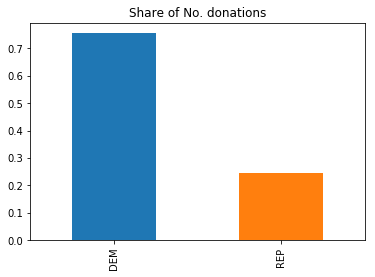

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(facecolor='w')
df.cand_pty_affiliation.value_counts(normalize=True).plot(
    kind="bar", title="Share of No. donations")
plt.show()

确实，75% 的捐款是给民主党的。我们具备的特征是捐款人、交易详情和捐款接收者的数据信息。我们使用 ROC-AUC 来评估模型性能。如果你之前没用过该指标，随机猜测可以是 0.5 分，完美的召回率和精确率是1.0。

# 3.集成算法
结合多个模型的预测，对特异性误差取平均，从而获得更好的整体预测结果

## 3.1.通过决策树来理解集成

Decision tree ROC-AUC score: 0.672


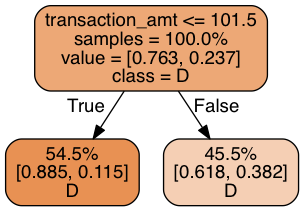

In [3]:
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def print_graph(clf, feature_names):
    """Print decision tree."""
    graph = export_graphviz(
        clf,
        label="root",
        proportion=True,
        impurity=False,
        out_file=None,
        feature_names=feature_names,
        class_names={0: "D", 1: "R"},
        filled=True,
        rounded=True
    )
    graph = pydotplus.graph_from_dot_data(graph)
    return Image(graph.create_png())
t1 = DecisionTreeClassifier(max_depth=1, random_state=SEED)
t1.fit(xtrain, ytrain)
p = t1.predict_proba(xtest)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t1, xtrain.columns)

每个叶节点记录它们在训练样本中的比例、类别分布和类别标签预测。我们的决策树根据捐款金额是否超过 101.5 进行预测：它竟然作出了同样的预测！鉴于 75% 的捐款都给了民主党，这个结果并不令人惊讶。但是这没有充分利用我们已有的数据，下面我们使用三层决策规则，看看会得到什么

Decision tree ROC-AUC score: 0.751


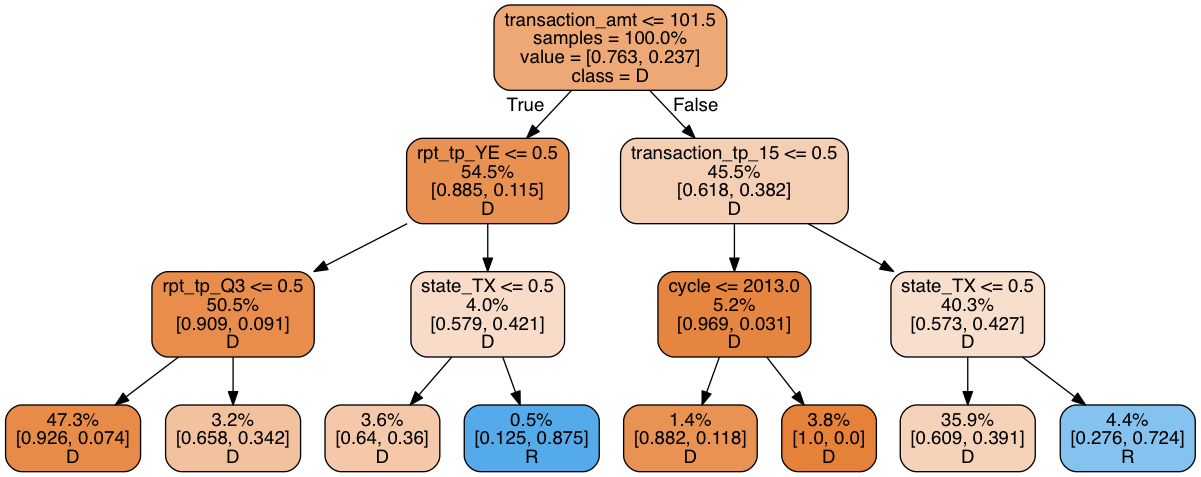

In [4]:
t2 = DecisionTreeClassifier(max_depth=3, random_state=SEED)
t2.fit(xtrain, ytrain)
p = t2.predict_proba(xtest)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t2, xtrain.columns)

该模型并不比简单的决策树好太多：预测到的共和党捐款金额比例只有5%，远远低于25%。仔细观察会发现该决策树使用了很多不确定的分割规则（splitting rule）。观察结果中高达47.3%的结果在最左边的叶节点中，而35.9%在右二的叶节点中。因此大量叶节点没有关联。使该模型更深只会导致过拟合。在深度固定的情况下，决策树可以通过增加「宽度」的方式来增加复杂度，即创建多个决策树，并将其连接起来。也就是决策树的集成。想了解这个集成模型为什么会起作用，先要考虑我们如何让决策树探索出比上层树更多的其他模式。最简单的解决方案就是删除树中较早出现的特征。假如我们删除了转账金额特征（transaction_amt），树的根节点，则新的决策树如下：

Decision tree ROC-AUC score: 0.740


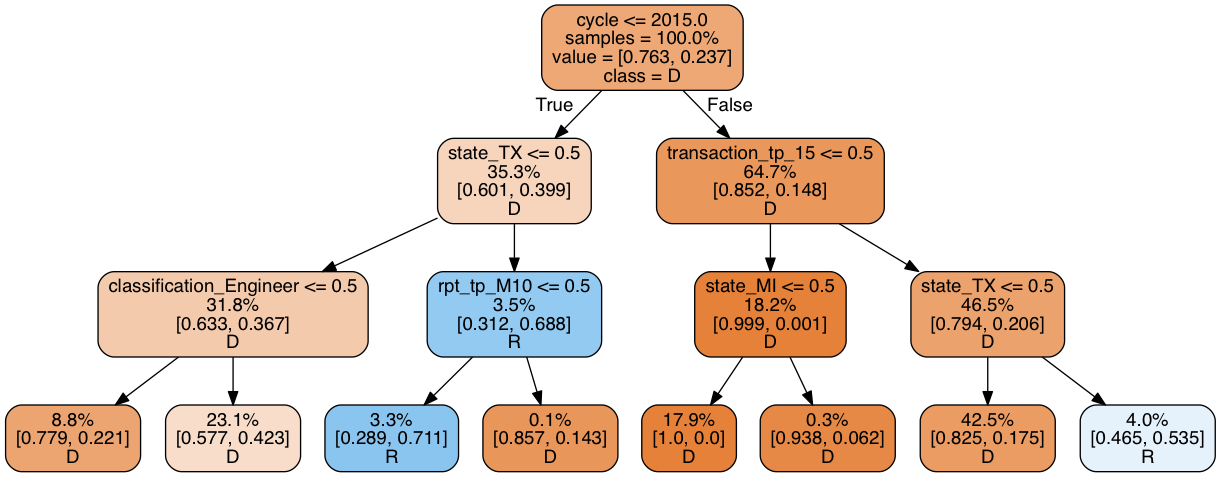

In [5]:
drop = ["transaction_amt"]
xtrain = pd.DataFrame(xtrain)
xtest = pd.DataFrame(xtest)

xtrain_slim = xtrain.drop(['transaction_amt'], 1)
xtest_slim = xtest.drop("transaction_amt", 1)

t3 = DecisionTreeClassifier(max_depth=3, random_state=SEED)
t3.fit(xtrain_slim, ytrain)
p = t3.predict_proba(xtest_slim)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t3, xtrain_slim.columns)

ROC-AUC 得分与上树得分类似，但是共和党捐款比例增加至 7.3%。还是很低，但比之前稍高一些。重要的是，与第一个树相反（第一个树大部分规则与转账本身相关），这棵树更专注于候选人的居住地。现在我们有两个模型，二者预测能力相近，但基于不同的规则运行。因此，它们可能出现不同的预测误差，我们可以使用集成方法取其平均数。

## 3.2.森林是树的集成
回到我们的预测问题，看看我们是否可以用两个决策树构建一个集成。首先检查误差关联性：高度关联的误差会造成差的集成。

In [6]:
p1 = t2.predict_proba(xtest)[:, 1]
p2 = t3.predict_proba(xtest_slim)[:, 1]

pd.DataFrame({"full_data": p1,
              "red_data": p2}).corr()

,full_data,red_data
full_data,1.000000,0.669128
red_data,0.669128,1.000000


有一些关联性，但不过分：预测方差仍有很大的利用空间。为了构建该集成，我们简单地平均了两个模型的预测。

In [7]:
p1 = t2.predict_proba(xtest)[:, 1]
p2 = t3.predict_proba(xtest_slim)[:, 1]
p = np.mean([p1, p2], axis=0)
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Average of decision tree ROC-AUC score: 0.783


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10,
    max_features=3,
    random_state=SEED
)

rf.fit(xtrain, ytrain)
p = rf.predict_proba(xtest)[:, 1]
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Average of decision tree ROC-AUC score: 0.844


随机森林极大改进了我们之前的模型。但是只使用决策树可以做的事情比较有限。是时候扩展我们的视野了。

## 3.3.作为平均预测的集成
目前为止，我们看到了集成的两个重要方面：
- 预测误差的关联性越低，效果越好
- 模型越多，效果越好

出于这一原因，尽可能使用不同模型不失为一个好方法（只要它们表现良好）。目前为止我们一直在依赖简单的平均，但是稍后我们将了解如何使用更复杂的结合。为了记录进程，我们把集成公式化为如下：
$$e(x)=\frac{1}{n}\sum_{i=1}^nf_i(x)$$
涵盖的模型没有限制：决策树、线性模型、核模型、非参数模型、神经网络，或者甚至其他集成！记住我们包含的模型越多，集成的速度就会越慢。为了构建不同模型的集成，我们首先在数据集上对一组 Scikit-learn 分类器进行基准测试。为了避免代码重复，我们使用下面的辅助函数：

In [9]:
# A host of Scikit-learn models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=SEED)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)
    
    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }
    
    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)
    
    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")
    
    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

models = get_models()
P = train_predict(models)
score_models(P, ytest)

Fitting models.
svm... done
knn... done
naive bayes... done
mlp-nn... done
random forest... done
gbm... done
logistic... done
Done.

Scoring models.
svm                       : 0.850
knn                       : 0.779
naive bayes               : 0.803
mlp-nn                    : 0.851
random forest             : 0.844
gbm                       : 0.878
logistic                  : 0.854
Done.



这是我们的基线。梯度提升机（Gradient Boosting Machine/GBM）效果最好，其次是简单的 logistic 回归。对于我们的集成策略来说，预测误差必须是相对不关联的。

<Figure size 432x288 with 0 Axes>

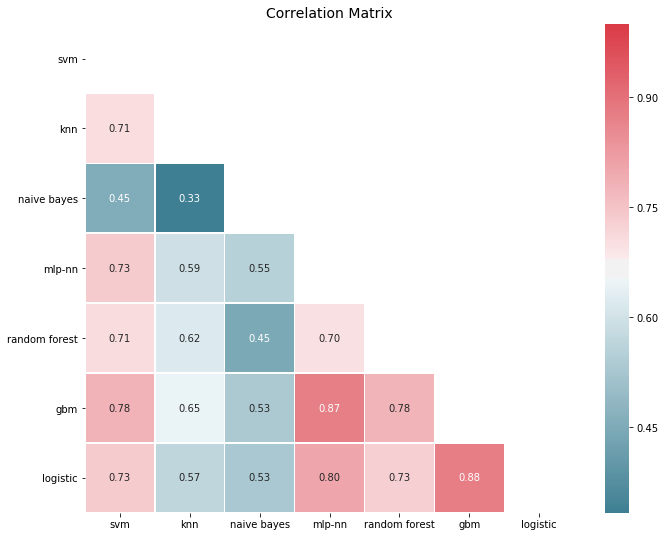

In [14]:
from mlens.visualization import corrmat

plt.figure(facecolor='w')
corrmat(P.corr(), inflate=False)
plt.show()

误差明显关联，这对于表现良好的模型是可以预期的，因为它是典型的异常值，很难纠正。然而，大多数关联性在50-80％的范围内，所以还有很大的改进余地.事实上，如果我们从类别预测的角度看误差关联性，事情看起来会更有希望：

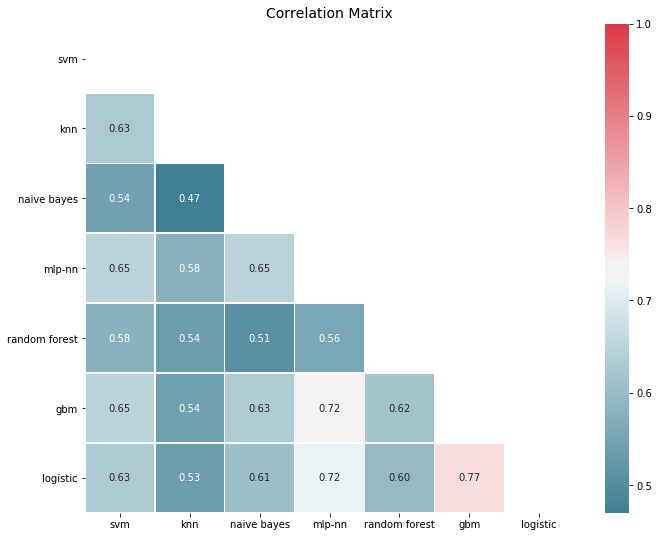

In [15]:
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - ytest.values).corr(), inflate=False)
plt.show()

为了创建集成，我们继续并进行平均预测，正如我们所期望的，集成的性能要好于基线。平均化是一个简单的过程，如果我们存储模型预测，我们可以从一个简单的集成开始，并在训练新模型时随时增加其大小。

In [16]:
print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(ytest, P.mean(axis=1)))

Ensemble ROC-AUC score: 0.884


# 4.集成的实现
## 4.1.定义基学习器的库
它们是处理输入数据并生成预测的模型，可以是线性回归，也可以是神经网络，甚至可以是另一个集成。和往常一样，多样性是强大的！唯一需要注意的是，我们加入越多的模型，集成运行的速度就会越慢。在这里，我会使用此前的模型集合：

In [10]:
base_learners = get_models()

## 4.2.定义一个元学习器
应该使用哪个元学习器，人们并没有统一看法，但目前流行的选择是线性模型、基于核的模型（支持向量机和 KNN 算法）以及基于决策树的模型。你也可以使用另一个集成作为「元学习器」：在这种特殊情况下，你最终会得到一个两层的集成，这有点类似于前馈神经网络。在这里，我们会使用一个梯度提升机。为了确保GBM能够探索局部特征，我们需要限定每1000个决策树在4个基学习器的随机子集和50%的输入数据上进行训练。这样，GBM就会表达每个基学习器在不同近邻输入空间上的预测内容。

In [11]:
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=4,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.005,
    random_state=SEED
)

## 4.3.定义步骤，生成训练和测试集
为简单起见，我们将完整训练集分为基学习器的训练集和预测集。这种方法有时被称为「混合（Blending）」。不过，不同社区之间的术语是不同的，所以知道集成使用了哪种类型的交叉验证有时并不容易。

In [12]:
xtrain_base, xpred_base, ytrain_base, ypred_base = train_test_split(
    xtrain, ytrain, test_size=0.5, random_state=SEED)

## 4.4.在训练集上训练基学习器
为在训练数据上训练基学习器，我们照常运行：

In [13]:
def train_base_learners(base_learners, inp, out, verbose=True):
    """Train all base learners in the library."""
    if verbose: 
        print("Fitting models.")
    for i, (name, m) in enumerate(base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
    m.fit(inp, out)
    if verbose: 
        print("done")
train_base_learners(base_learners, xtrain_base, ytrain_base)

Fitting models.
svm... knn... naive bayes... mlp-nn... random forest... gbm... logistic... done


## 4.5.生成基学习器预测
基学习器拟合后，我们现在可以生成一系列预测用于训练元学习器。注意，我们生成的基于观测值的预测并不会用于基学习器的训练，对于每个观测：
$$x_{pred}^{(i)} \in X_{pred\_base}$$
在基学习器预测集中，我们生成了基学习器预测结果的集合：
$$p_{base}^{(i)}=[f_1x_{pred}^{(i)},...,f_nx_{pred}^{(i)}]$$
如果你实现自己的集成，请特别注意如何索引预测矩阵的行和列——将数据分成两个部分并不难，但对于后来的交叉验证就很有挑战性了。

In [15]:
def predict_base_learners(pred_base_learners, inp, verbose=True):
    """Generate a prediction matrix."""
    P = np.zeros((inp.shape[0], len(pred_base_learners)))
    
    if verbose: 
        print("Generating base learner predictions.")
    for i, (name, m) in enumerate(pred_base_learners.items()):
        if verbose: 
            print("%s..." % name, end=" ", flush=False)
    p = m.predict_proba(inp)
    # With two classes, need only predictions for one class
    P[:, i] = p[:, 1]
    if verbose:
        print("done")
    
    return P

P_base = predict_base_learners(base_learners, xpred_base)

Generating base learner predictions.
svm... knn... naive bayes... mlp-nn... random forest... gbm... logistic... done


## 4.6.训练元学习器
预测矩阵 P_base 反映了测试时间的性能，可被用于训练元学习器：

In [16]:
meta_learner.fit(P_base, ypred_base)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='exponential', max_depth=3,
              max_features=4, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=222, subsample=0.5, verbose=0,
              warm_start=False)

In [17]:
def ensemble_predict(base_learners, meta_learner, inp, verbose=True):
    """Generate predictions from the ensemble."""
    P_pred = predict_base_learners(base_learners, inp, verbose=verbose)
    return P_pred, meta_learner.predict_proba(P_pred)[:, 1]
P_pred, p = ensemble_predict(base_learners, meta_learner, xtest)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Generating base learner predictions.
svm... knn... naive bayes... mlp-nn... random forest... gbm... logistic... done

Ensemble ROC-AUC score: 0.849
